# Preliminaries

In [15]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model


pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv').drop(columns=['Unnamed: 0'])
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv').drop(columns=['Unnamed: 0'])
val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv').drop(columns=['Unnamed: 0'])

# Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])


# Image extraction

In [4]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [5]:
#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
train_img_std = extract_images(train_std, variables, verbose=False)
print(train_img_std.shape)

(11323, 13, 29, 8)


In [6]:
#validation set has 1826 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
val_img_std = extract_images(val_std, variables, verbose=False)
print(val_img_std.shape)

(1826, 13, 29, 8)


In [7]:
#test set has 1431 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
test_img_std = extract_images(test_std, variables, verbose=False)
print(test_img_std.shape)

(1431, 13, 29, 8)


# Target Extraction

In [8]:
y_train = train.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_val = val.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_test = test.loc[:,['Real_tom_lsm','latitude','longitude','time']]
print(y_train.shape, y_val.shape, y_test.shape)

(4268771, 4) (688402, 4) (539487, 4)


In [10]:
#training set has 11.323 days
variables = [ 'Real_tom_lsm']
y_train_img = extract_images(y_train, variables, verbose=True)
print(y_train_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 1)


In [11]:
variables = [ 'Real_tom_lsm']
y_val_img = extract_images(y_val, variables, verbose=True)
print(y_val_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
(1826, 13, 29, 1)


In [12]:
variables = [ 'Real_tom_lsm']
y_test_img = extract_images(y_test, variables, verbose=True)
print(y_test_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
(1431, 13, 29, 1)


# Model 1: "Autoencoder" idea, flattening

## Many nodes

In [16]:
encoder = Sequential([
    Flatten(input_shape = (13, 29, 8)),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(32),
    LR()
])

decoder = Sequential([
    Dense(64, input_shape = (32,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(377),
    Activation("sigmoid"),
    Reshape((13, 29))
])

img = Input(shape = (13, 29, 8))
latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13, 29, 8)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 32)                815584    
                                                                 
 sequential_3 (Sequential)   (None, 13, 29)            140345    
                                                                 
Total params: 955,929
Trainable params: 955,929
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=50)

Epoch 1/50


2023-01-17 12:00:03.354803: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-17 12:00:04.002393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0347

2023-01-17 12:00:12.056174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 9s 20ms/step - loss: 0.0347 - val_loss: 0.0433
Epoch 2/50
354/354 [==============================] - 7s 19ms/step - loss: 0.0127 - val_loss: 0.0376
Epoch 3/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0117 - val_loss: 0.0258
Epoch 4/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0116 - val_loss: 0.0321
Epoch 5/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0113 - val_loss: 0.0264
Epoch 6/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0111 - val_loss: 0.0199
Epoch 7/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0110 - val_loss: 0.0214
Epoch 8/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0108 - val_loss: 0.0172
Epoch 9/50
354/354 [==============================] - 6s 18ms/step - loss: 0.0114 - val_loss: 0.0141
Epoch 10/50
354/354 [==============================] - 7s 19ms/step - loss: 0.0107 - val_loss: 0.0149


45/45 [==============================] - 0s 2ms/step


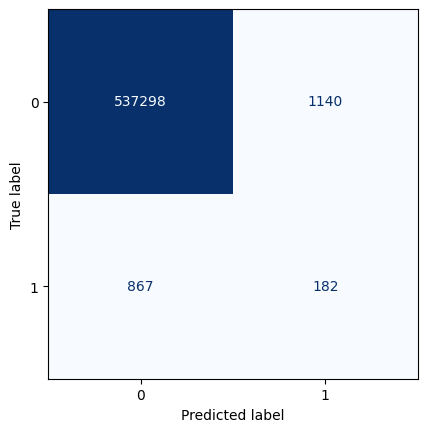

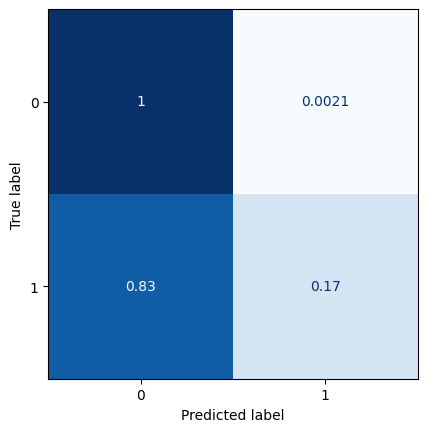

In [41]:
t = model.predict(test_img_std)

classes = []
for i in t.reshape(-1,1):
    if i<=0.1: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


19


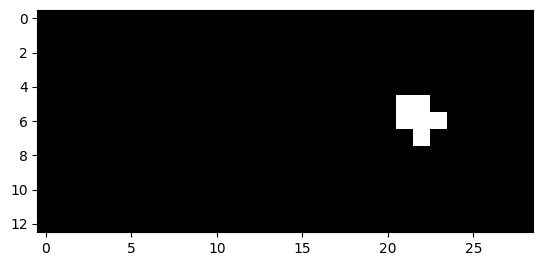

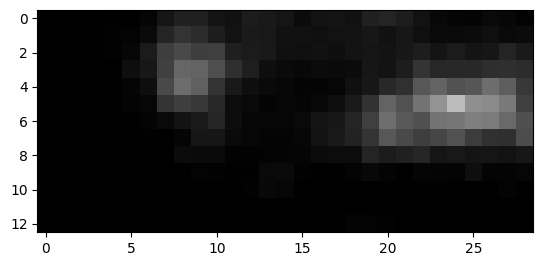

20


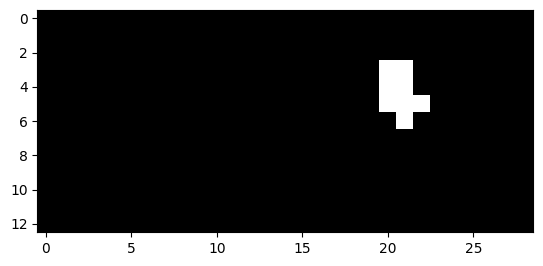

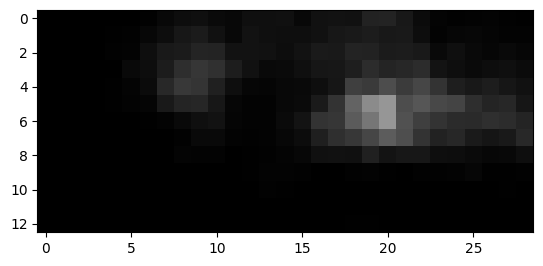

21


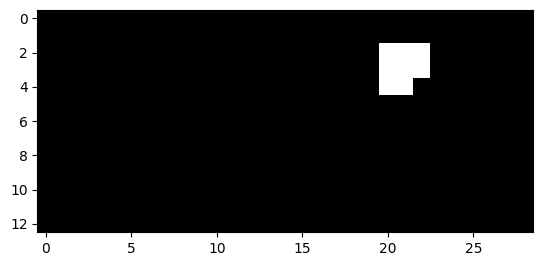

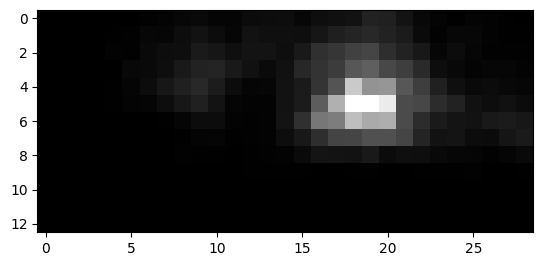

22


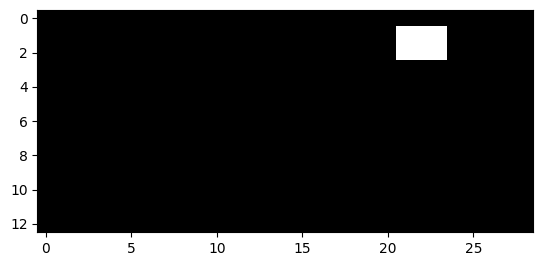

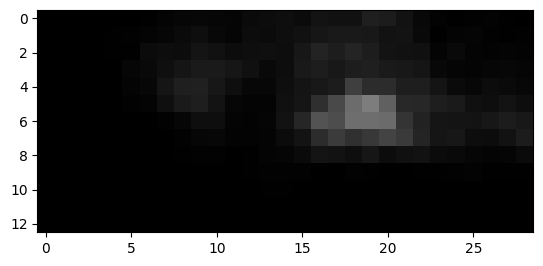

23


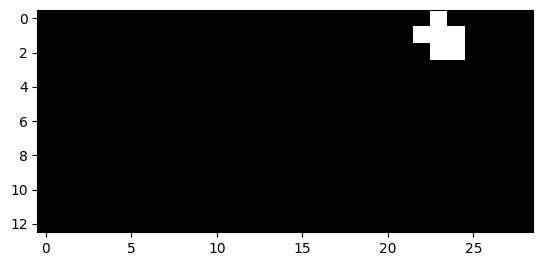

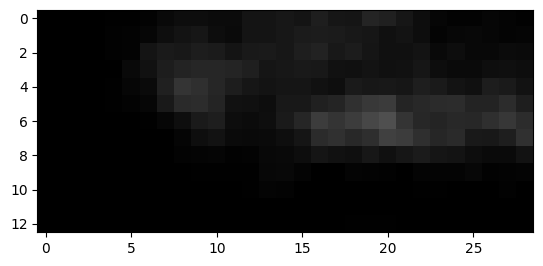

24


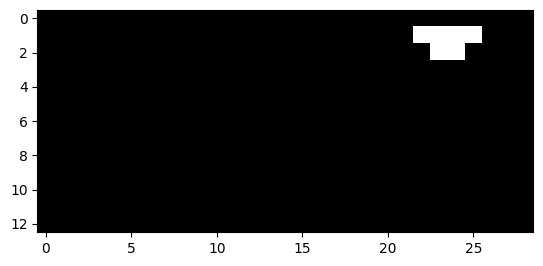

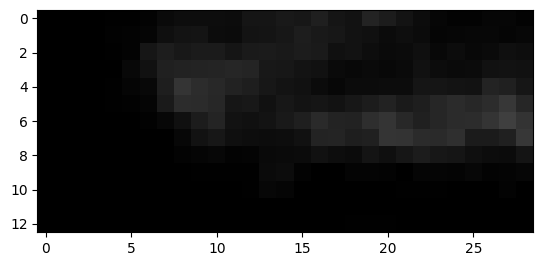

25


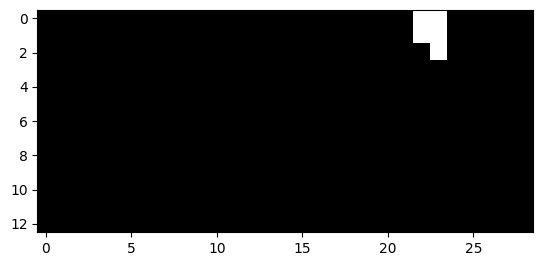

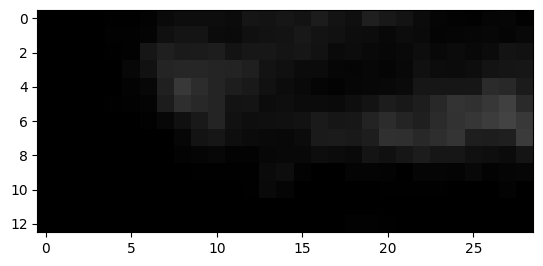

26


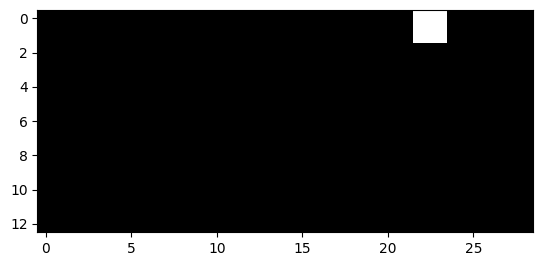

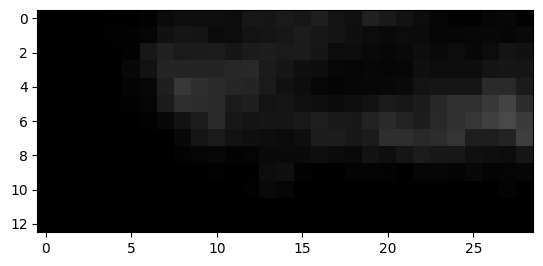

28


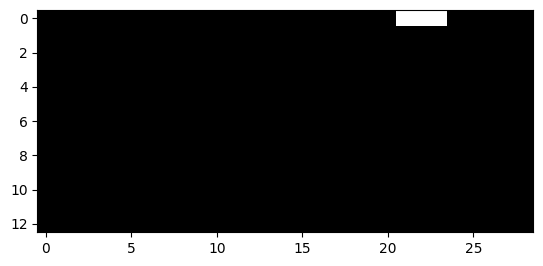

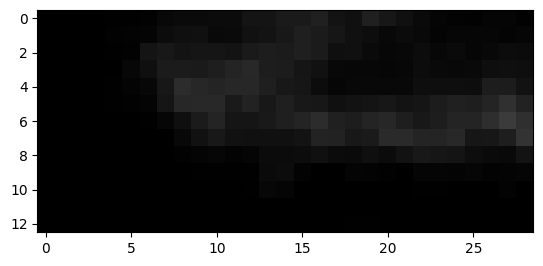

40


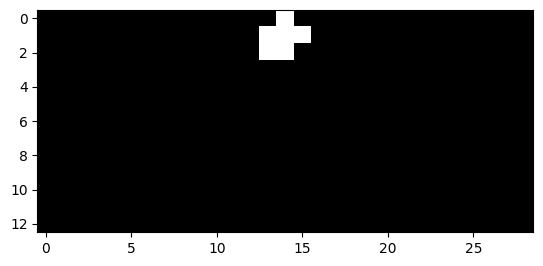

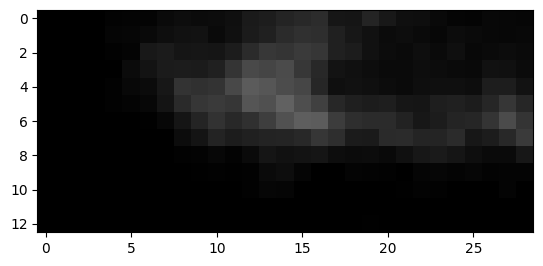

41


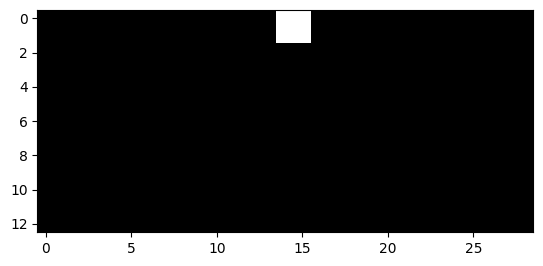

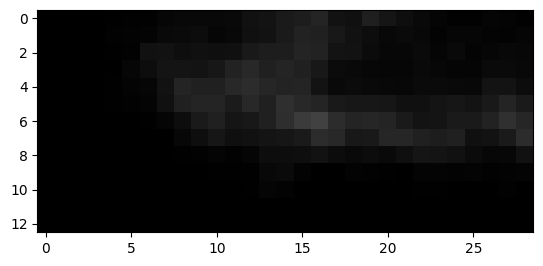

43


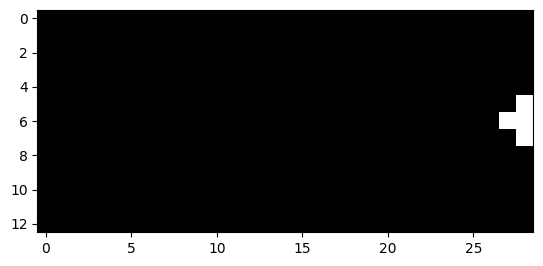

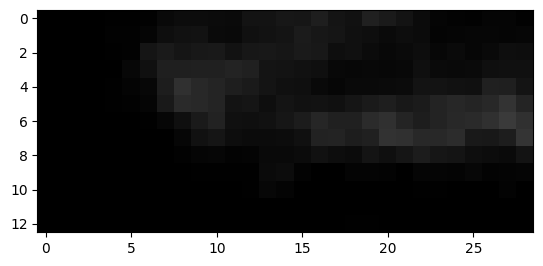

44


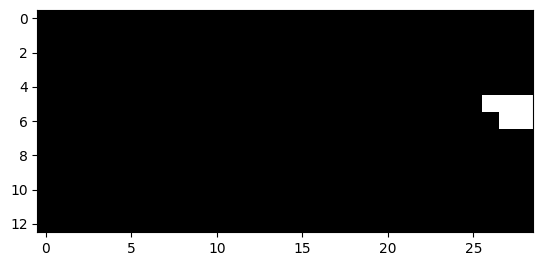

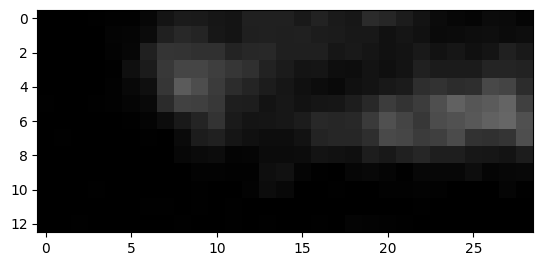

45


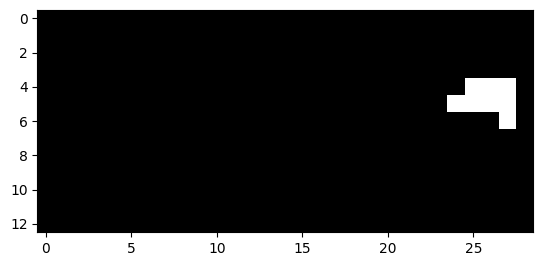

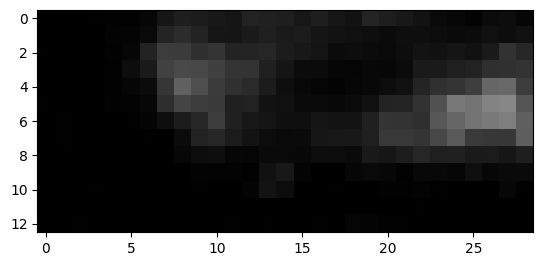

46


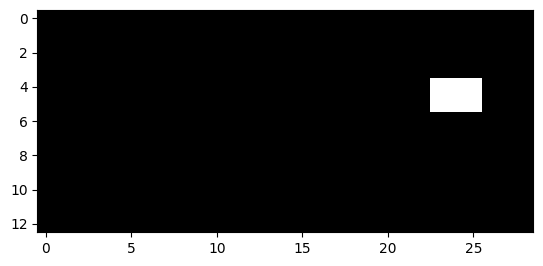

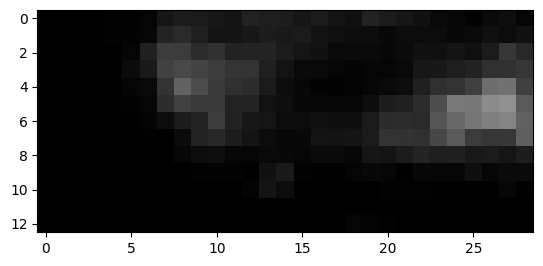

47


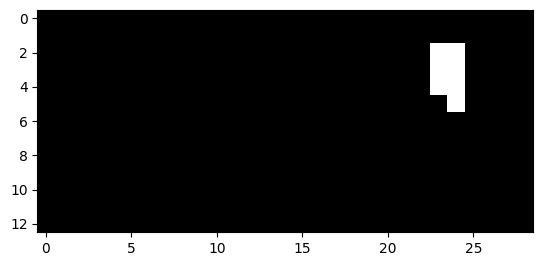

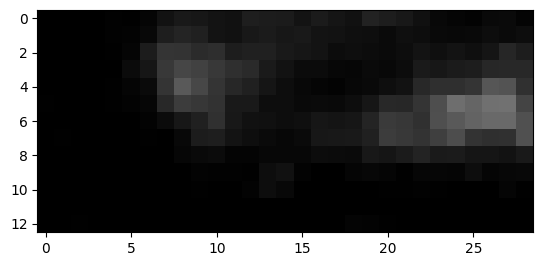

48


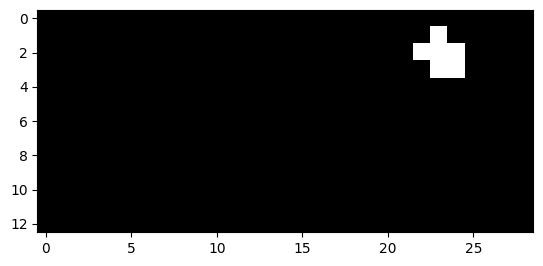

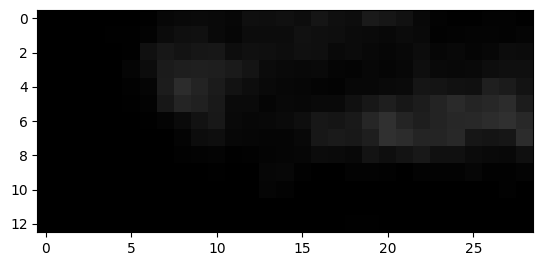

49


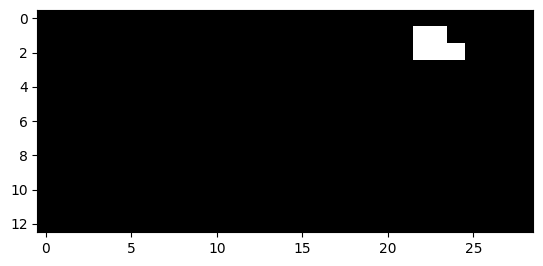

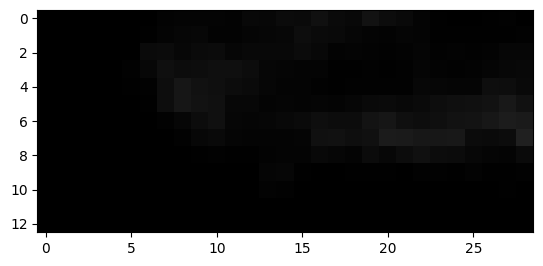

50


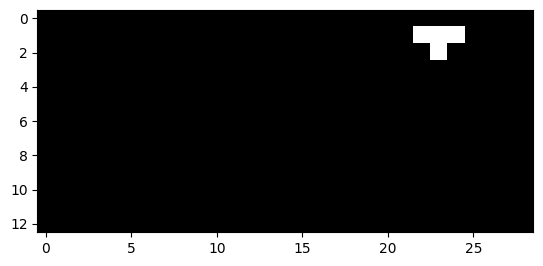

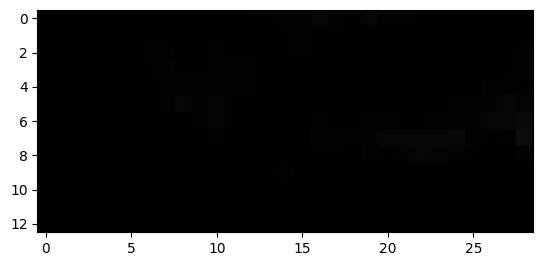

51


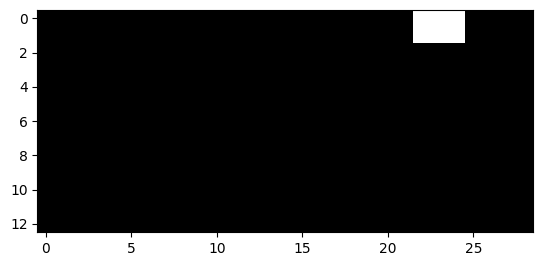

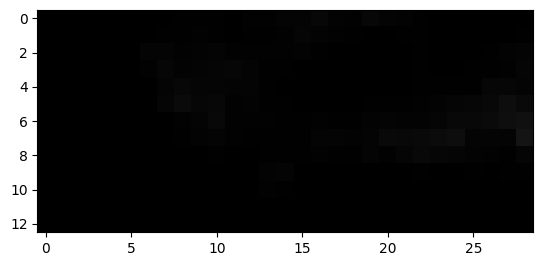

52


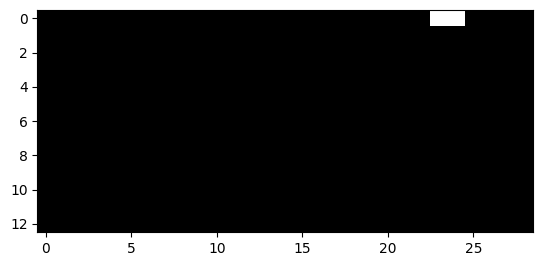

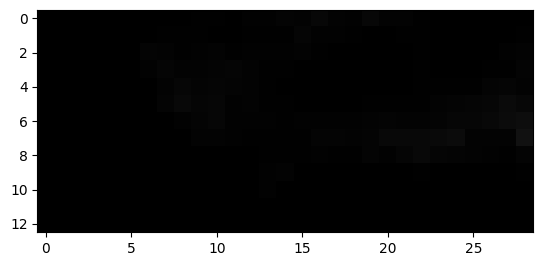

73


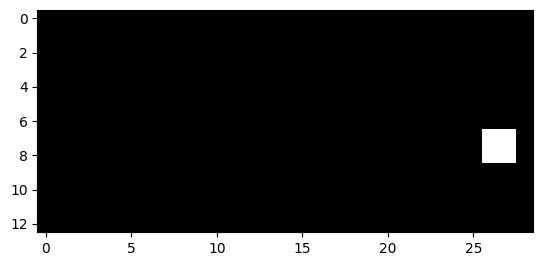

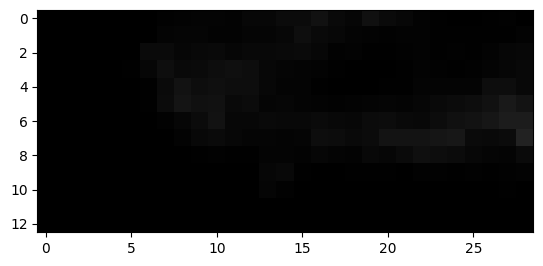

74


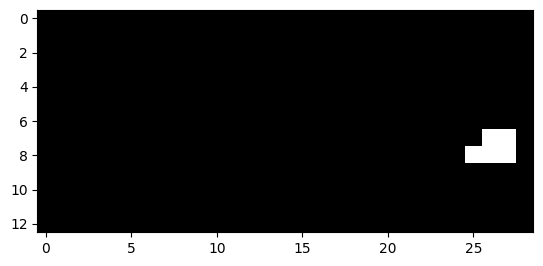

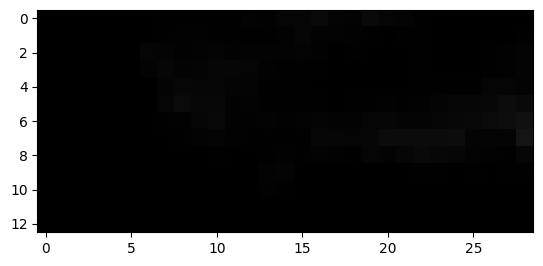

75


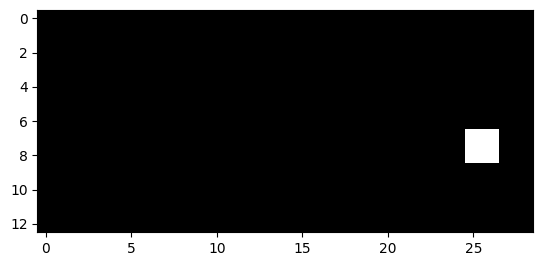

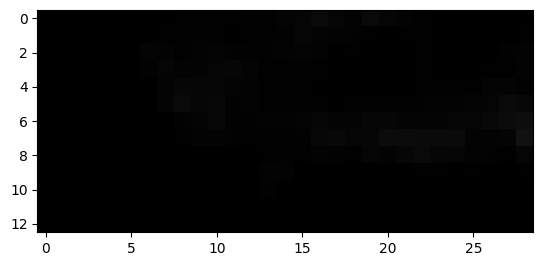

76


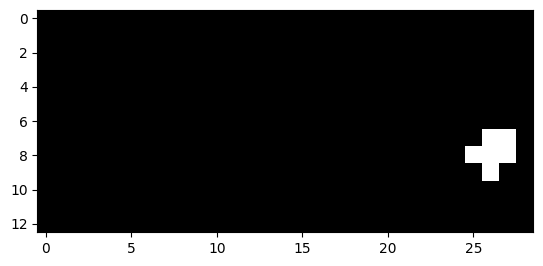

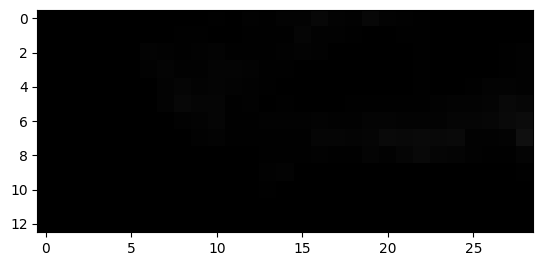

77


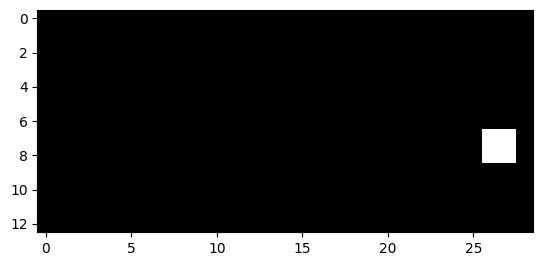

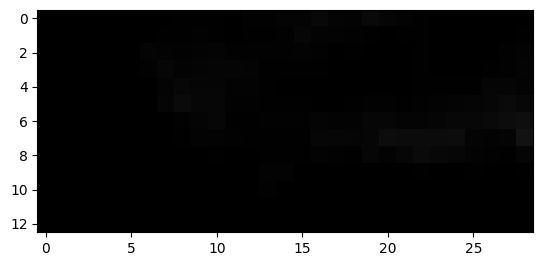

78


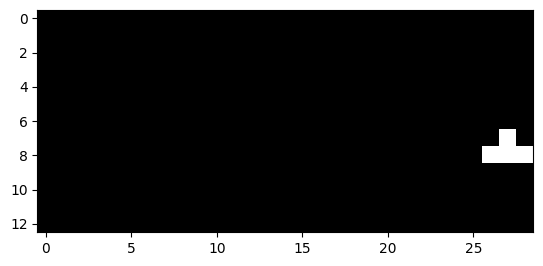

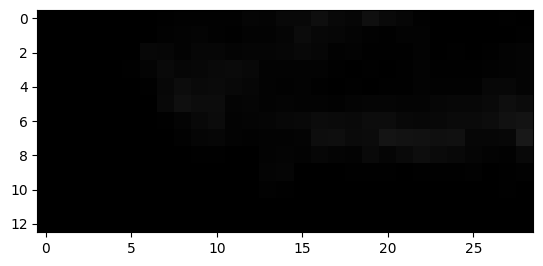

79


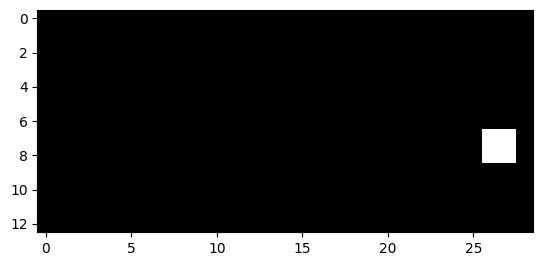

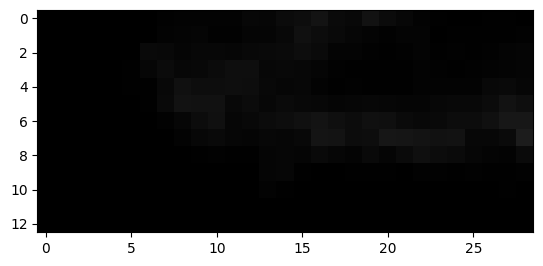

86


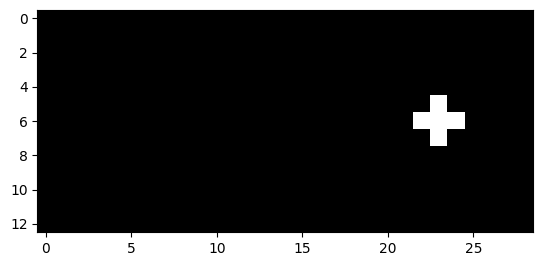

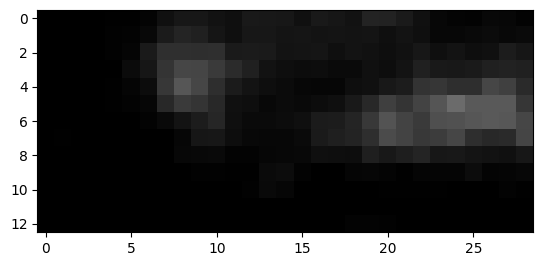

87


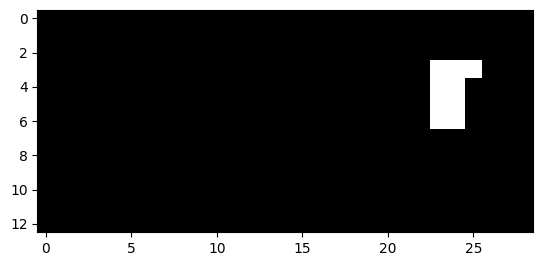

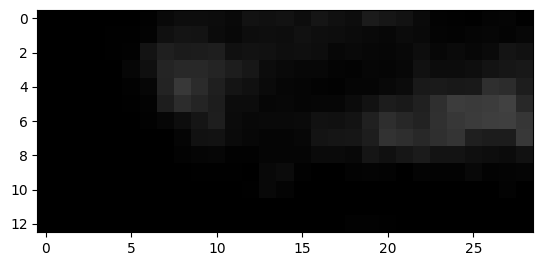

88


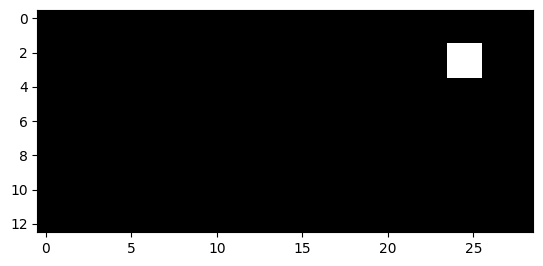

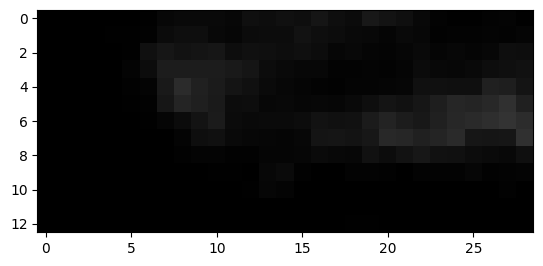

100


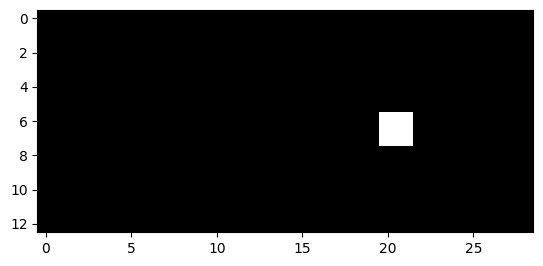

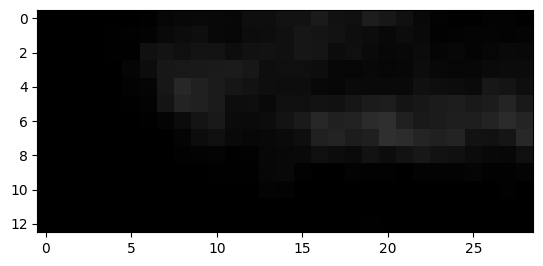

101


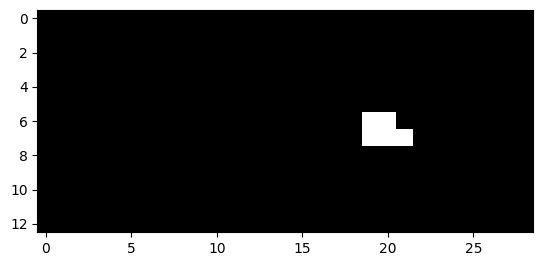

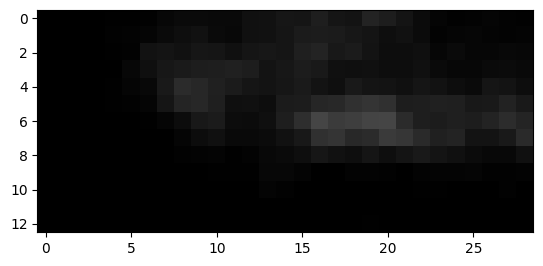

102


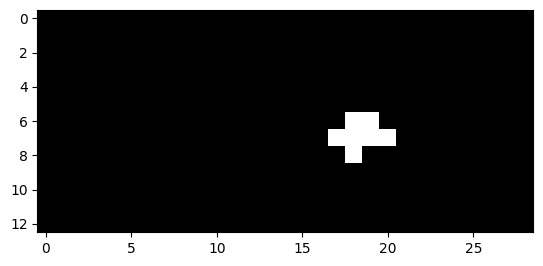

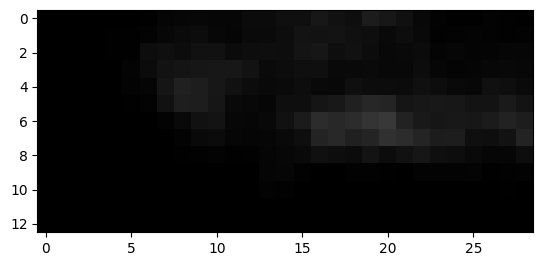

103


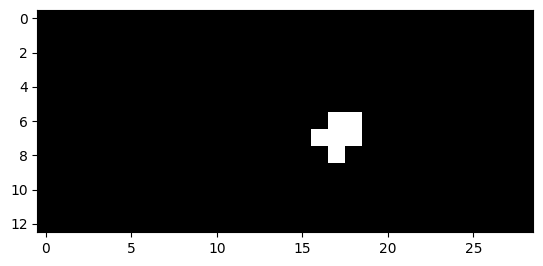

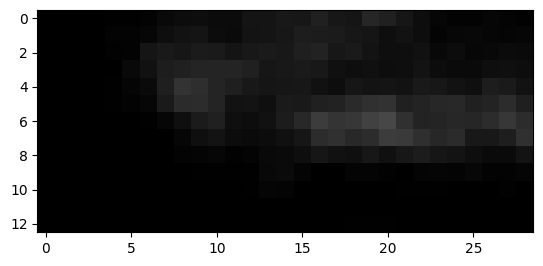

104


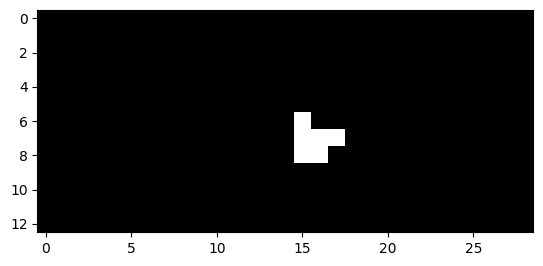

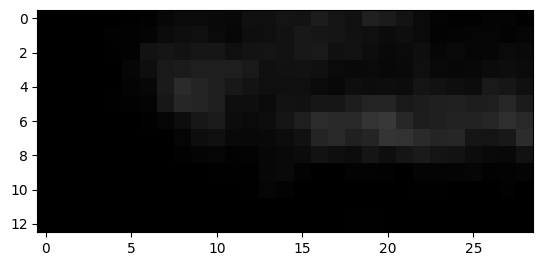

105


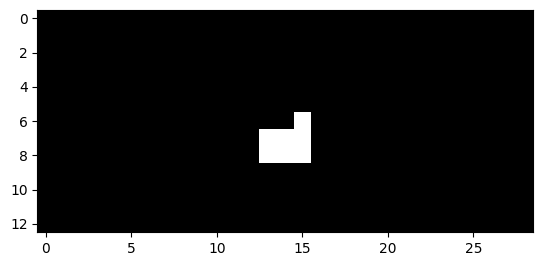

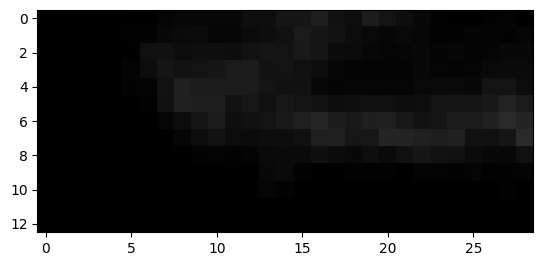

106


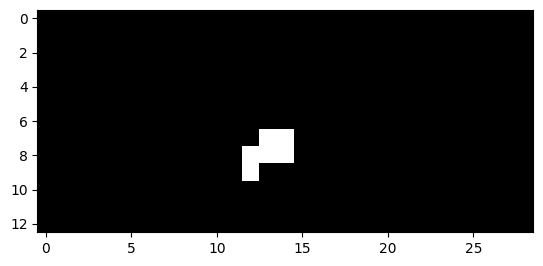

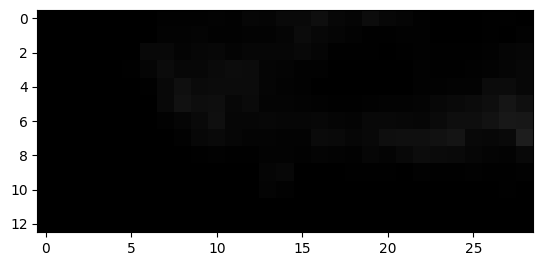

107


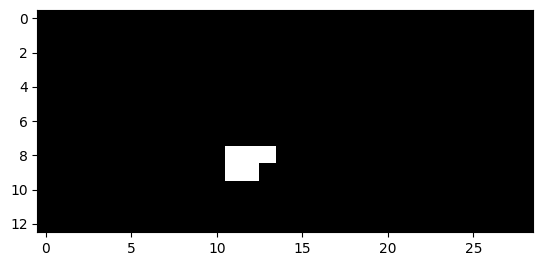

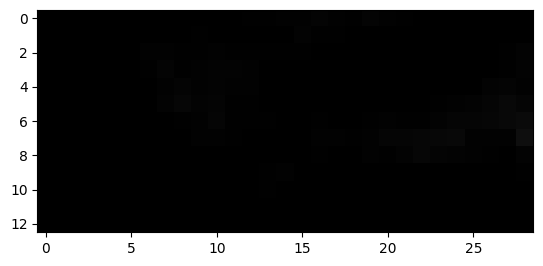

108


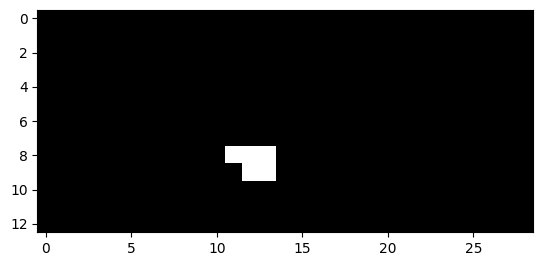

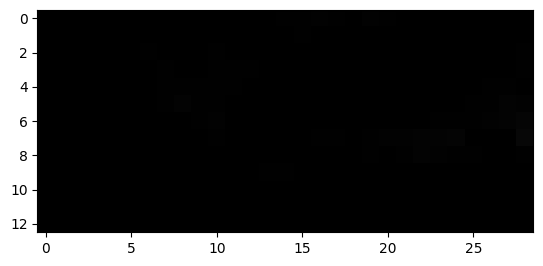

109


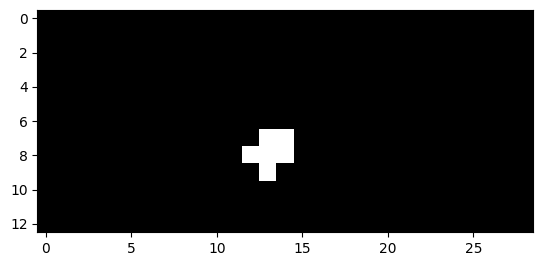

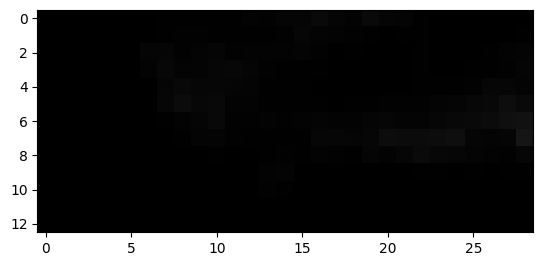

110


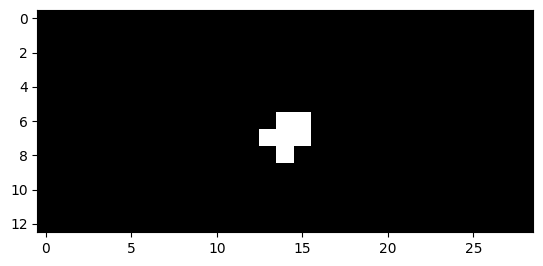

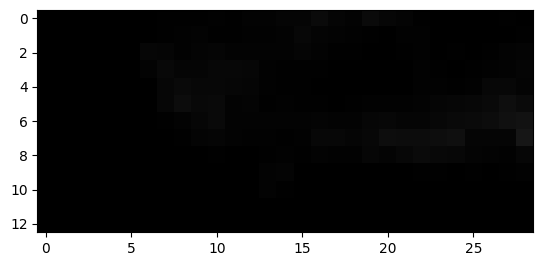

111


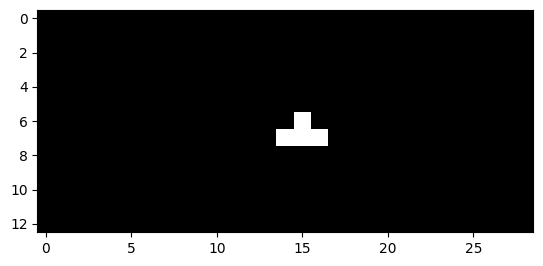

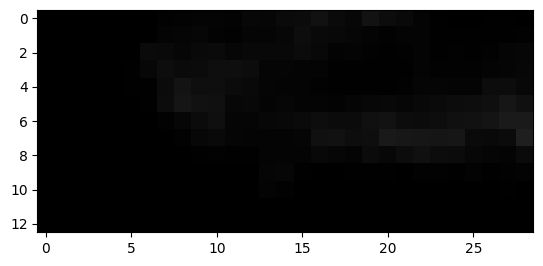

112


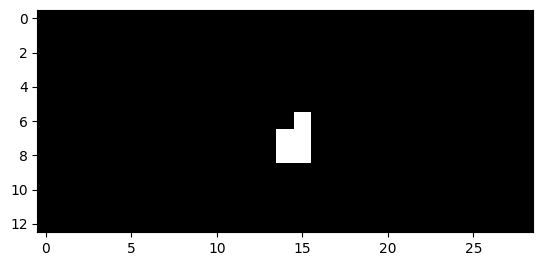

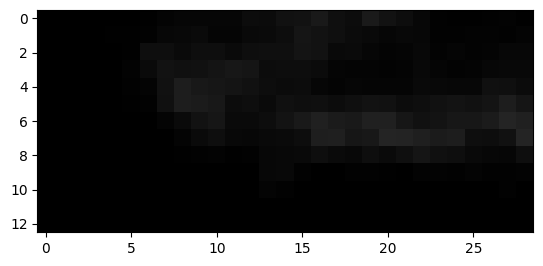

399


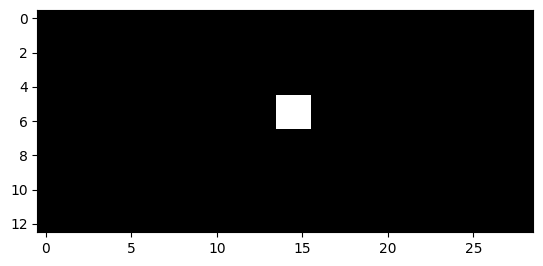

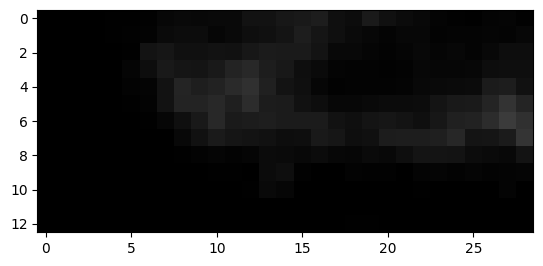

400


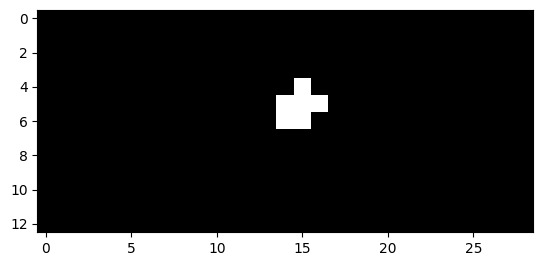

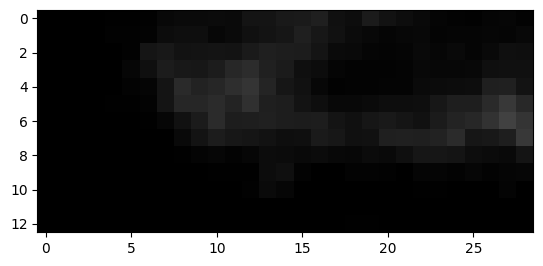

401


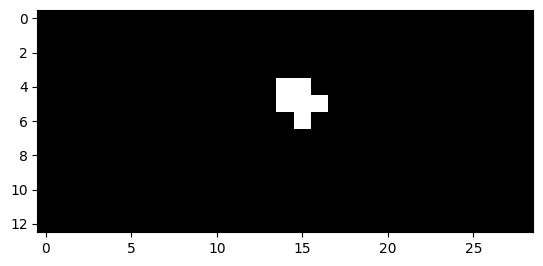

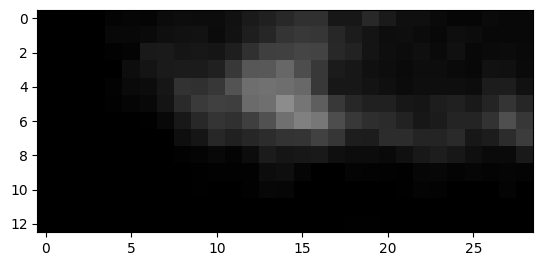

402


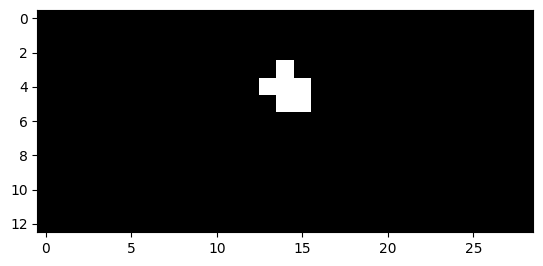

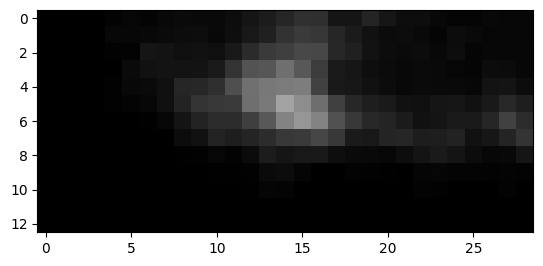

403


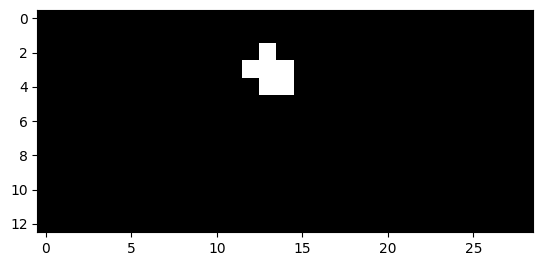

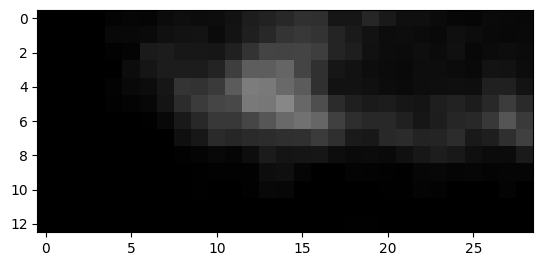

404


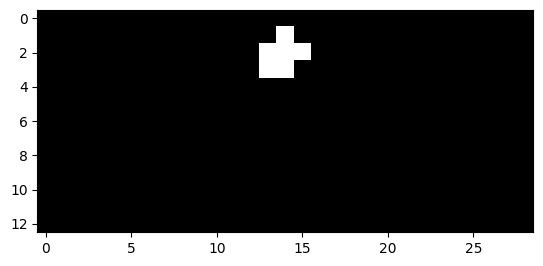

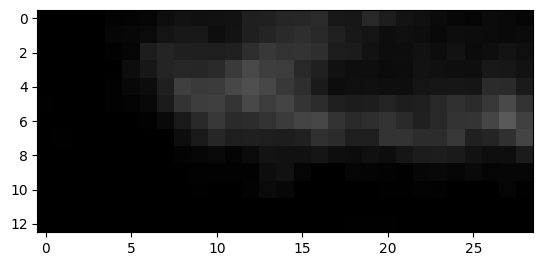

405


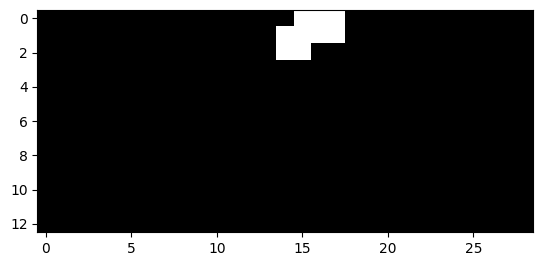

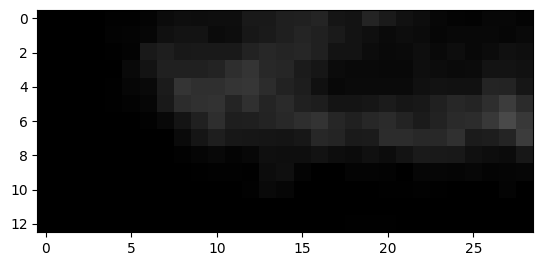

406


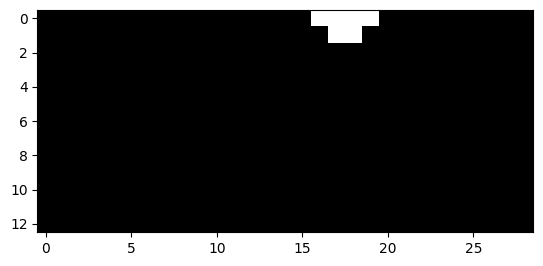

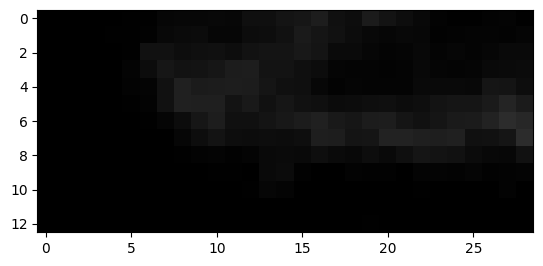

407


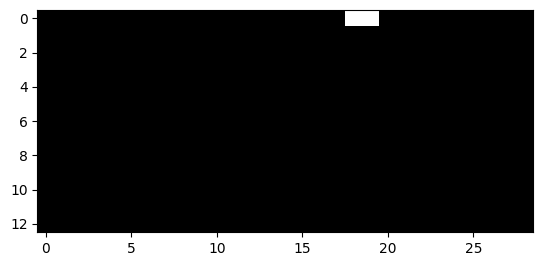

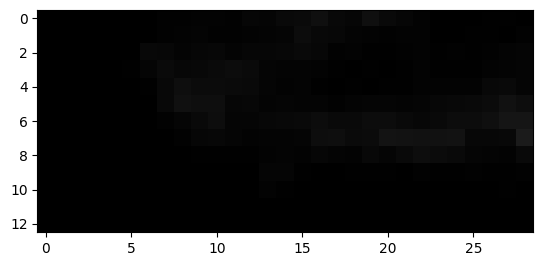

408


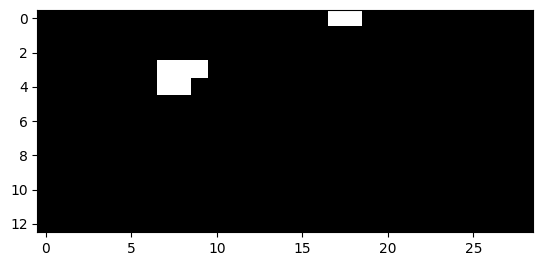

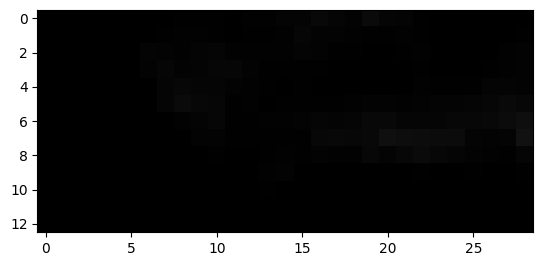

409


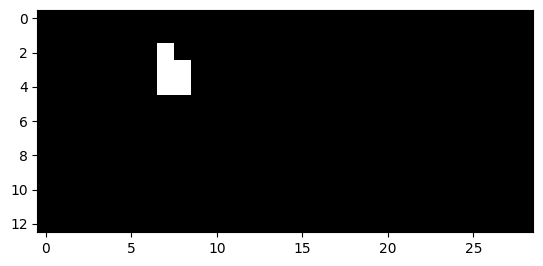

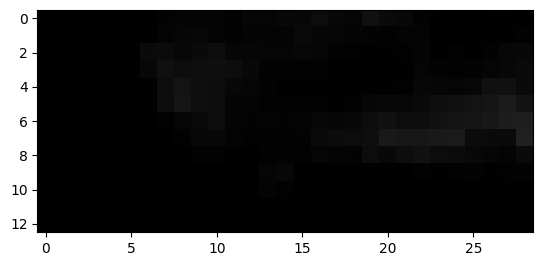

410


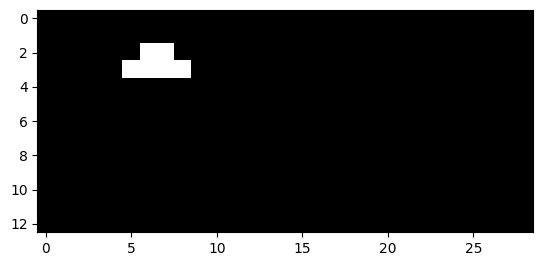

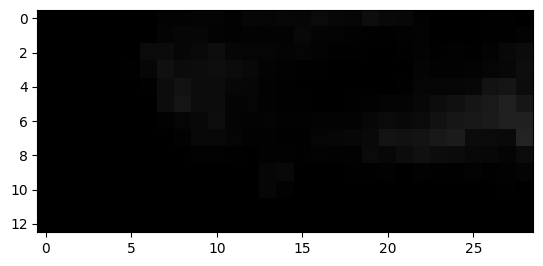

411


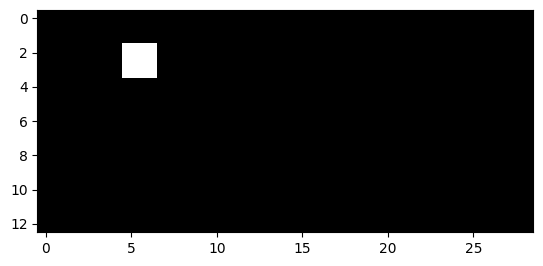

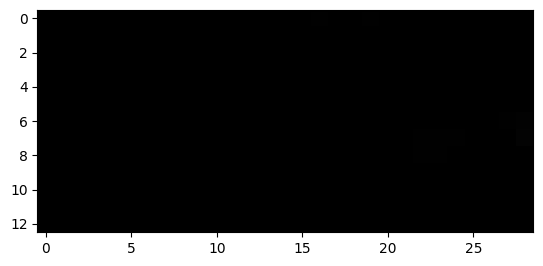

426


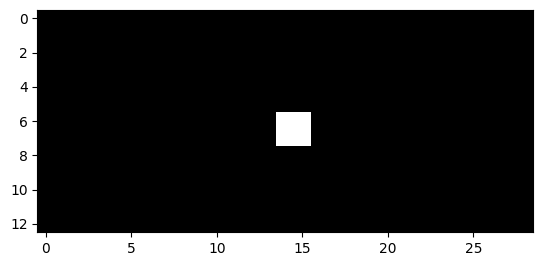

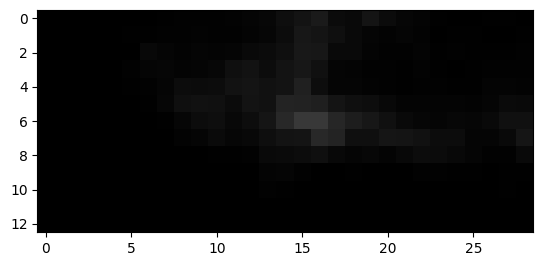

427


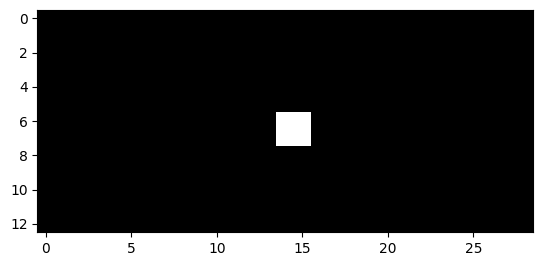

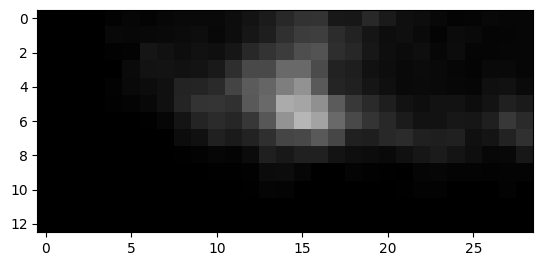

428


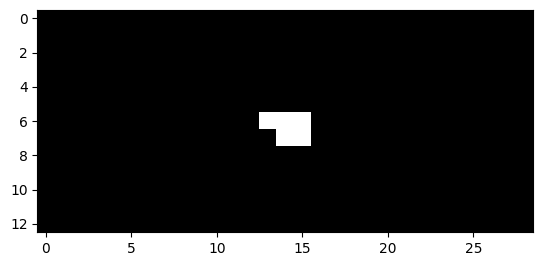

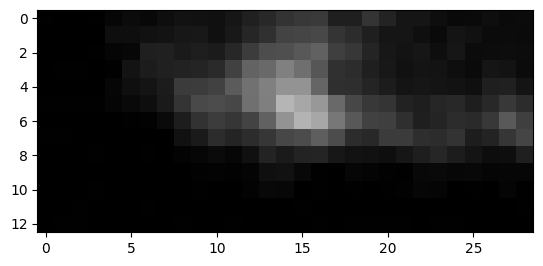

429


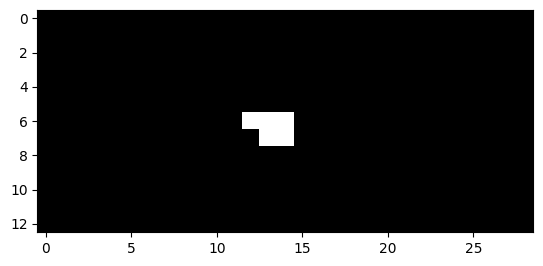

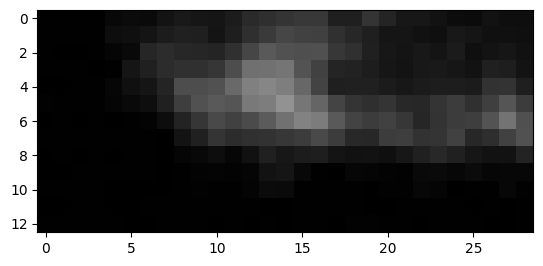

430


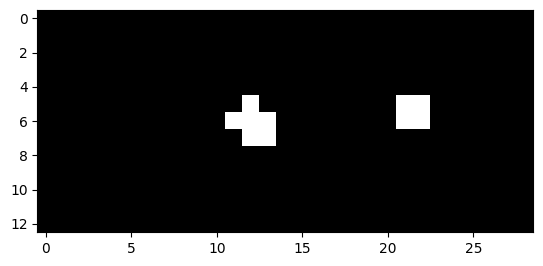

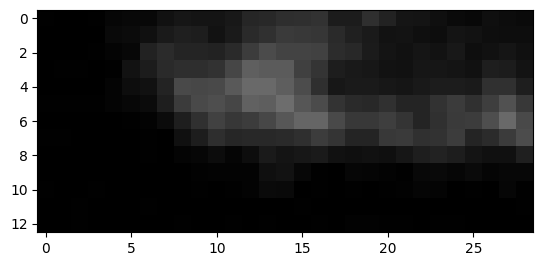

431


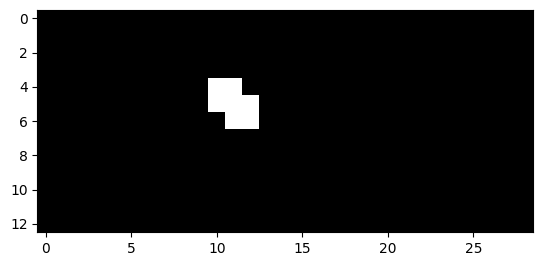

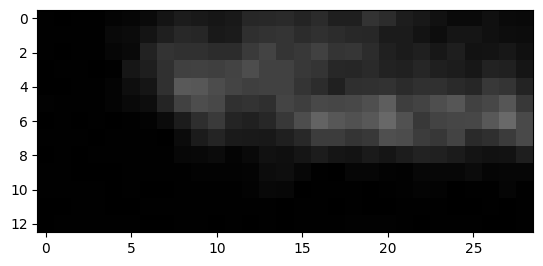

432


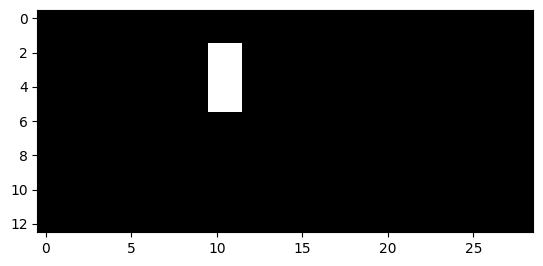

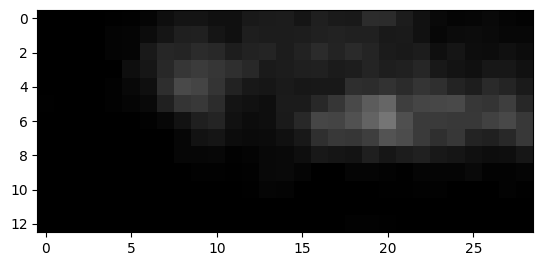

433


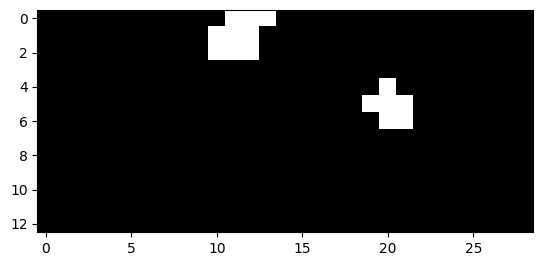

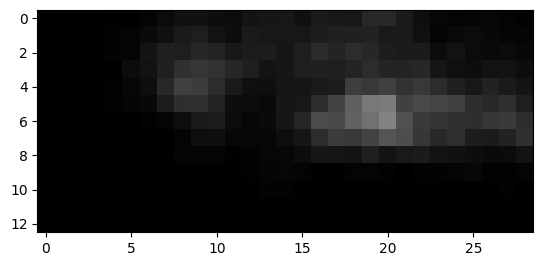

434


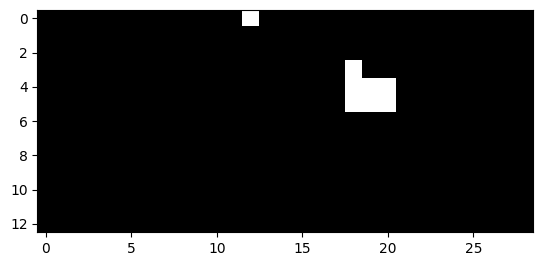

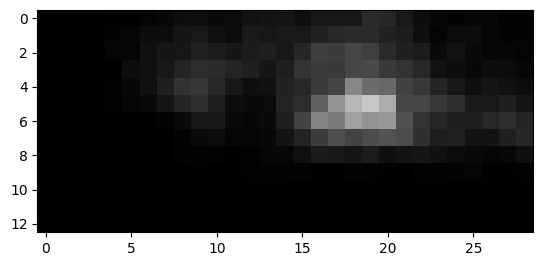

437


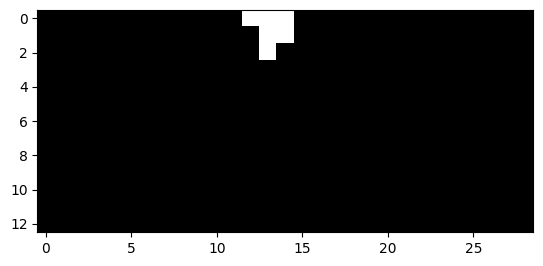

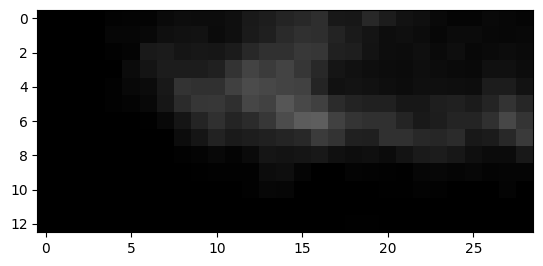

438


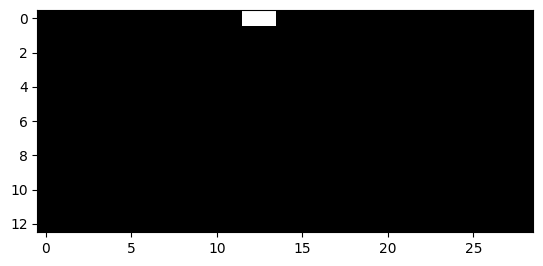

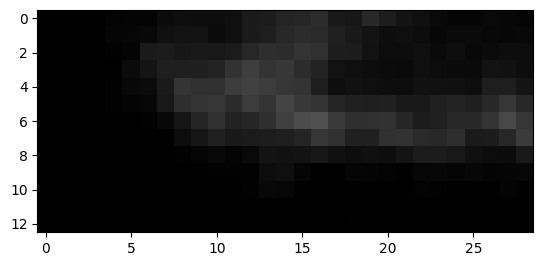

731


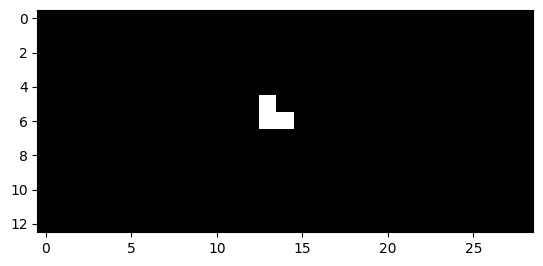

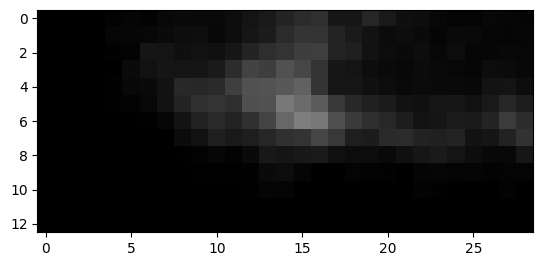

732


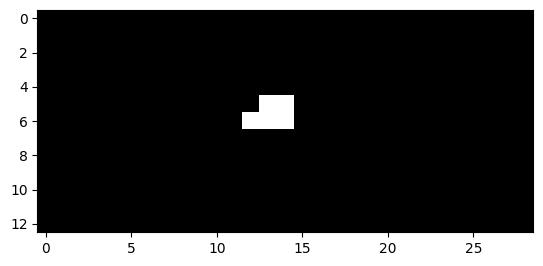

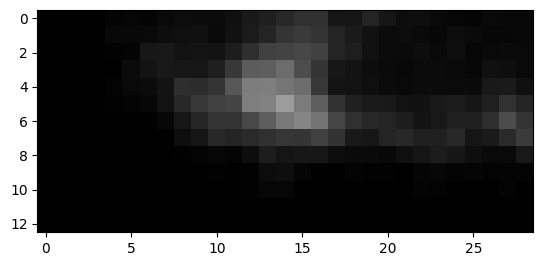

733


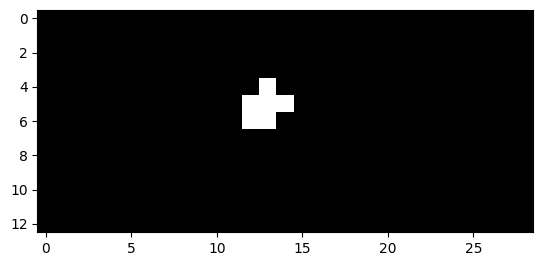

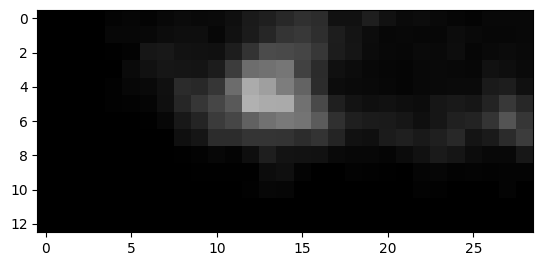

734


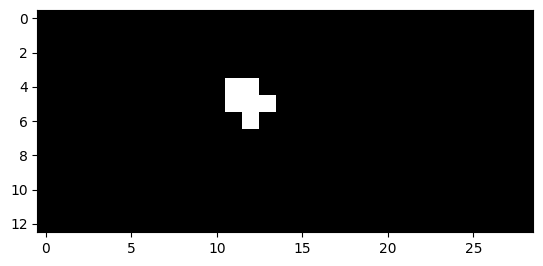

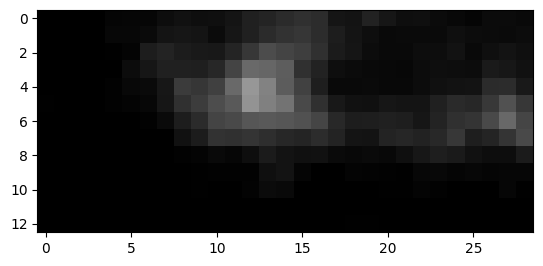

735


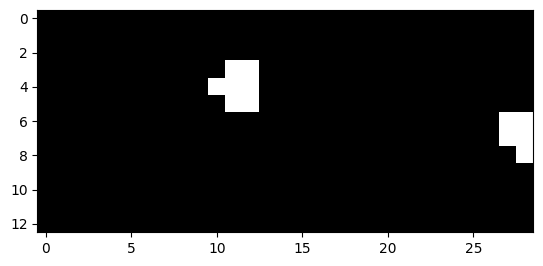

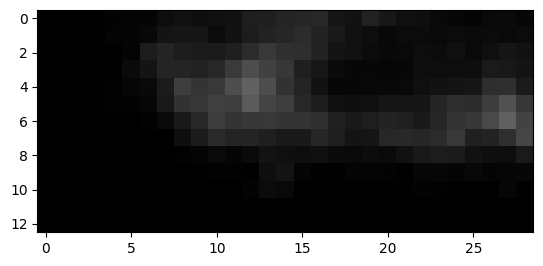

736


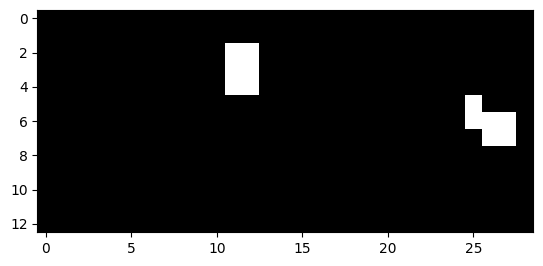

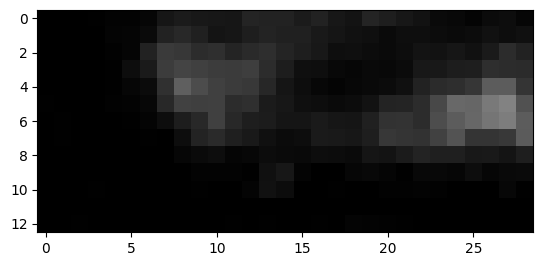

737


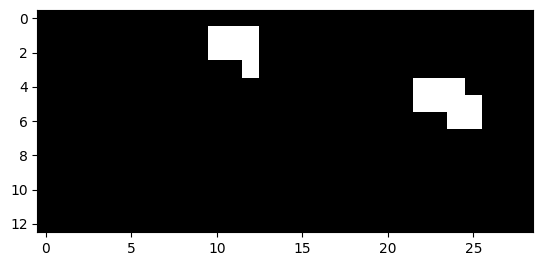

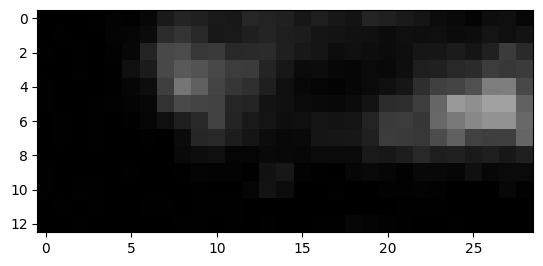

738


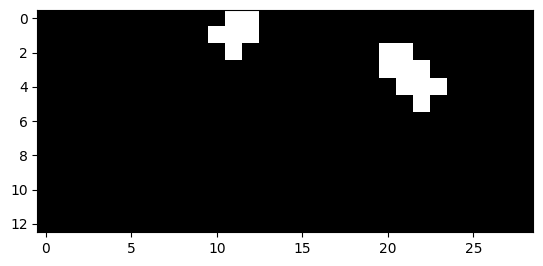

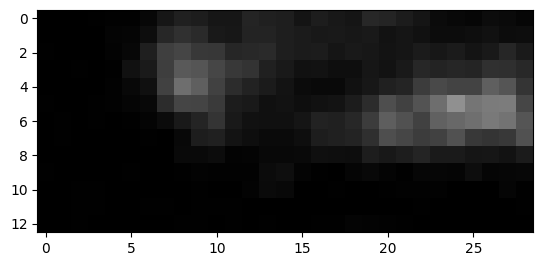

739


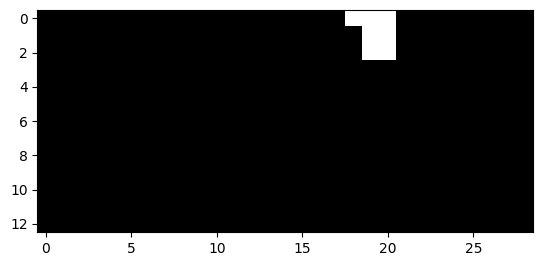

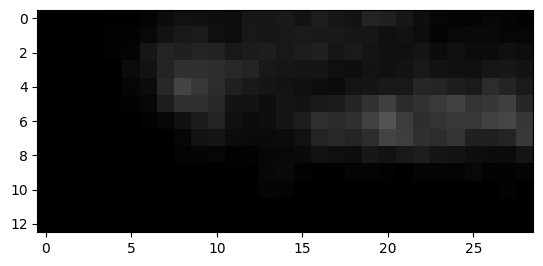

742


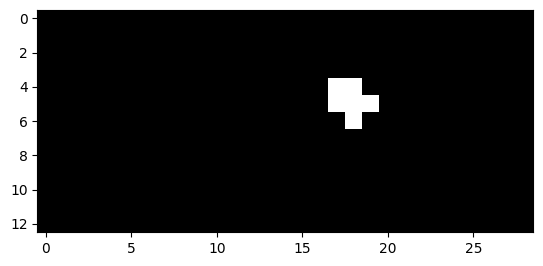

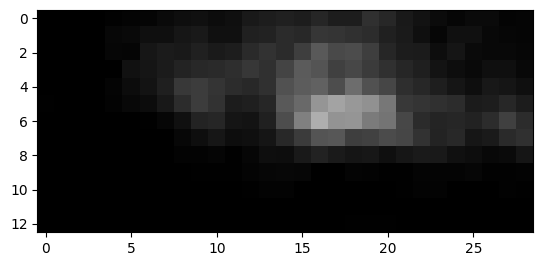

743


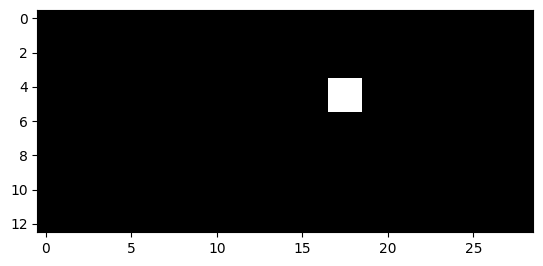

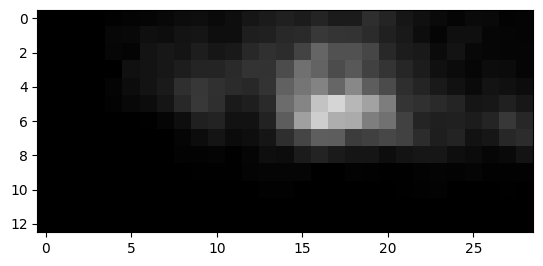

744


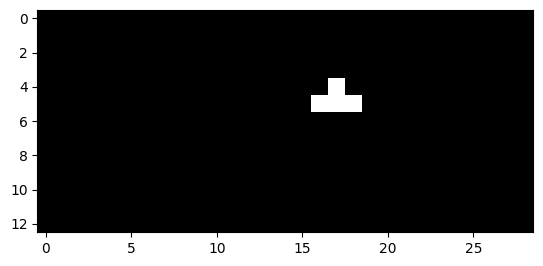

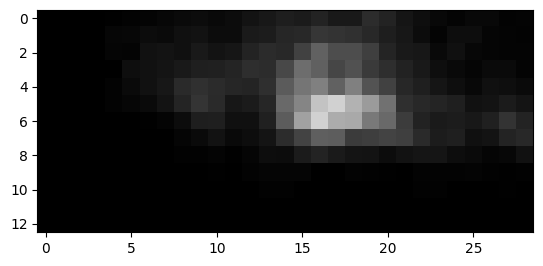

745


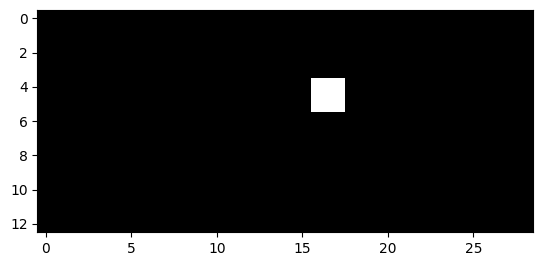

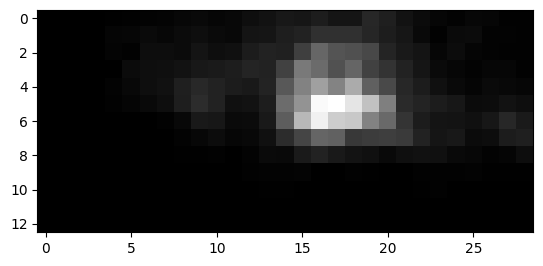

746


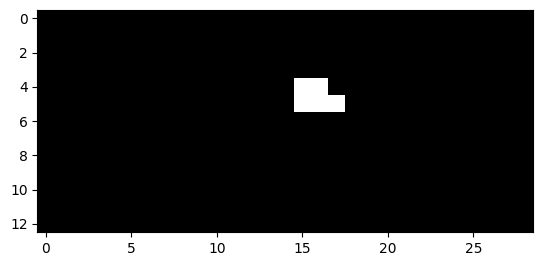

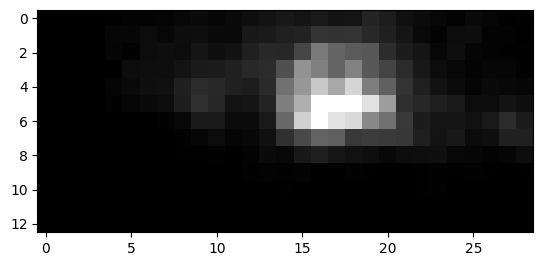

747


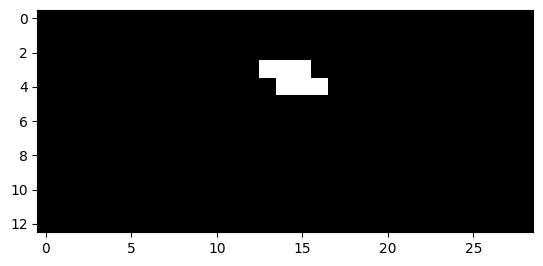

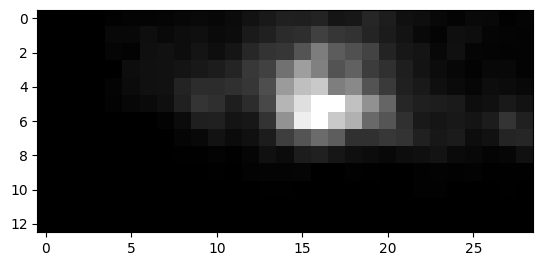

748


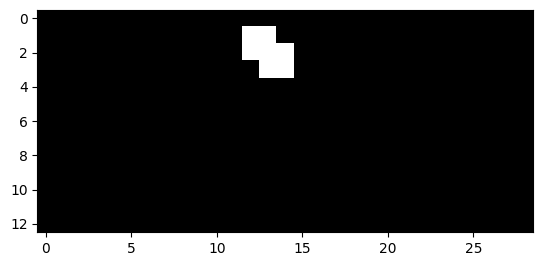

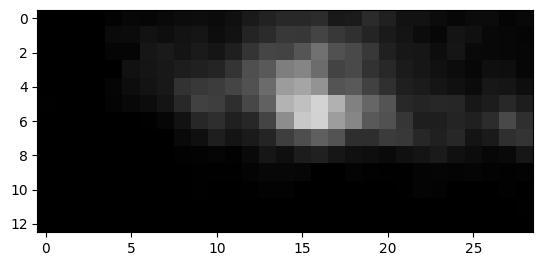

749


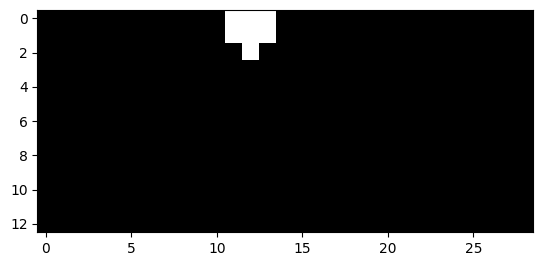

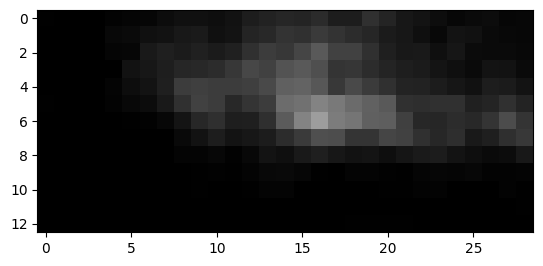

756


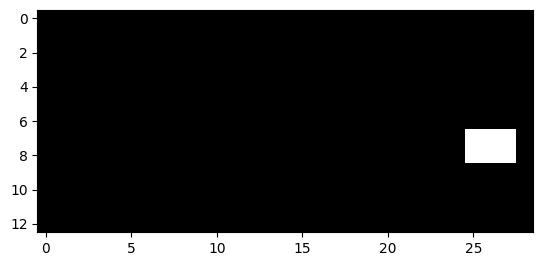

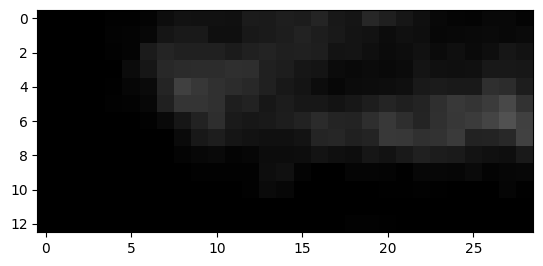

757


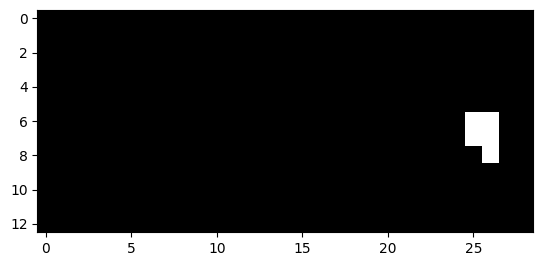

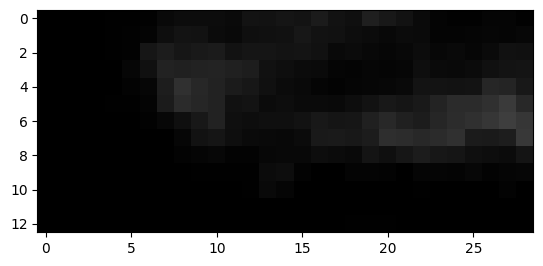

758


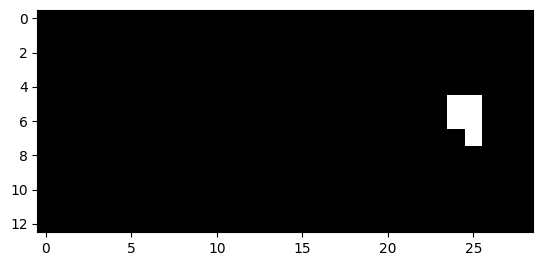

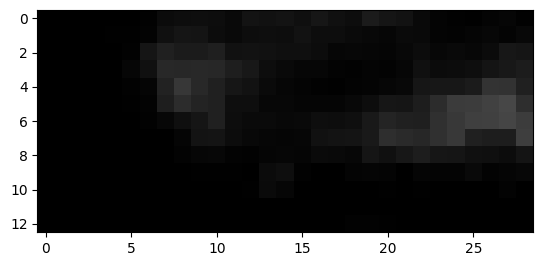

759


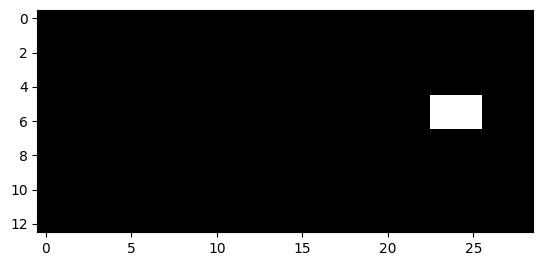

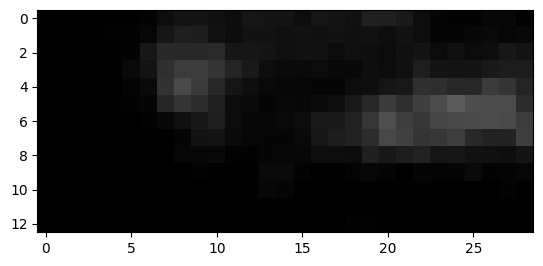

760


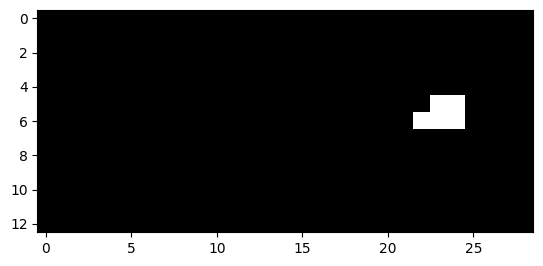

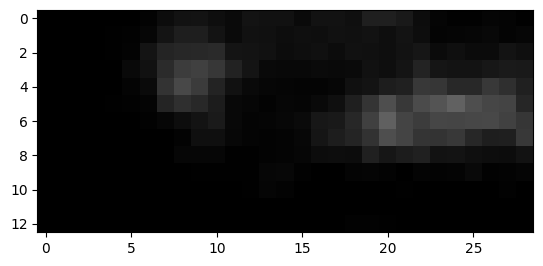

761


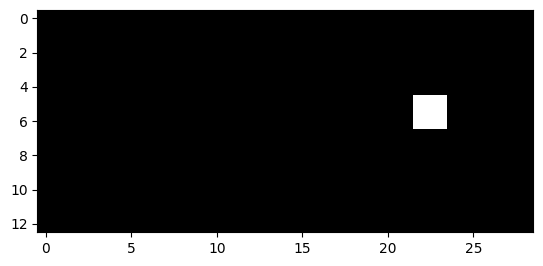

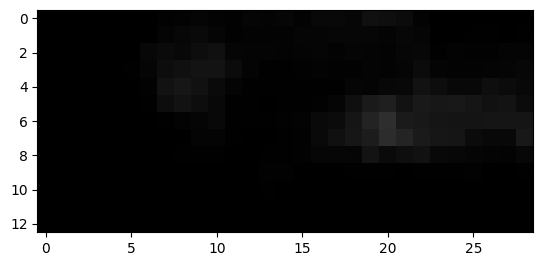

762


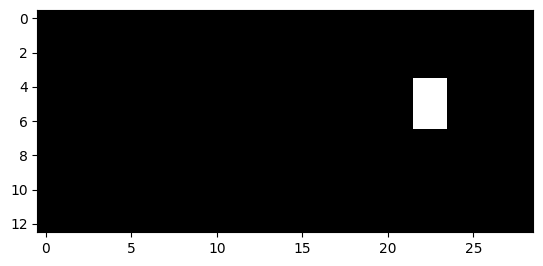

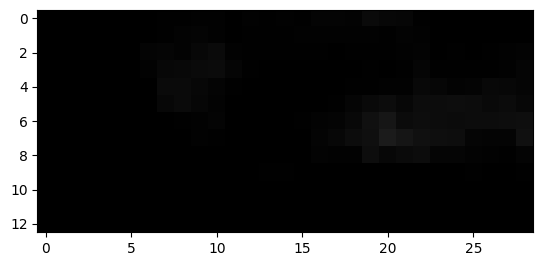

763


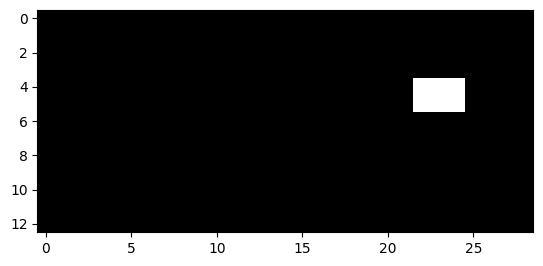

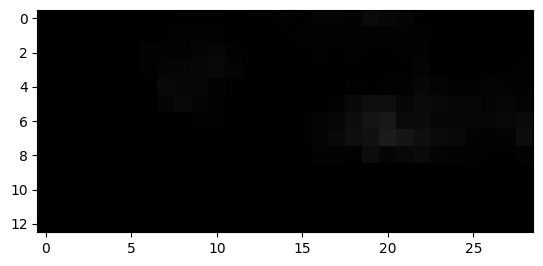

764


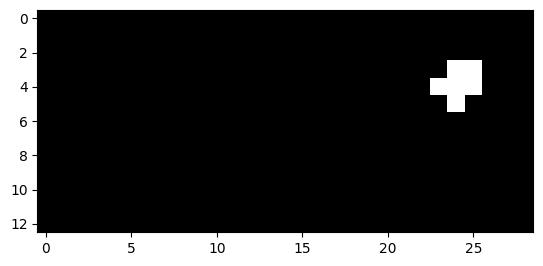

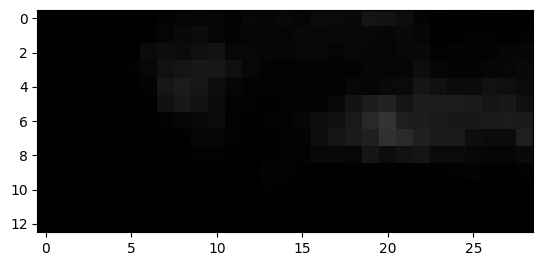

765


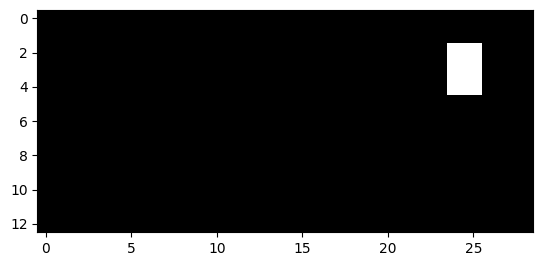

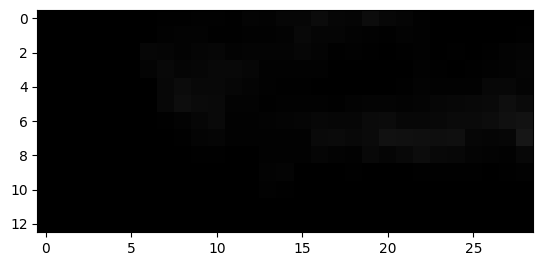

766


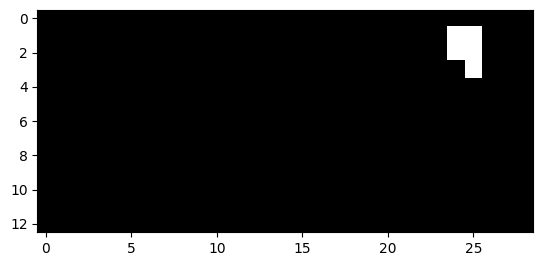

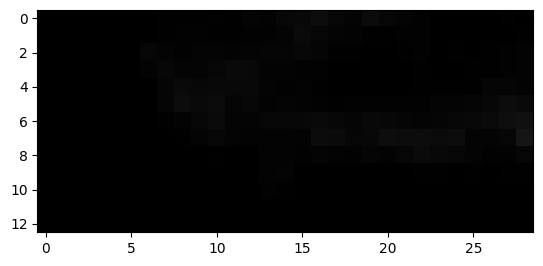

767


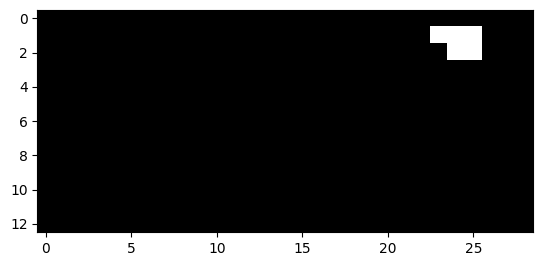

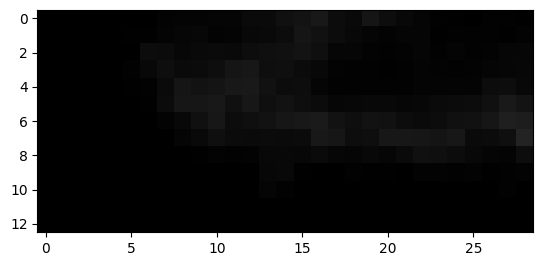

768


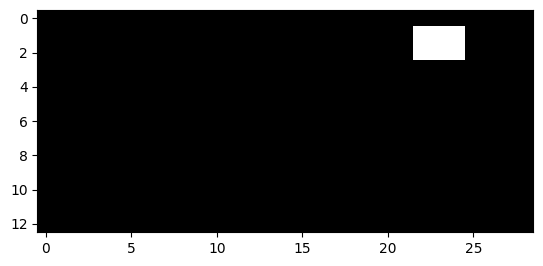

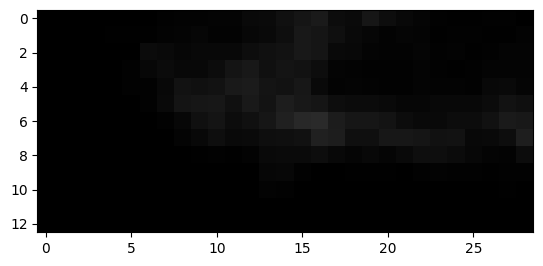

791


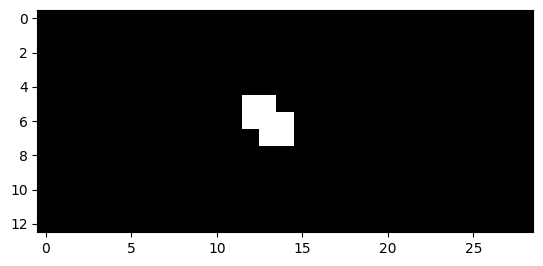

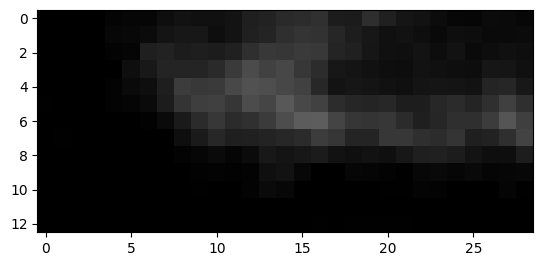

792


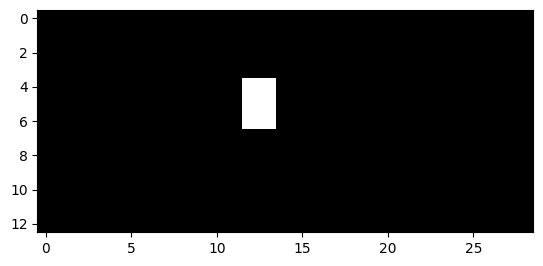

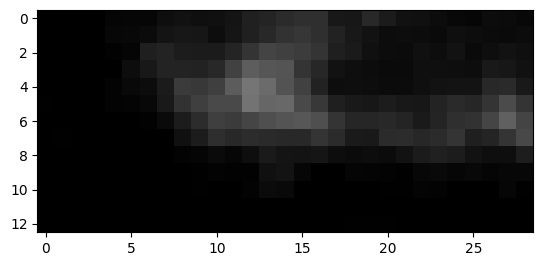

793


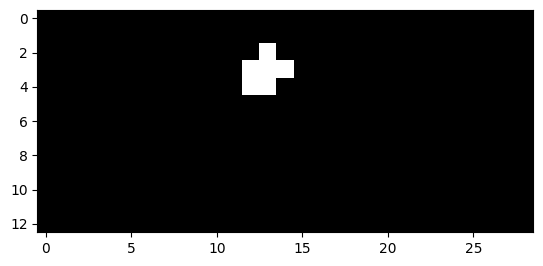

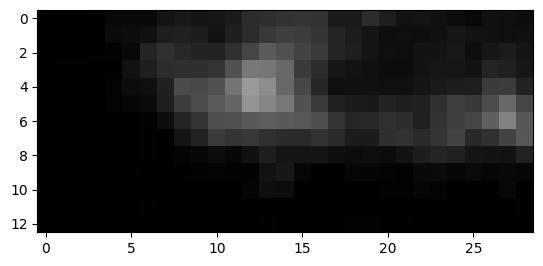

794


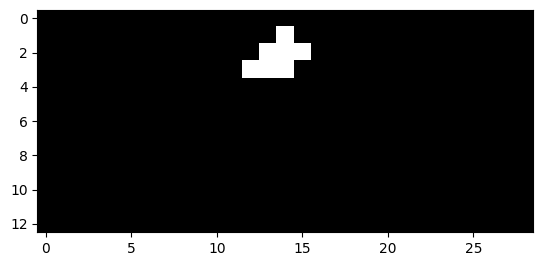

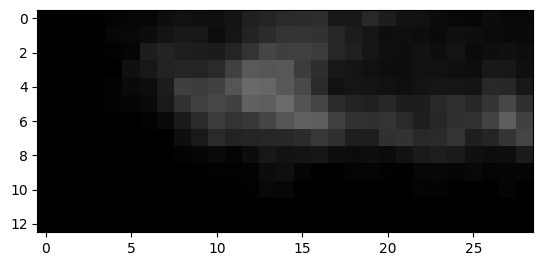

795


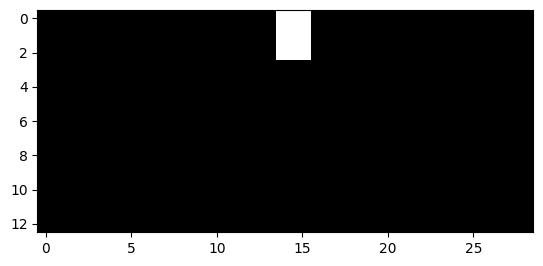

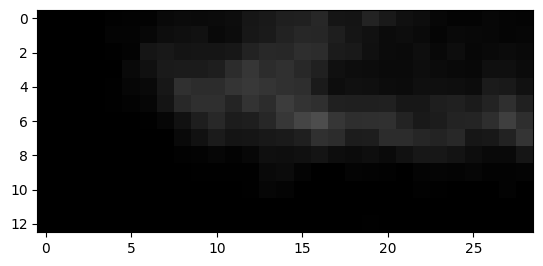

796


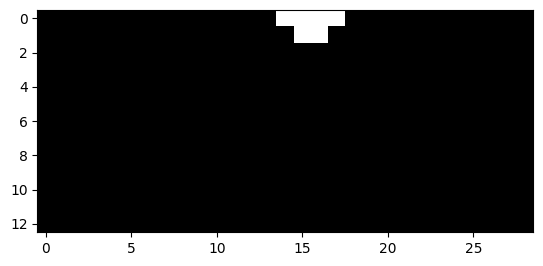

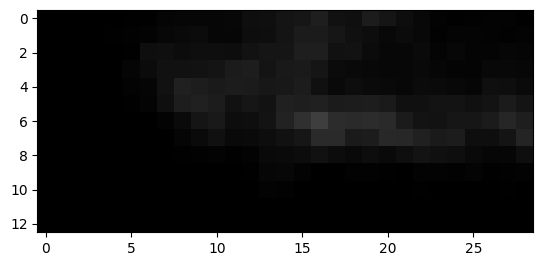

802


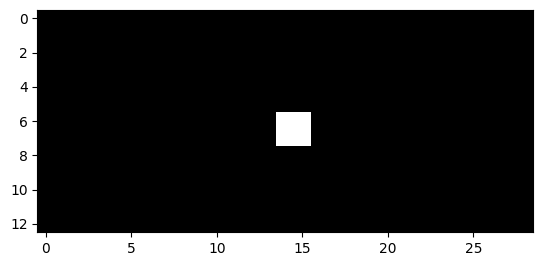

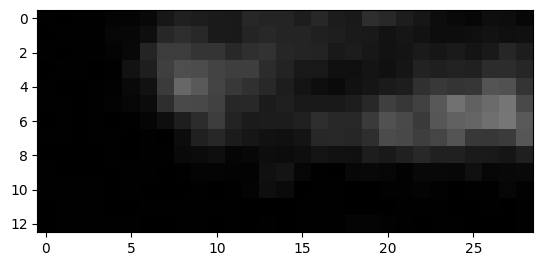

803


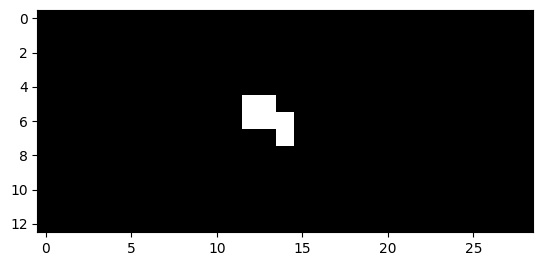

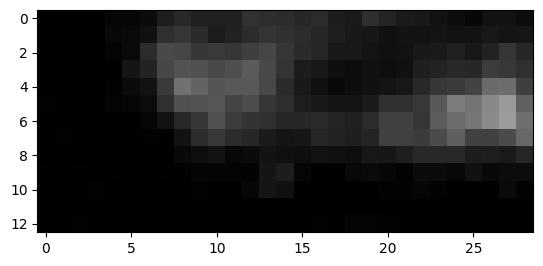

804


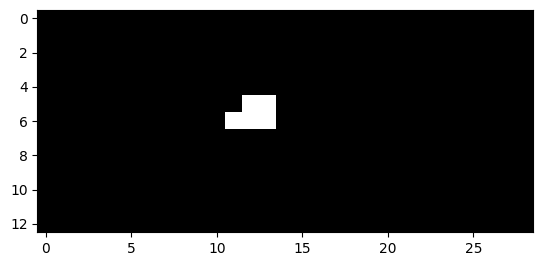

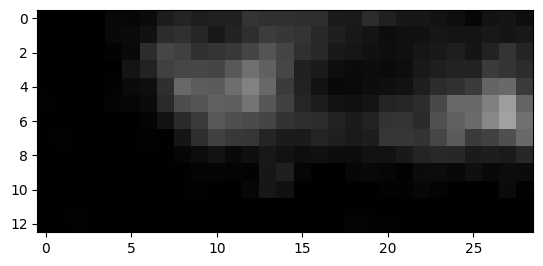

805


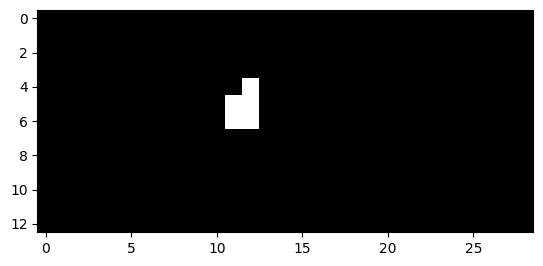

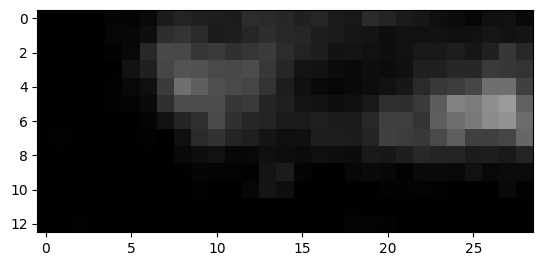

806


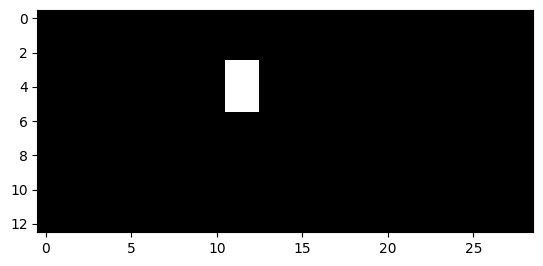

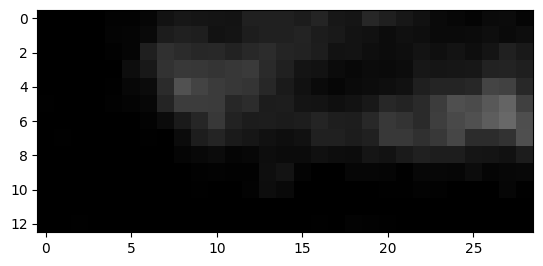

807


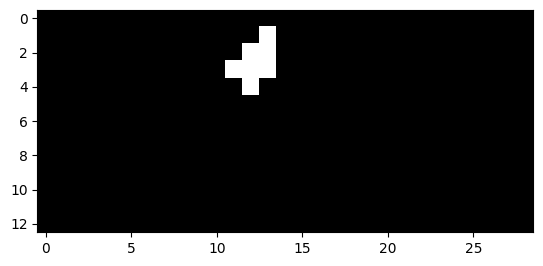

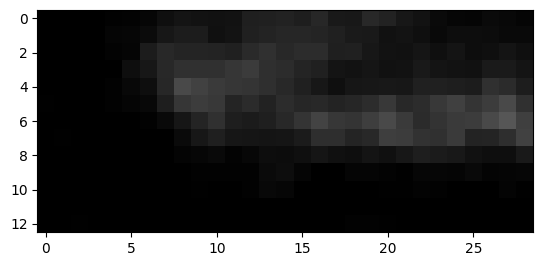

808


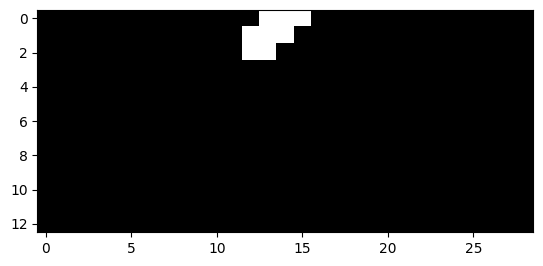

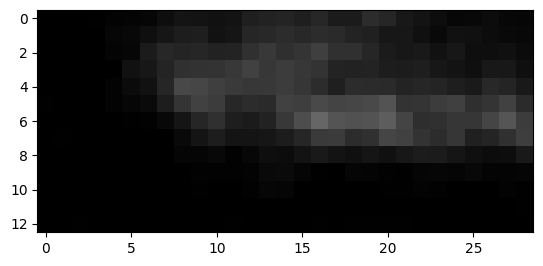

809


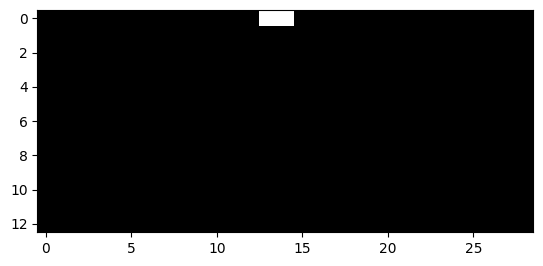

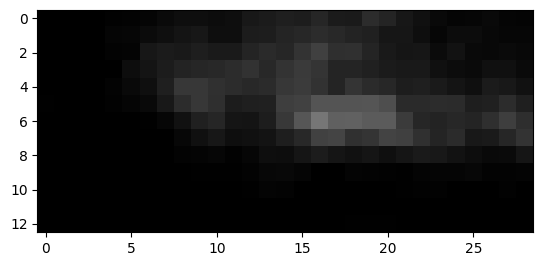

842


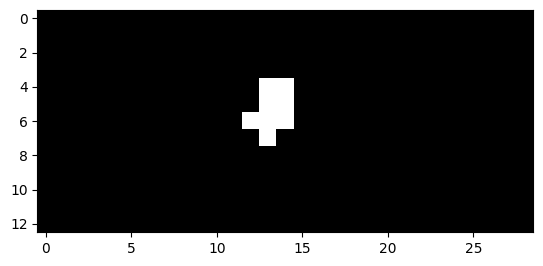

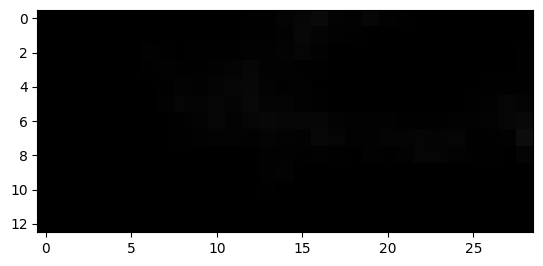

843


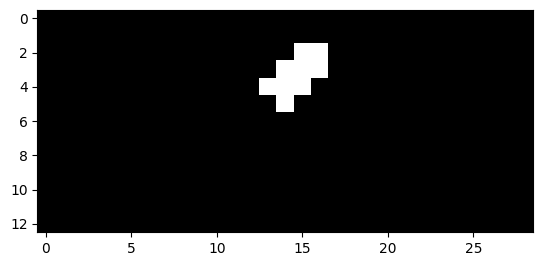

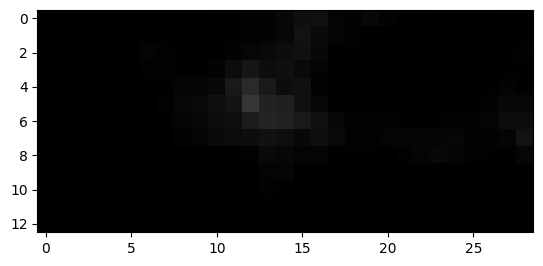

844


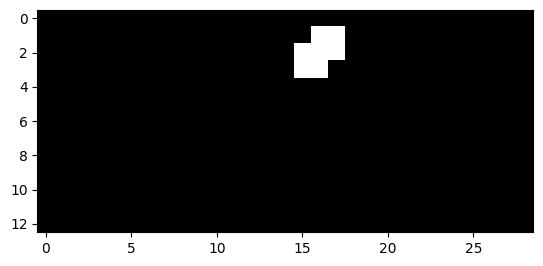

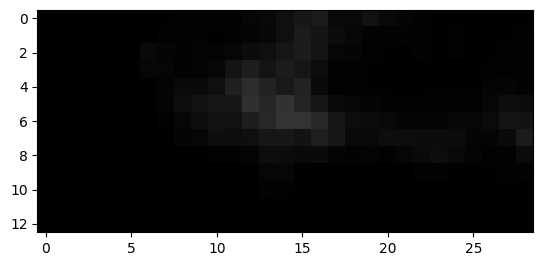

845


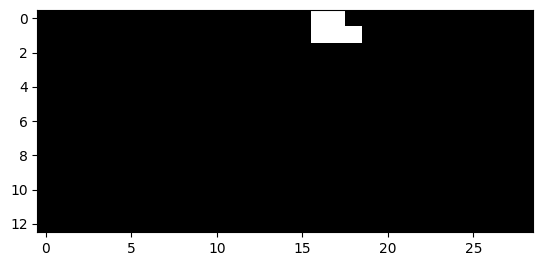

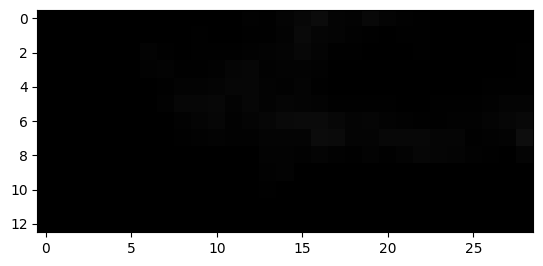

847


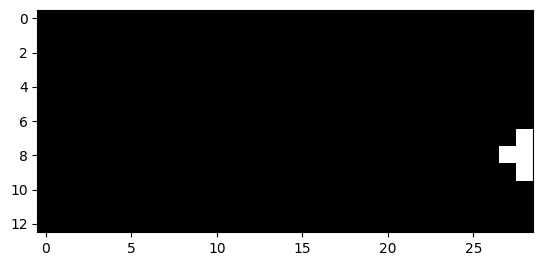

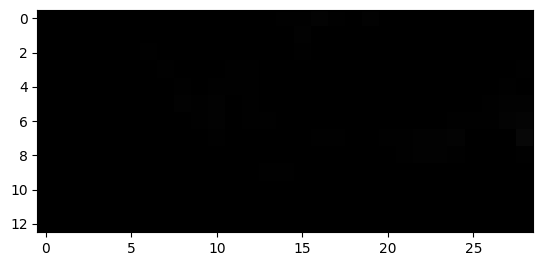

848


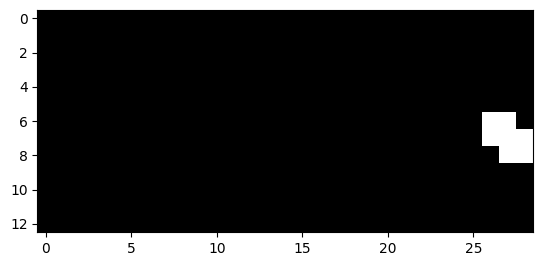

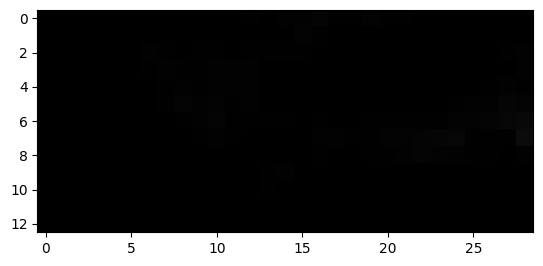

849


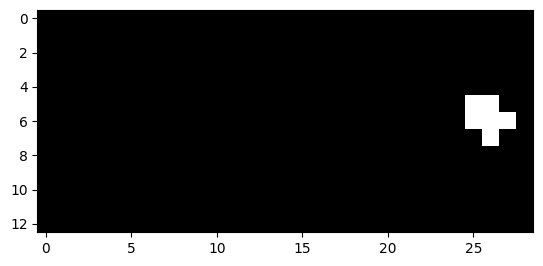

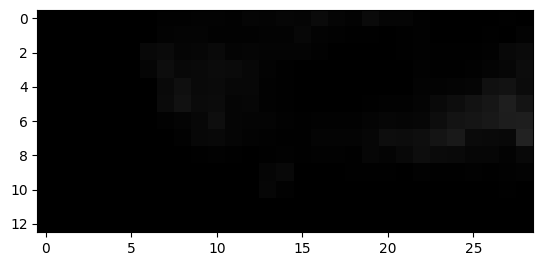

850


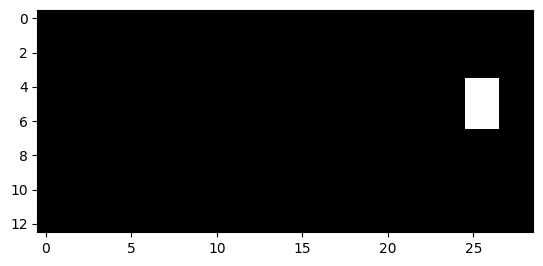

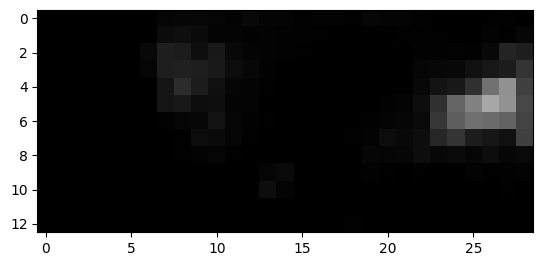

851


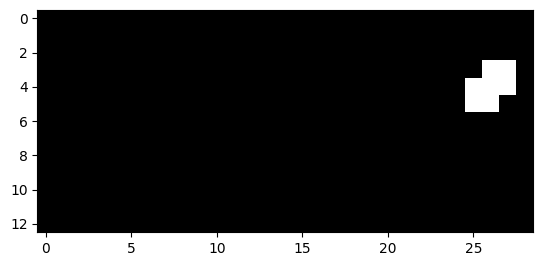

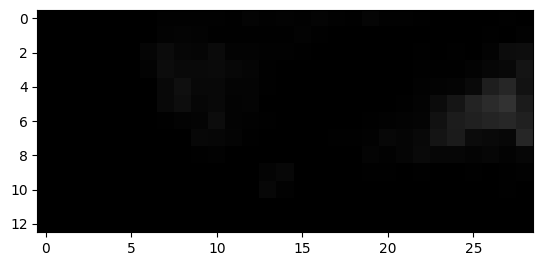

852


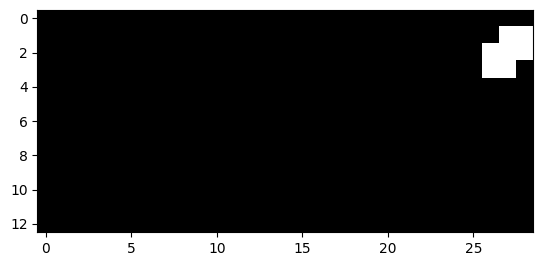

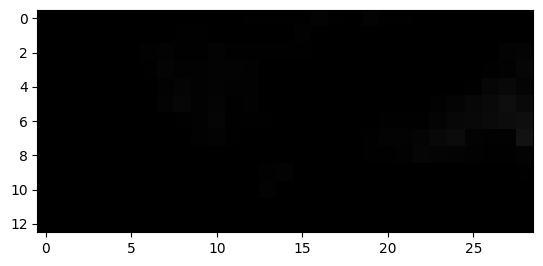

853


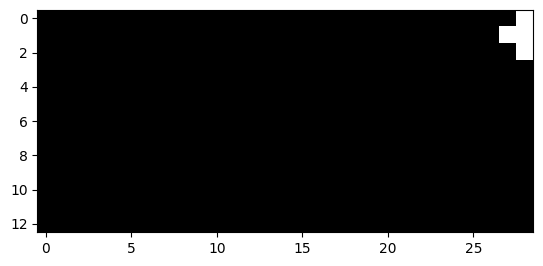

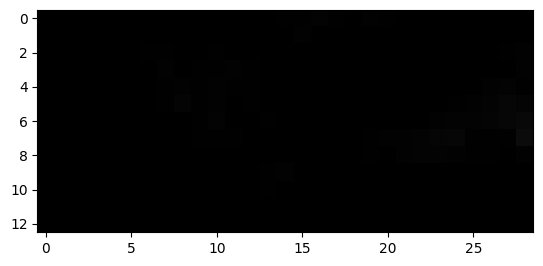

1114


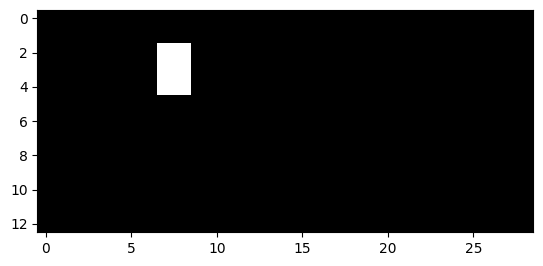

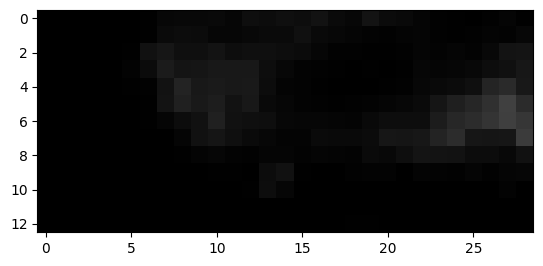

1115


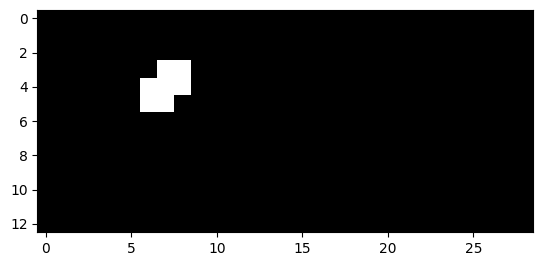

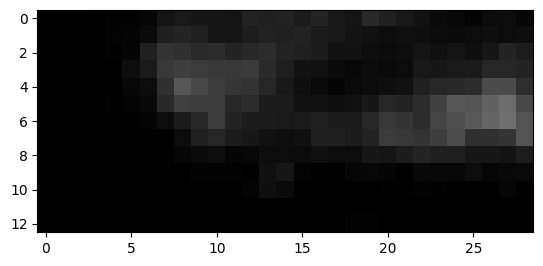

1130


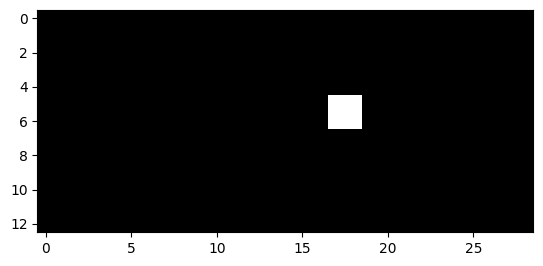

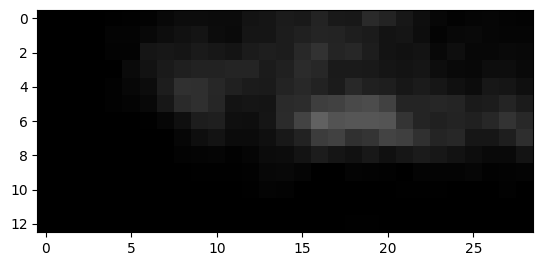

1131


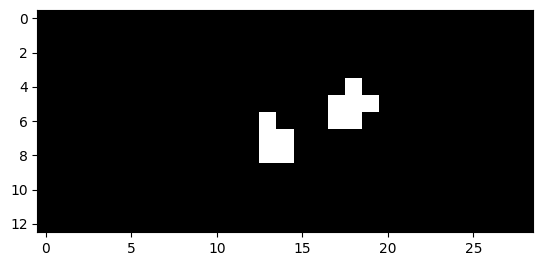

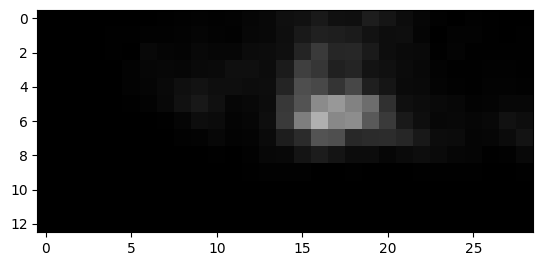

1132


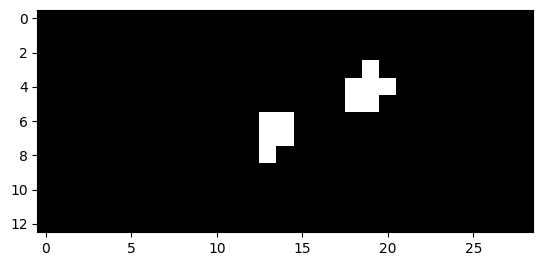

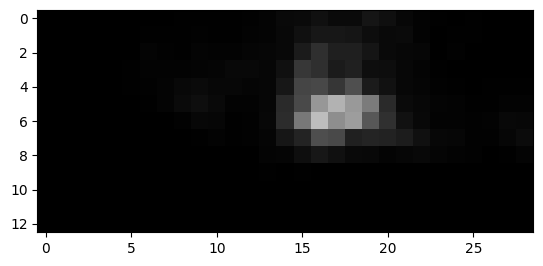

1133


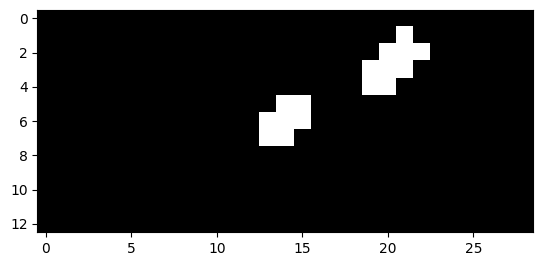

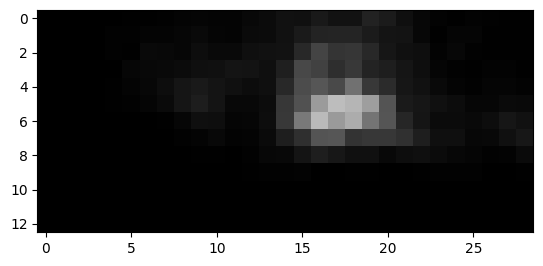

1134


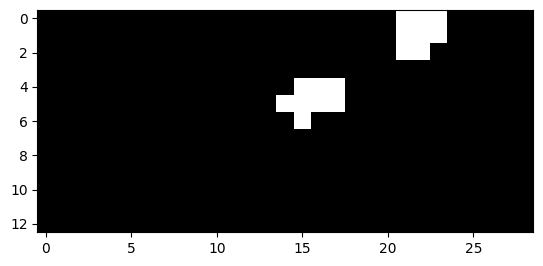

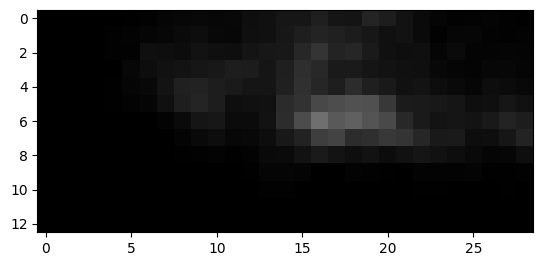

1135


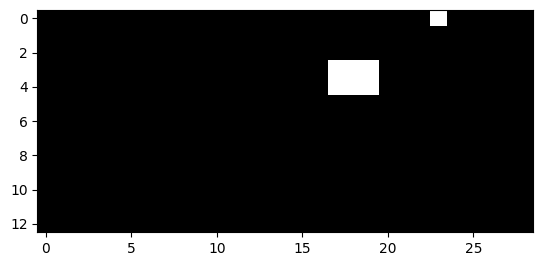

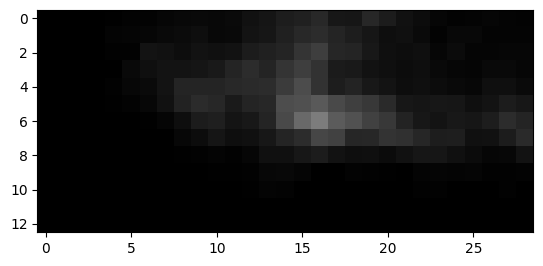

1136


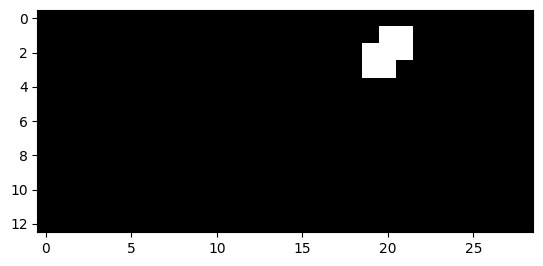

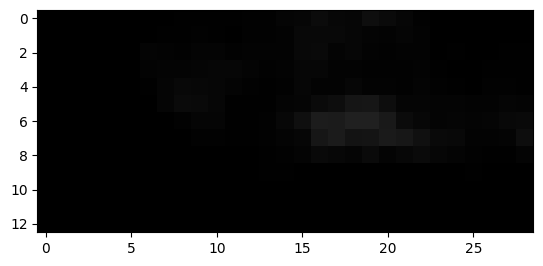

1137


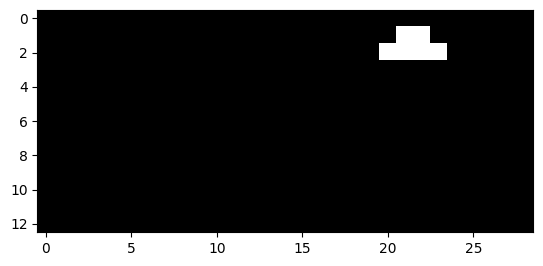

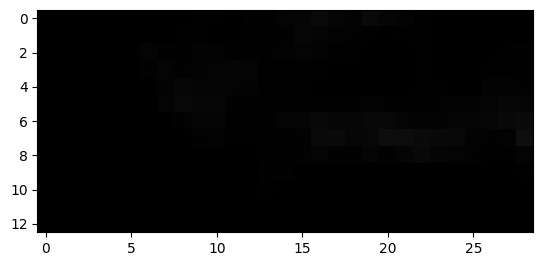

1138


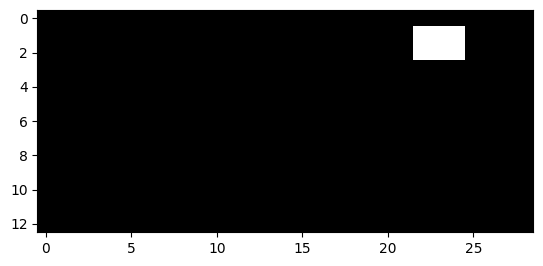

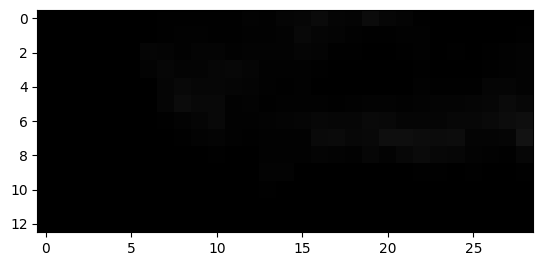

1139


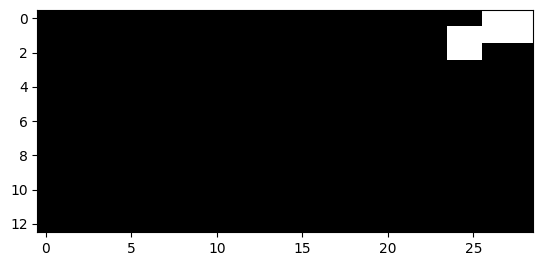

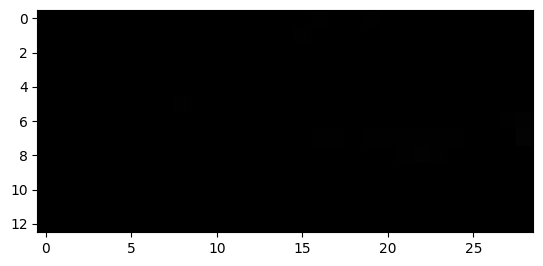

1140


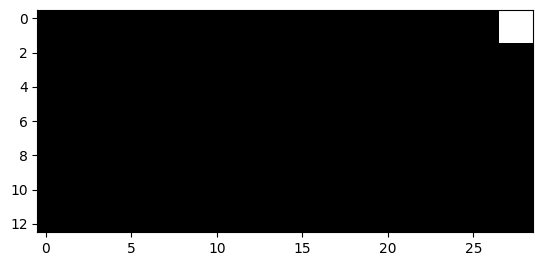

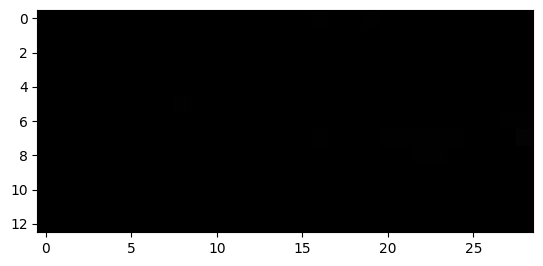

1155


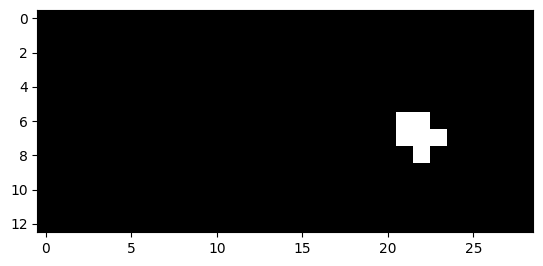

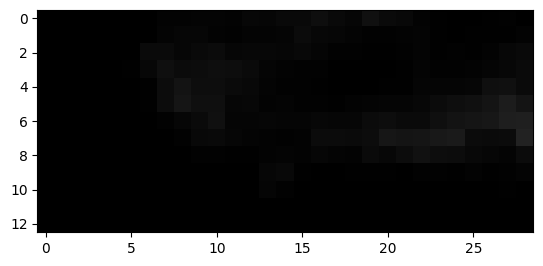

1156


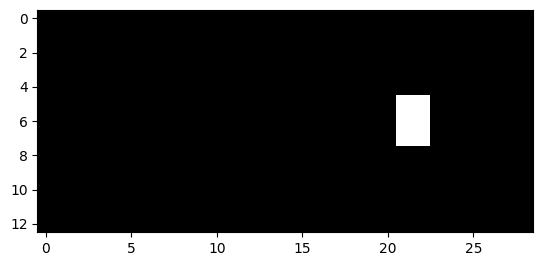

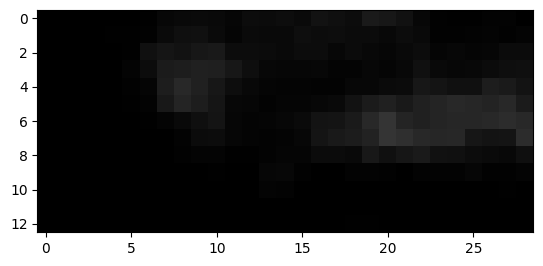

1157


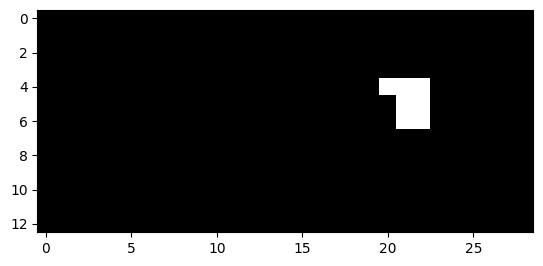

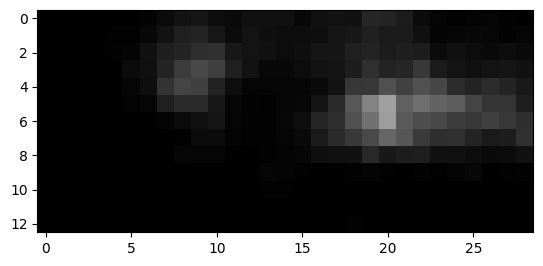

1158


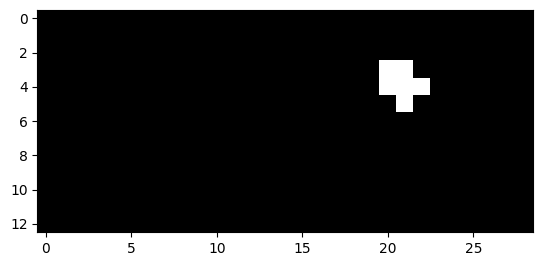

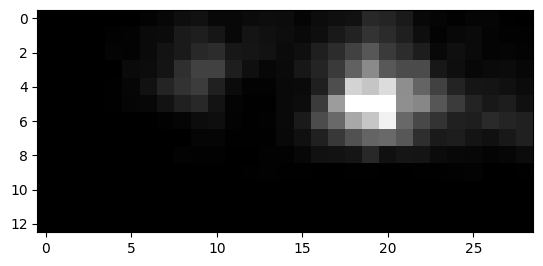

1159


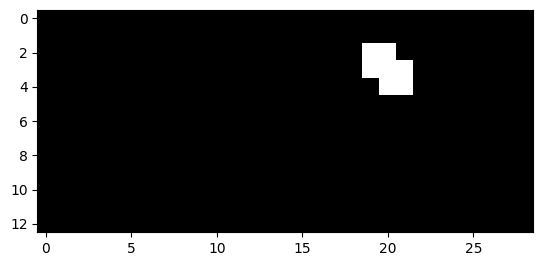

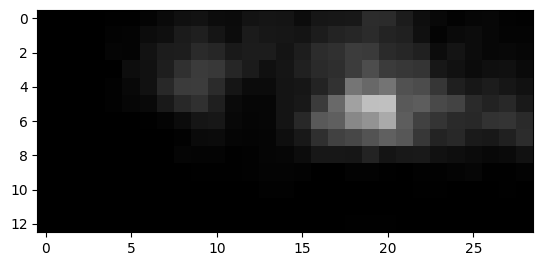

1160


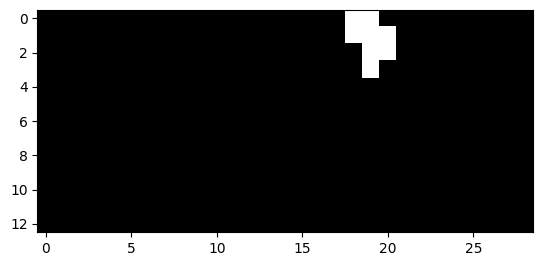

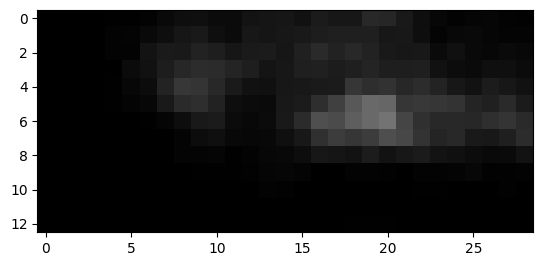

1161


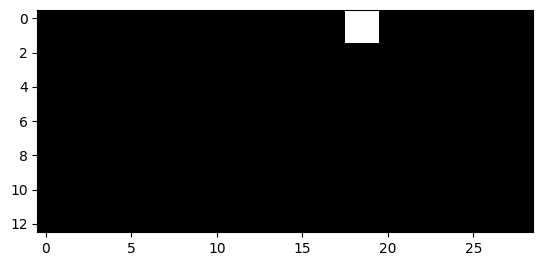

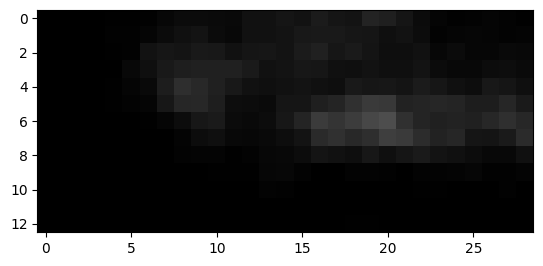

1162


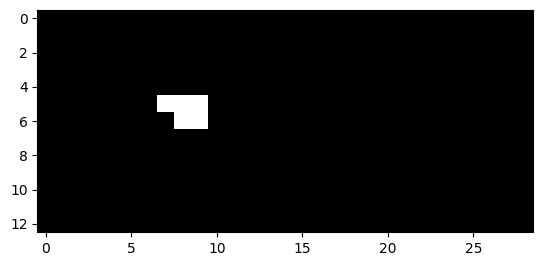

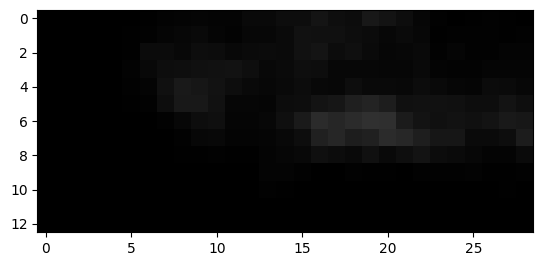

1163


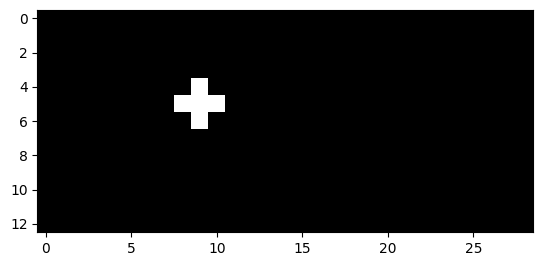

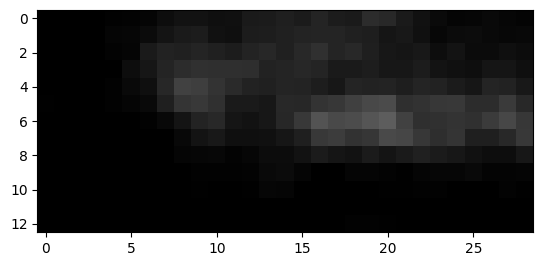

1164


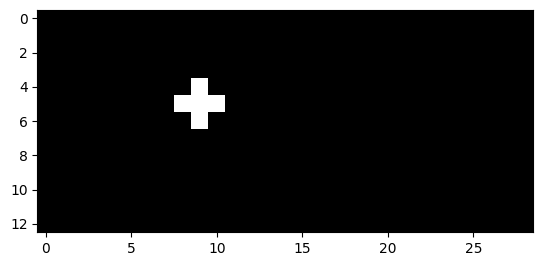

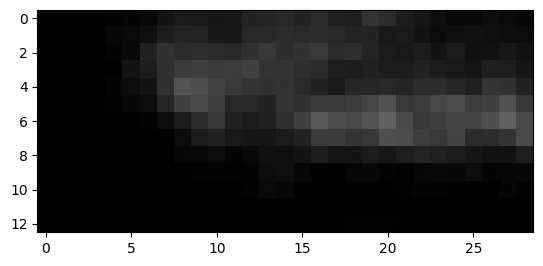

1165


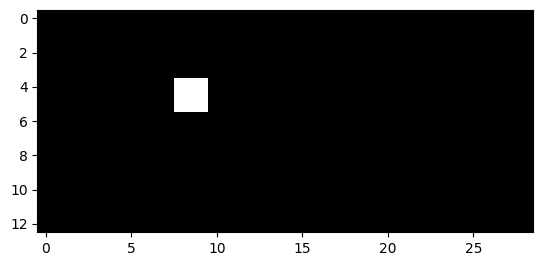

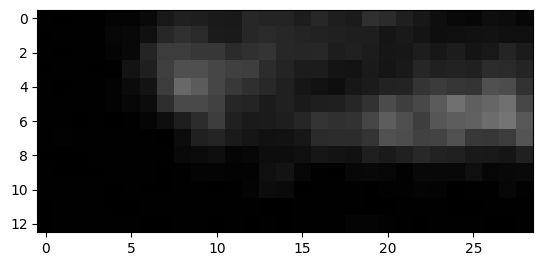

1166


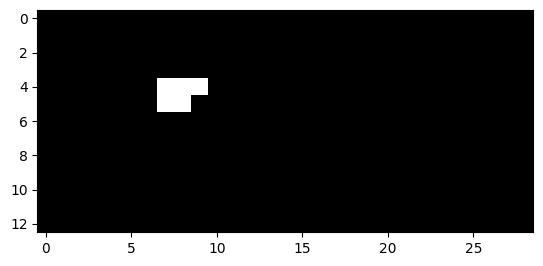

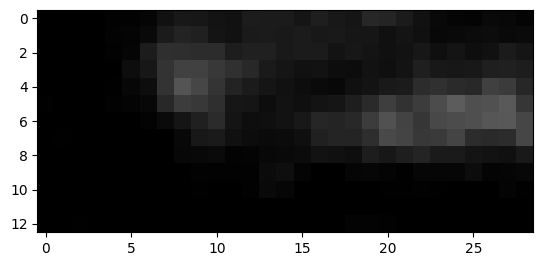

1167


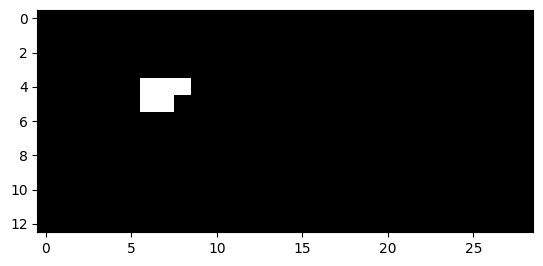

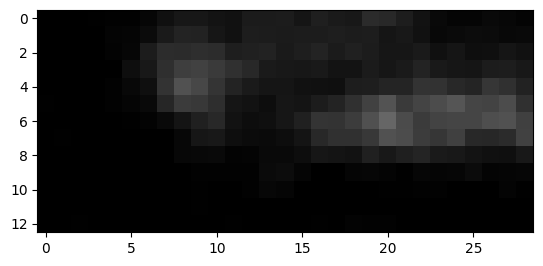

1169


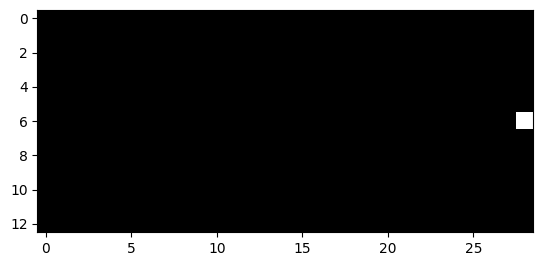

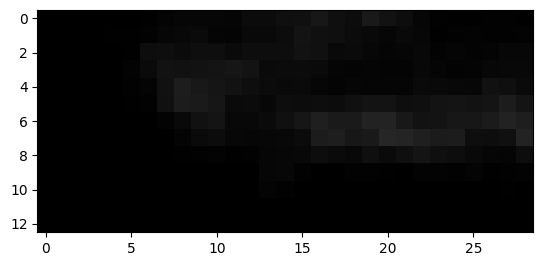

1170


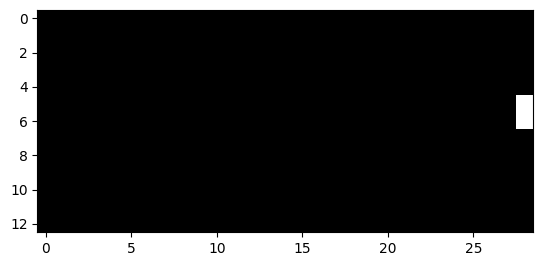

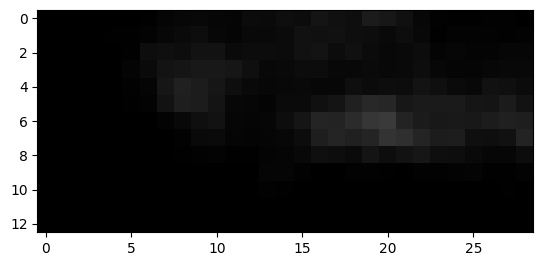

1171


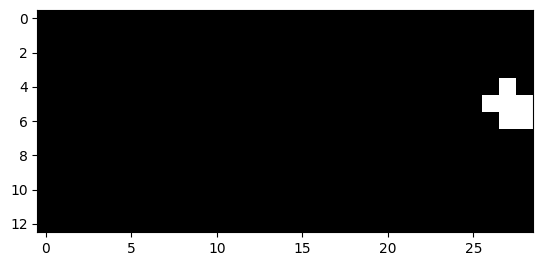

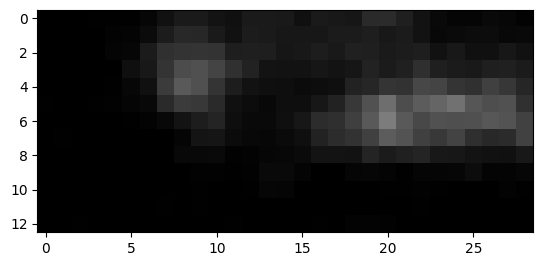

1172


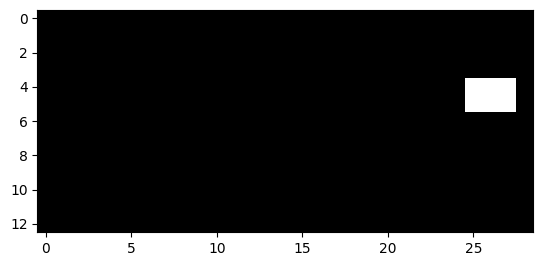

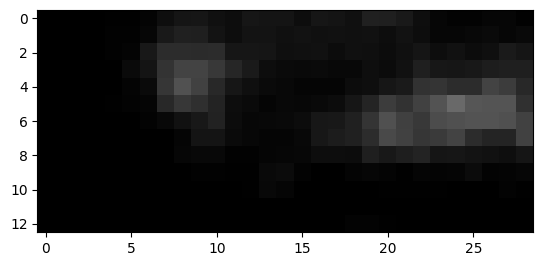

1173


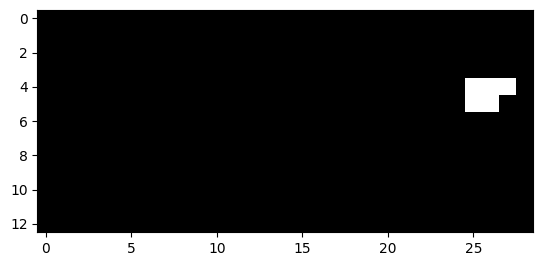

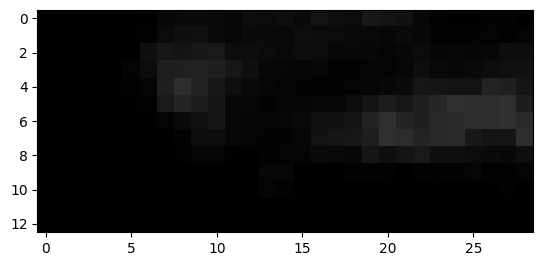

1174


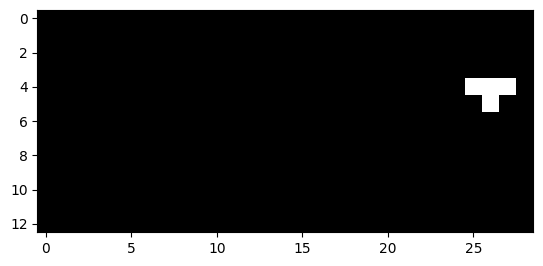

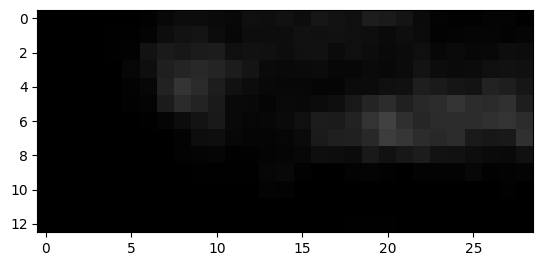

1175


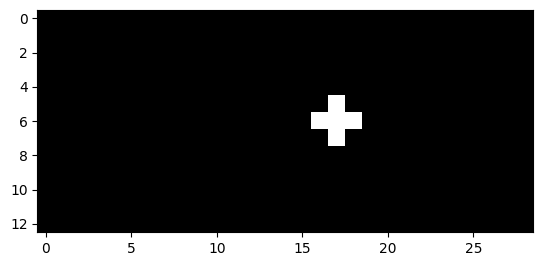

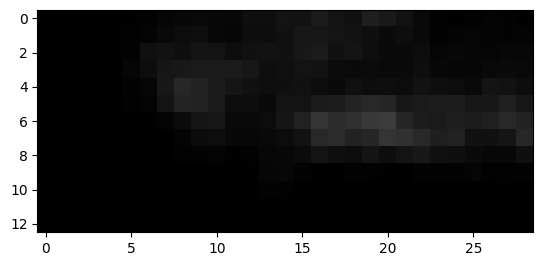

1176


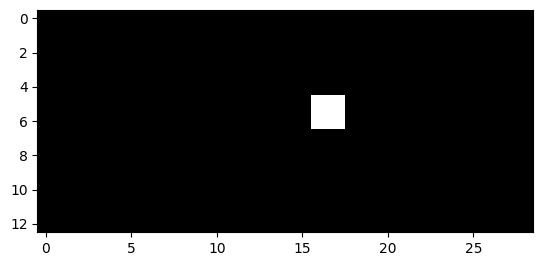

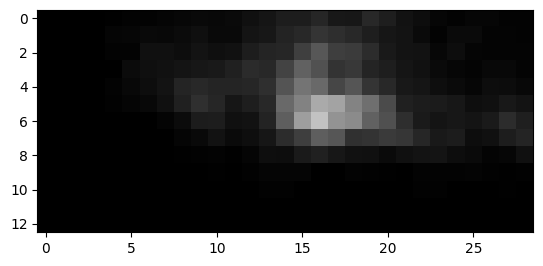

1177


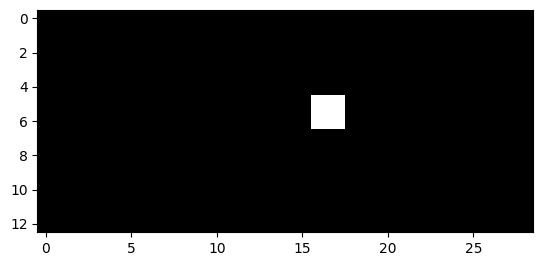

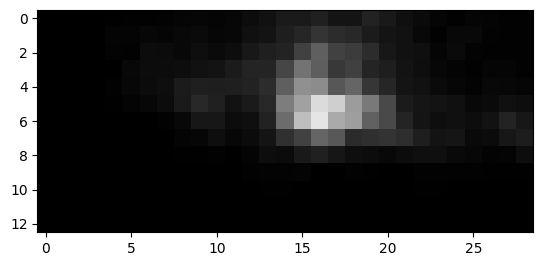

1178


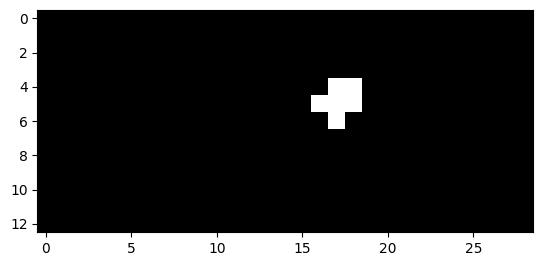

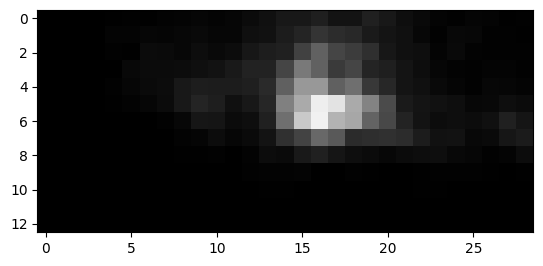

1179


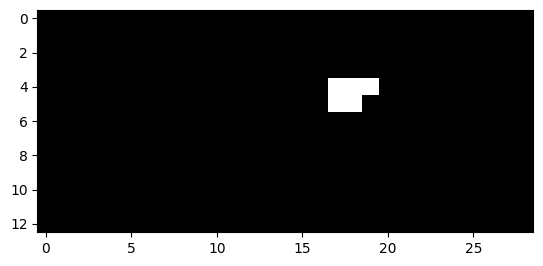

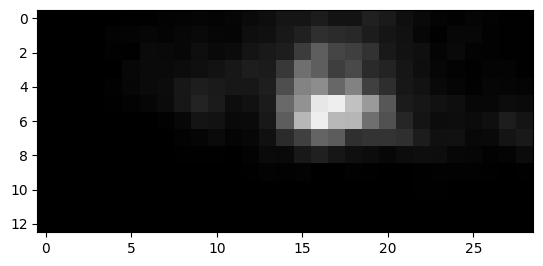

1180


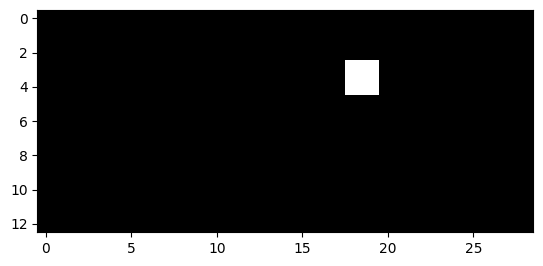

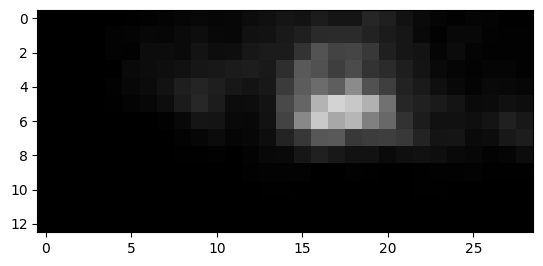

1181


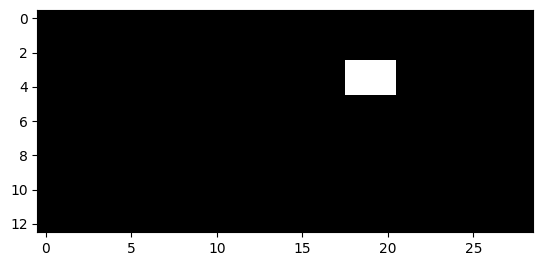

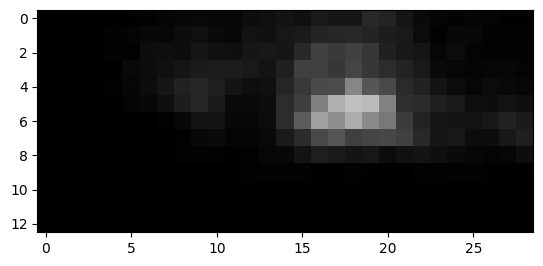

1182


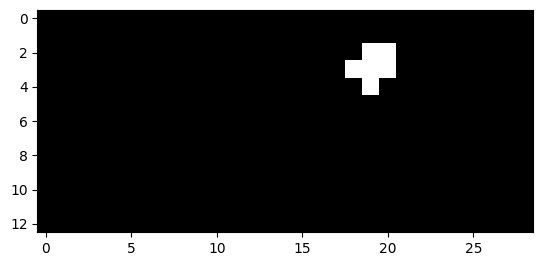

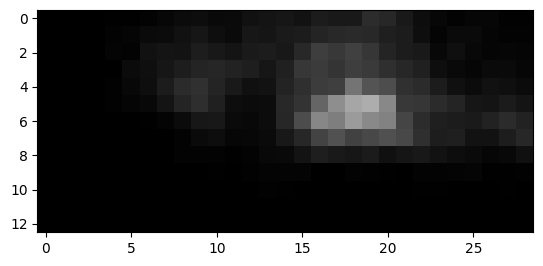

1183


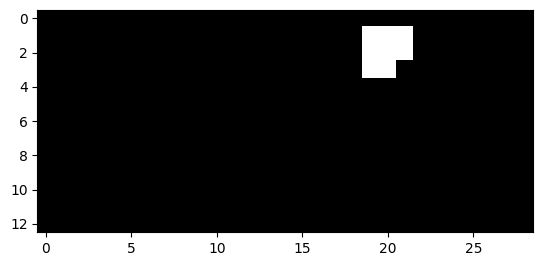

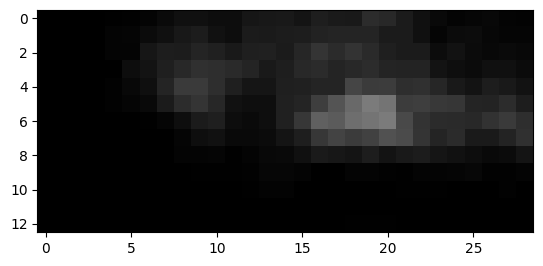

1184


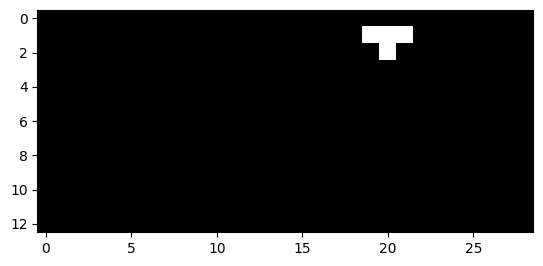

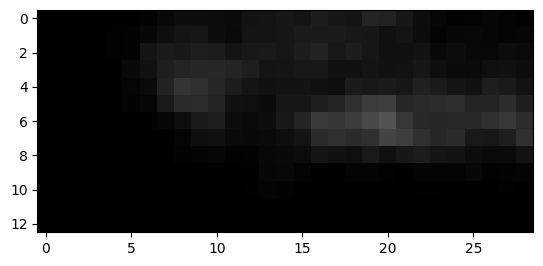

1207


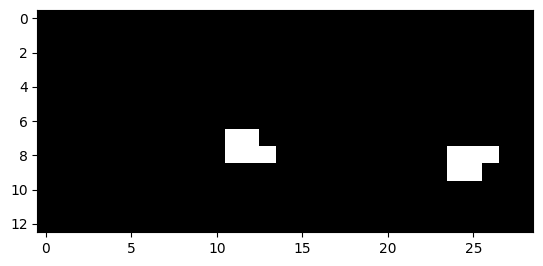

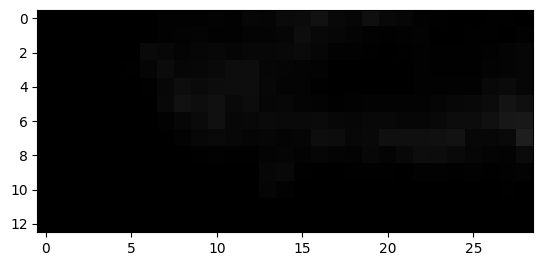

1208


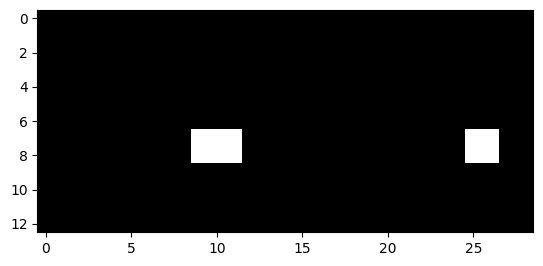

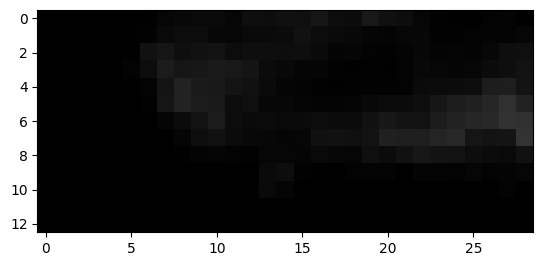

1209


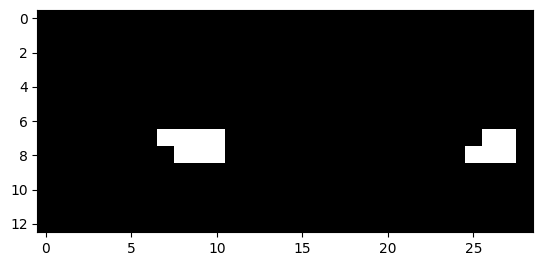

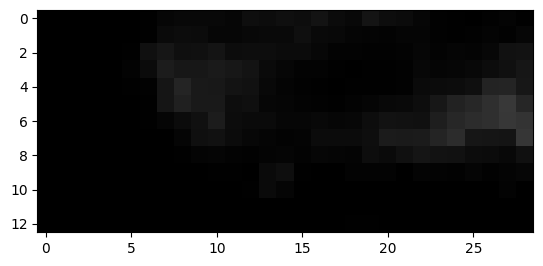

1210


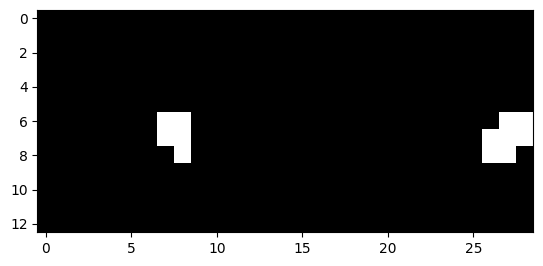

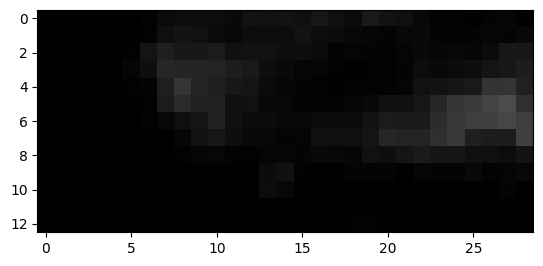

1211


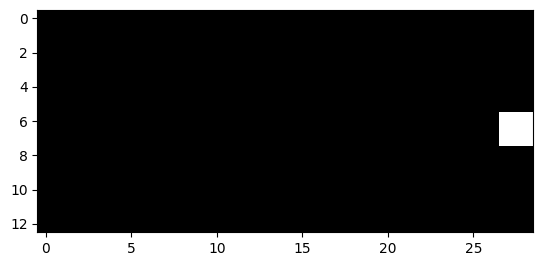

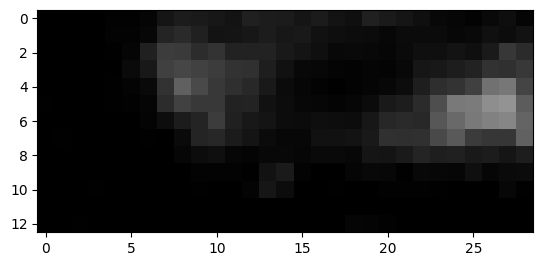

1212


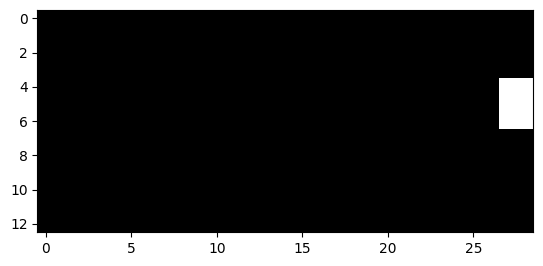

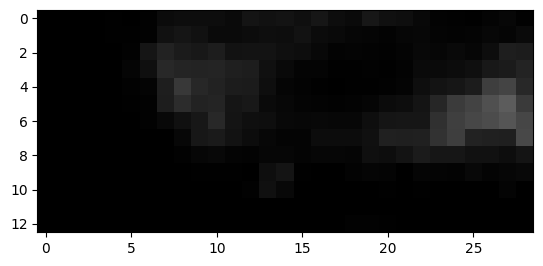

1213


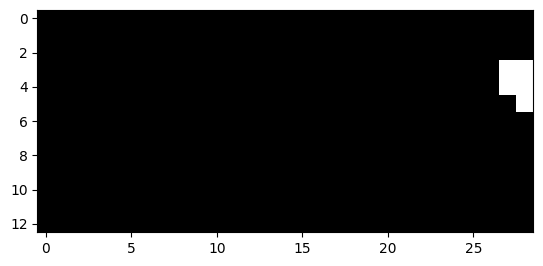

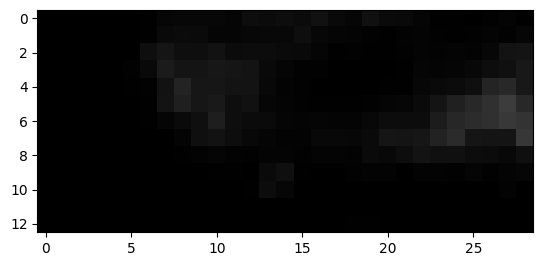

172


In [42]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

# "Autoencoder" with image

### Autoencoder

In [78]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(16, (4,4), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((4,4), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(16, (4,4), activation='relu', padding='same'))
model.add(layers.UpSampling2D((4, 4)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((1,2),(1,2))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_155 (Conv2D)         (None, 13, 29, 8)         584       
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 7, 15, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_156 (Conv2D)         (None, 7, 15, 16)         2064      
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 2, 4, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_157 (Conv2D)         (None, 2, 4, 16)          4112      
                                                                 
 up_sampling2d_25 (UpSamplin  (None, 8, 16, 16)      

In [79]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-17 15:15:59.898954: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-17 15:16:00.382902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0251

2023-01-17 15:16:06.814657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 7s 13ms/step - loss: 0.0251 - val_loss: 0.0088
Epoch 2/100
354/354 [==============================] - 4s 12ms/step - loss: 0.0088 - val_loss: 0.0069
Epoch 3/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 4/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 5/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 6/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 7/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 8/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 9/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 10/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0059 - val_loss

45/45 [==============================] - 0s 4ms/step


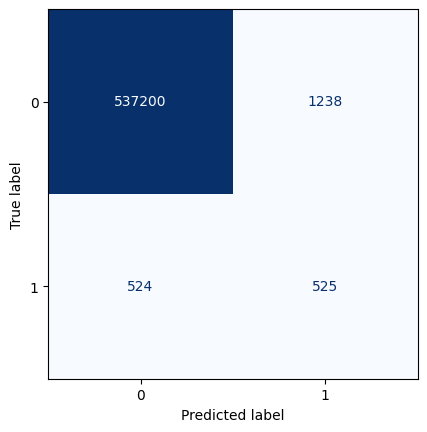

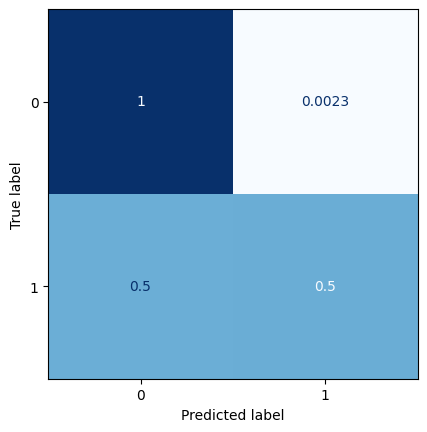

In [83]:
t = model.predict(test_img_std)

classes = []
for i in t.reshape(-1,1):
    if i<=0.1: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


19


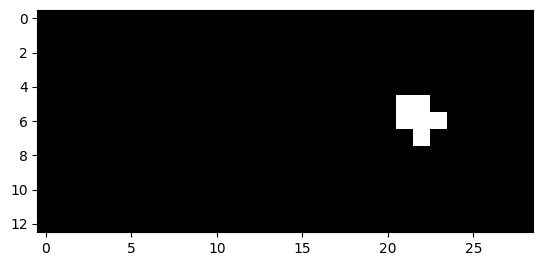

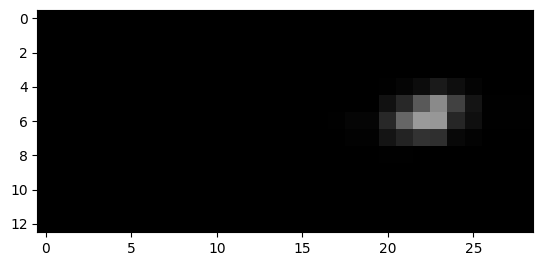

20


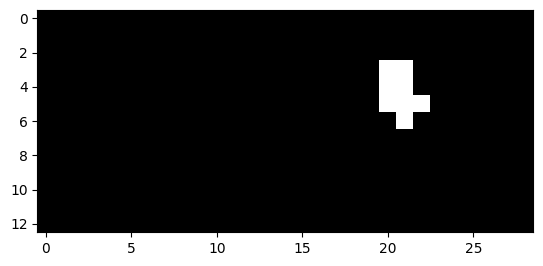

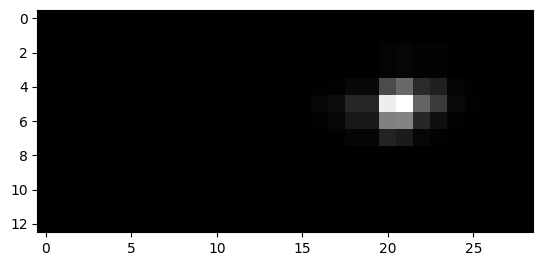

21


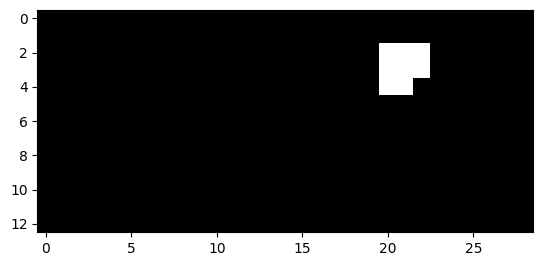

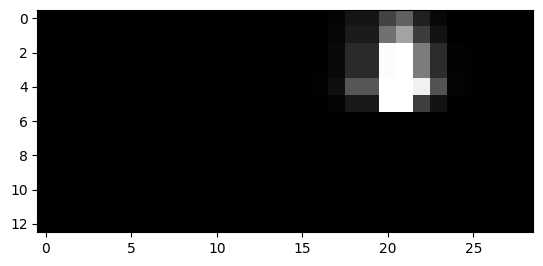

22


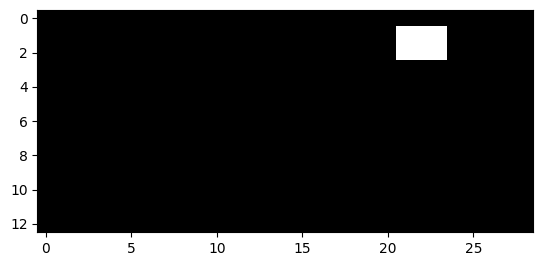

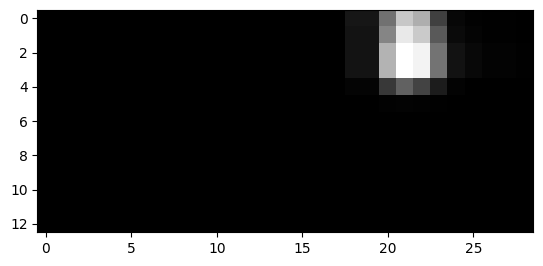

23


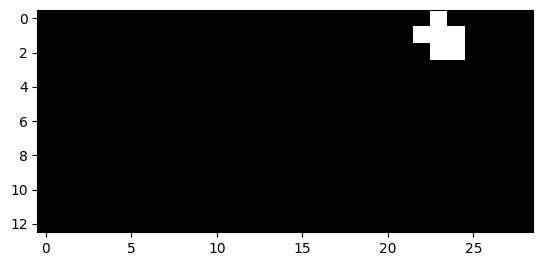

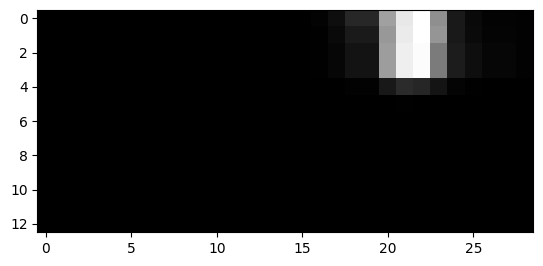

24


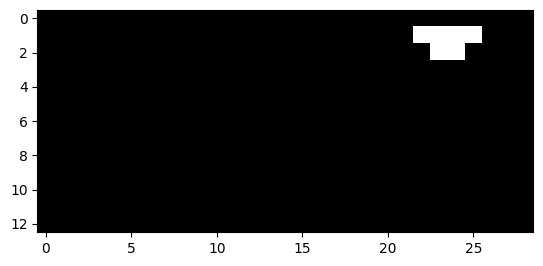

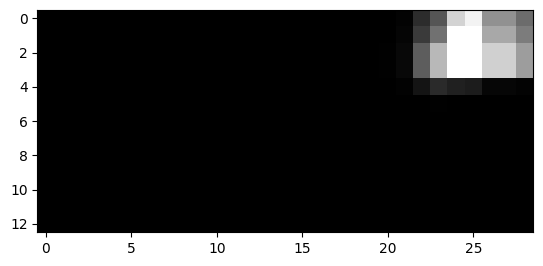

25


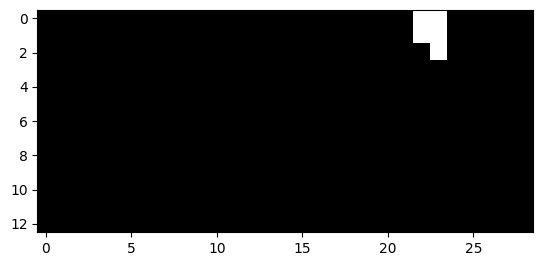

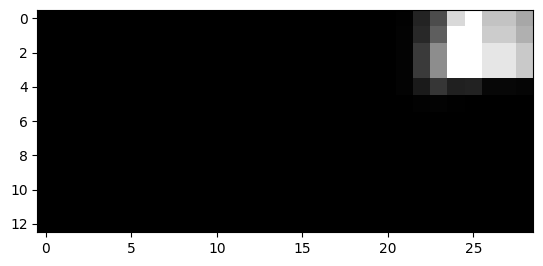

26


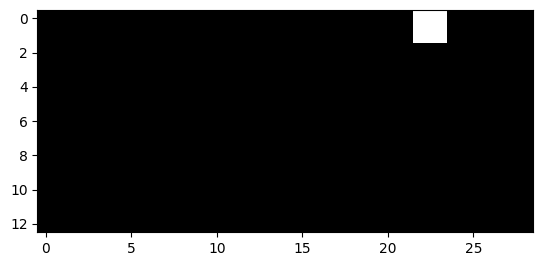

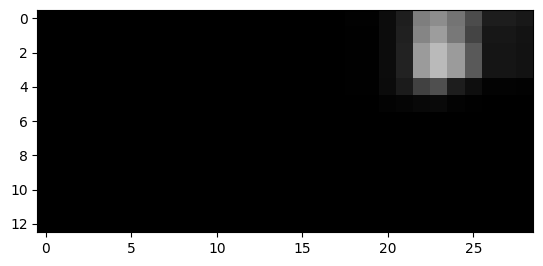

28


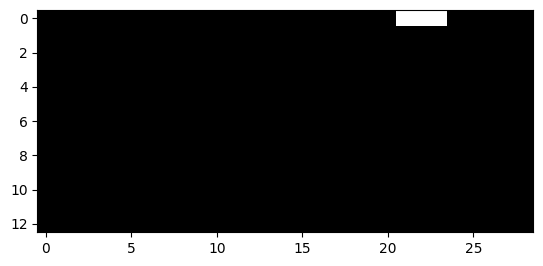

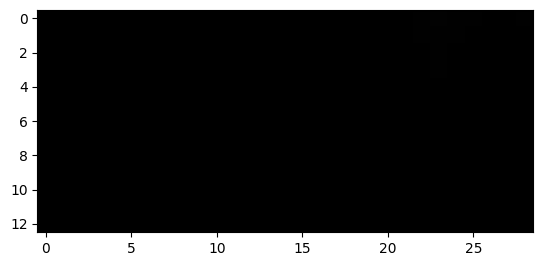

40


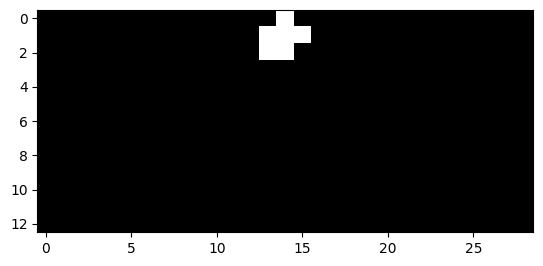

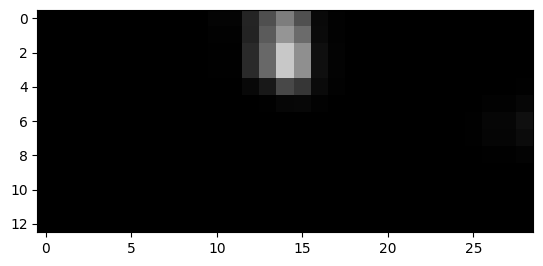

41


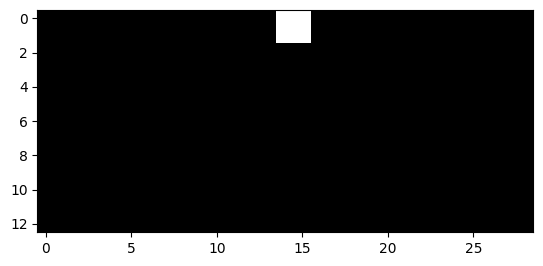

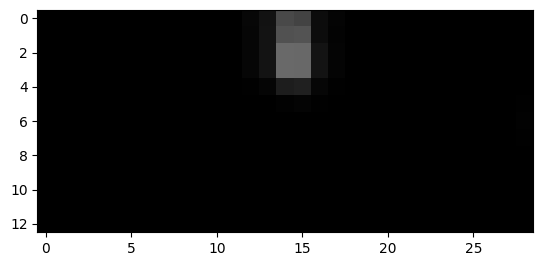

43


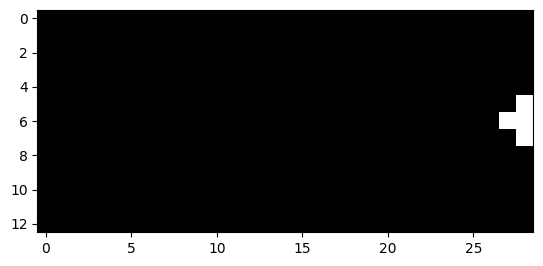

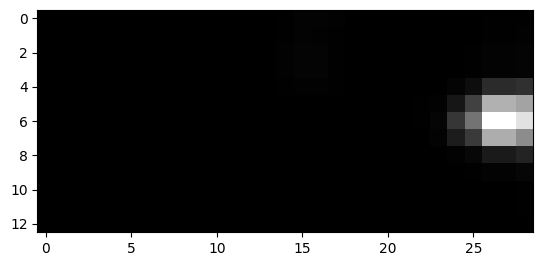

44


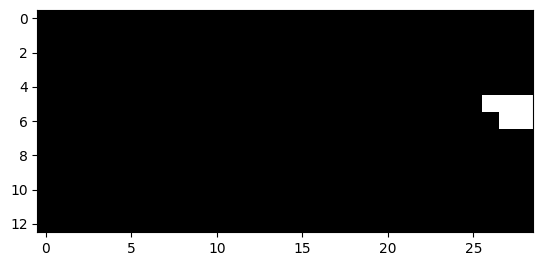

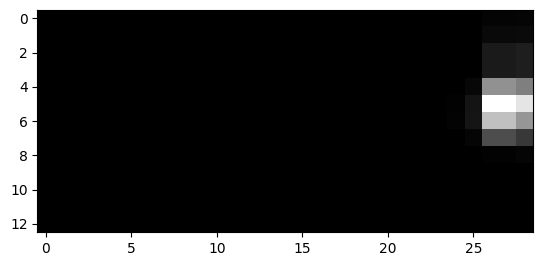

45


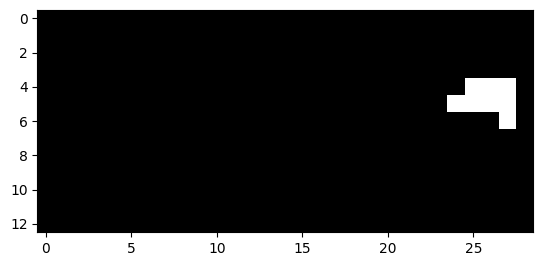

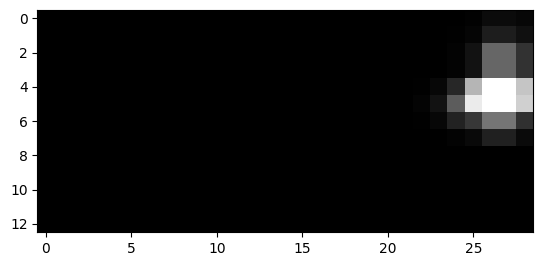

46


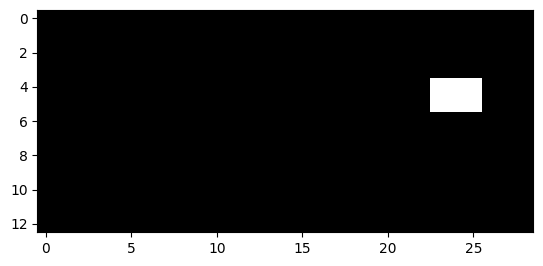

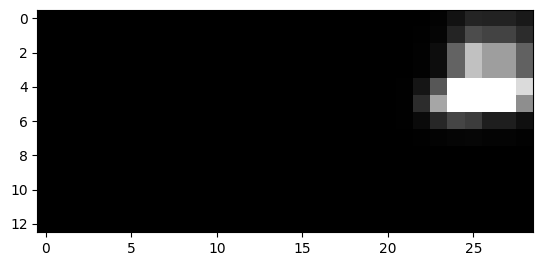

47


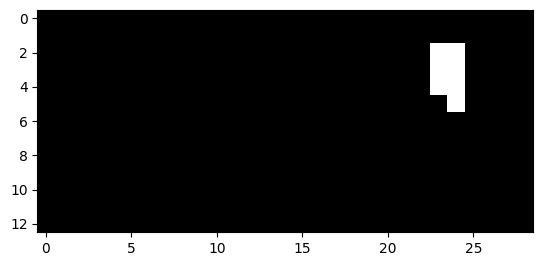

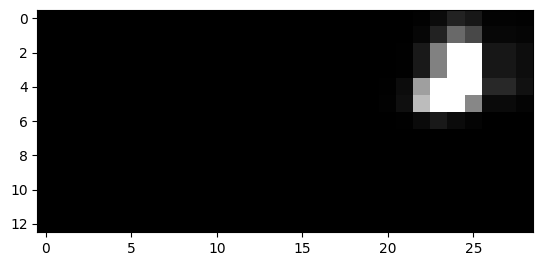

48


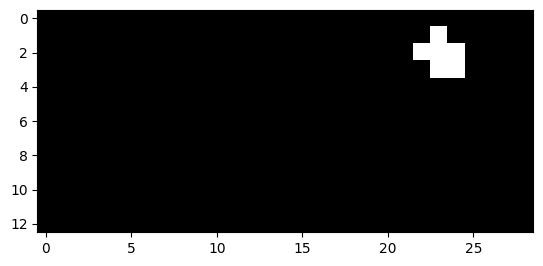

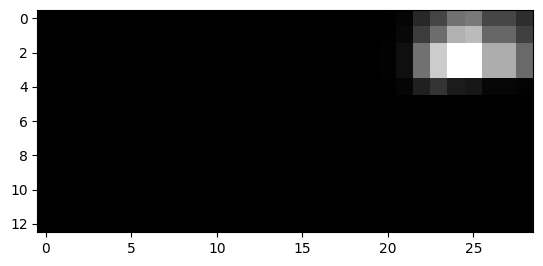

49


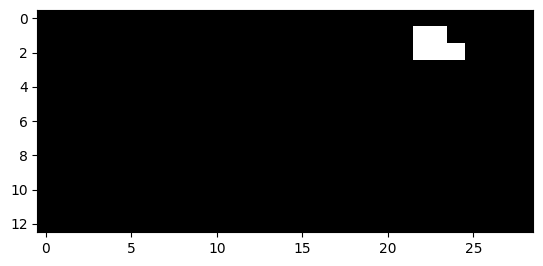

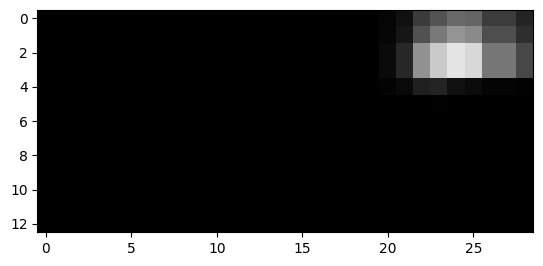

50


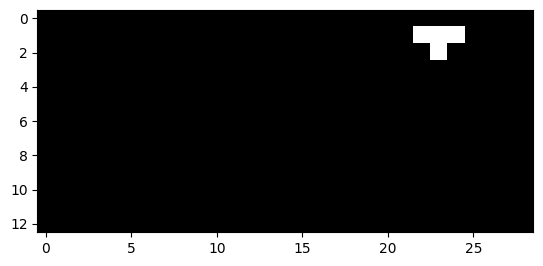

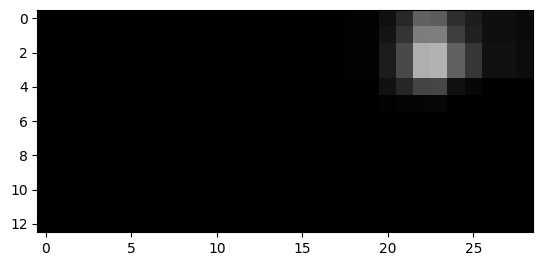

51


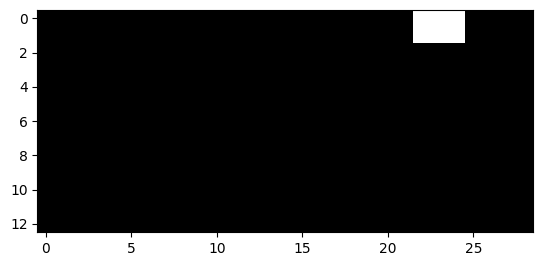

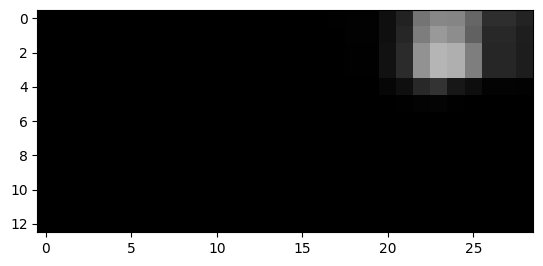

52


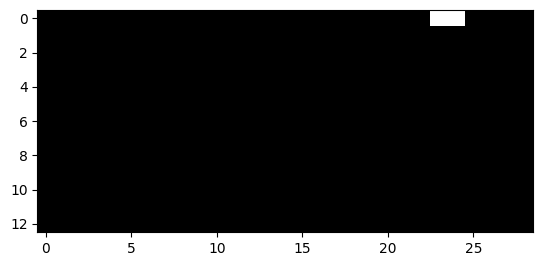

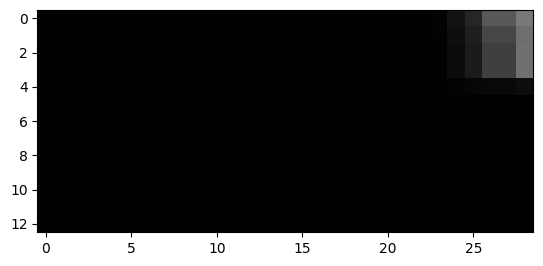

73


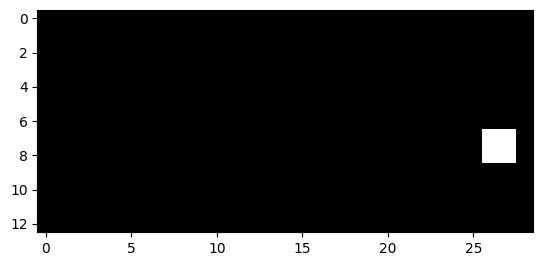

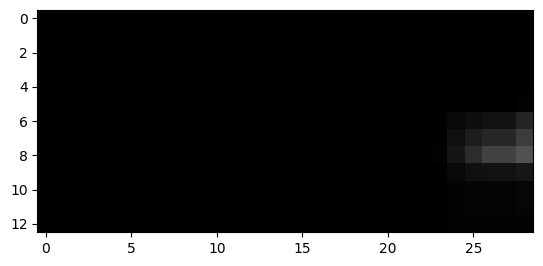

74


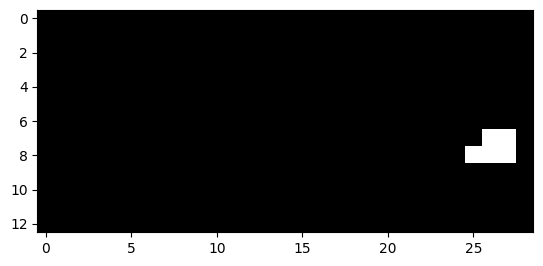

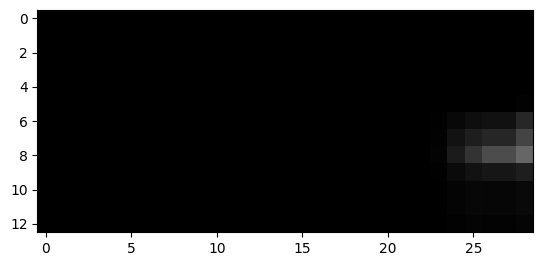

75


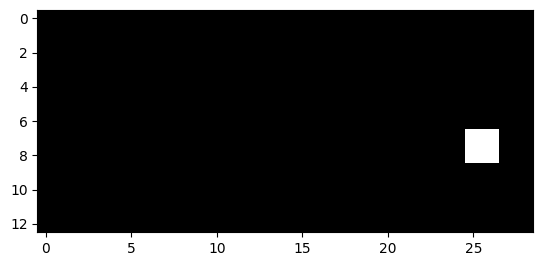

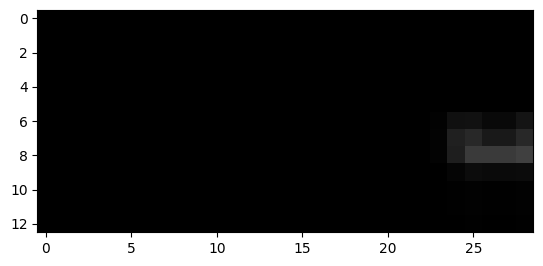

76


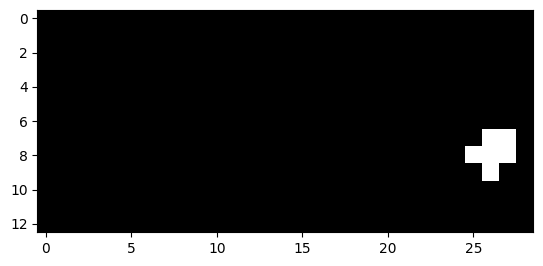

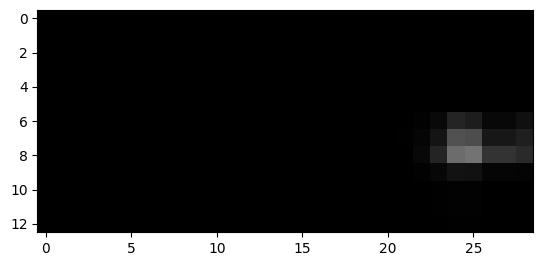

77


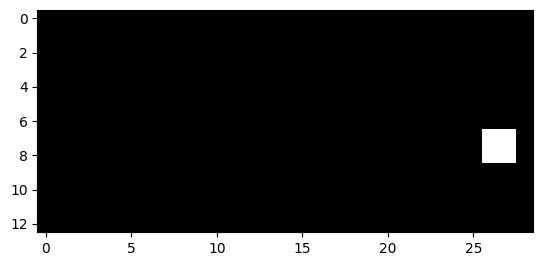

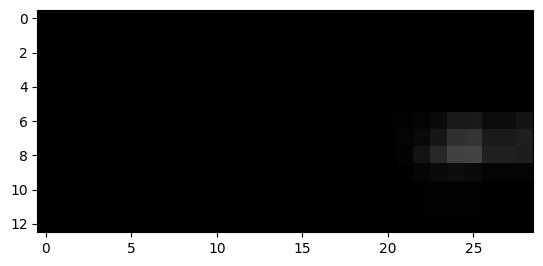

78


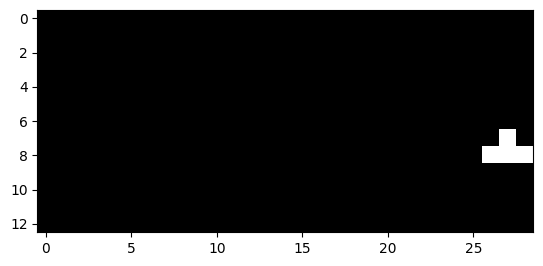

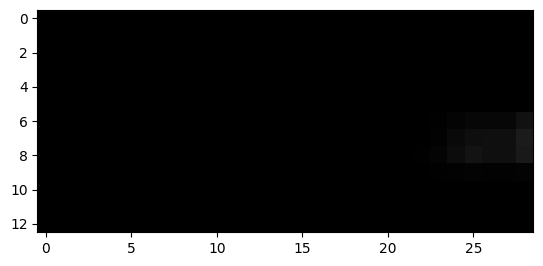

79


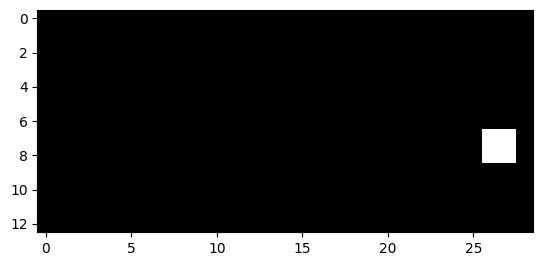

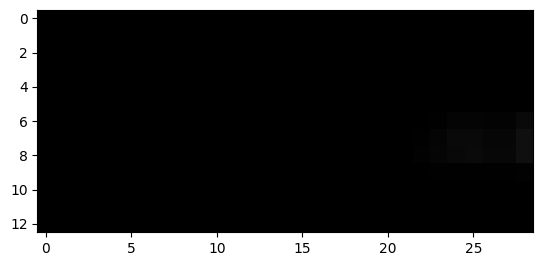

86


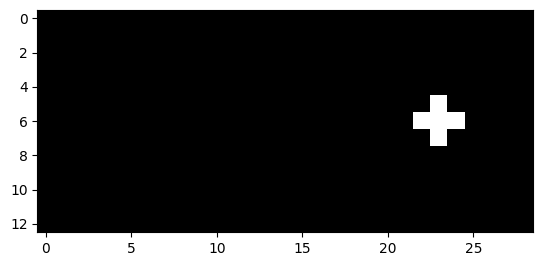

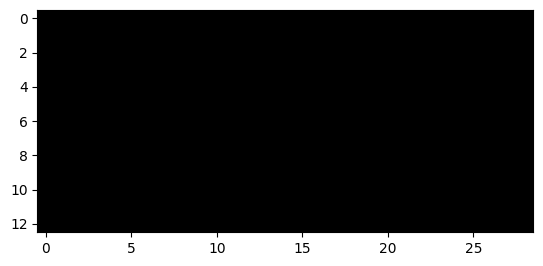

87


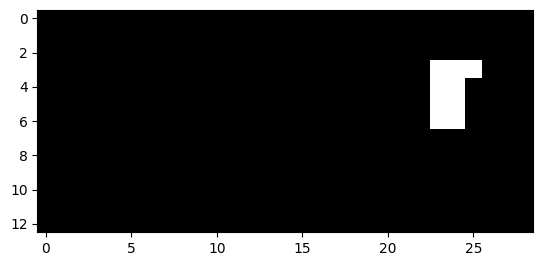

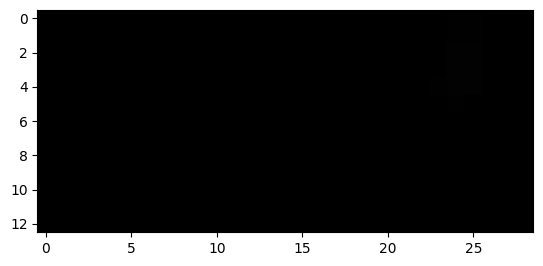

88


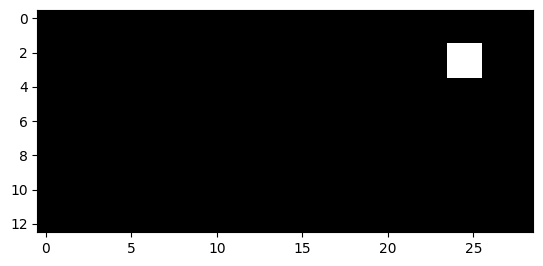

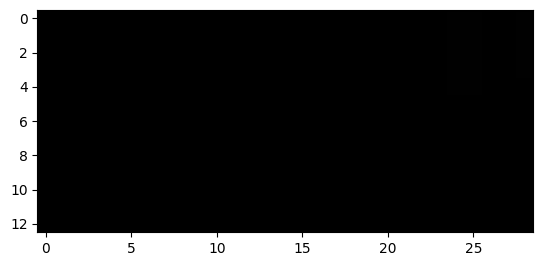

100


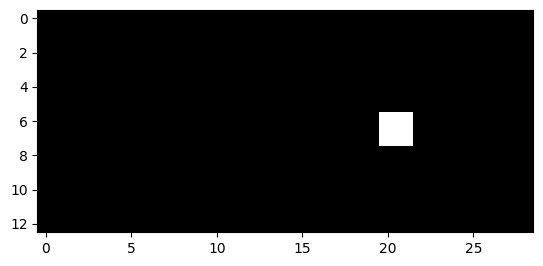

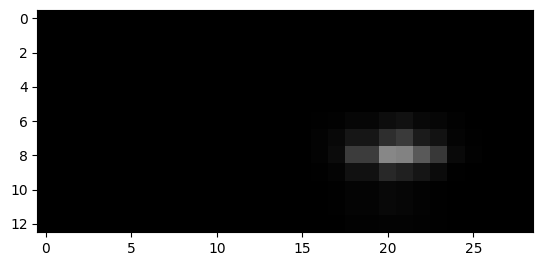

101


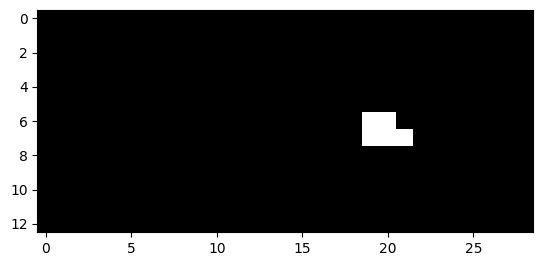

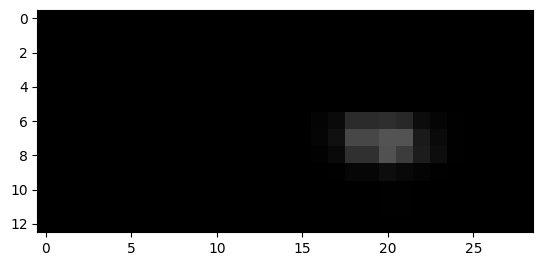

102


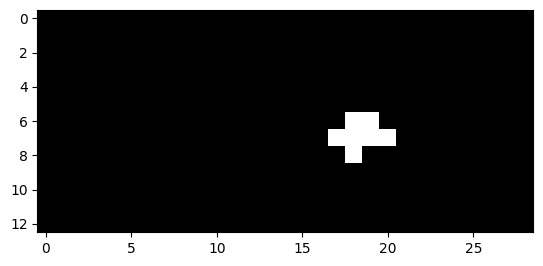

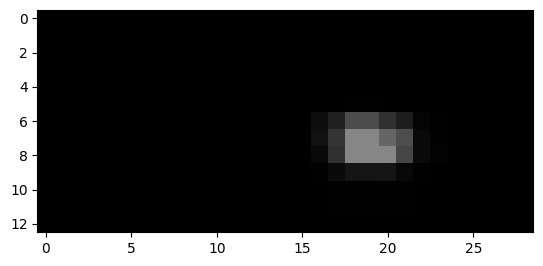

103


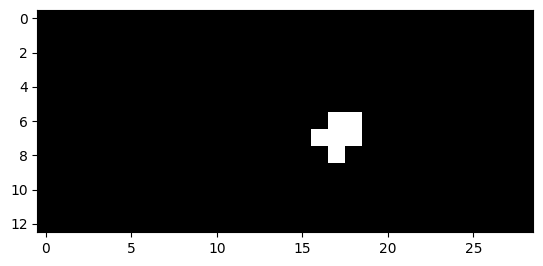

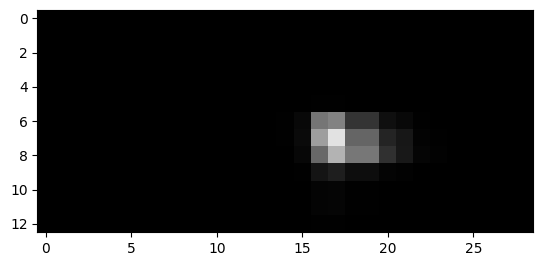

104


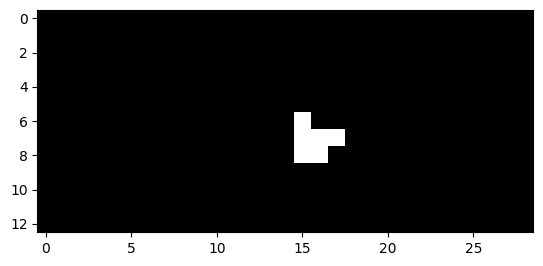

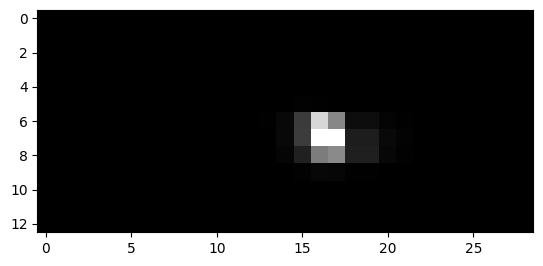

105


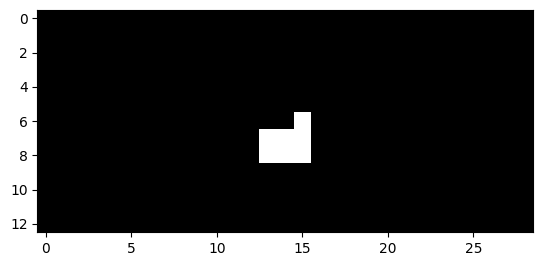

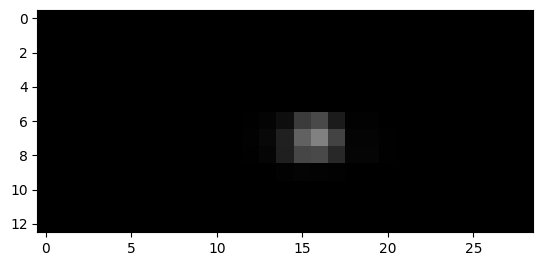

106


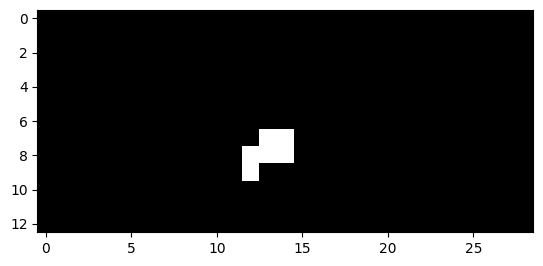

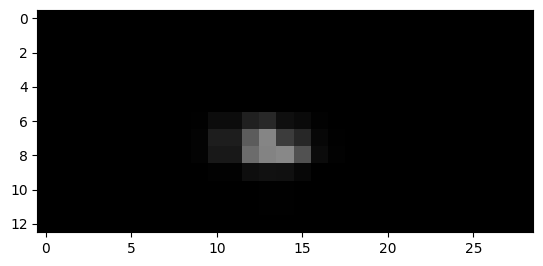

107


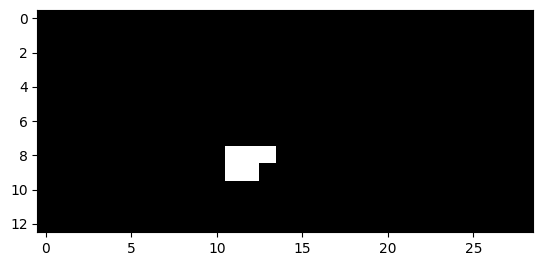

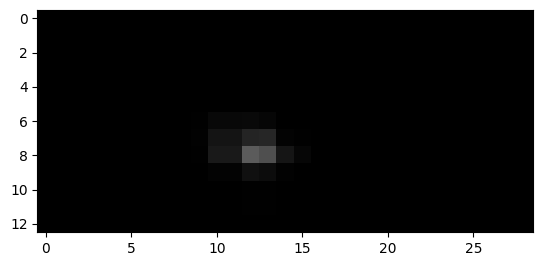

108


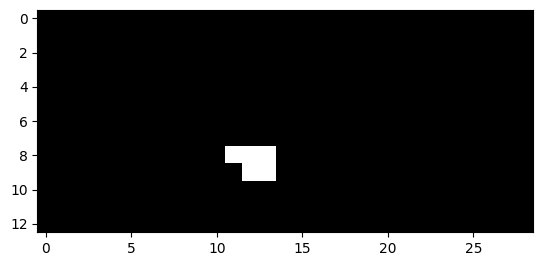

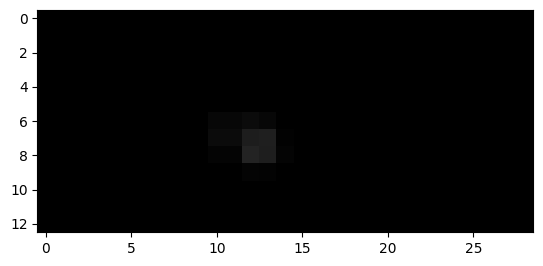

109


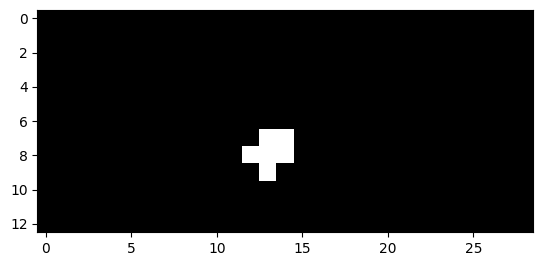

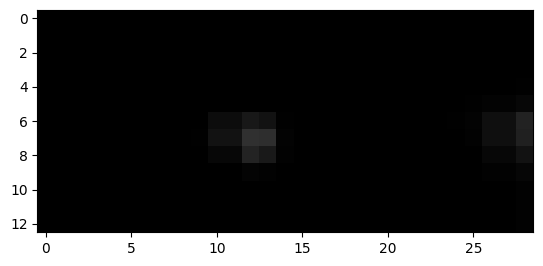

110


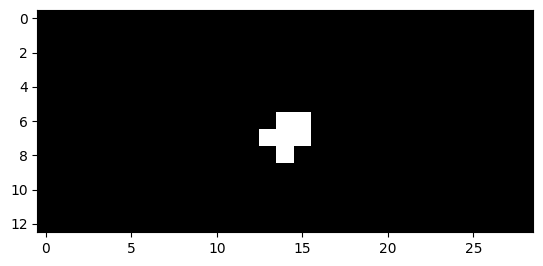

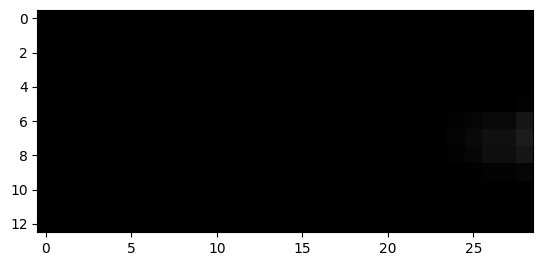

111


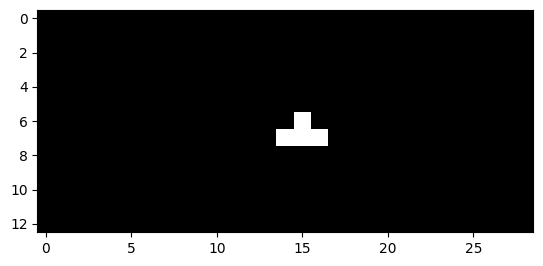

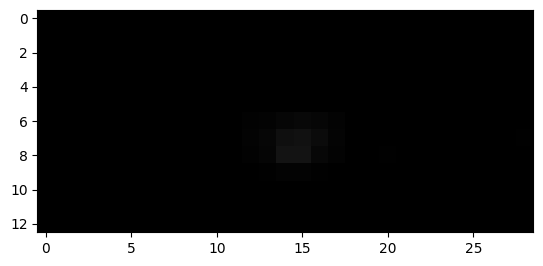

112


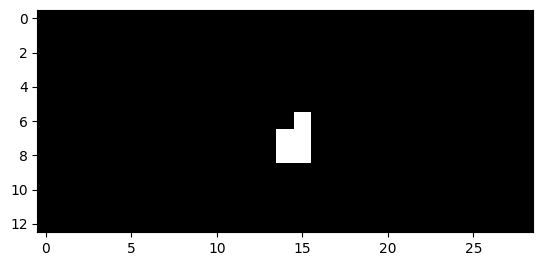

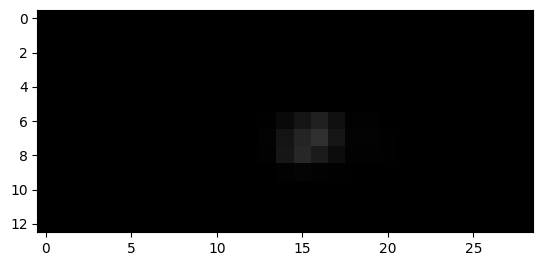

399


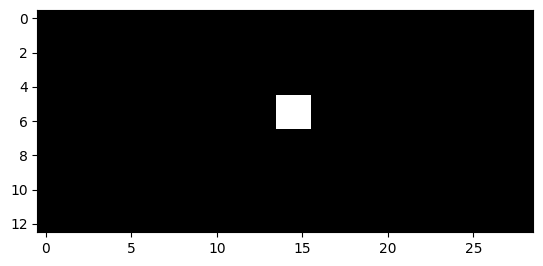

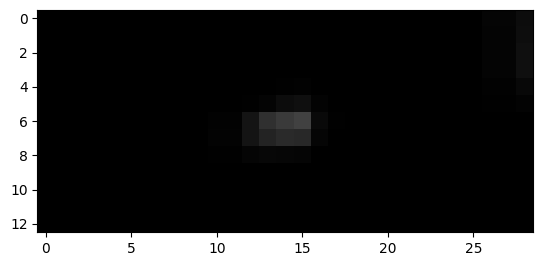

400


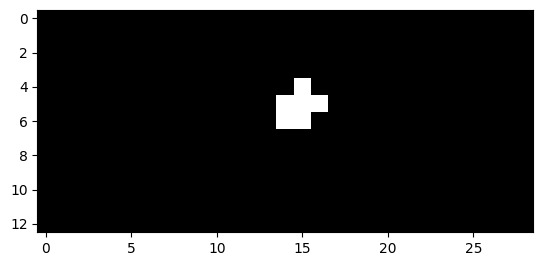

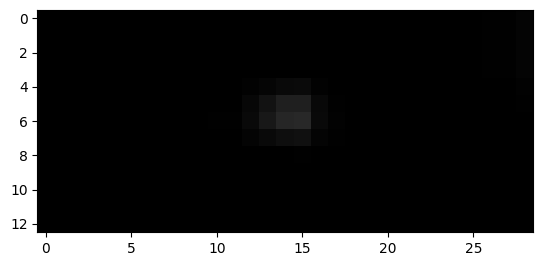

401


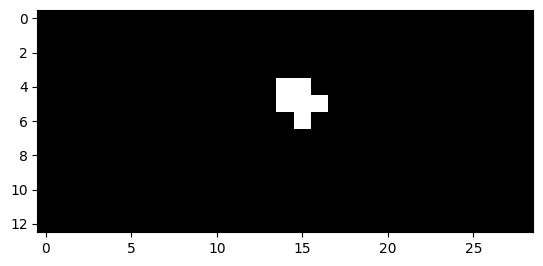

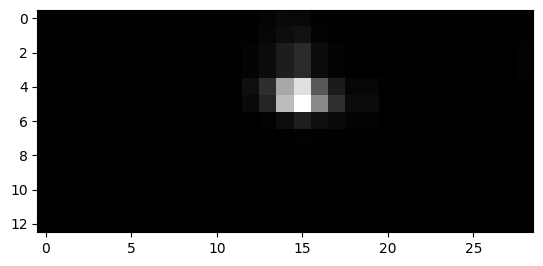

402


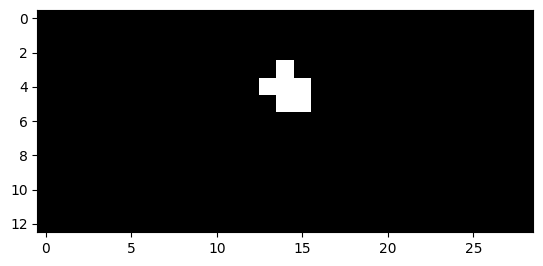

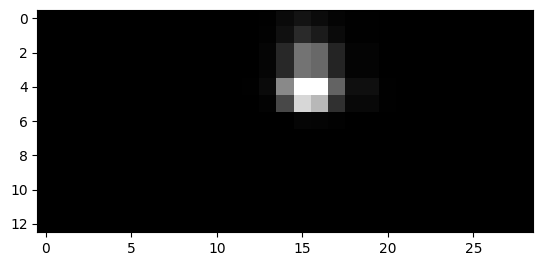

403


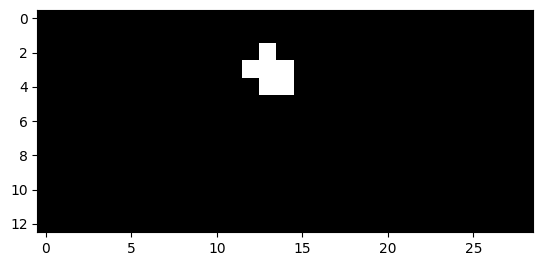

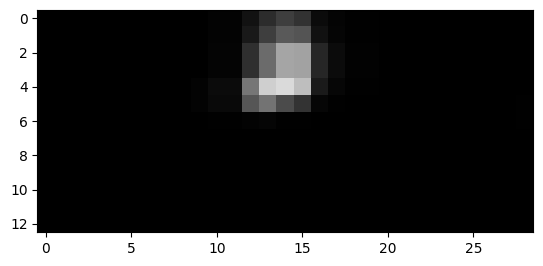

404


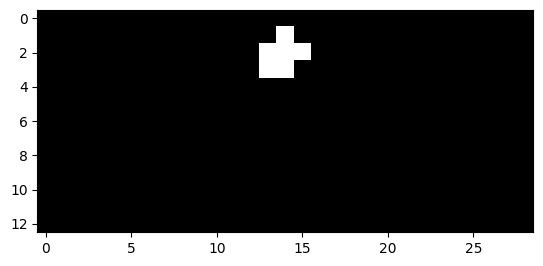

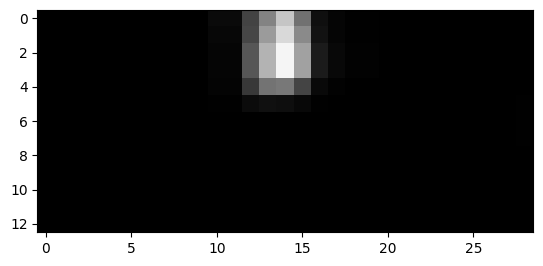

405


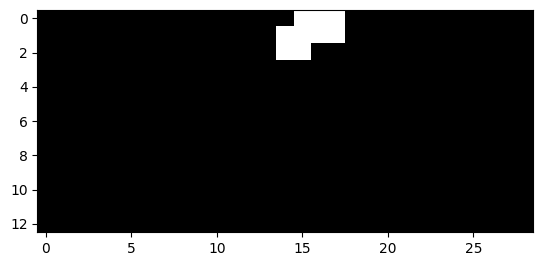

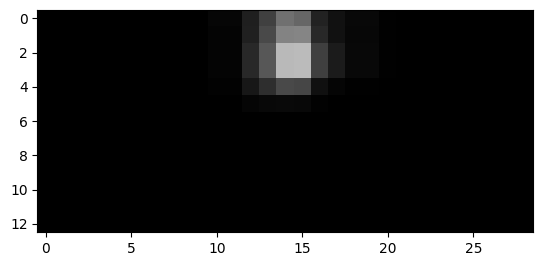

406


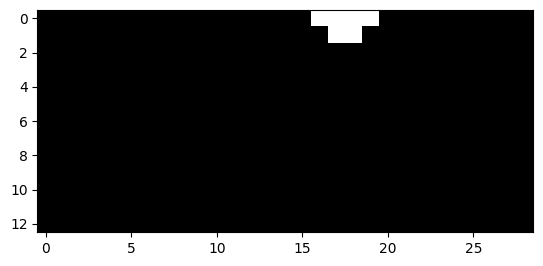

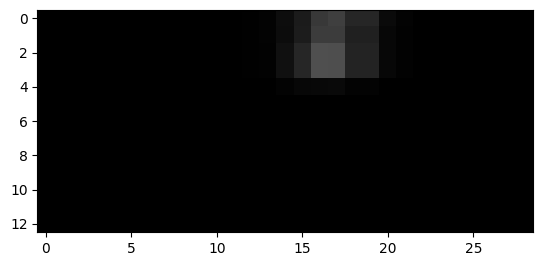

407


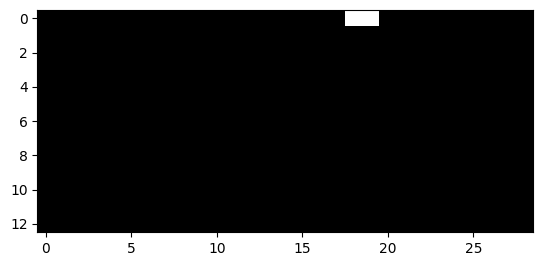

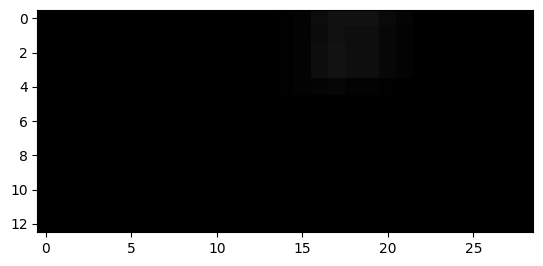

408


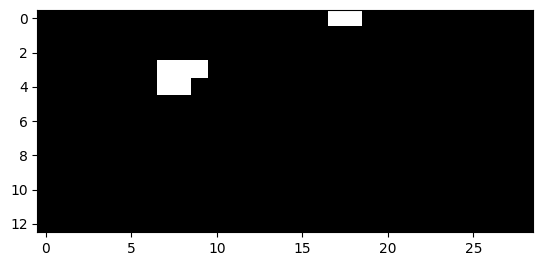

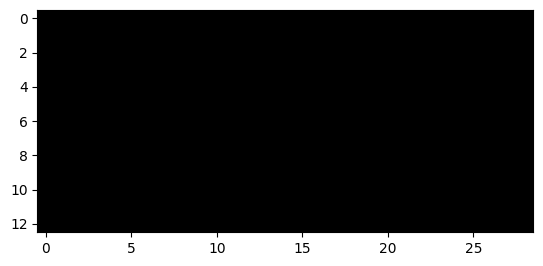

409


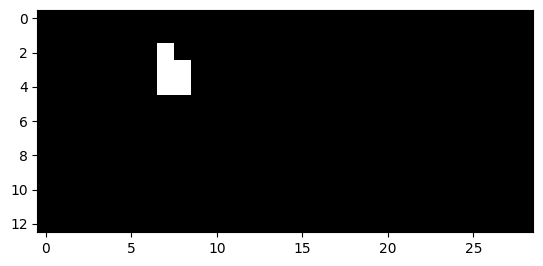

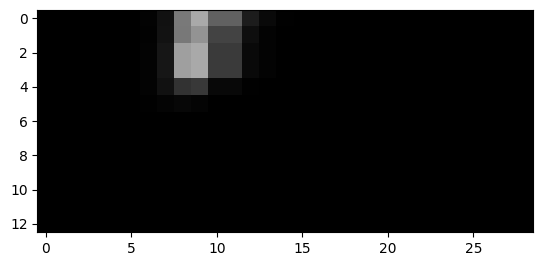

410


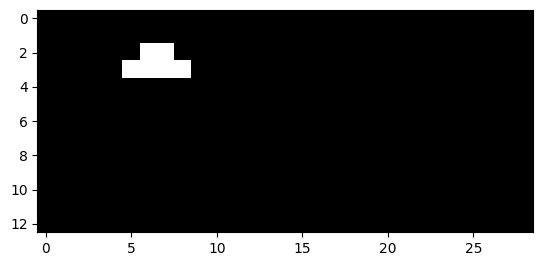

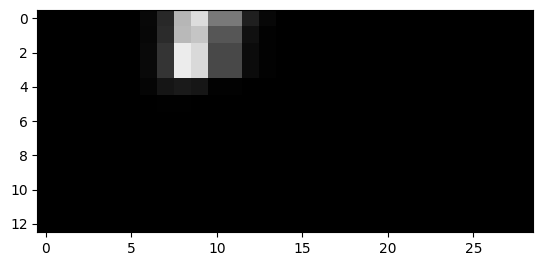

411


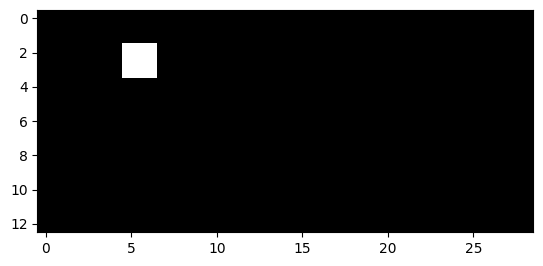

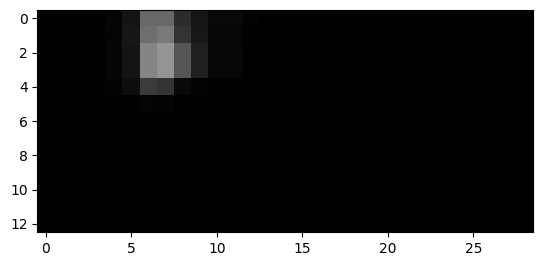

426


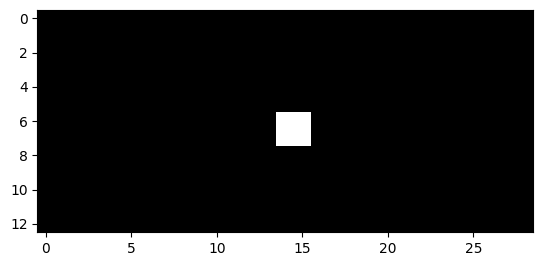

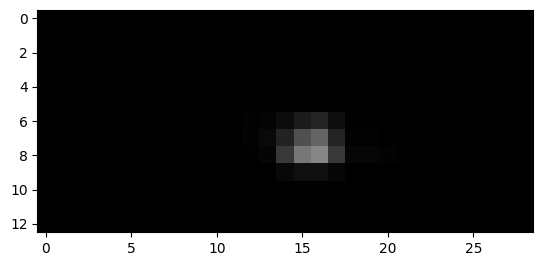

427


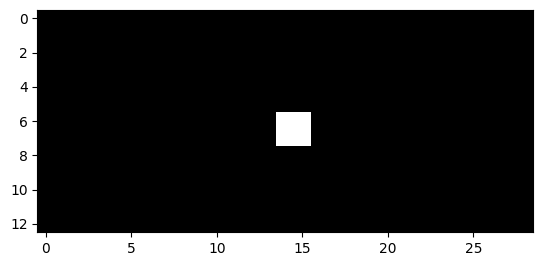

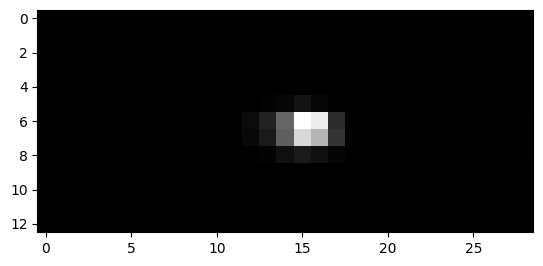

428


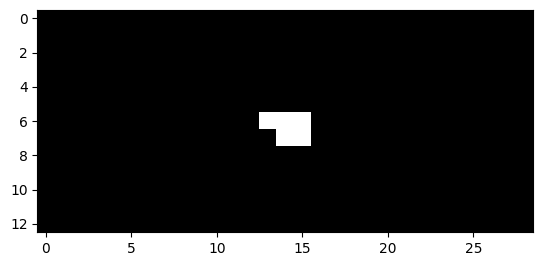

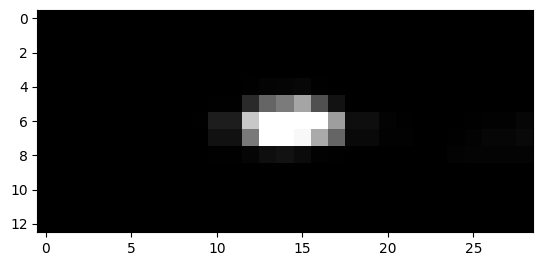

429


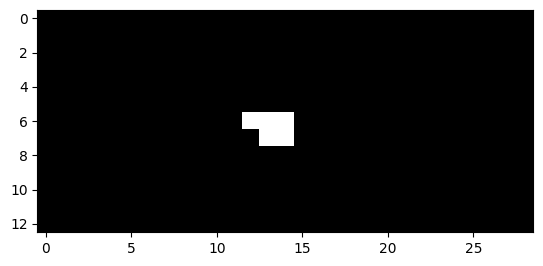

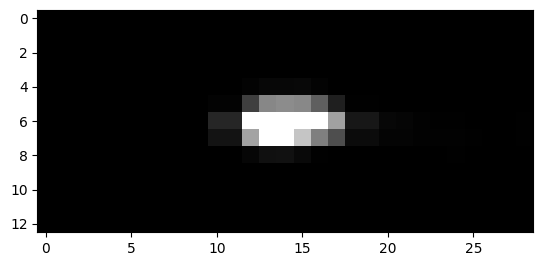

430


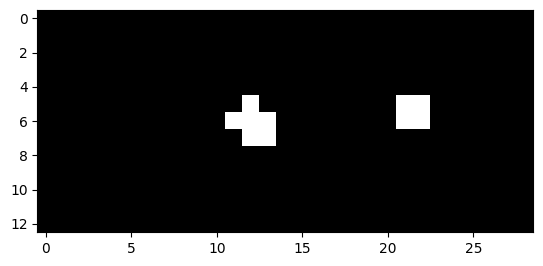

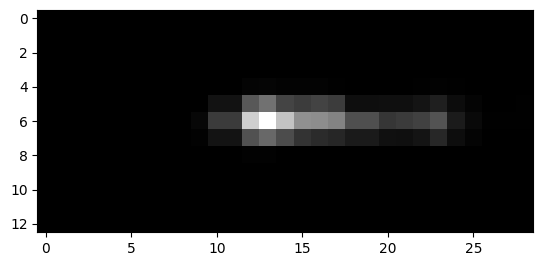

431


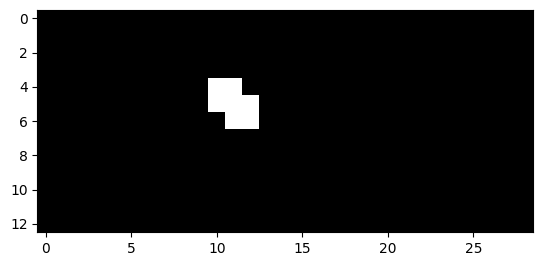

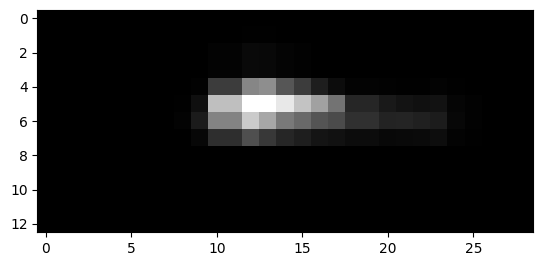

432


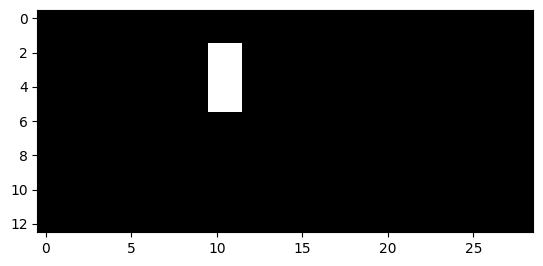

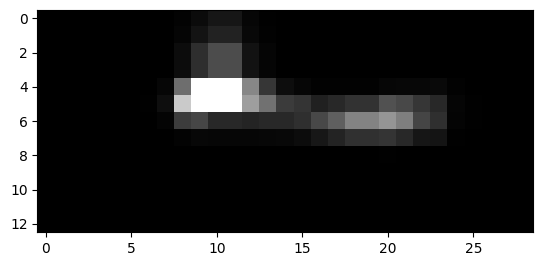

433


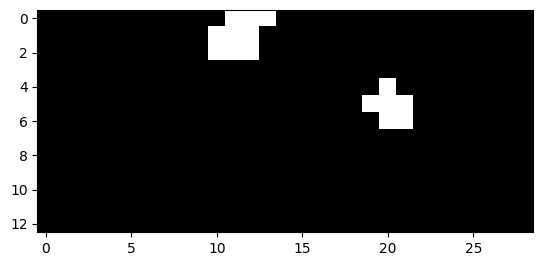

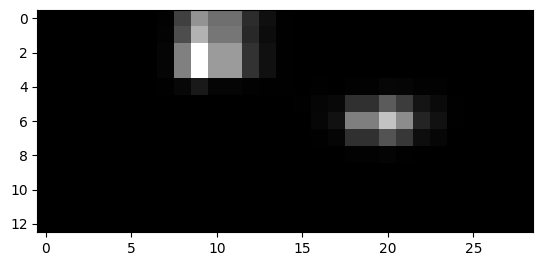

434


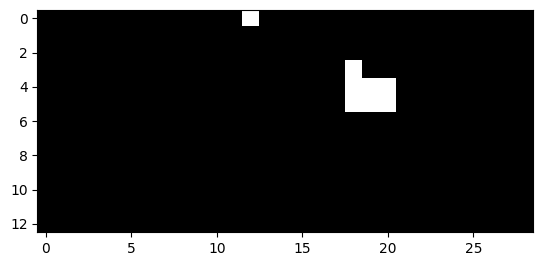

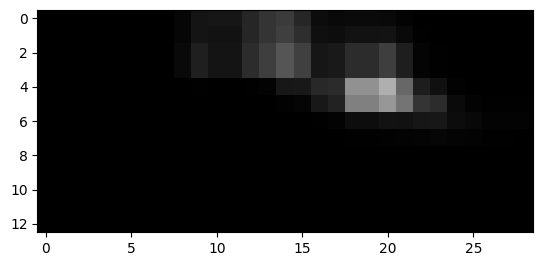

437


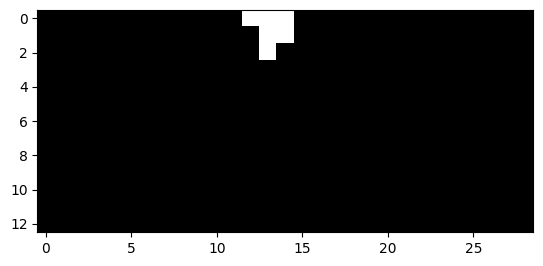

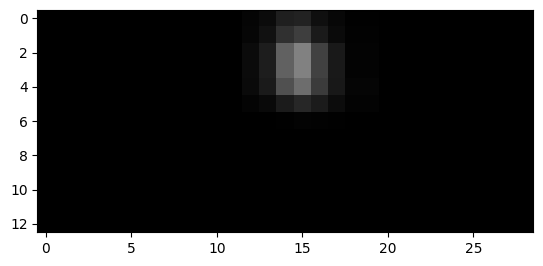

438


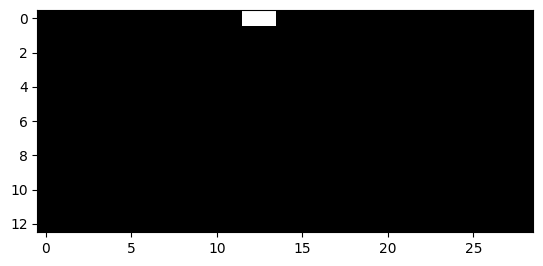

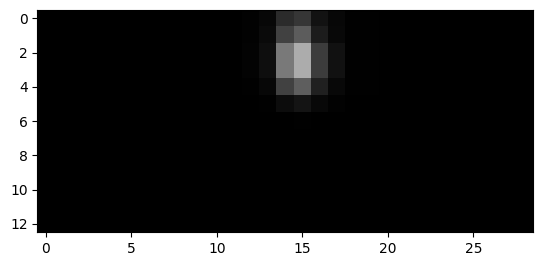

731


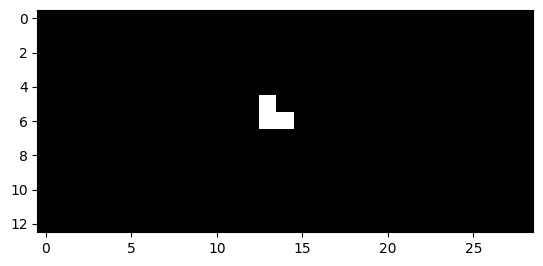

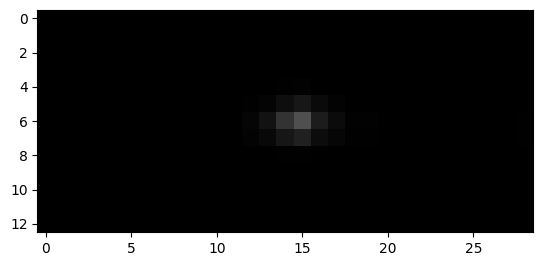

732


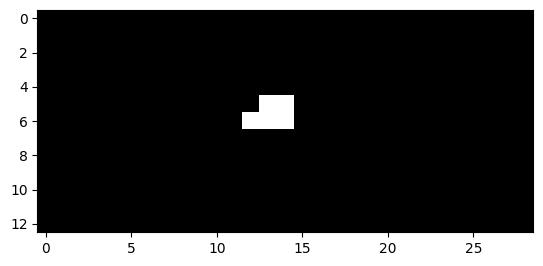

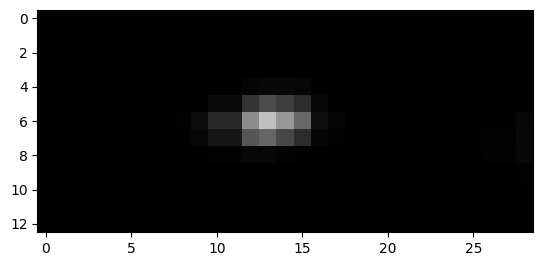

733


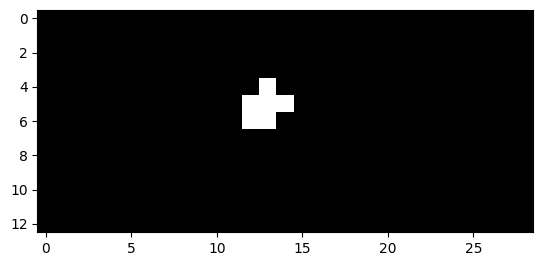

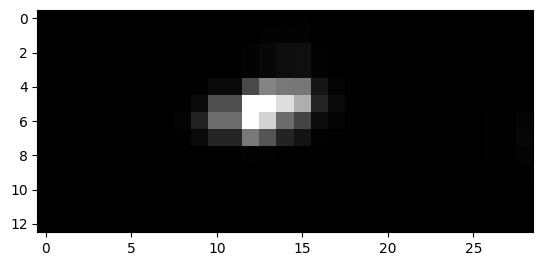

734


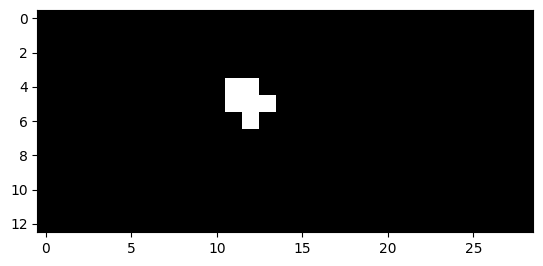

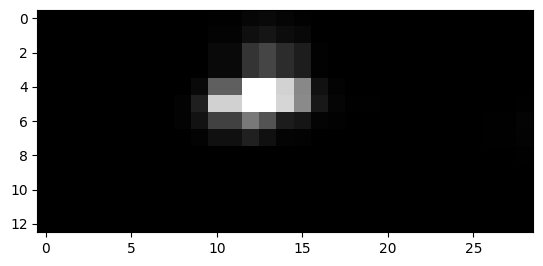

735


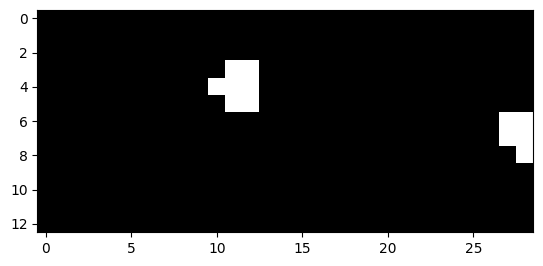

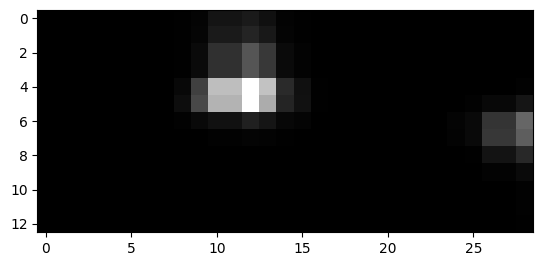

736


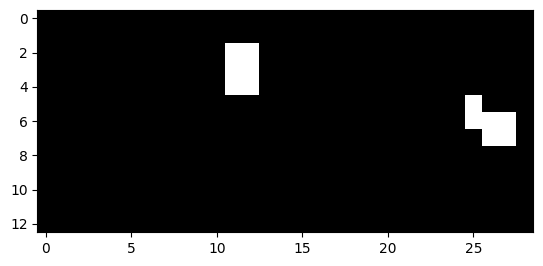

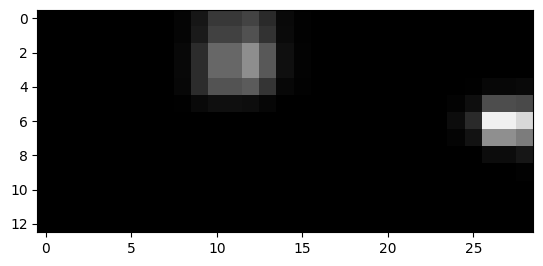

737


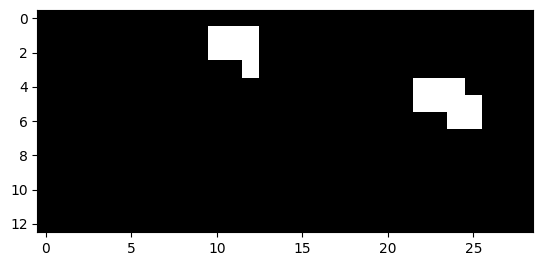

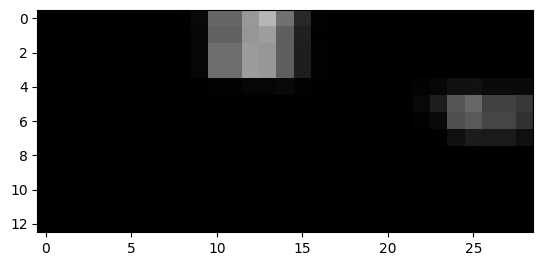

738


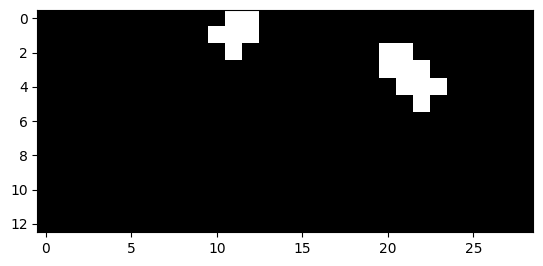

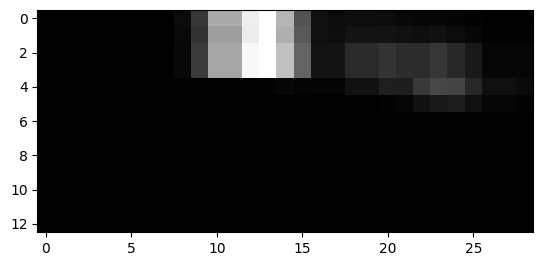

739


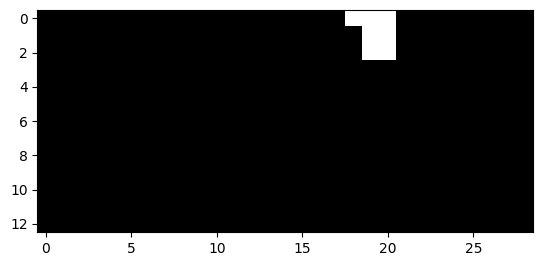

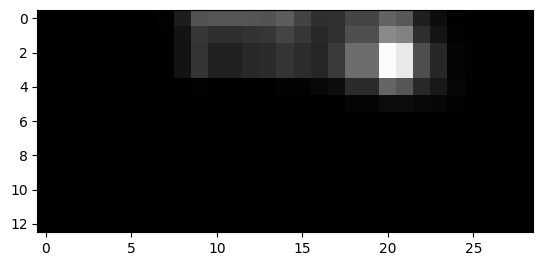

742


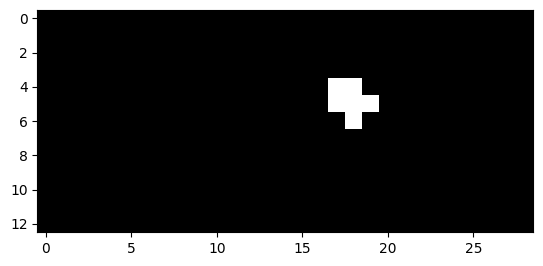

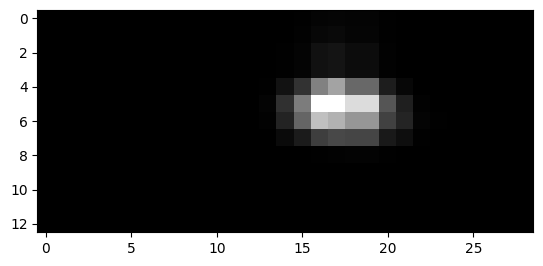

743


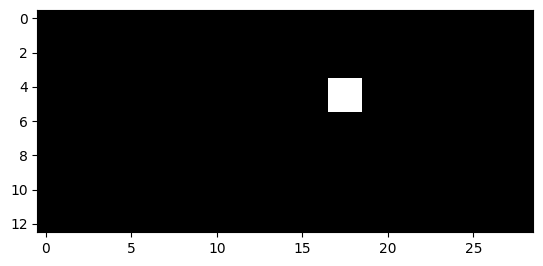

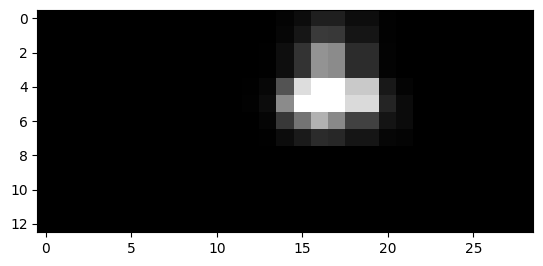

744


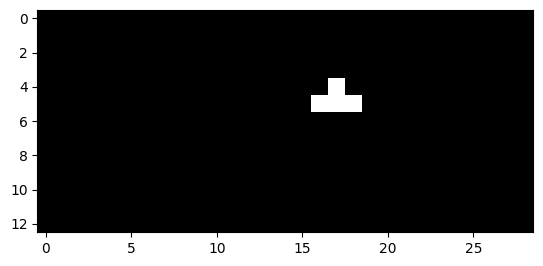

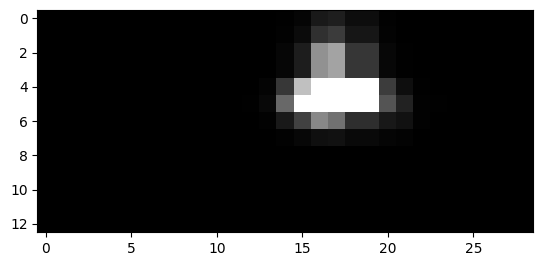

745


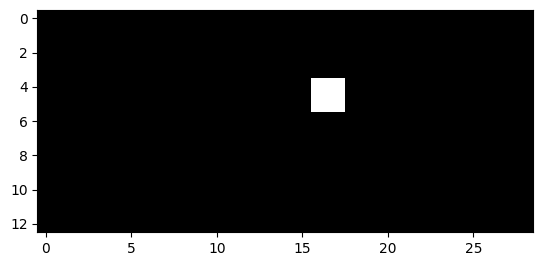

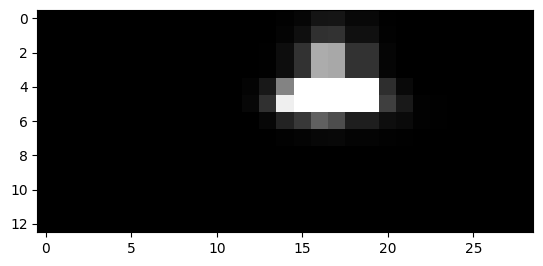

746


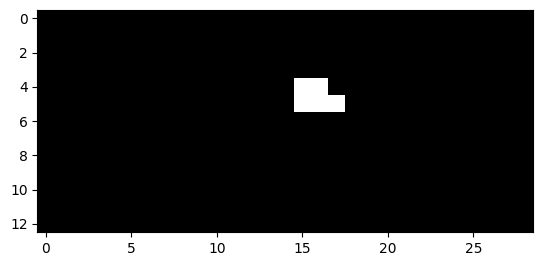

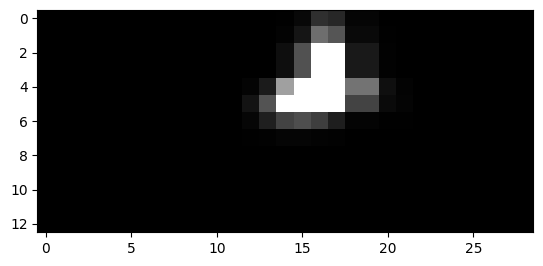

747


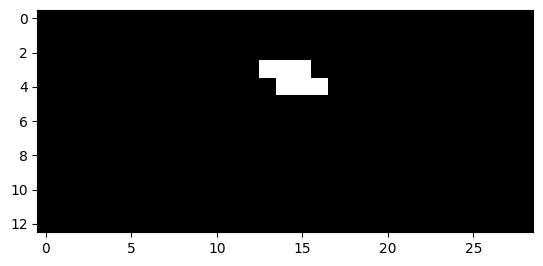

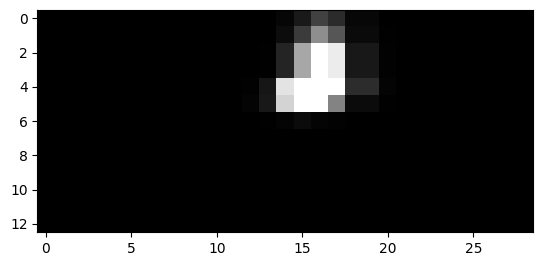

748


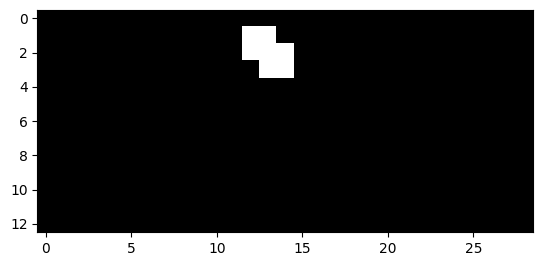

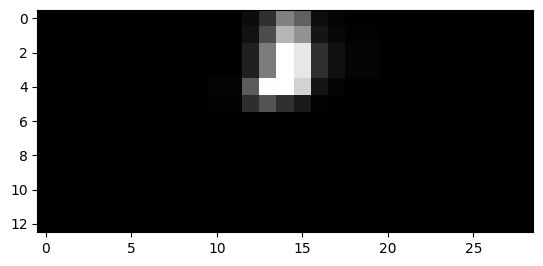

749


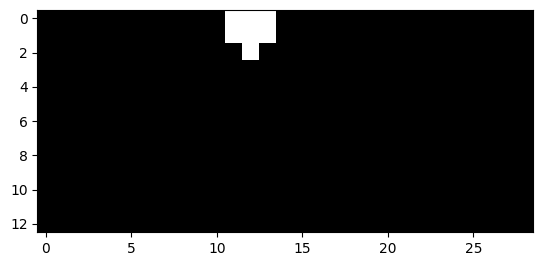

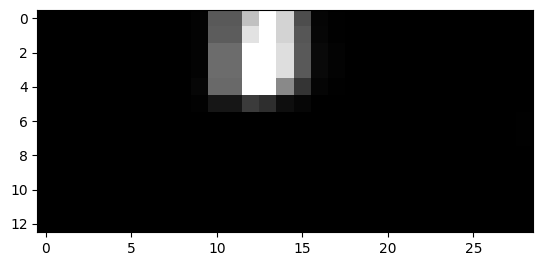

756


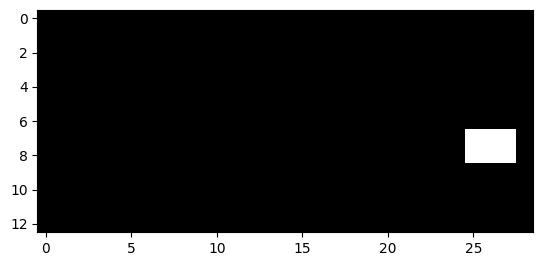

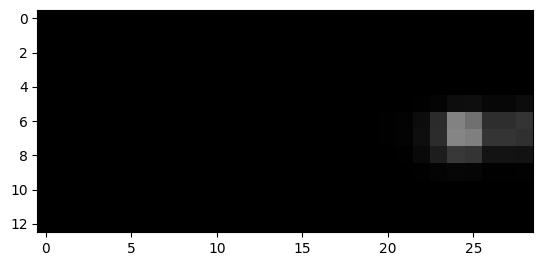

757


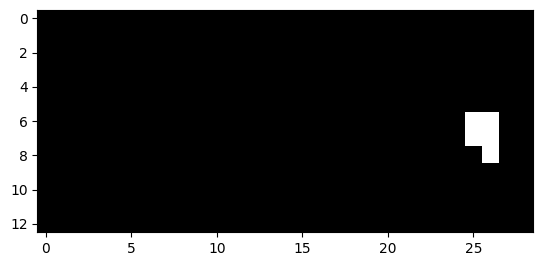

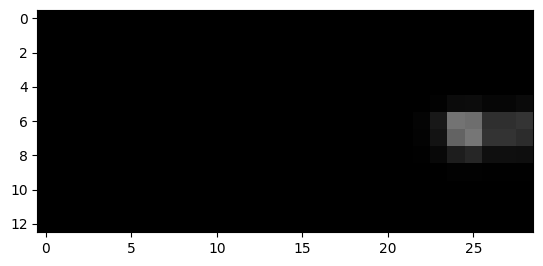

758


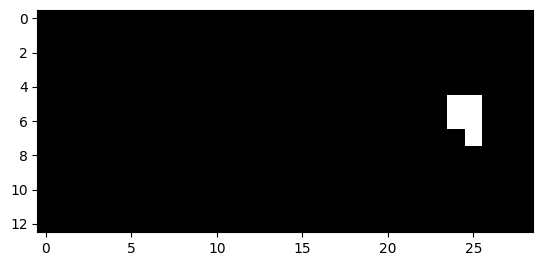

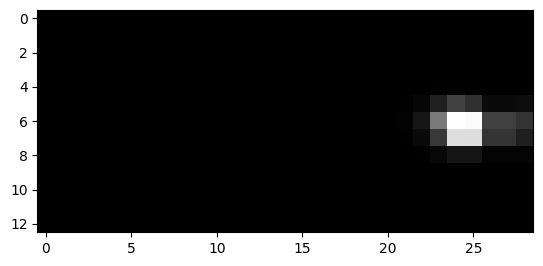

759


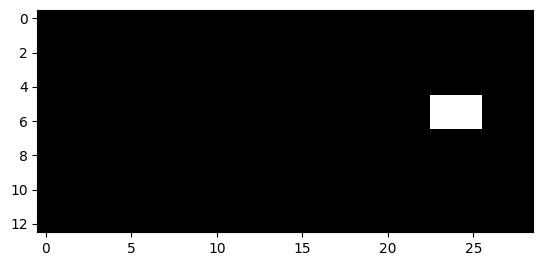

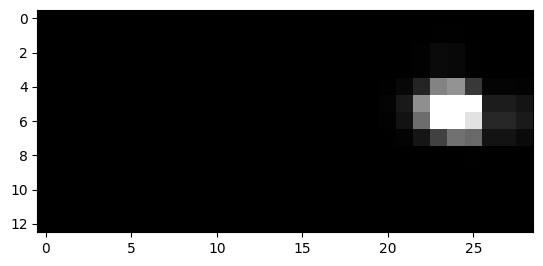

760


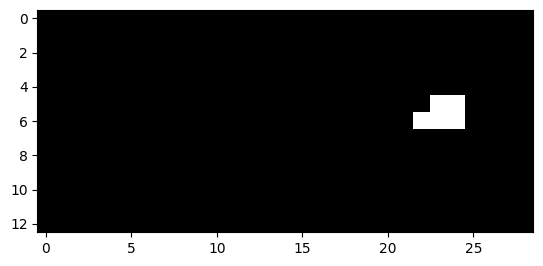

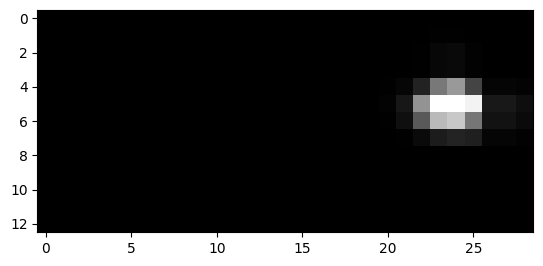

761


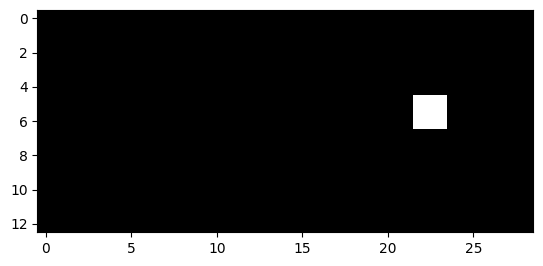

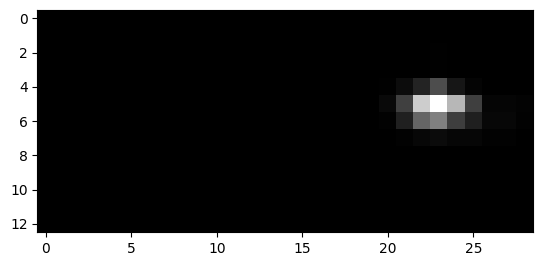

762


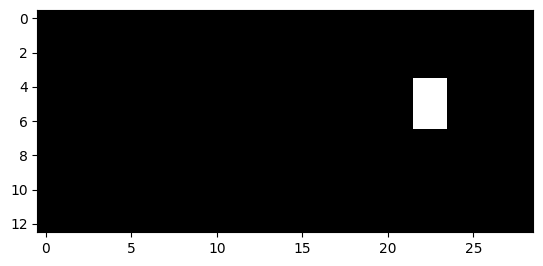

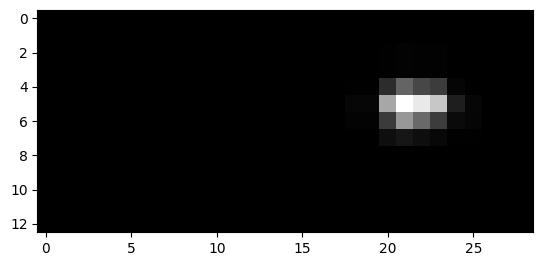

763


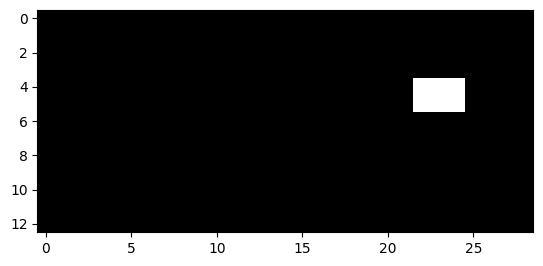

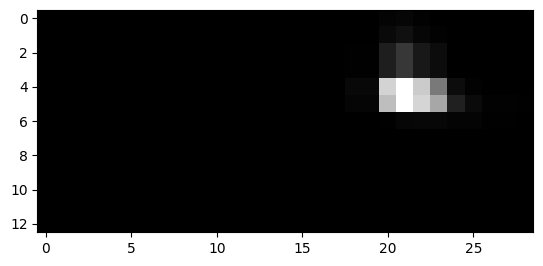

764


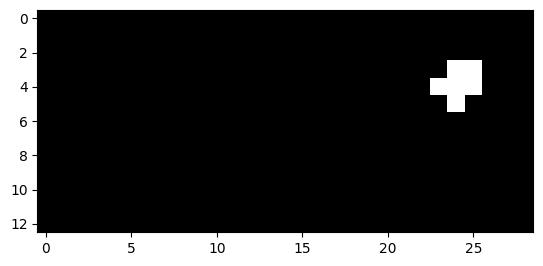

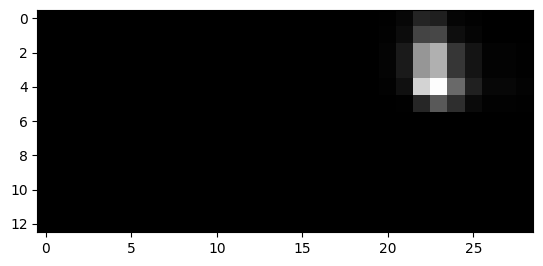

765


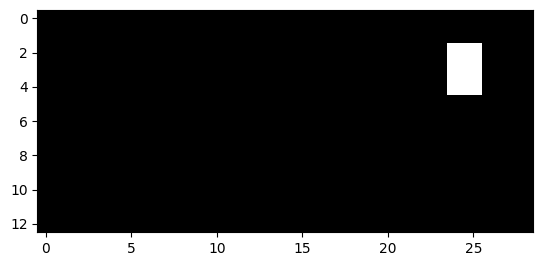

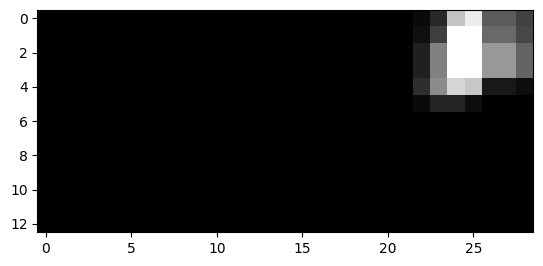

766


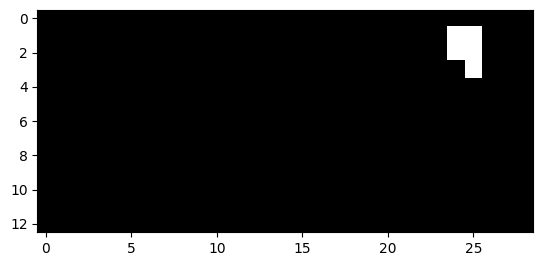

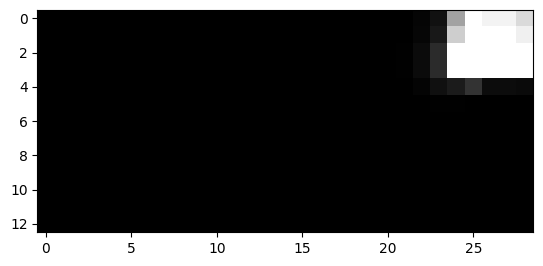

767


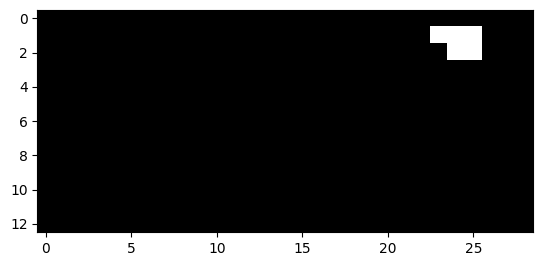

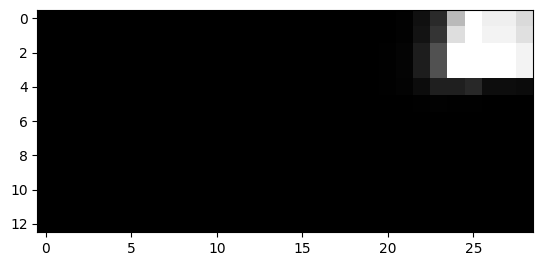

768


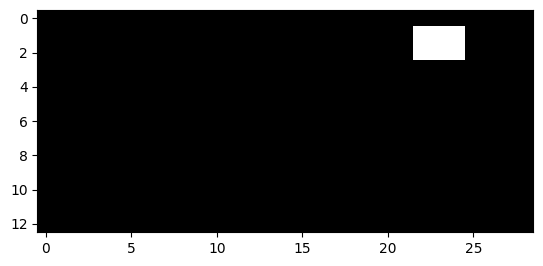

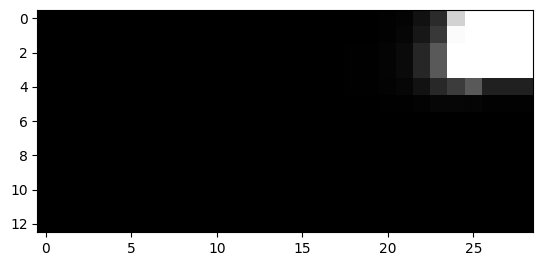

791


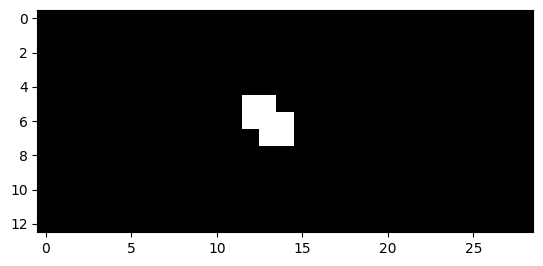

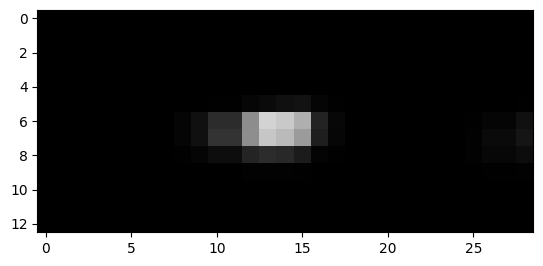

792


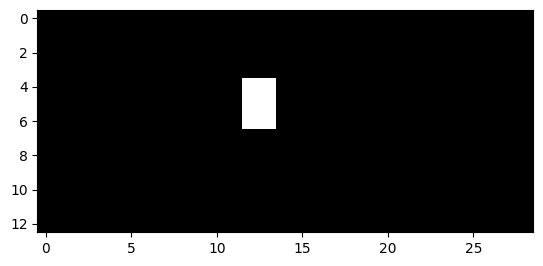

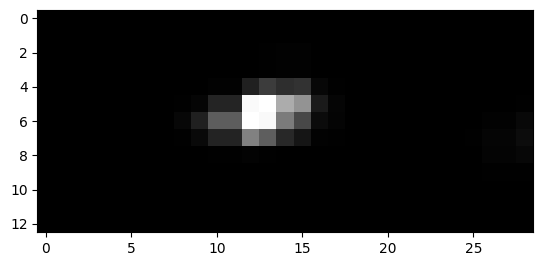

793


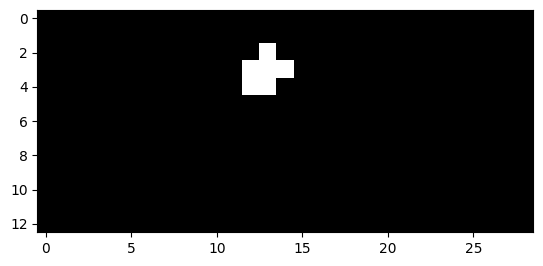

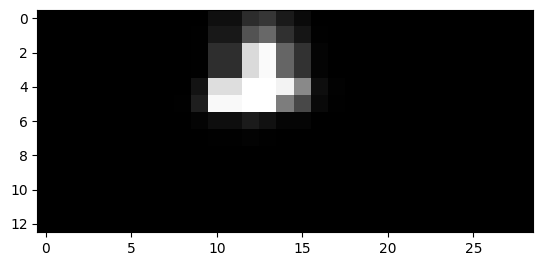

794


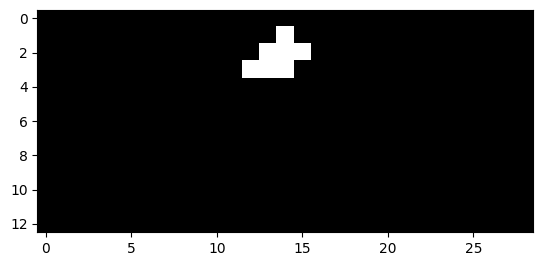

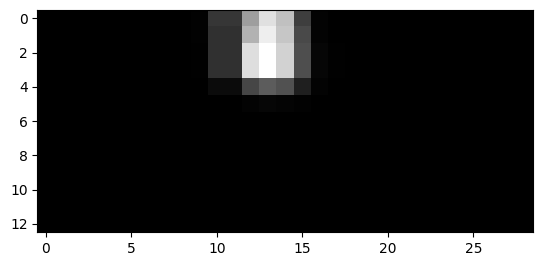

795


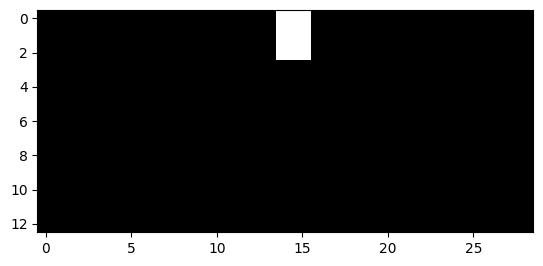

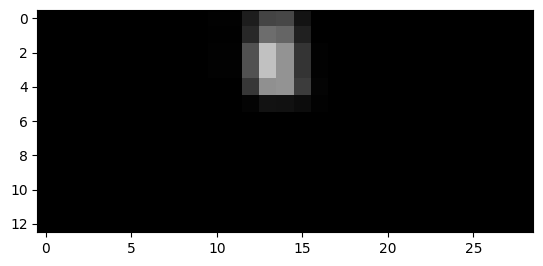

796


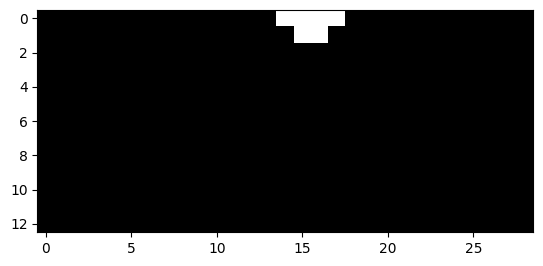

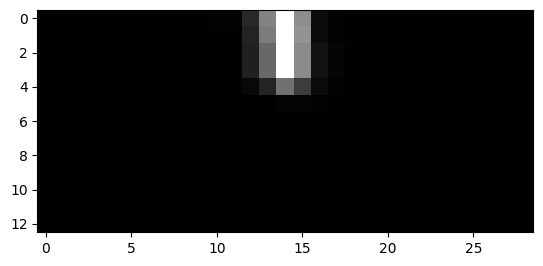

802


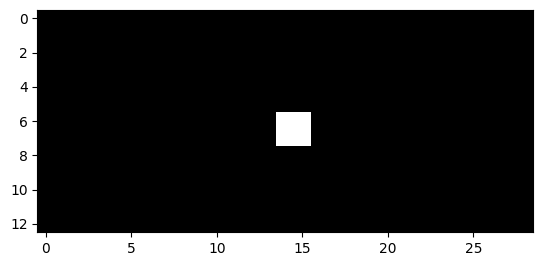

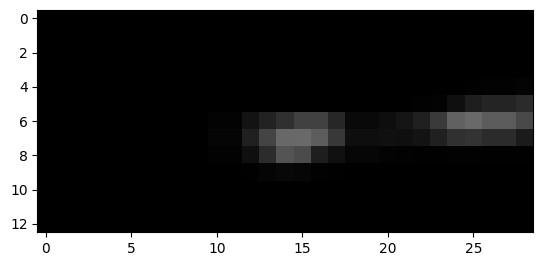

803


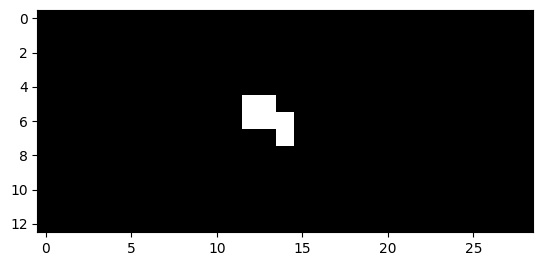

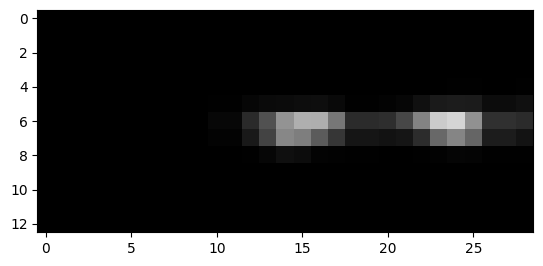

804


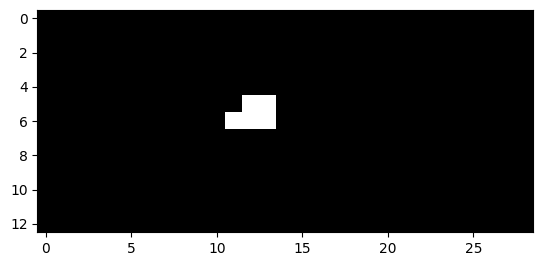

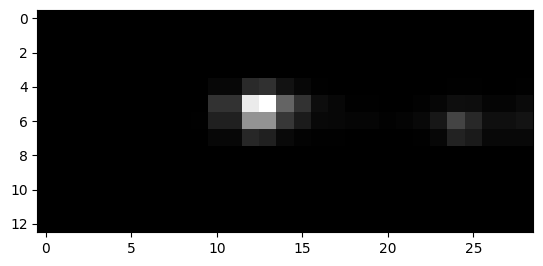

805


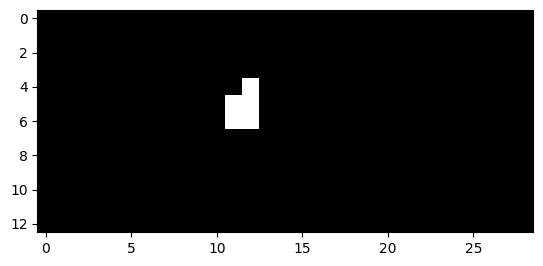

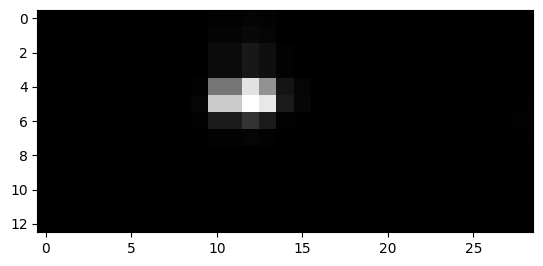

806


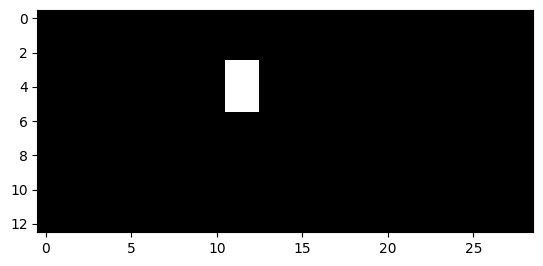

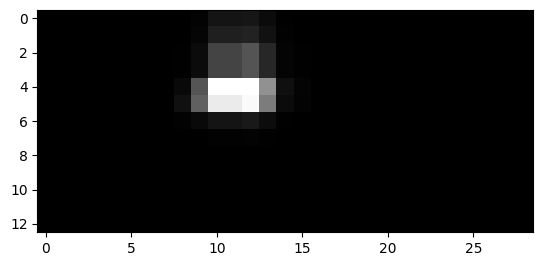

807


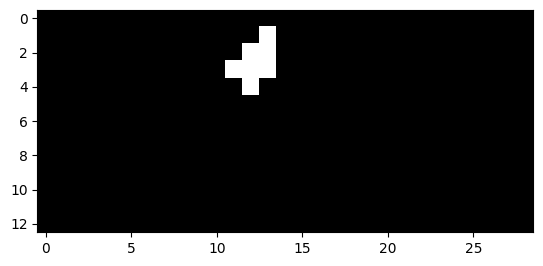

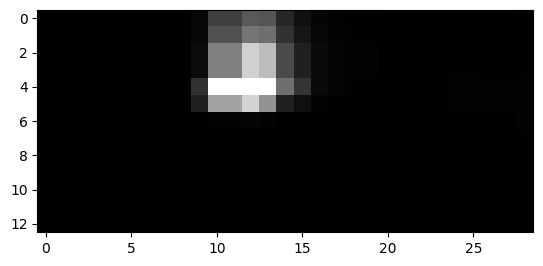

808


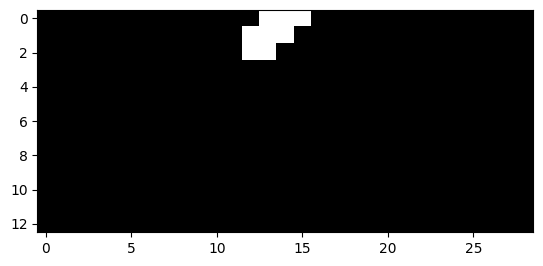

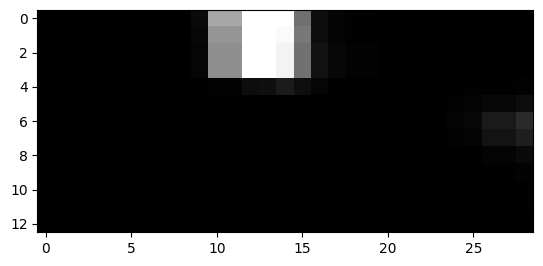

809


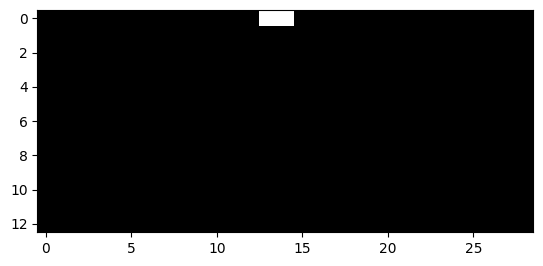

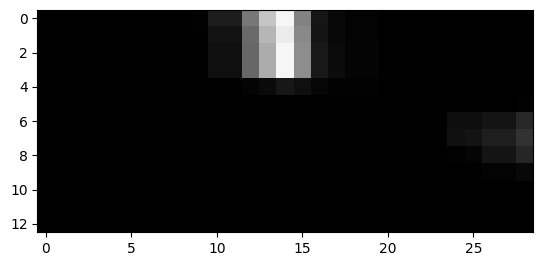

842


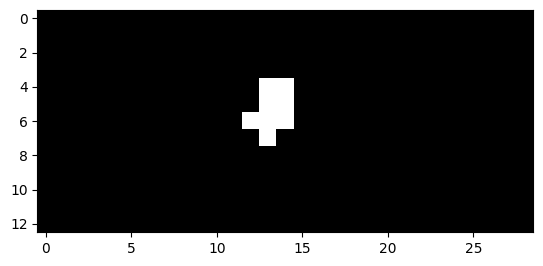

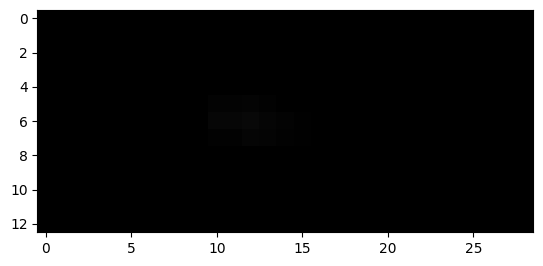

843


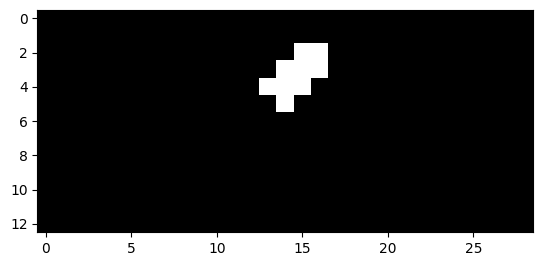

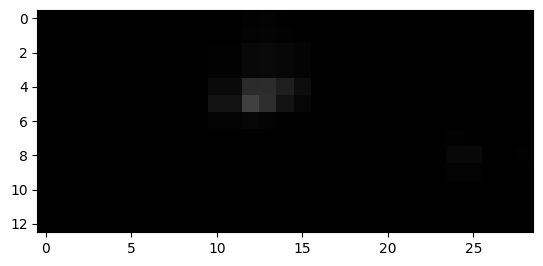

844


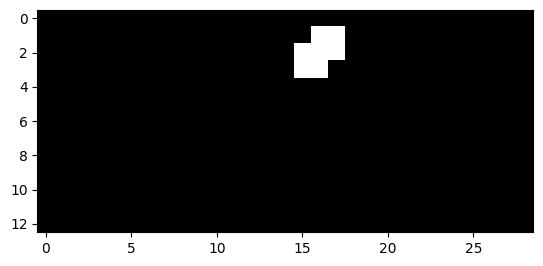

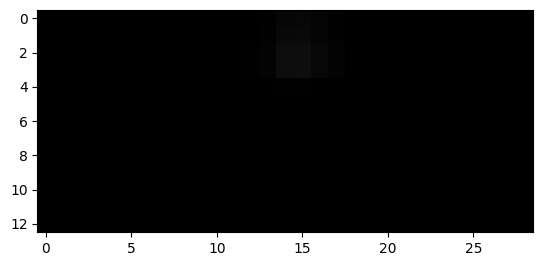

845


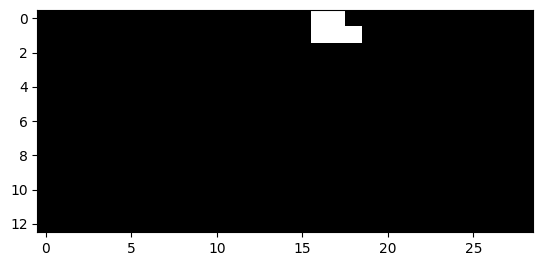

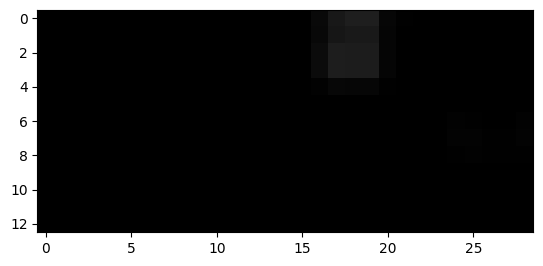

847


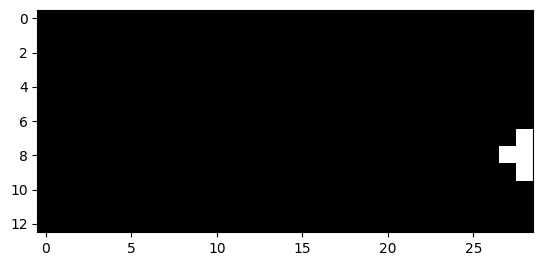

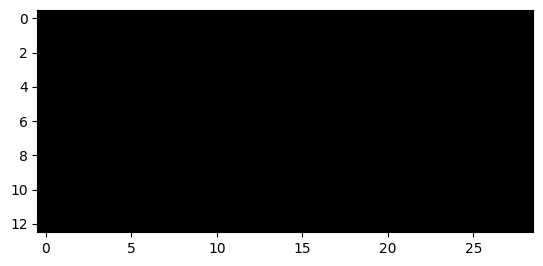

848


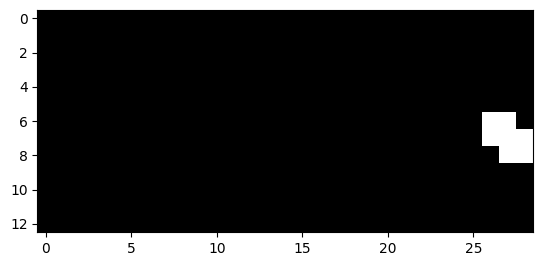

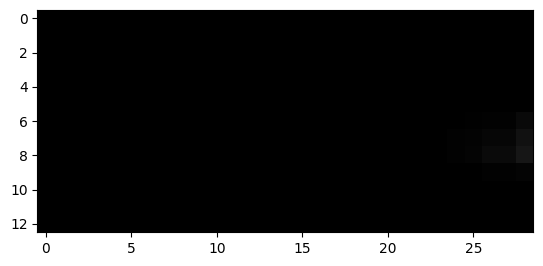

849


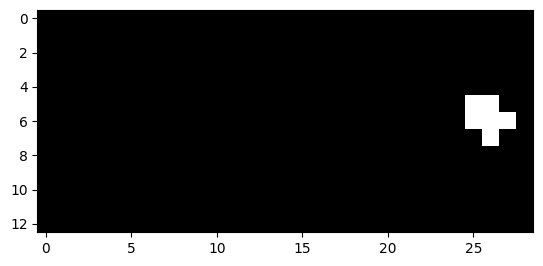

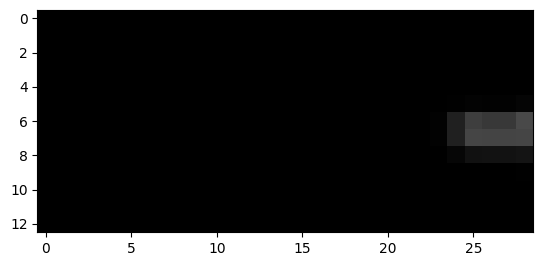

850


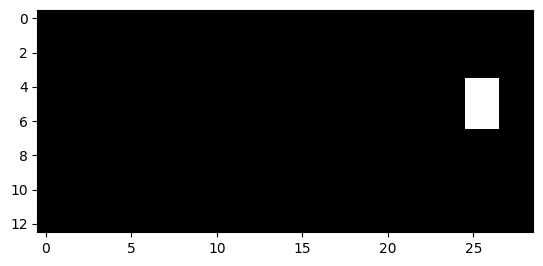

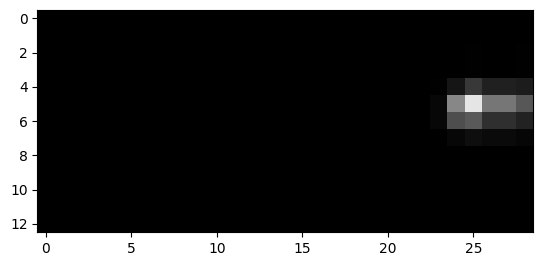

851


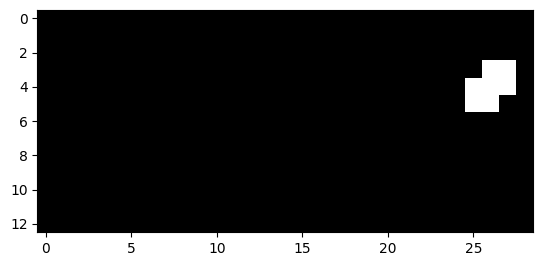

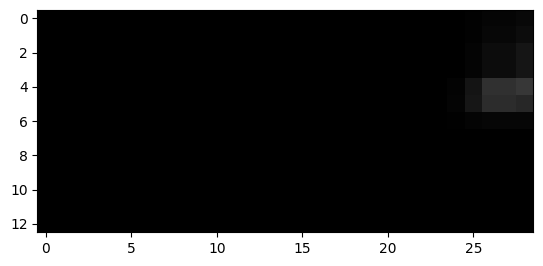

852


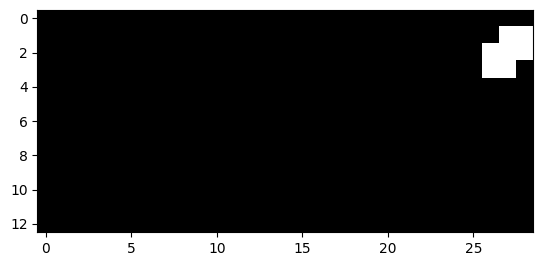

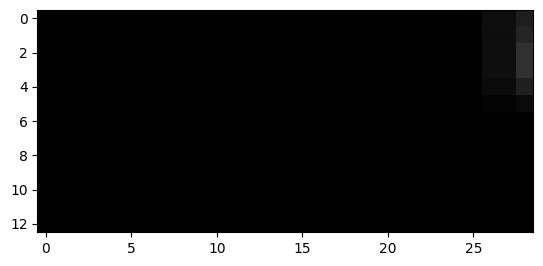

853


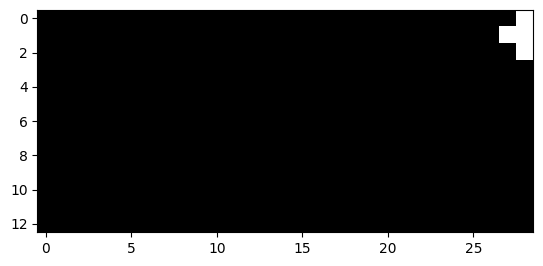

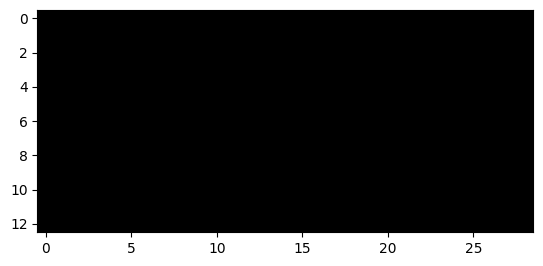

1114


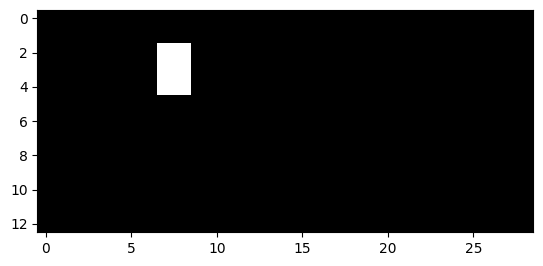

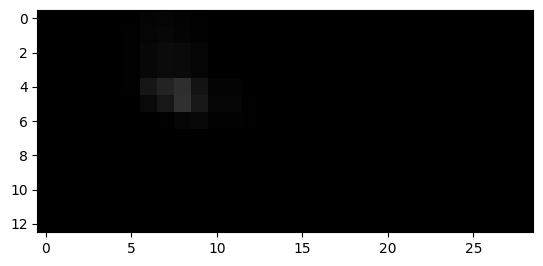

1115


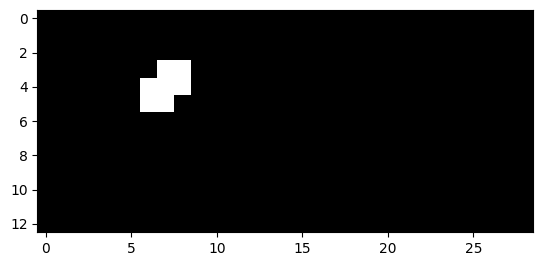

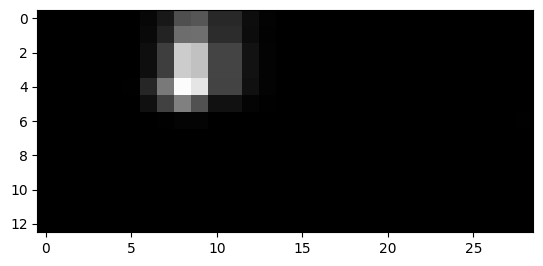

1130


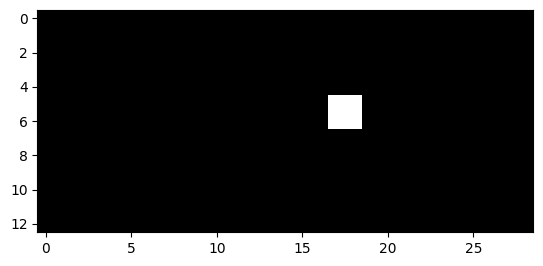

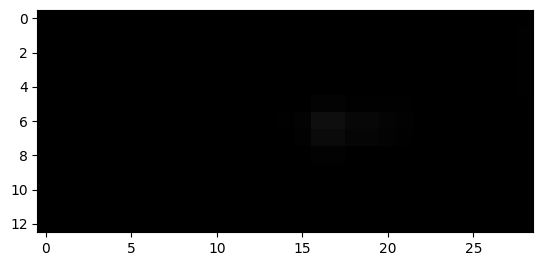

1131


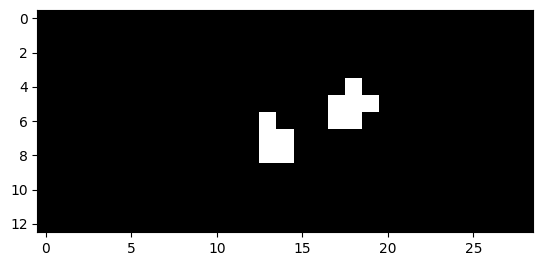

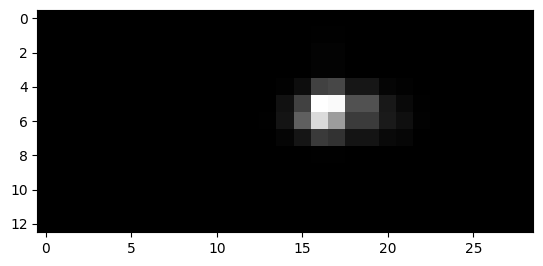

1132


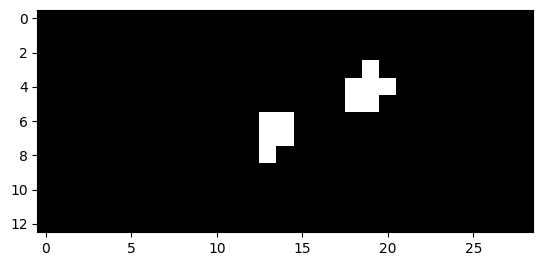

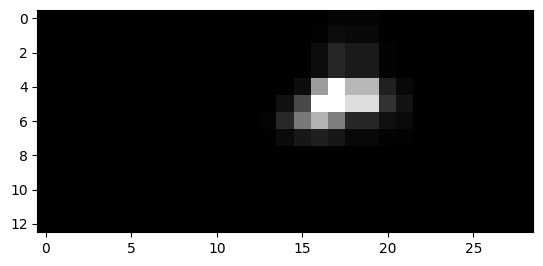

1133


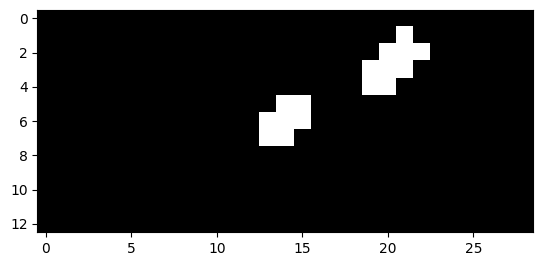

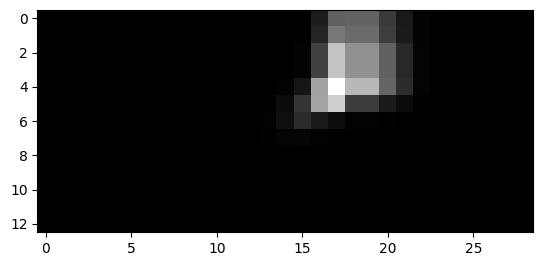

1134


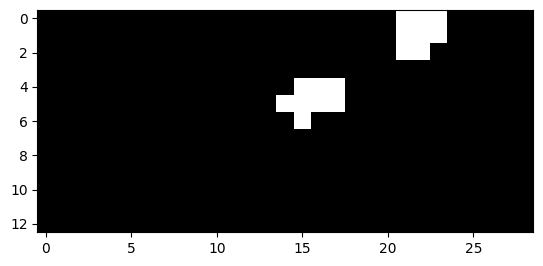

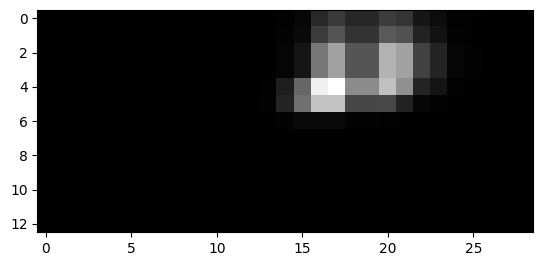

1135


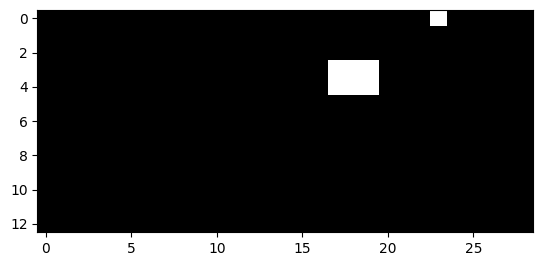

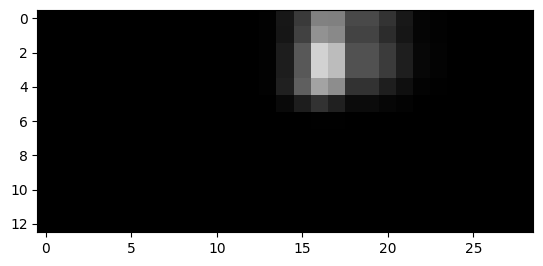

1136


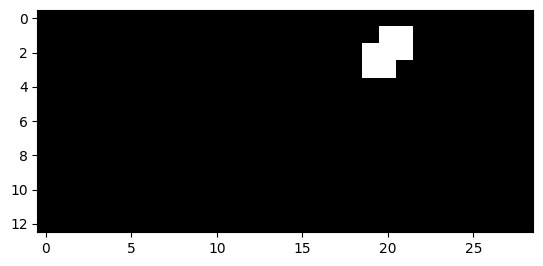

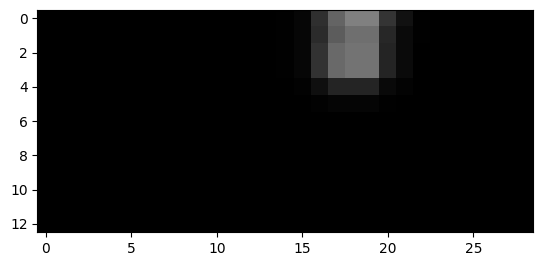

1137


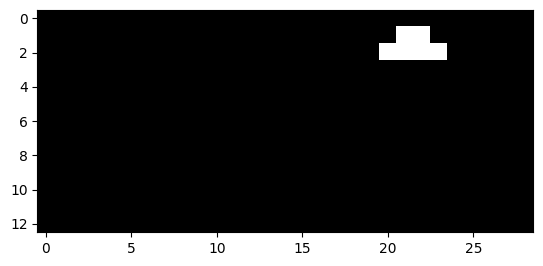

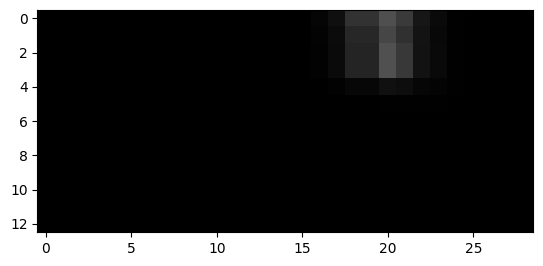

1138


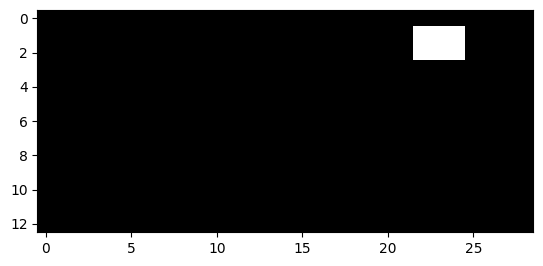

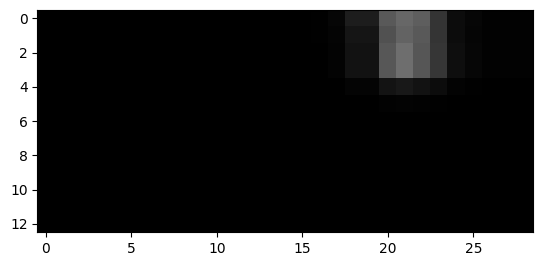

1139


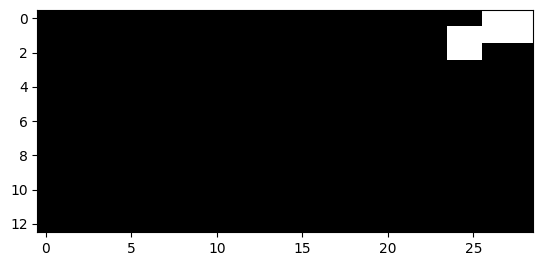

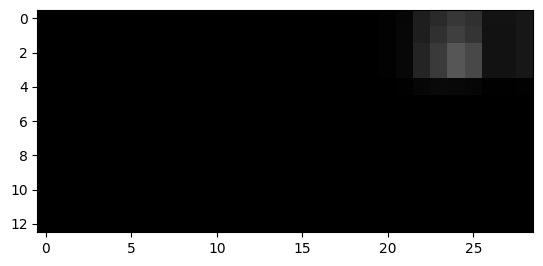

1140


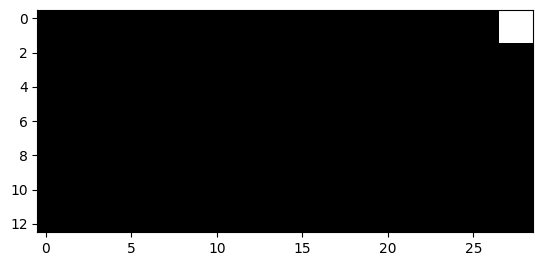

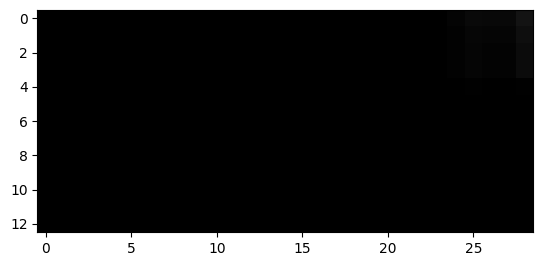

1155


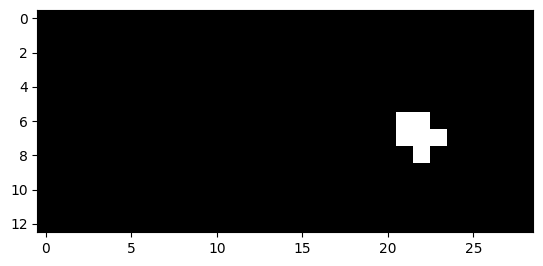

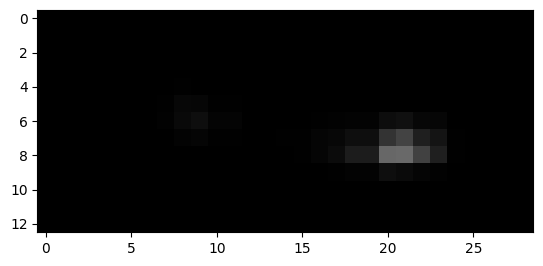

1156


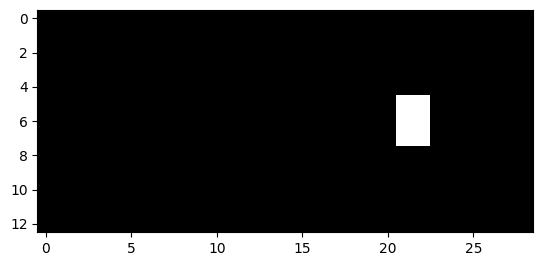

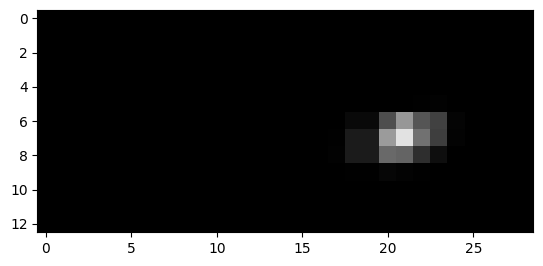

1157


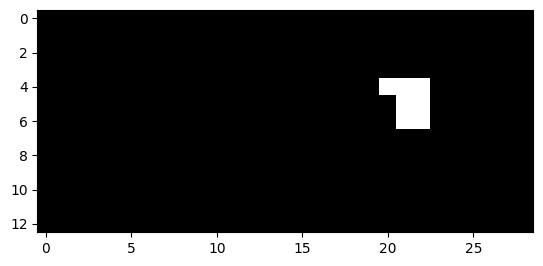

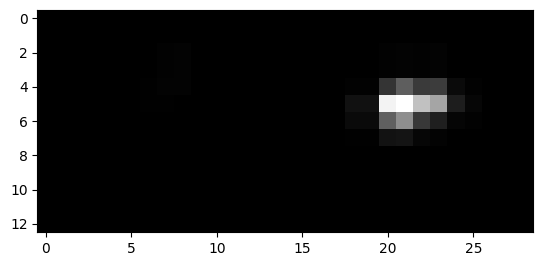

1158


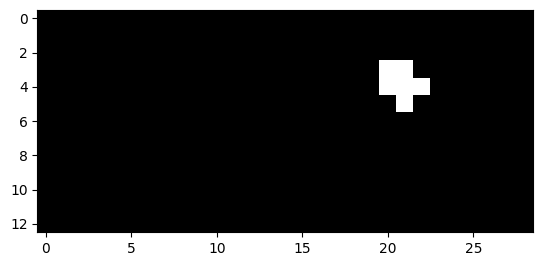

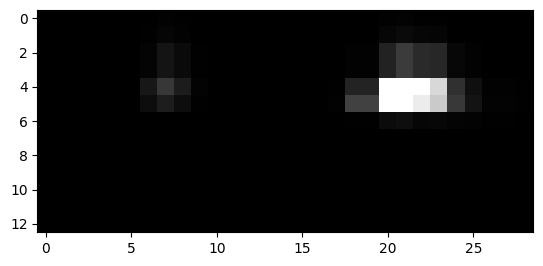

1159


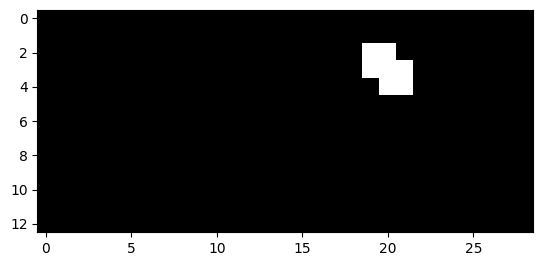

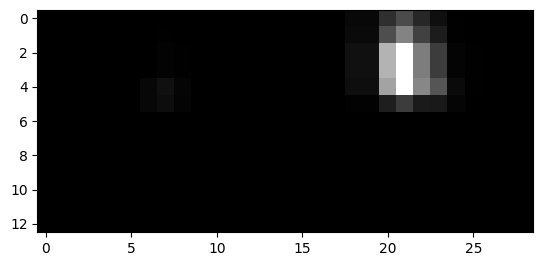

1160


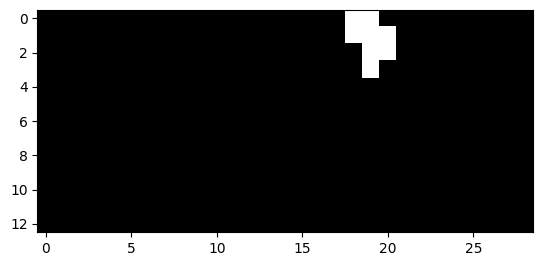

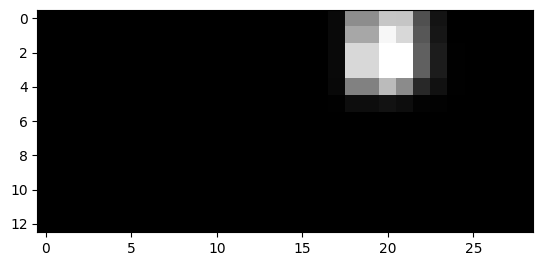

1161


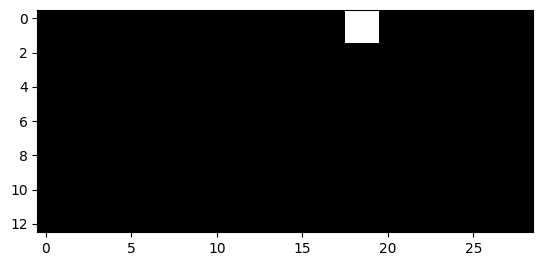

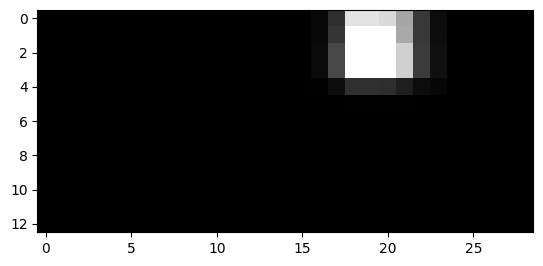

1162


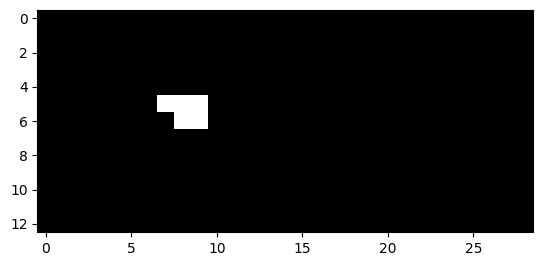

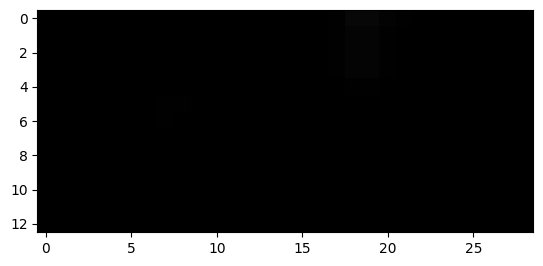

1163


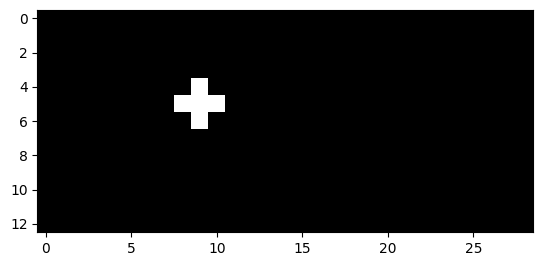

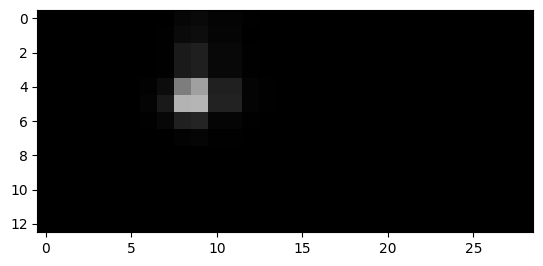

1164


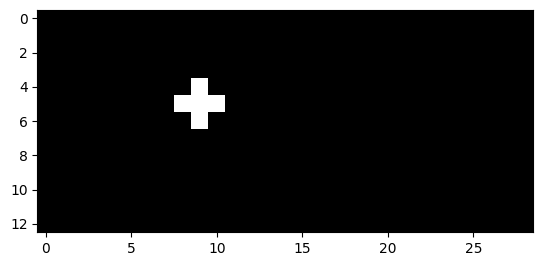

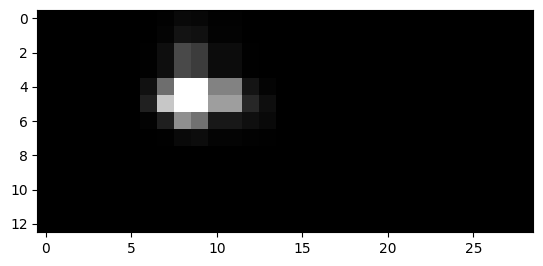

1165


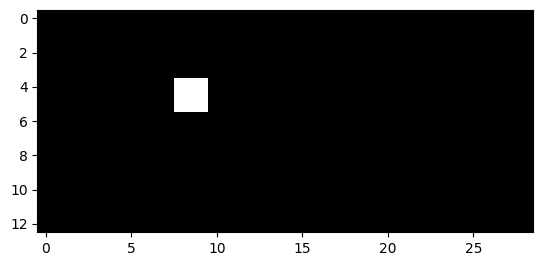

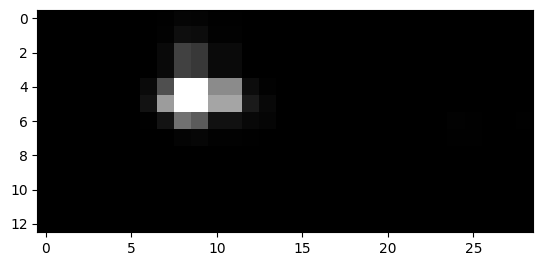

1166


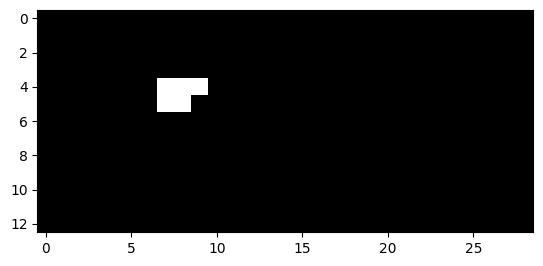

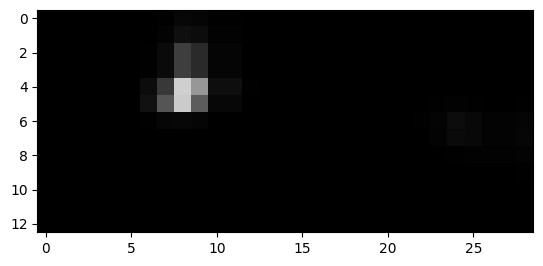

1167


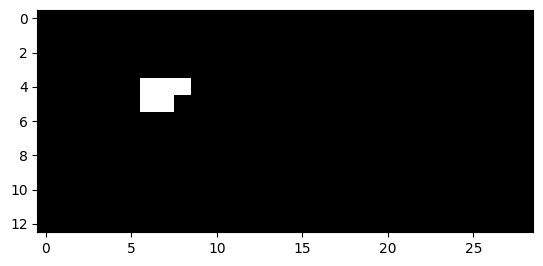

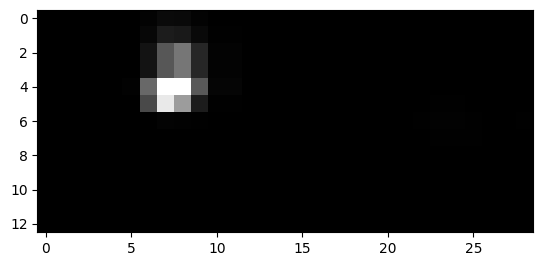

1169


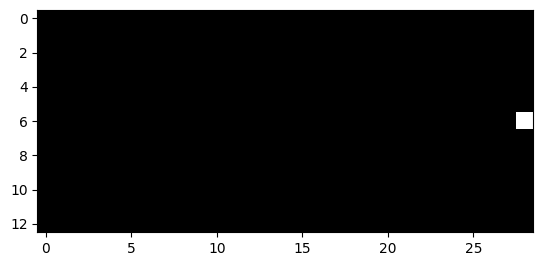

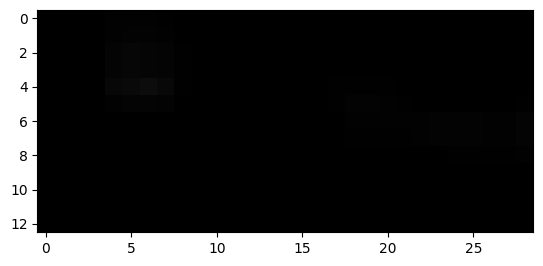

1170


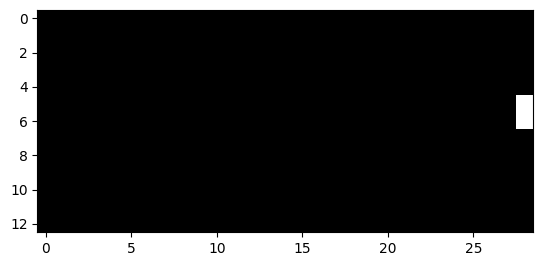

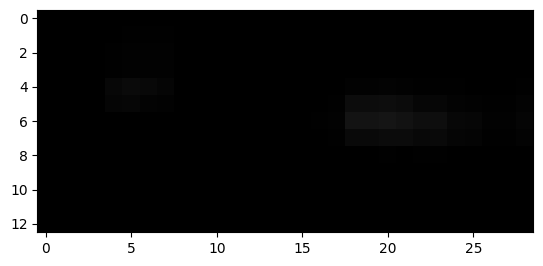

1171


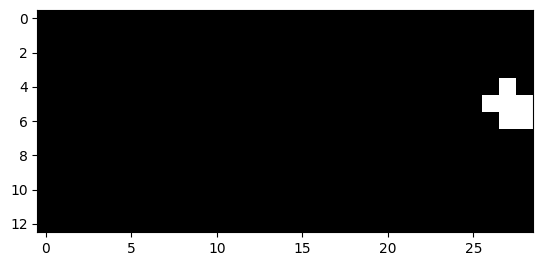

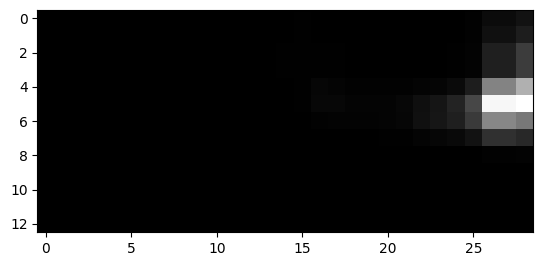

1172


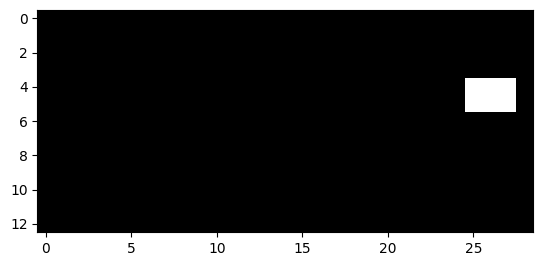

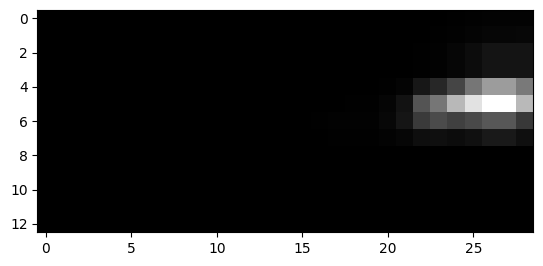

1173


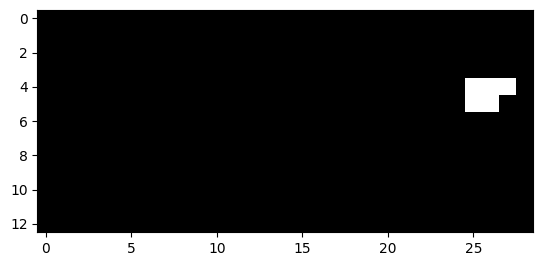

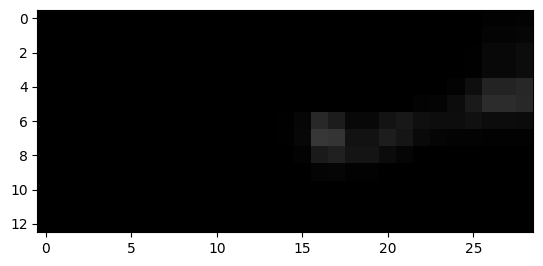

1174


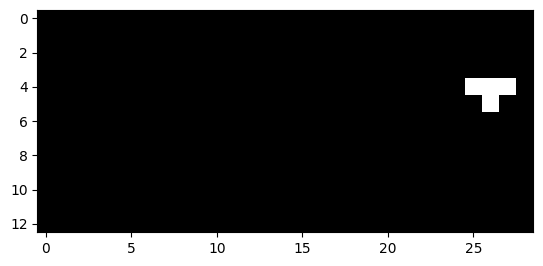

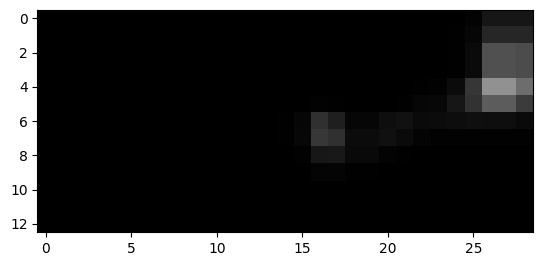

1175


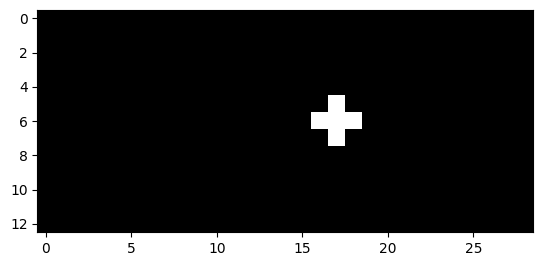

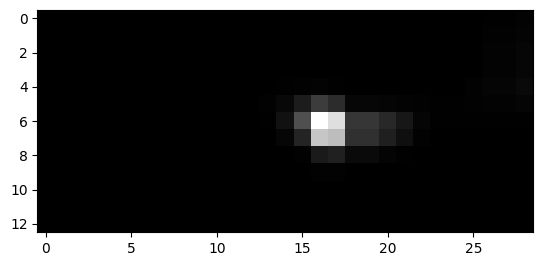

1176


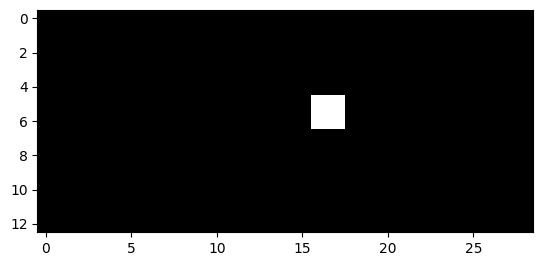

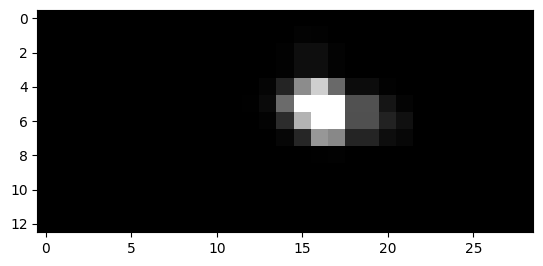

1177


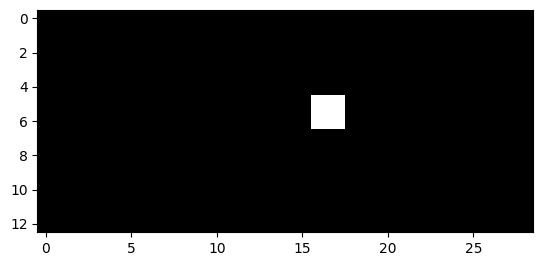

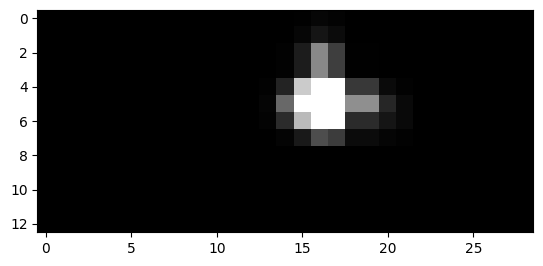

1178


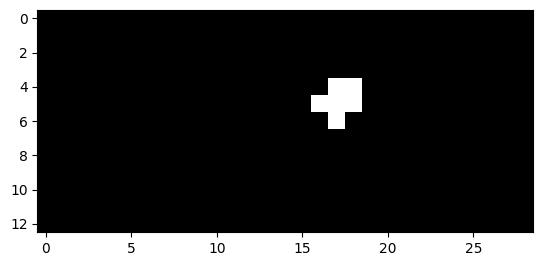

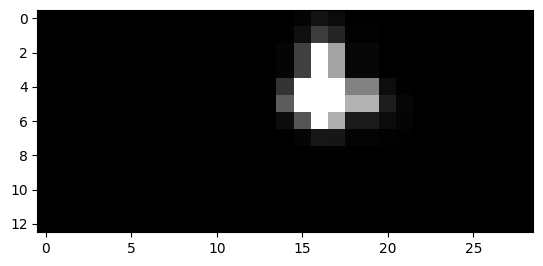

1179


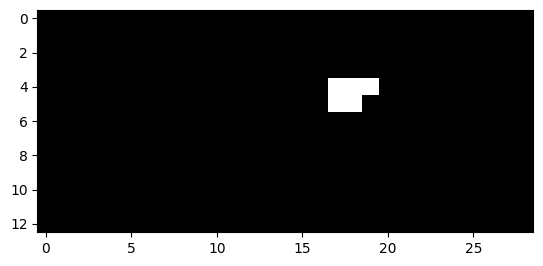

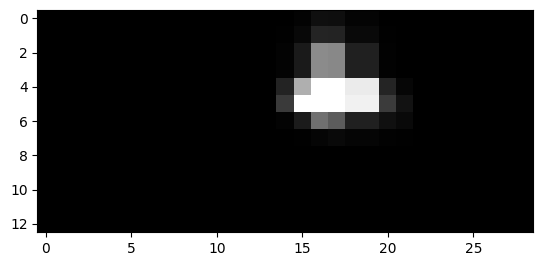

1180


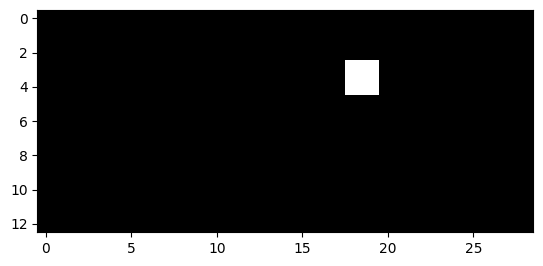

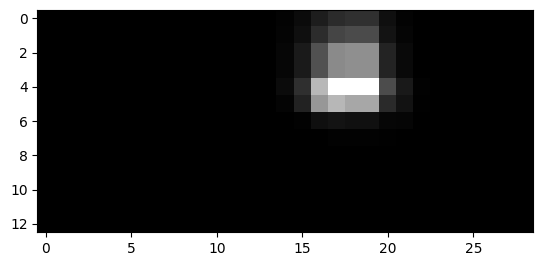

1181


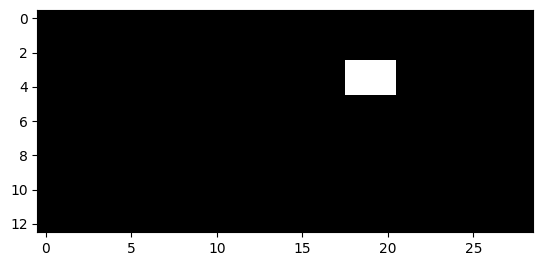

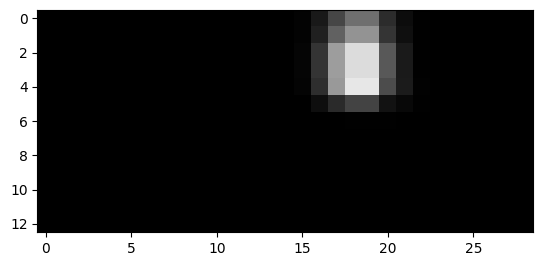

1182


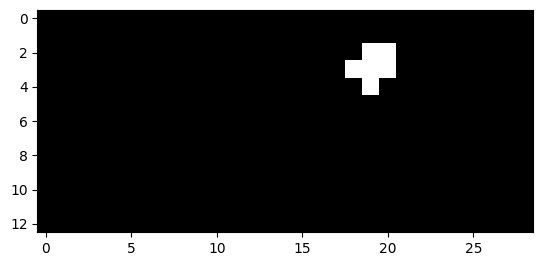

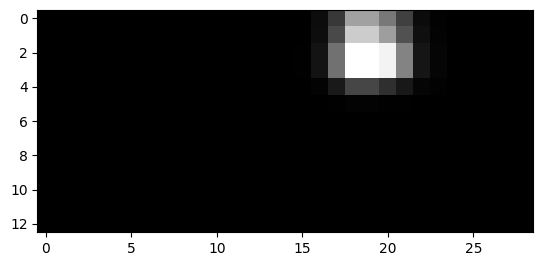

1183


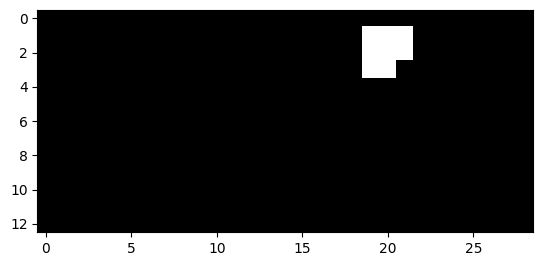

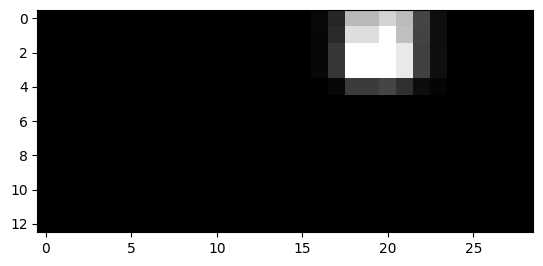

1184


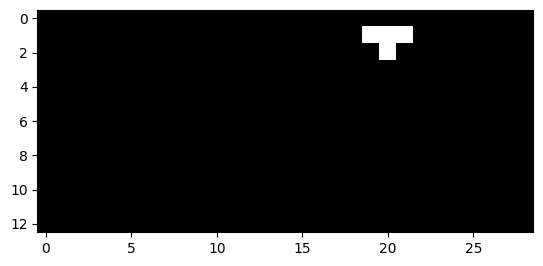

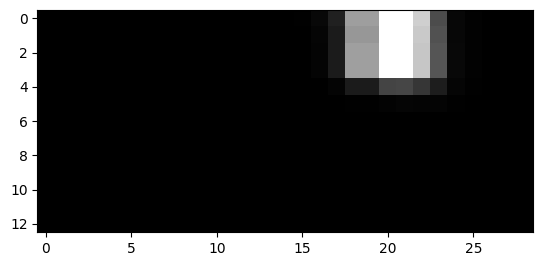

1207


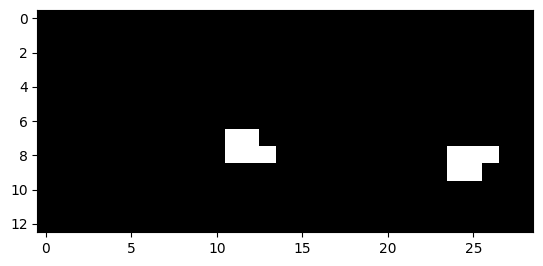

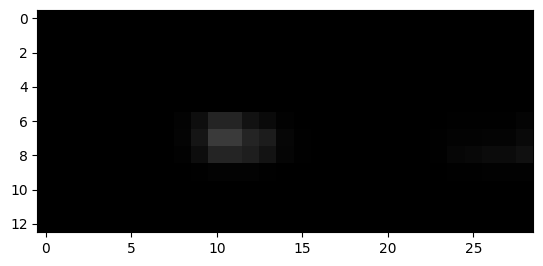

1208


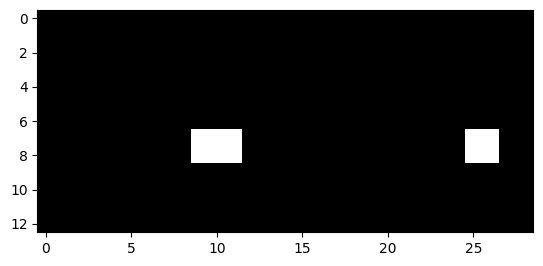

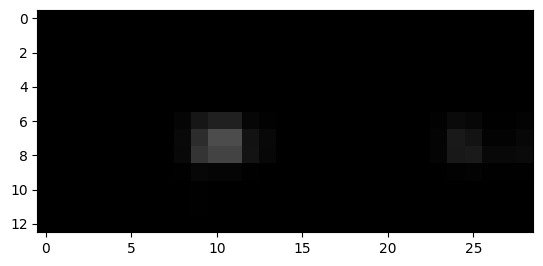

1209


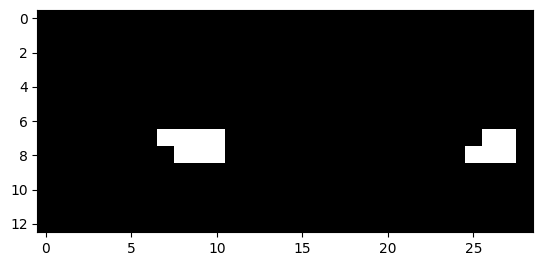

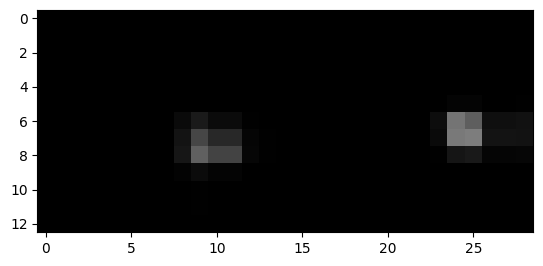

1210


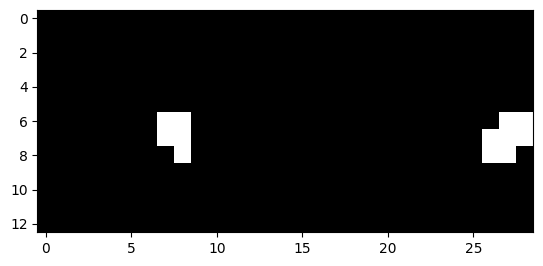

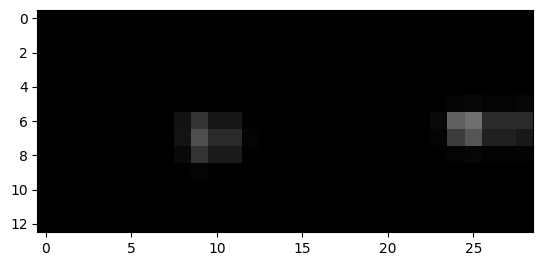

1211


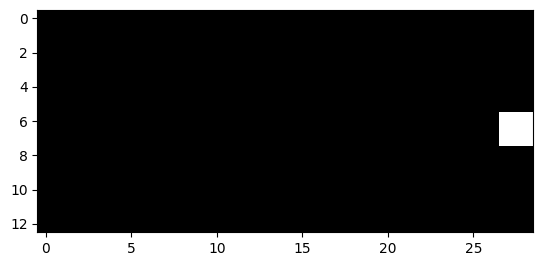

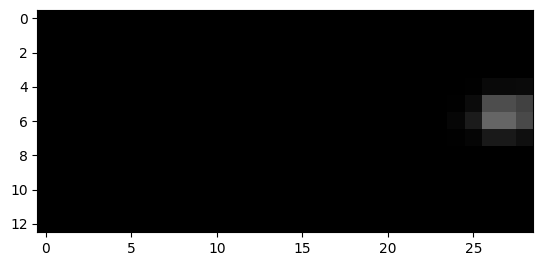

1212


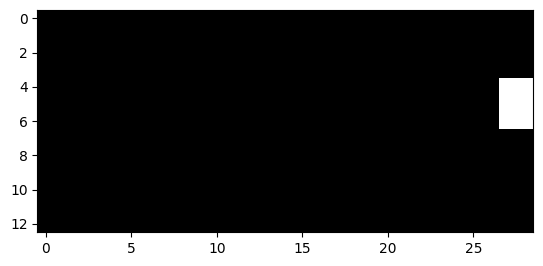

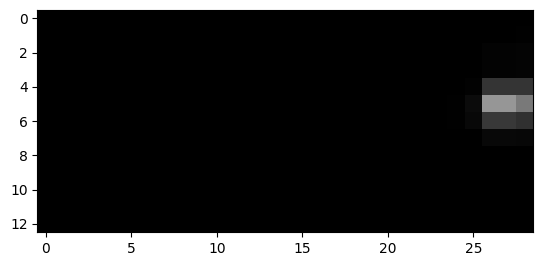

1213


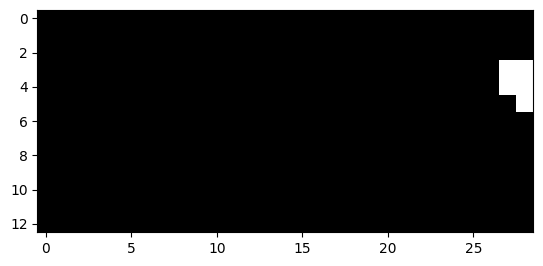

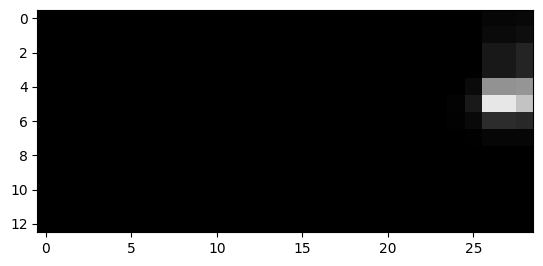

172


In [81]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

### Easier CNN

In [89]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_169 (Conv2D)         (None, 13, 29, 8)         584       
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 7, 15, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_170 (Conv2D)         (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_30 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_171 (Conv2D)         (None, 14, 30, 1)         73        
                                                                 
 cropping2d_10 (Cropping2D)  (None, 13, 29, 1)       

In [90]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100
  1/354 [..............................] - ETA: 1:52 - loss: 0.5610

2023-01-17 15:29:21.960047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0338

2023-01-17 15:29:24.925240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 9ms/step - loss: 0.0338 - val_loss: 0.0086
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0090 - val_loss: 0.0071
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0069 - val_loss: 0.0057
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0065 - val_loss: 0.0054
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0063 - val_loss: 0.0055
E

45/45 [==============================] - 0s 2ms/step


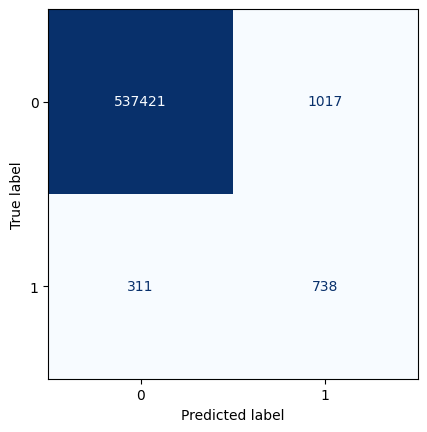

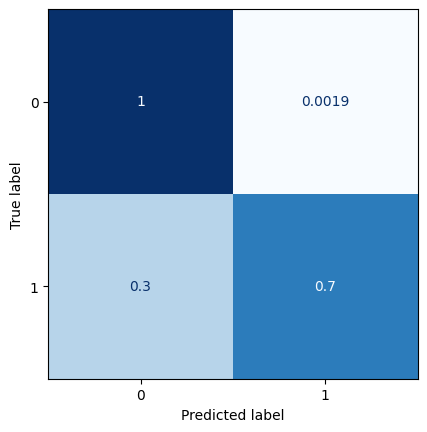

In [97]:
t = model.predict(test_img_std)

classes = []
for i in t.reshape(-1,1):
    if i<=0.1: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


19


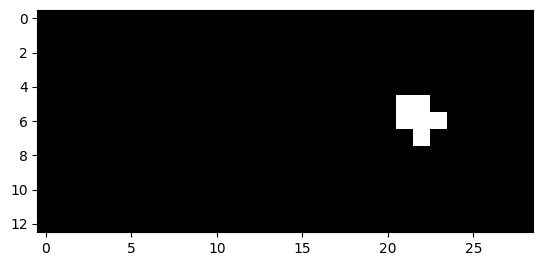

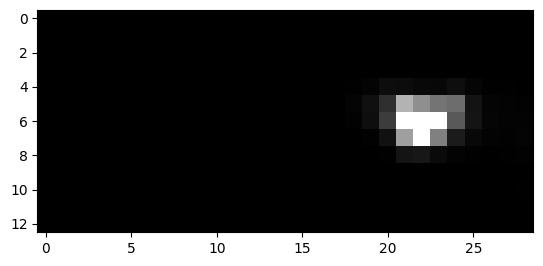

20


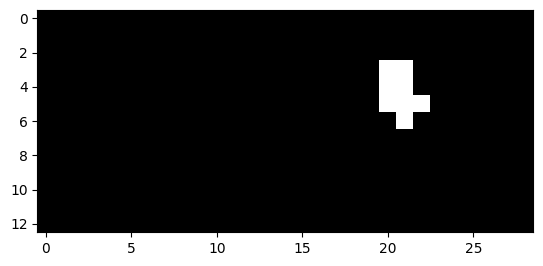

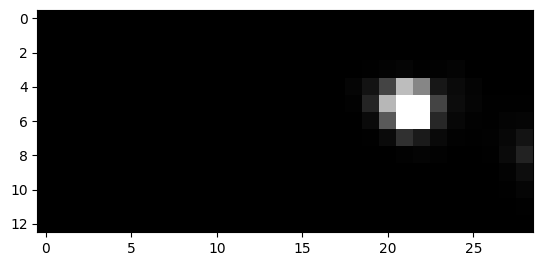

21


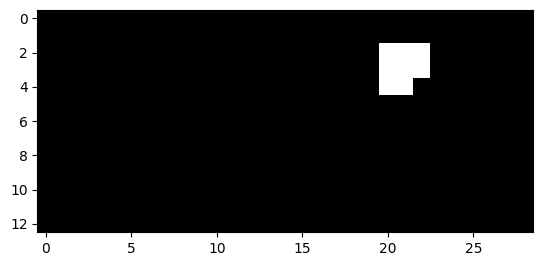

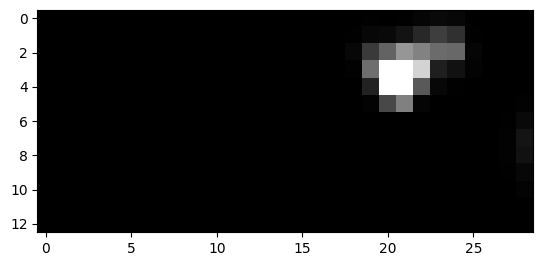

22


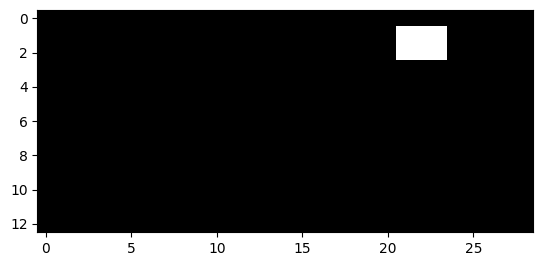

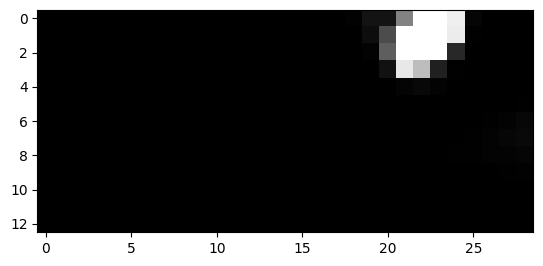

23


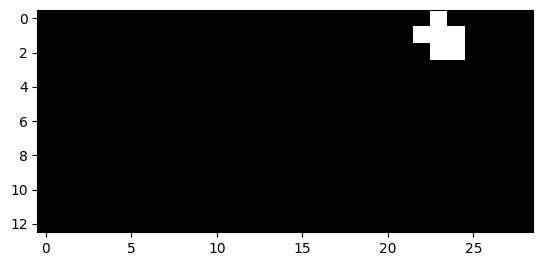

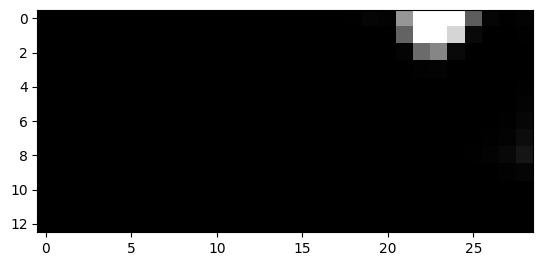

24


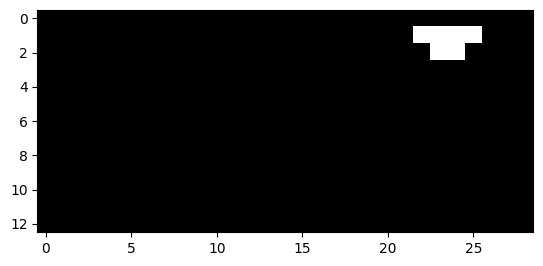

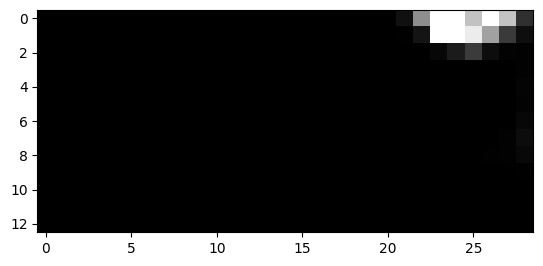

25


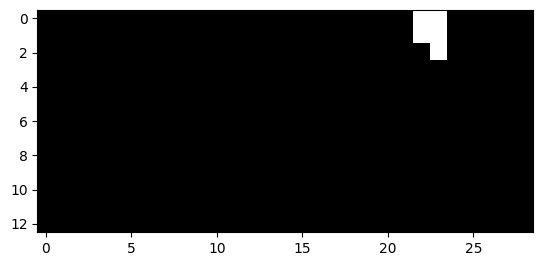

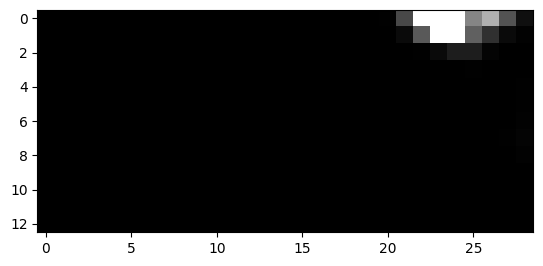

26


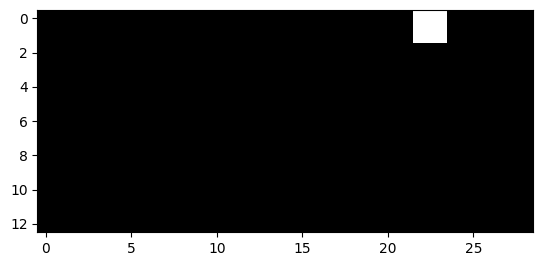

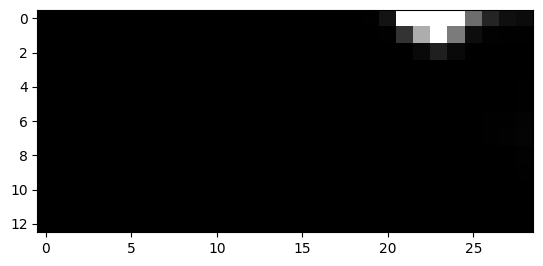

28


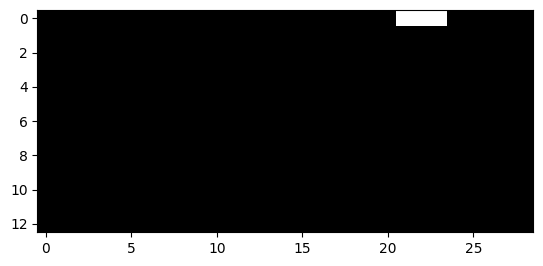

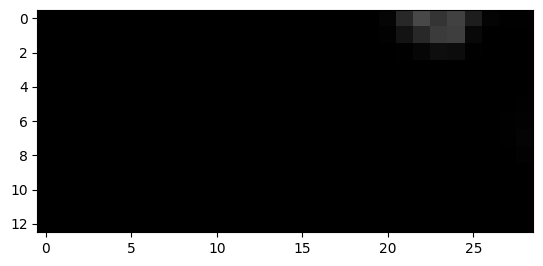

40


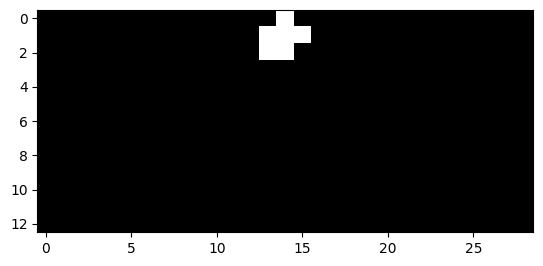

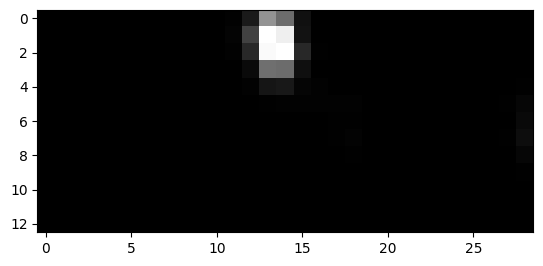

41


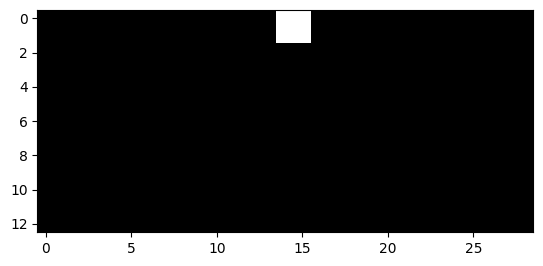

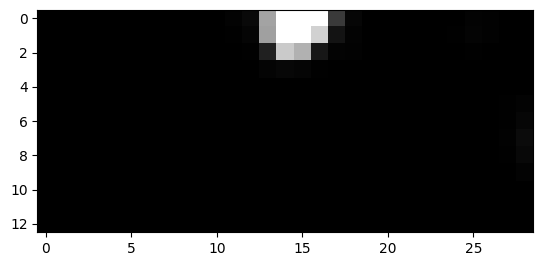

43


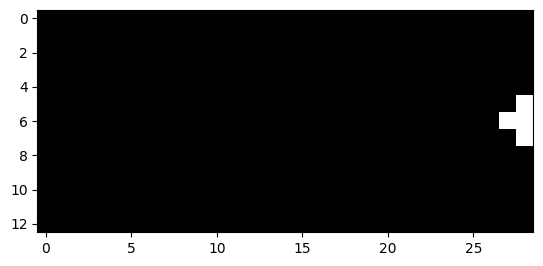

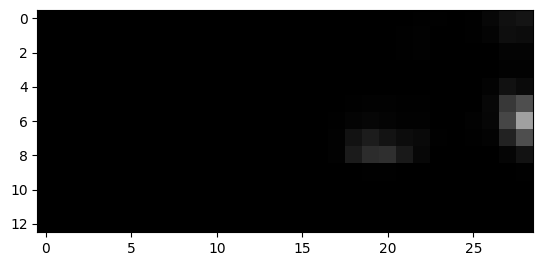

44


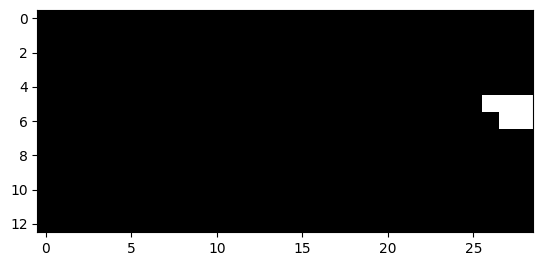

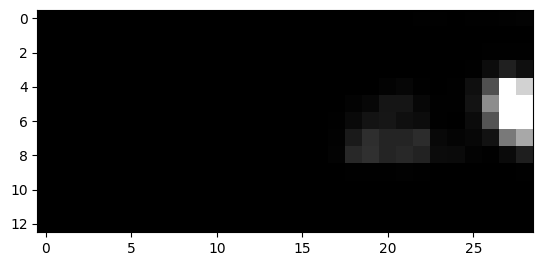

45


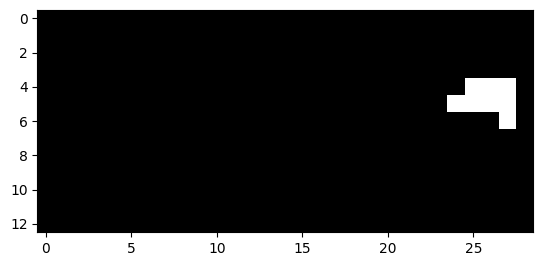

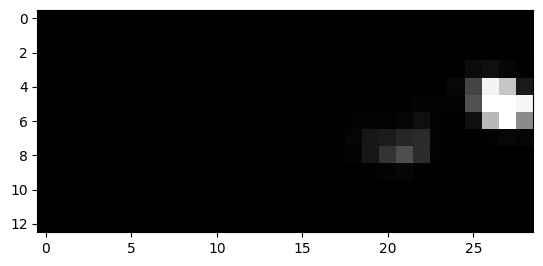

46


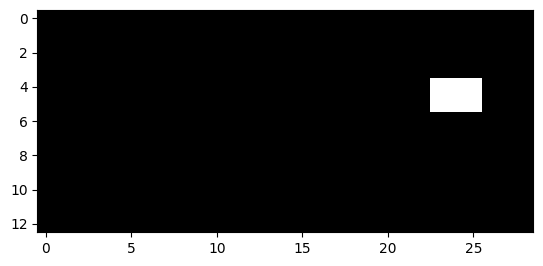

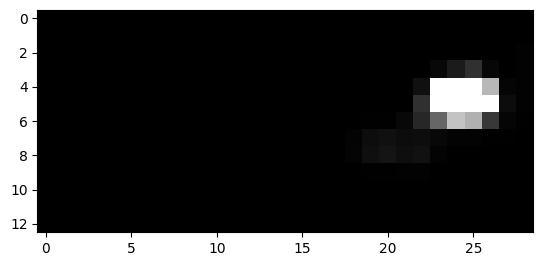

47


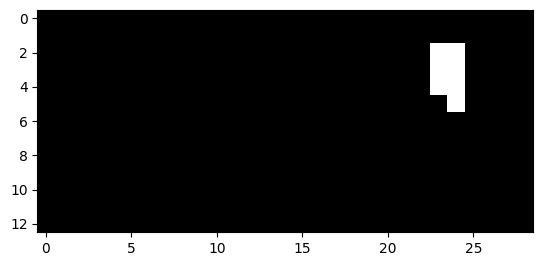

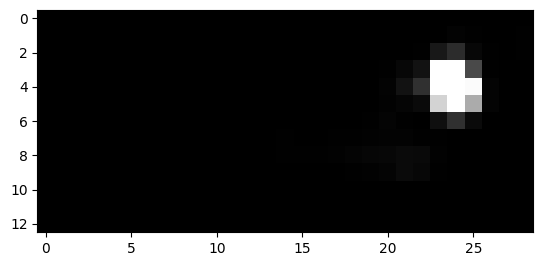

48


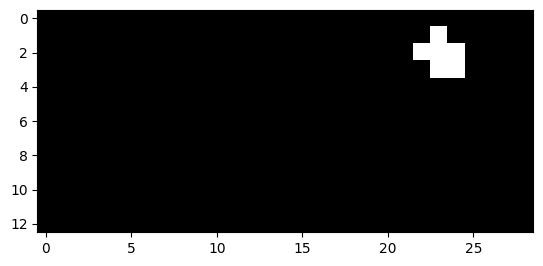

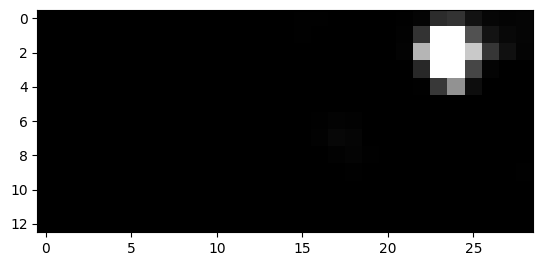

49


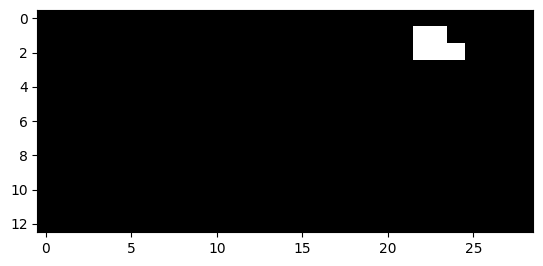

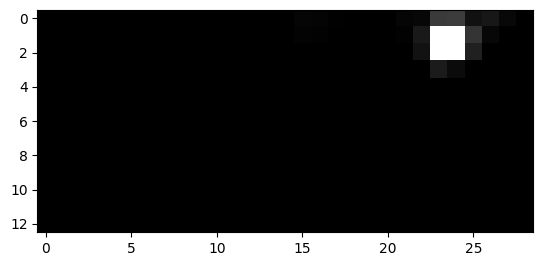

50


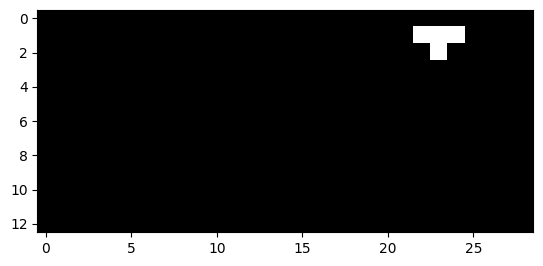

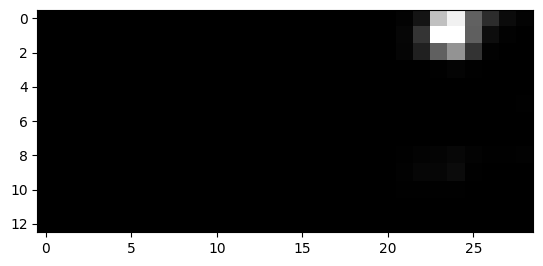

51


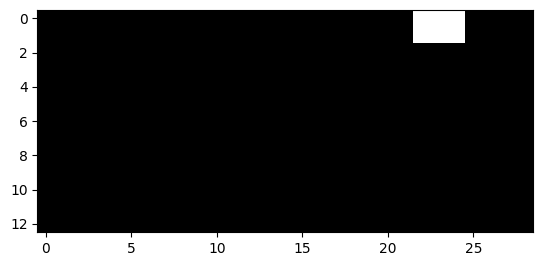

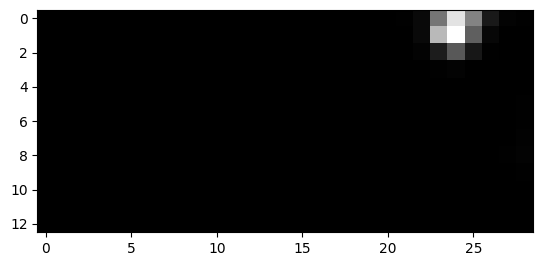

52


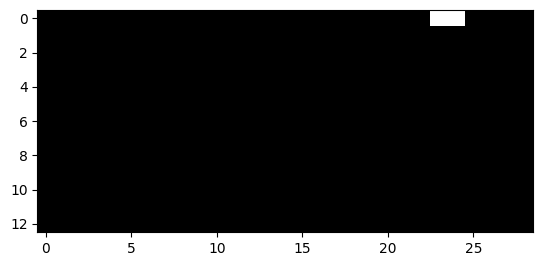

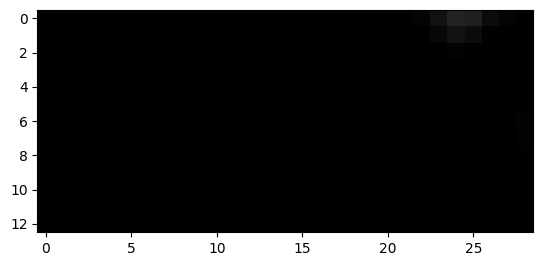

73


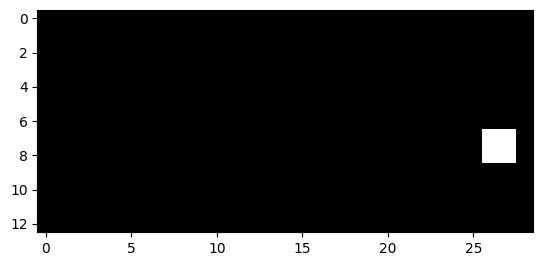

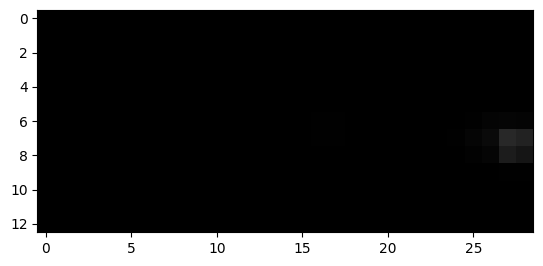

74


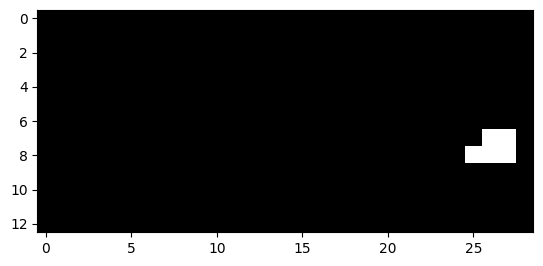

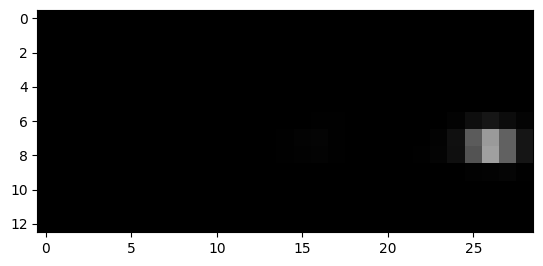

75


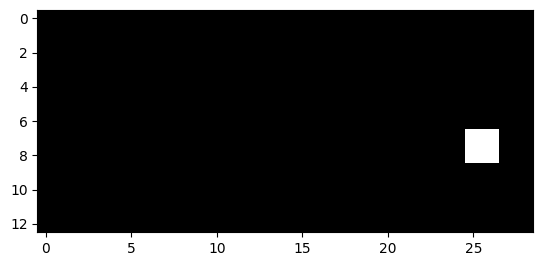

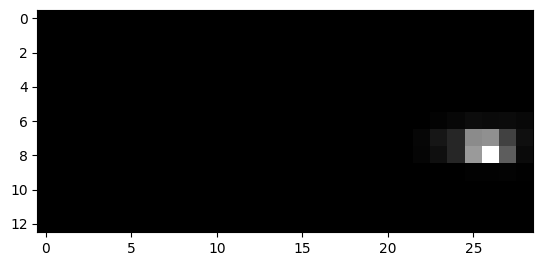

76


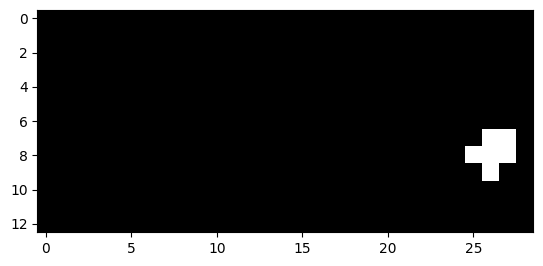

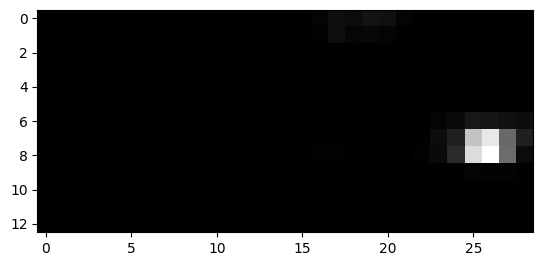

77


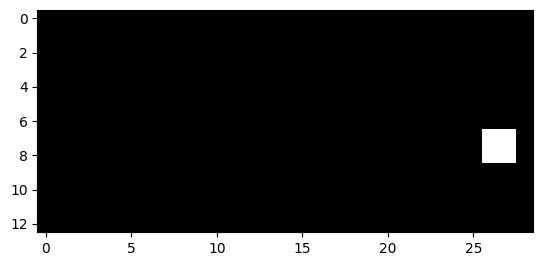

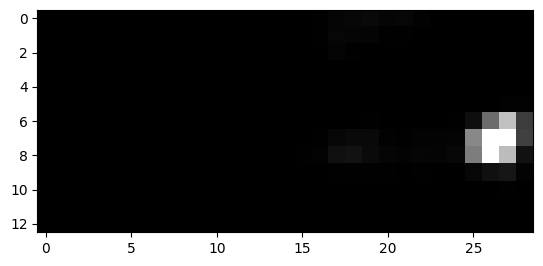

78


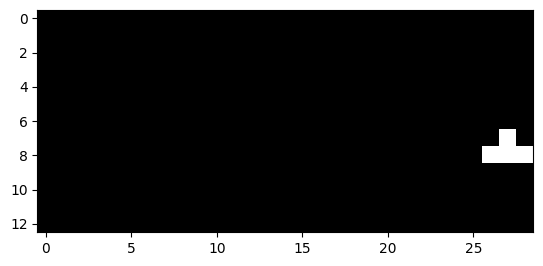

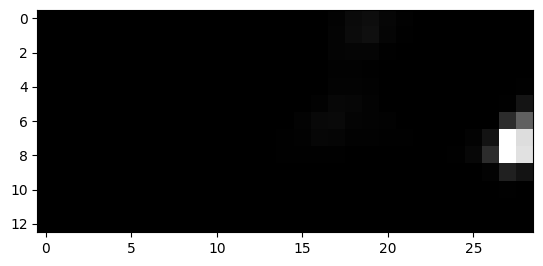

79


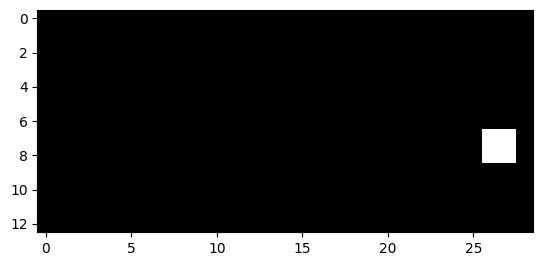

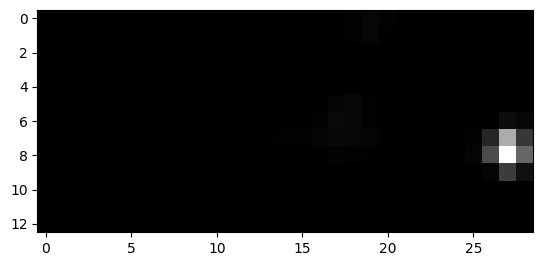

86


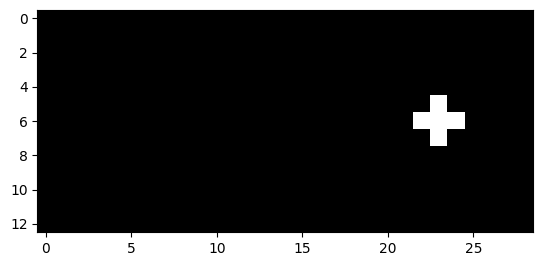

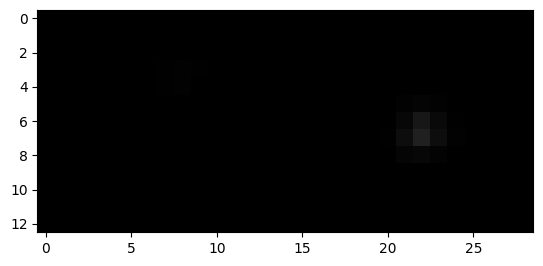

87


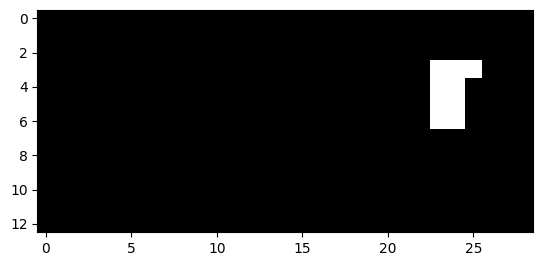

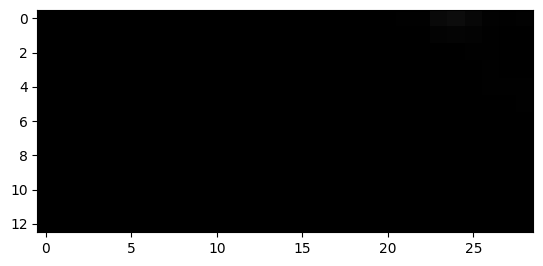

88


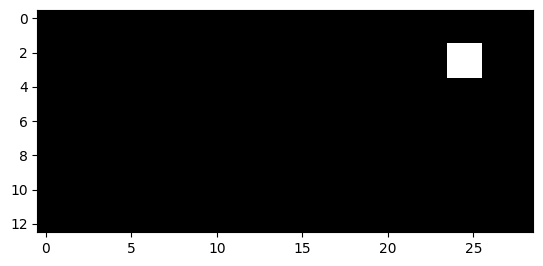

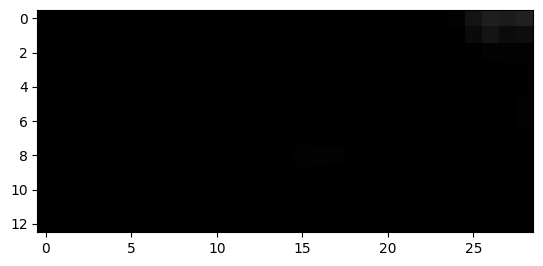

100


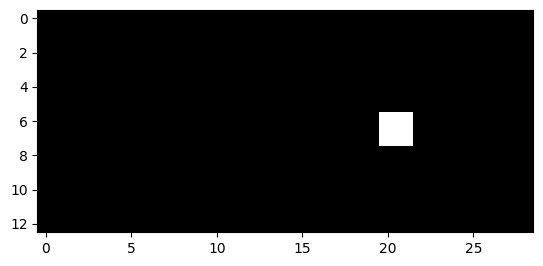

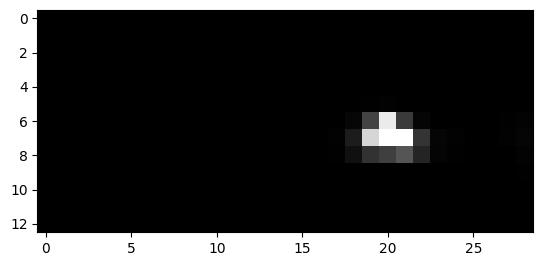

101


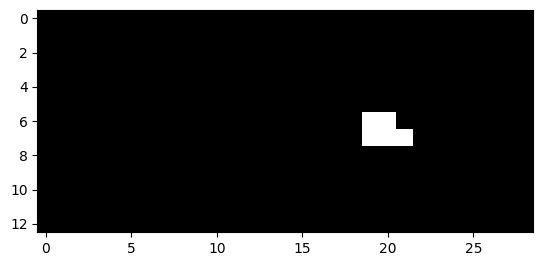

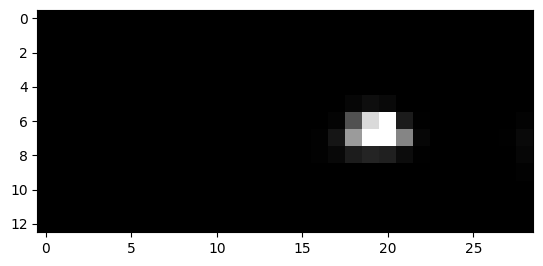

102


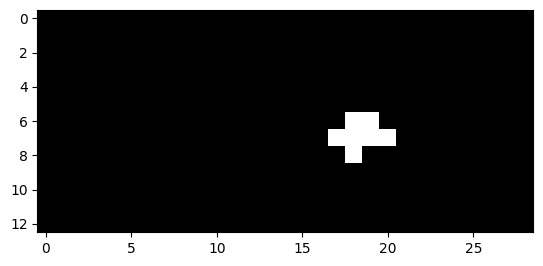

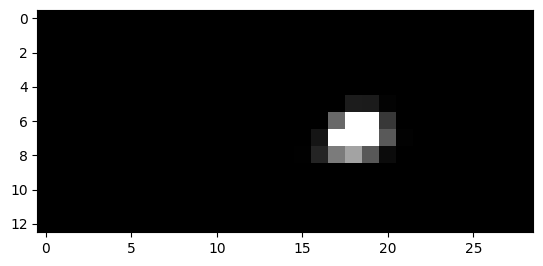

103


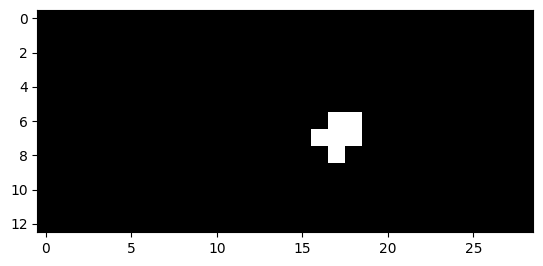

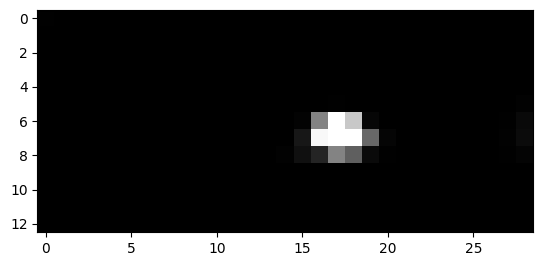

104


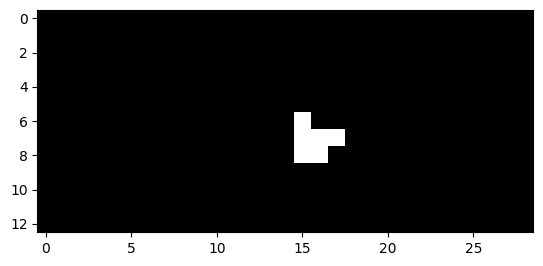

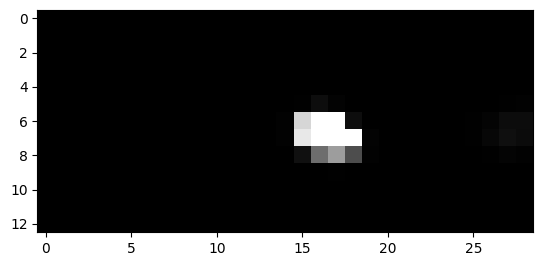

105


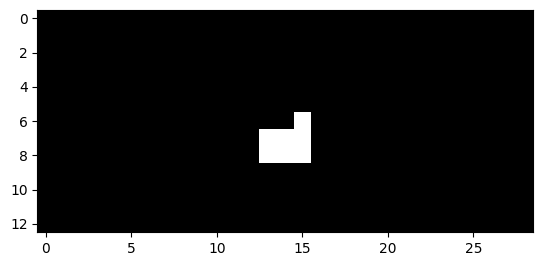

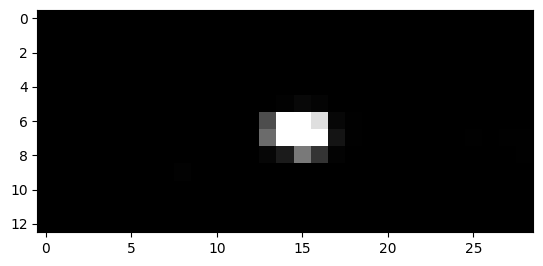

106


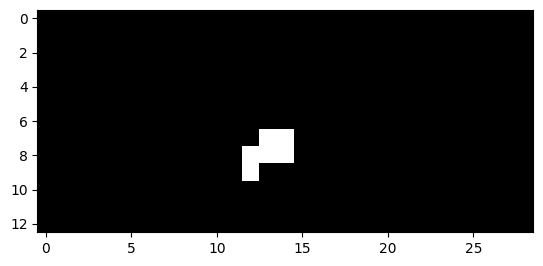

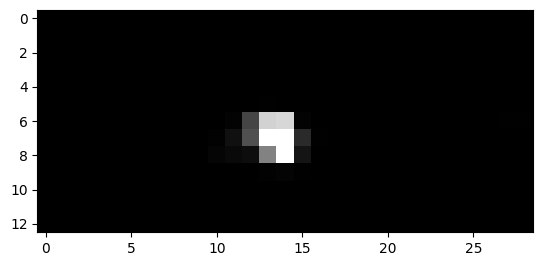

107


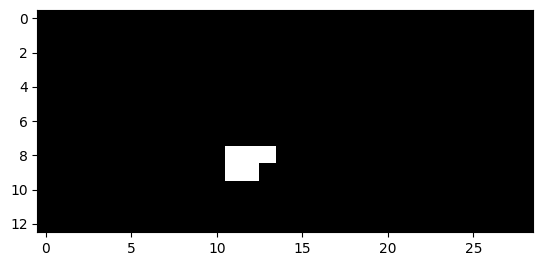

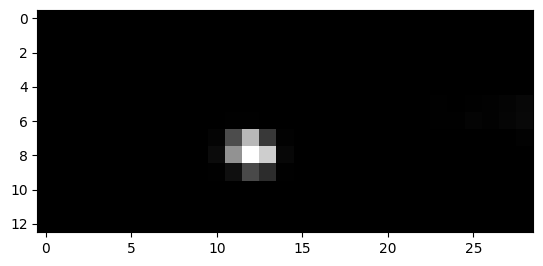

108


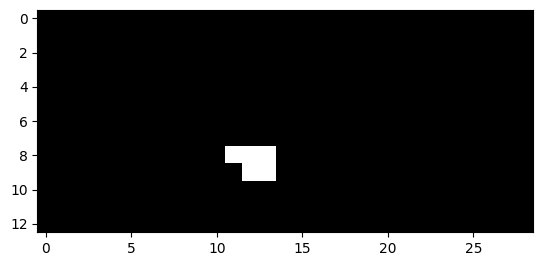

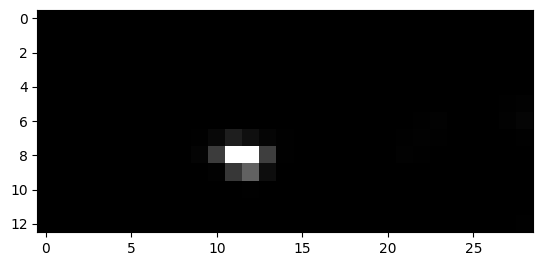

109


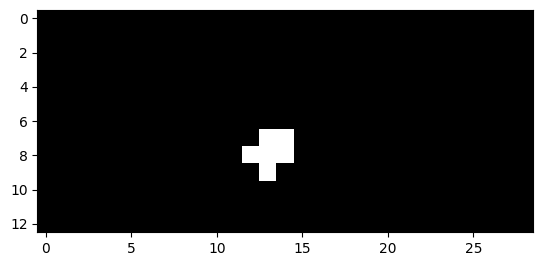

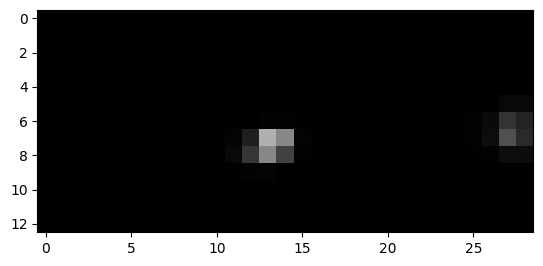

110


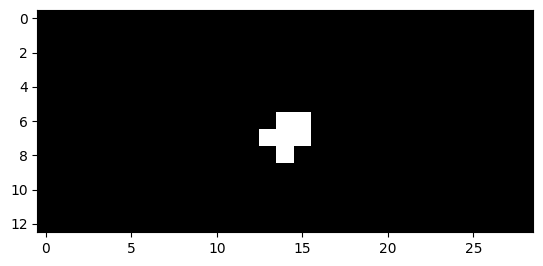

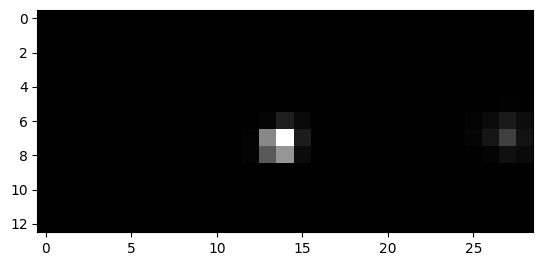

111


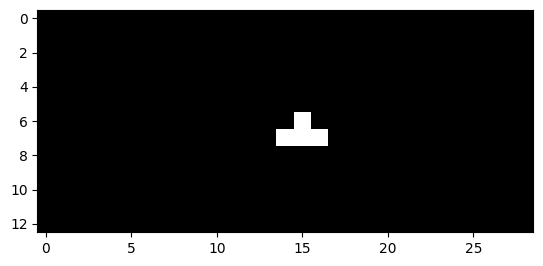

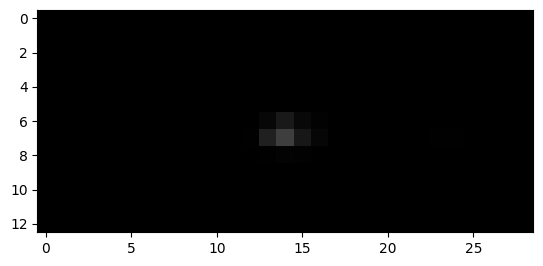

112


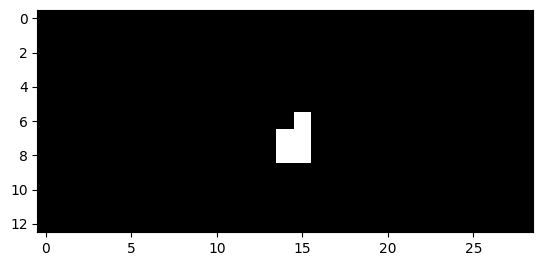

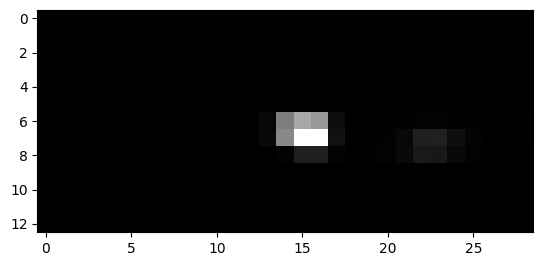

399


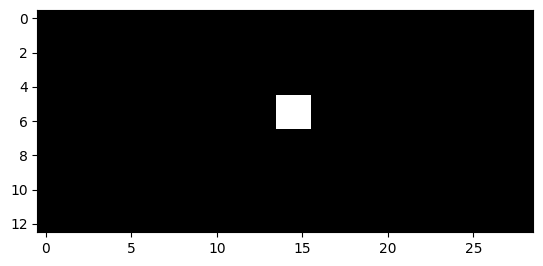

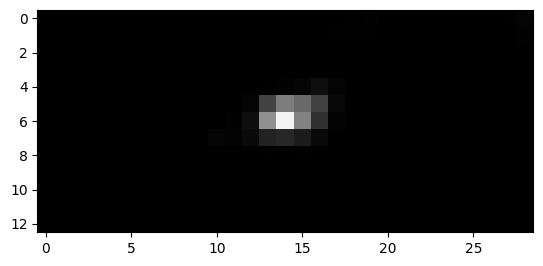

400


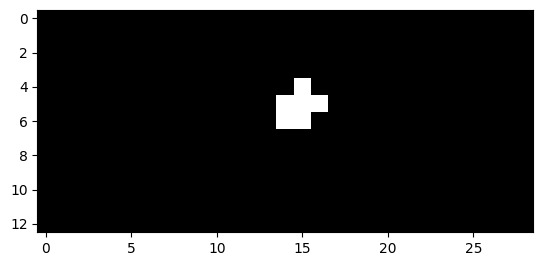

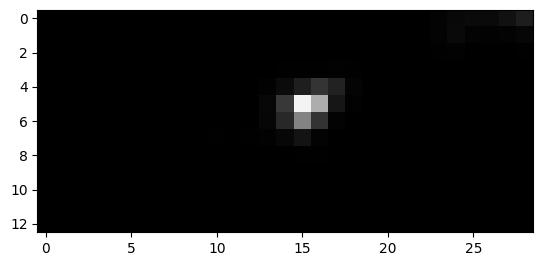

401


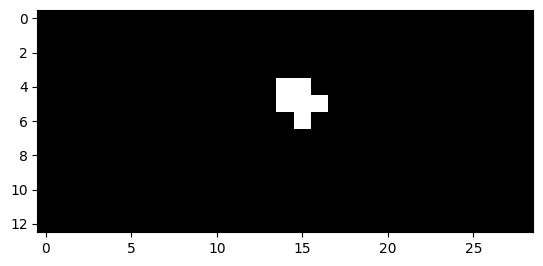

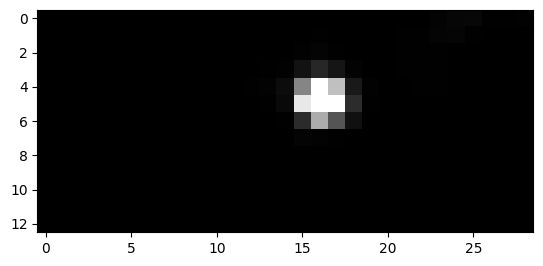

402


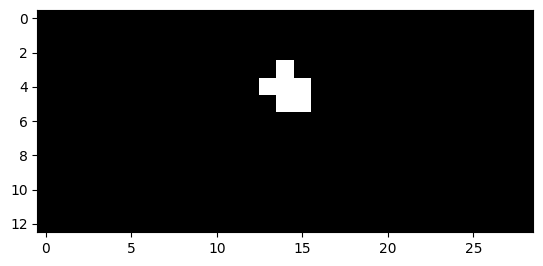

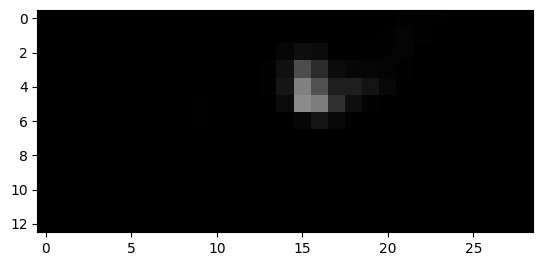

403


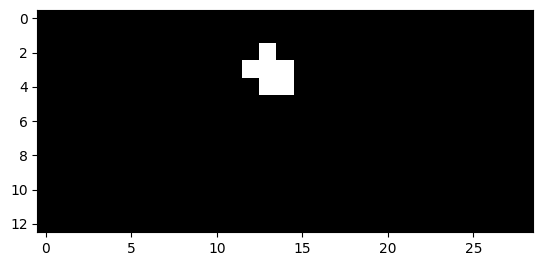

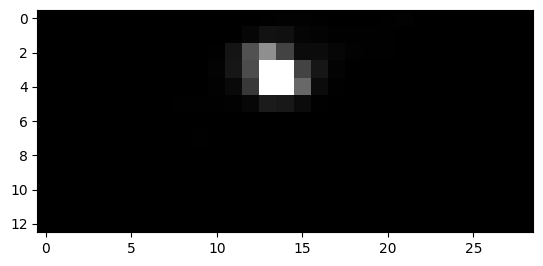

404


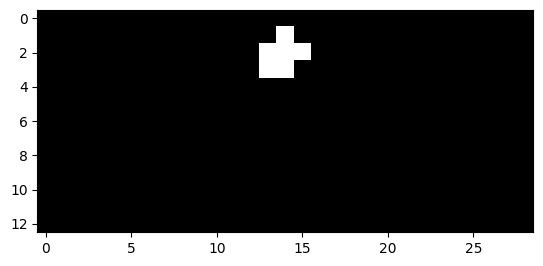

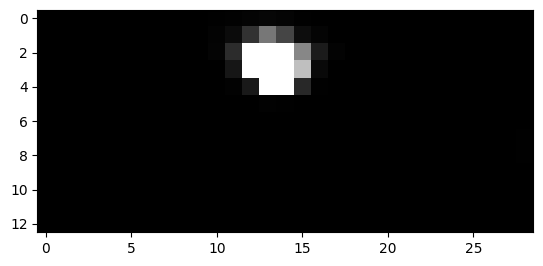

405


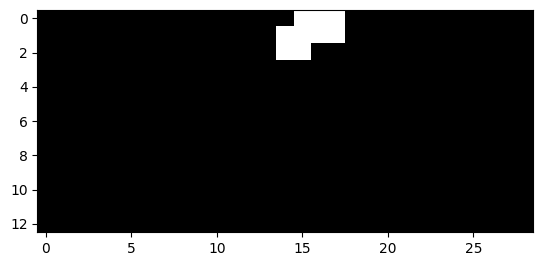

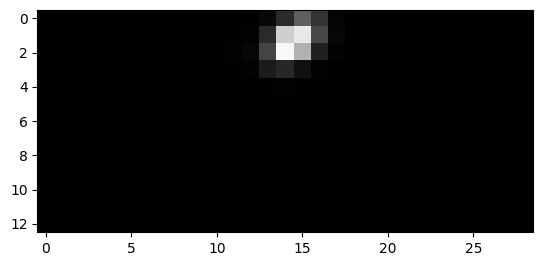

406


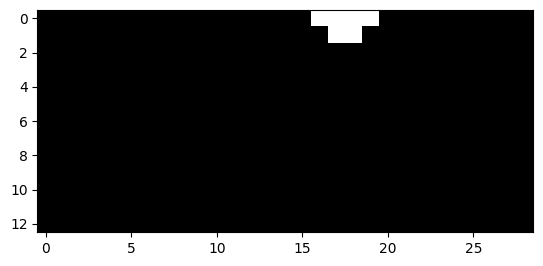

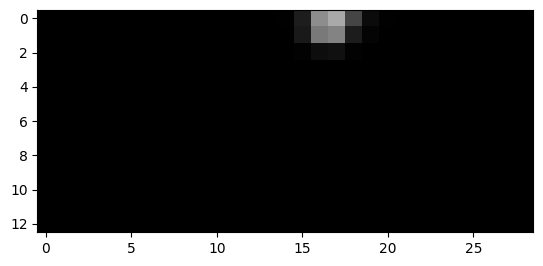

407


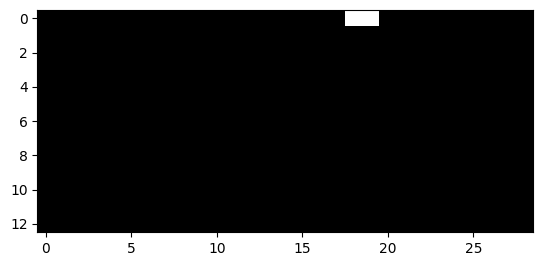

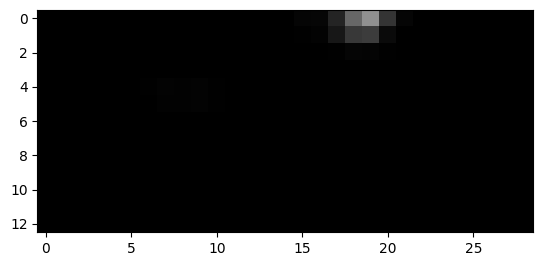

408


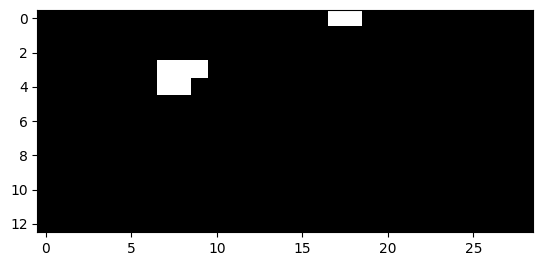

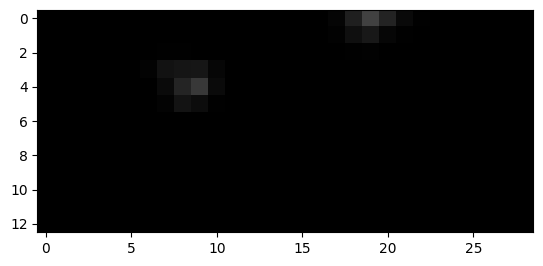

409


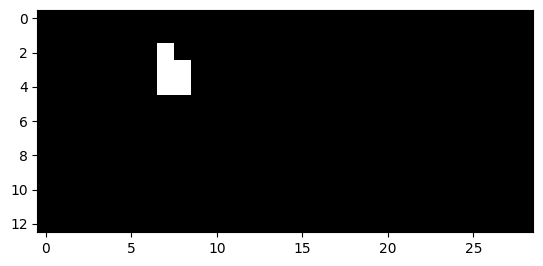

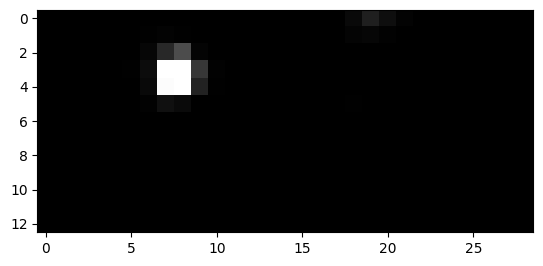

410


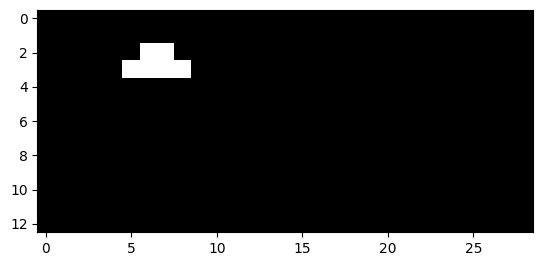

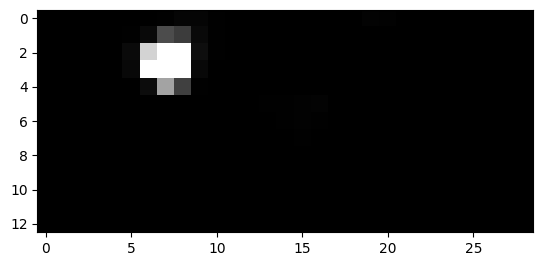

411


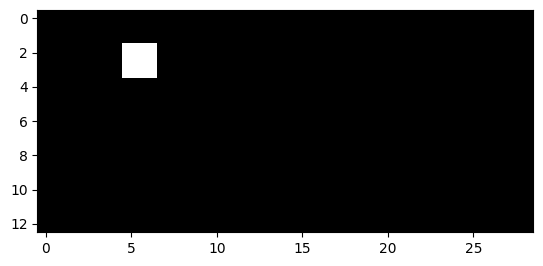

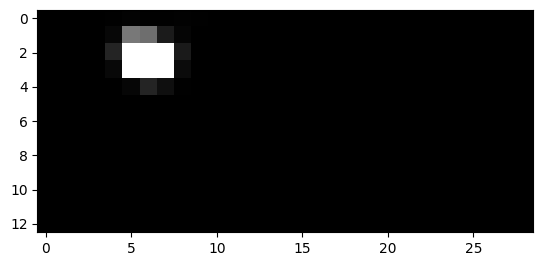

426


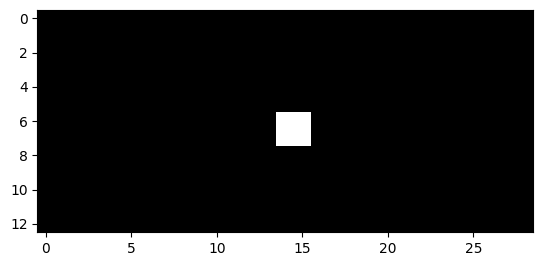

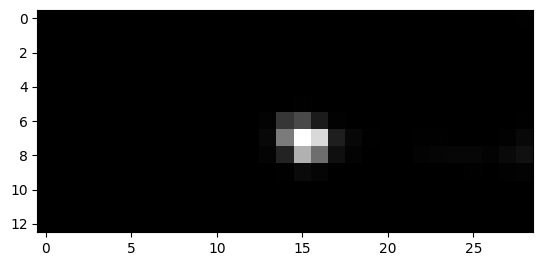

427


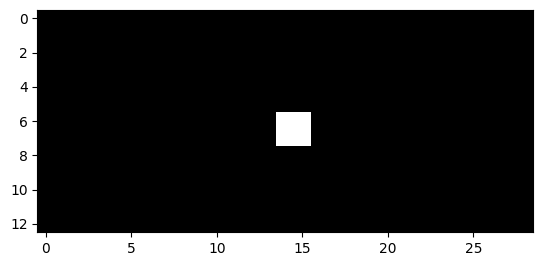

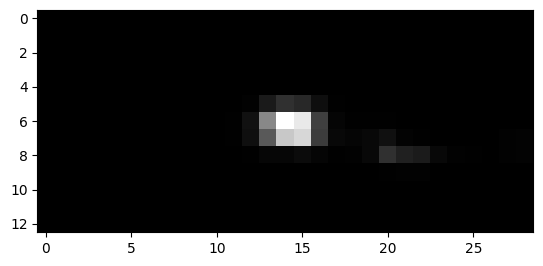

428


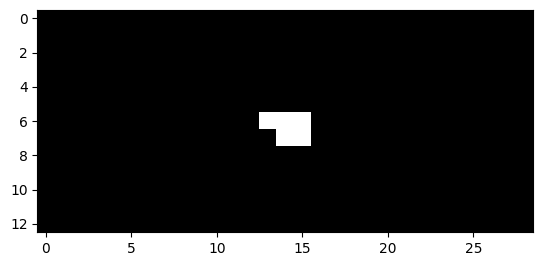

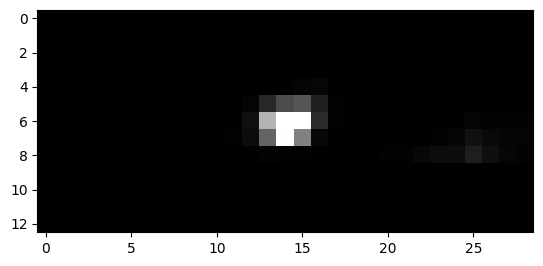

429


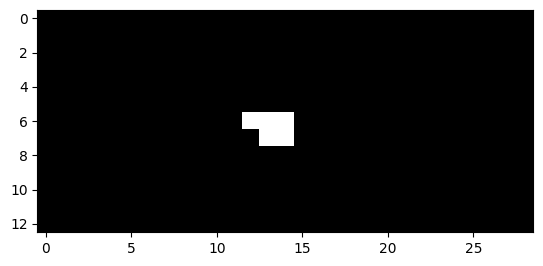

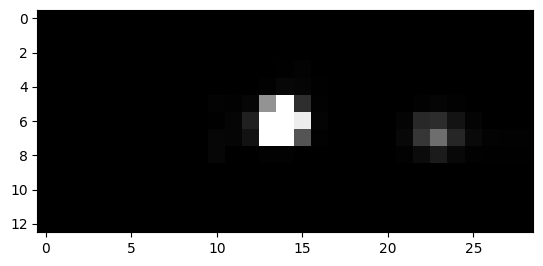

430


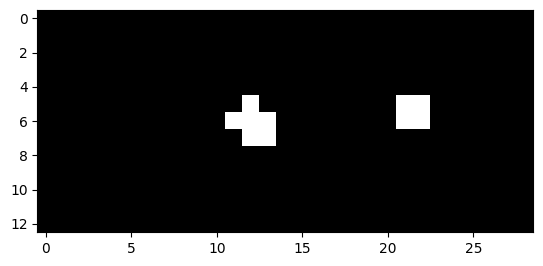

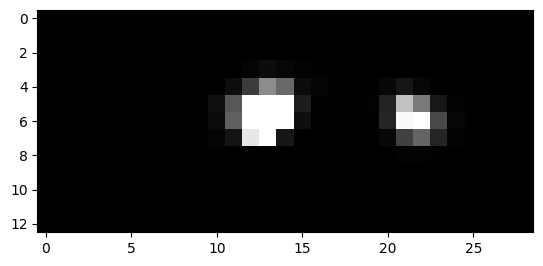

431


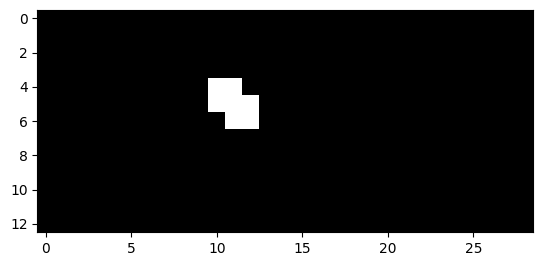

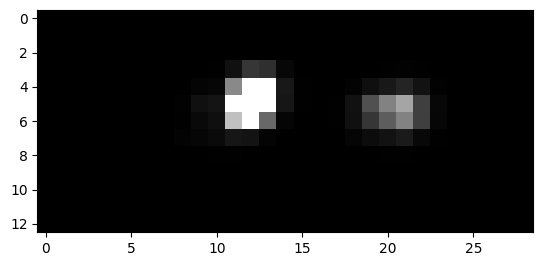

432


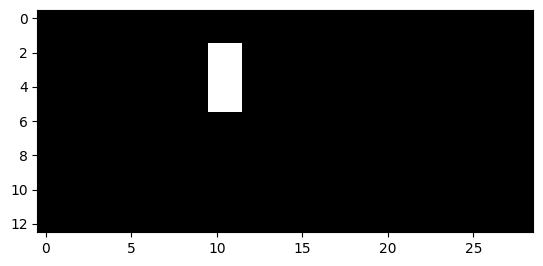

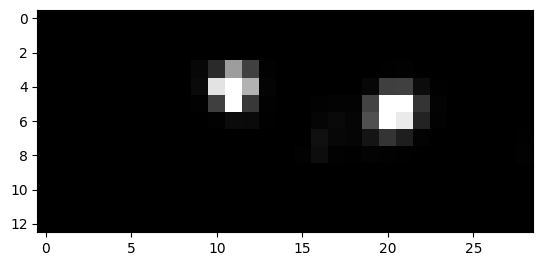

433


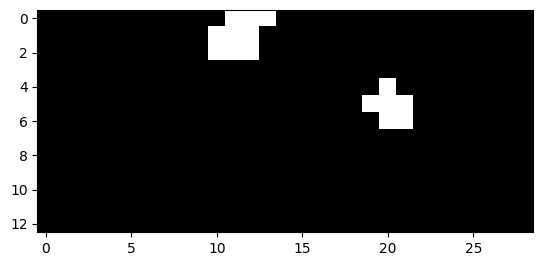

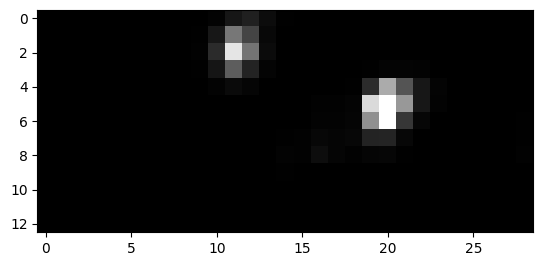

434


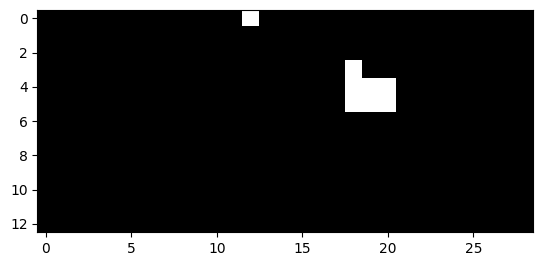

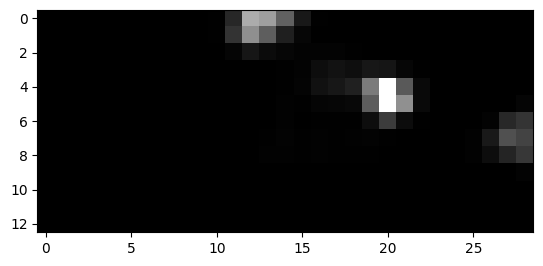

437


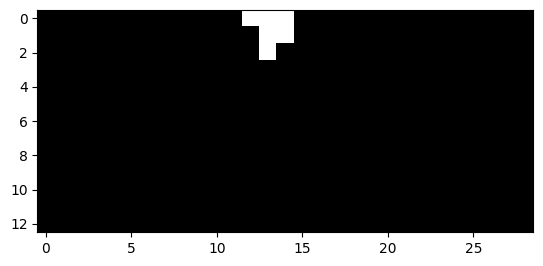

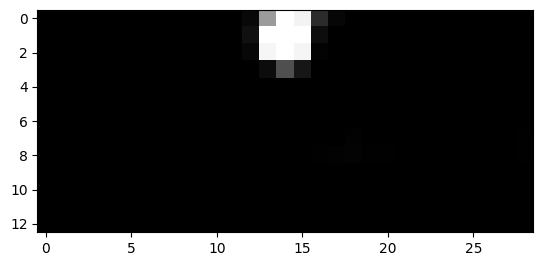

438


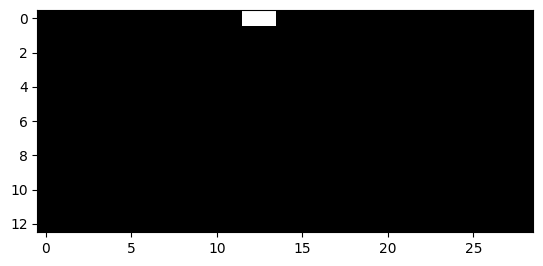

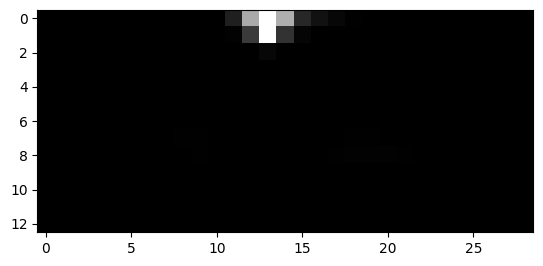

731


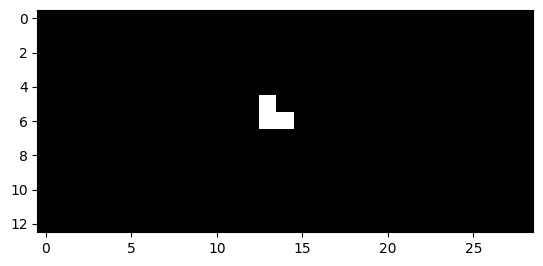

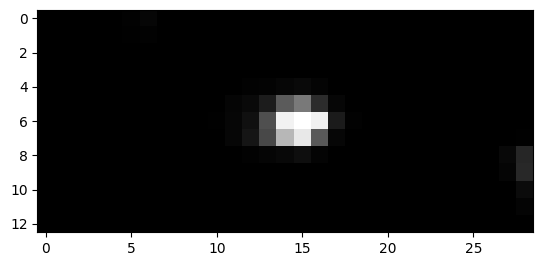

732


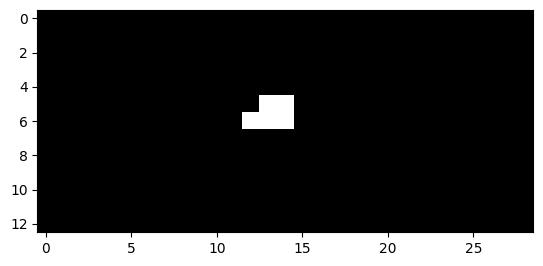

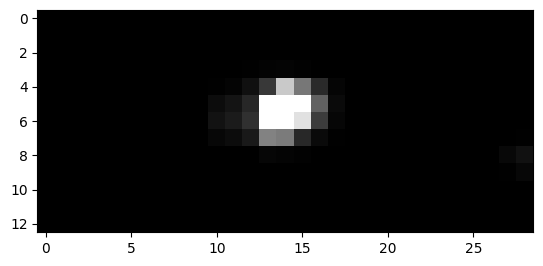

733


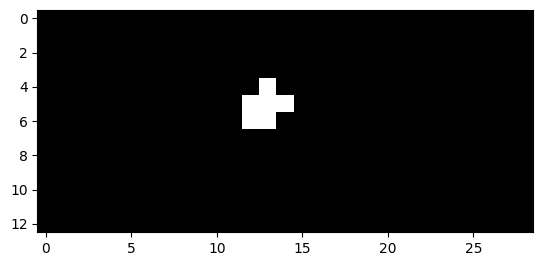

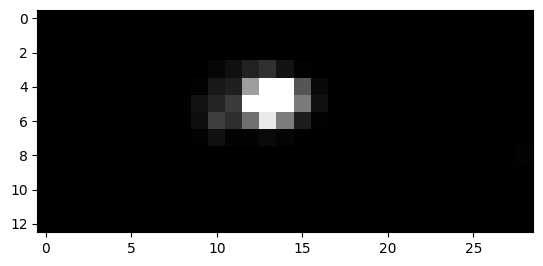

734


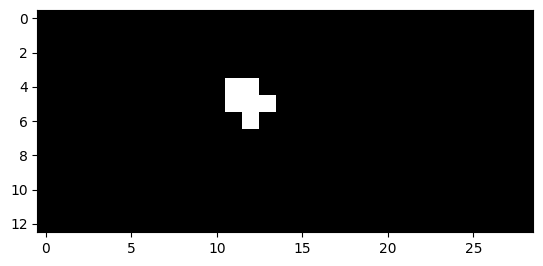

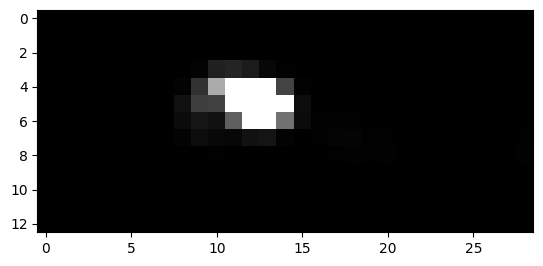

735


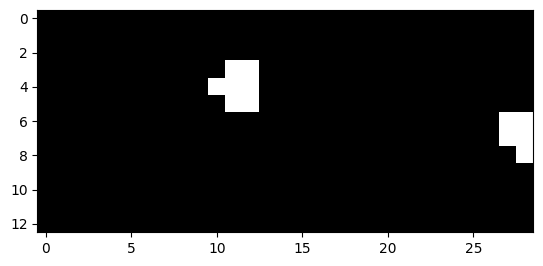

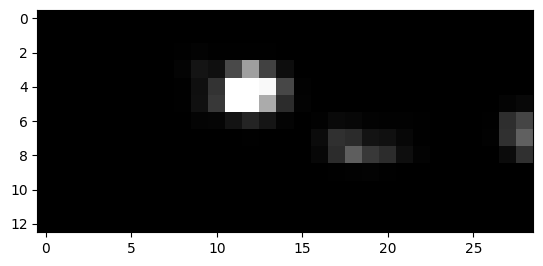

736


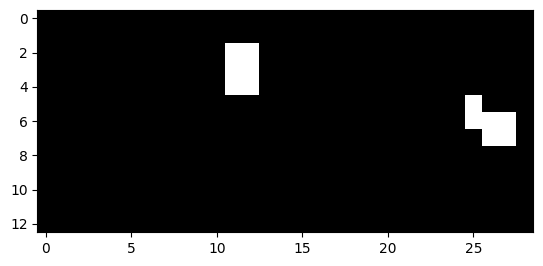

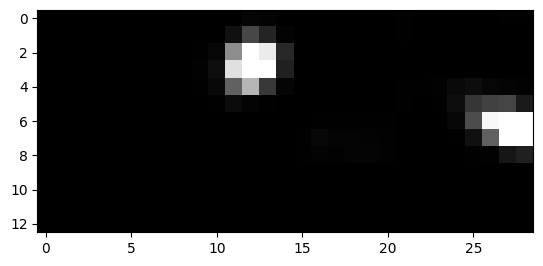

737


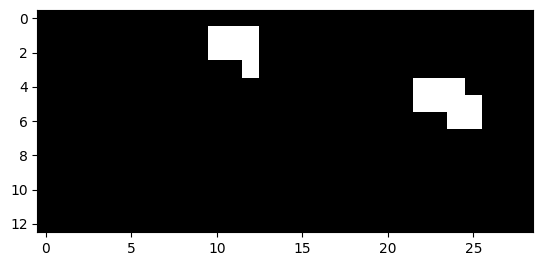

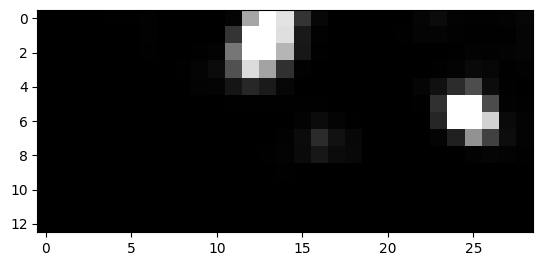

738


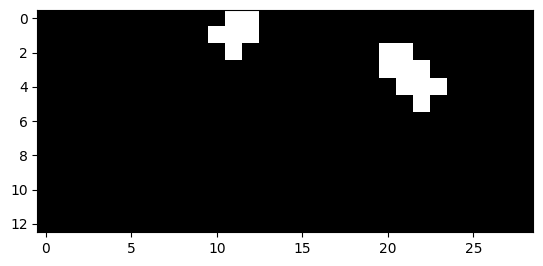

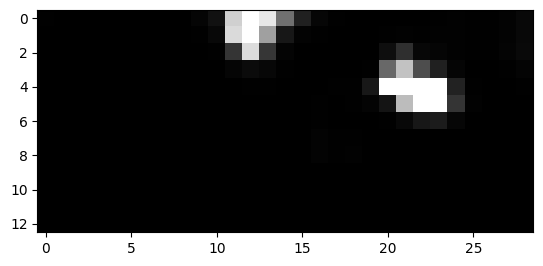

739


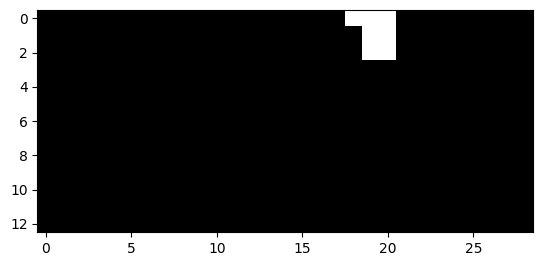

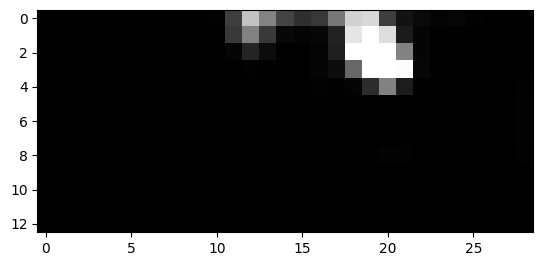

742


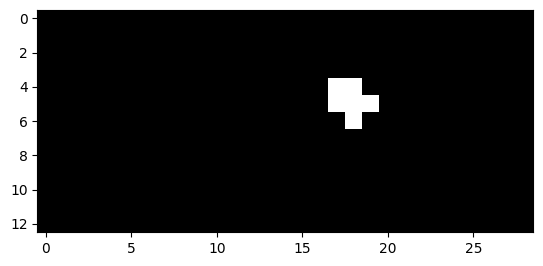

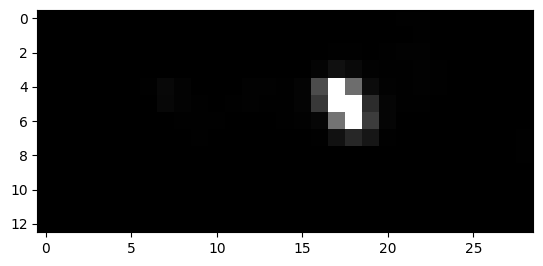

743


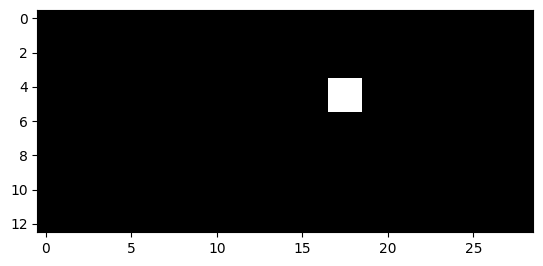

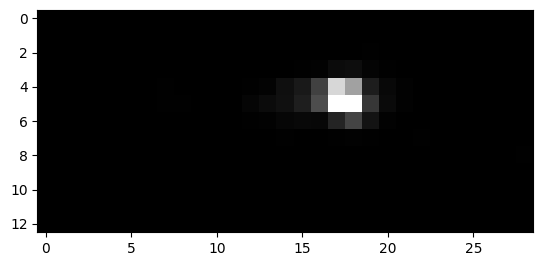

744


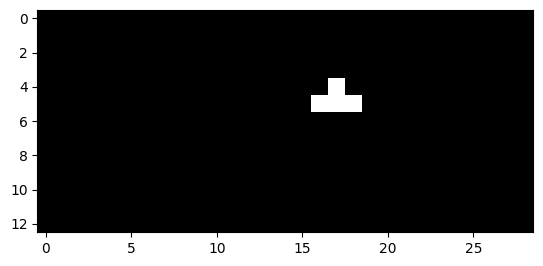

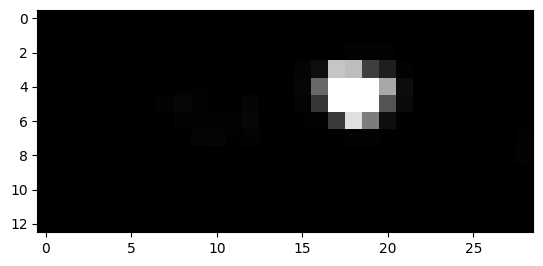

745


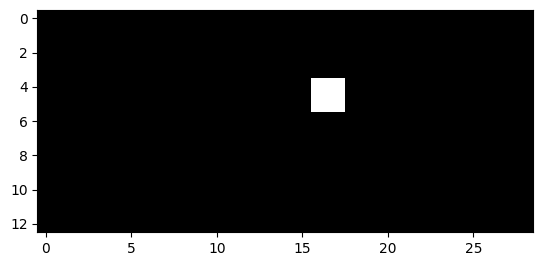

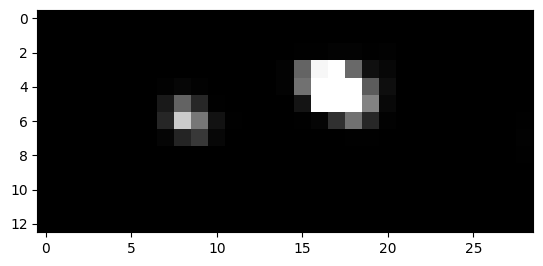

746


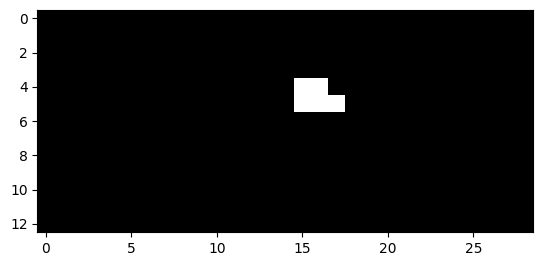

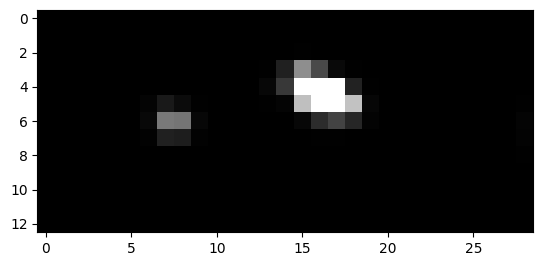

747


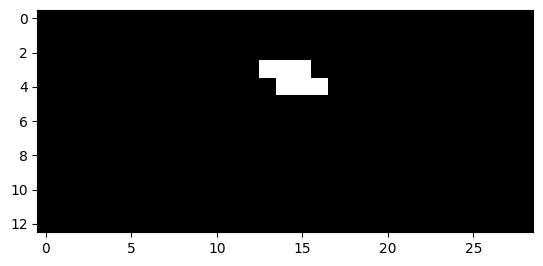

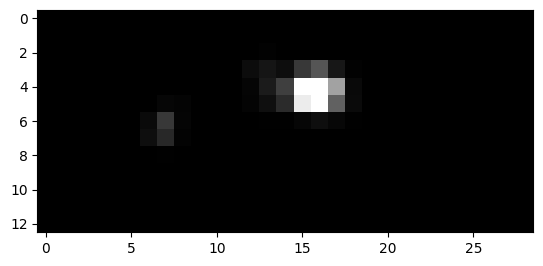

748


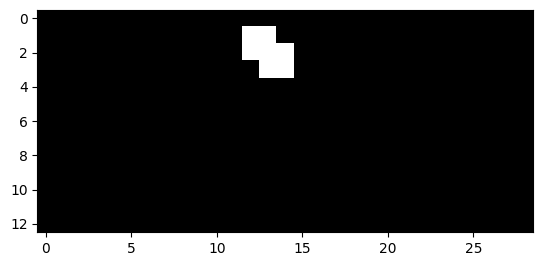

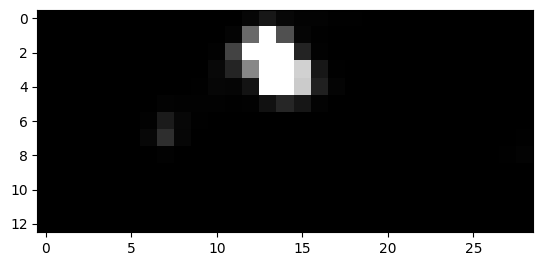

749


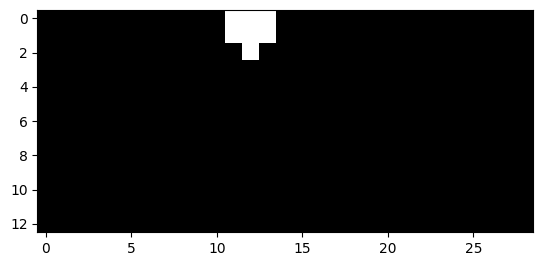

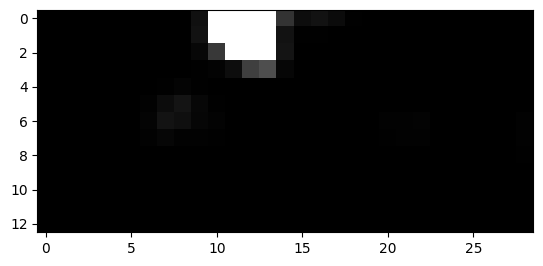

756


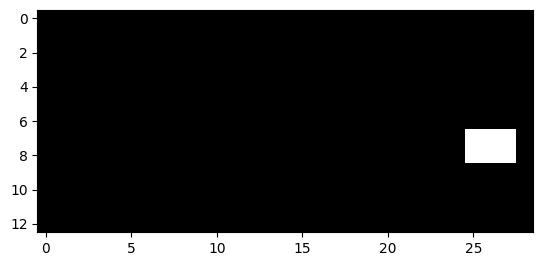

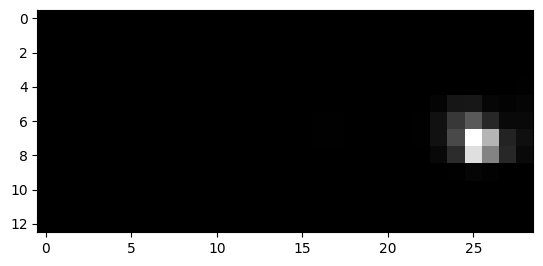

757


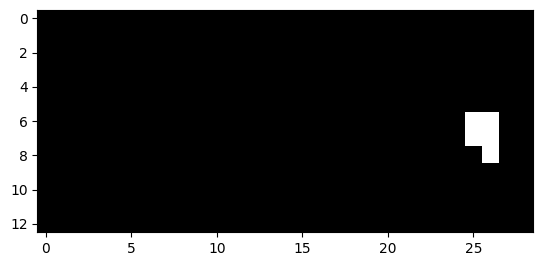

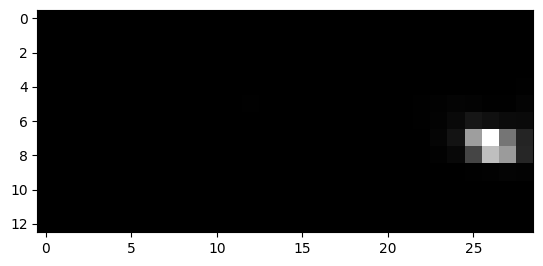

758


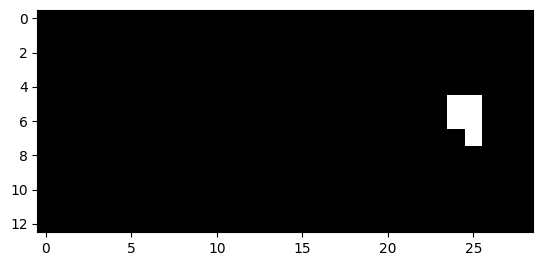

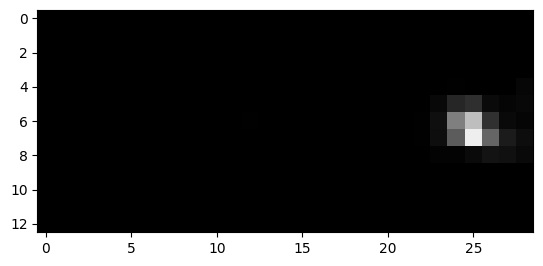

759


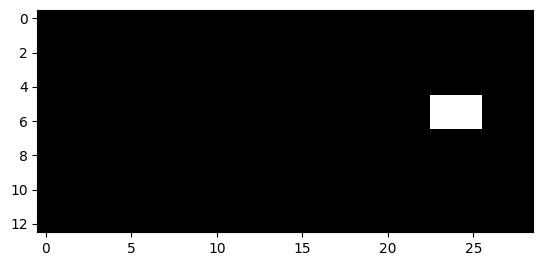

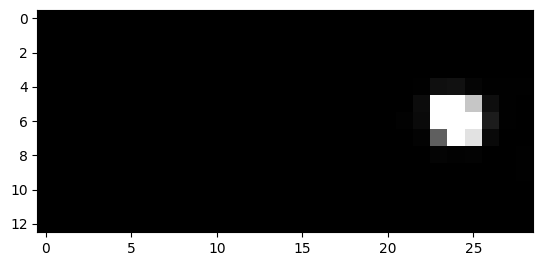

760


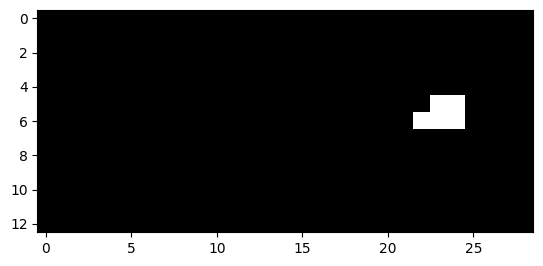

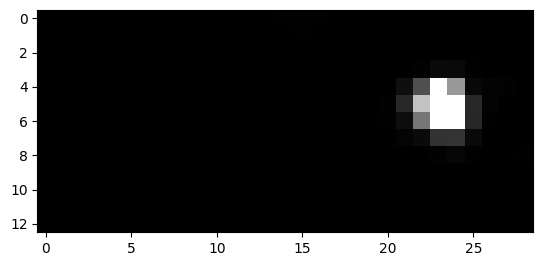

761


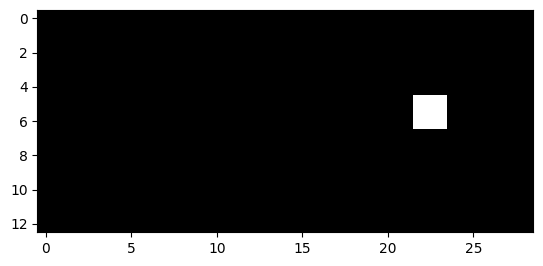

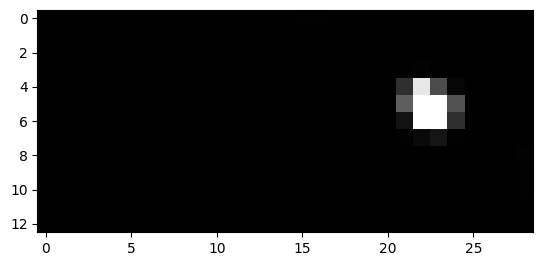

762


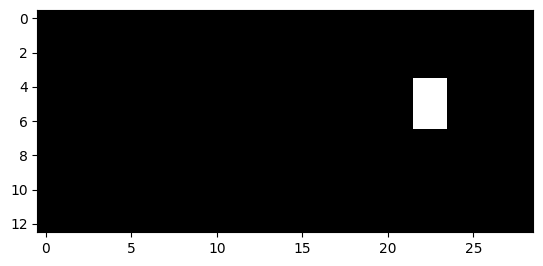

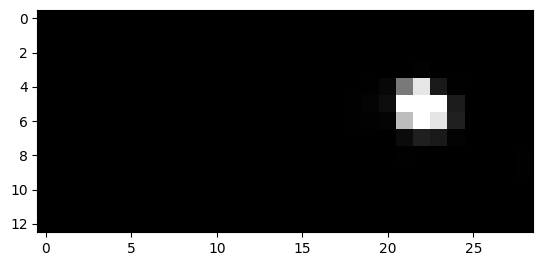

763


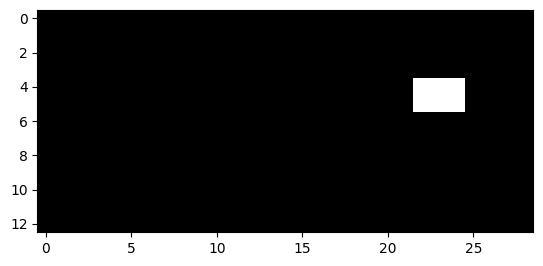

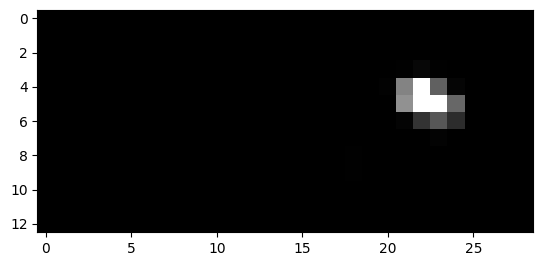

764


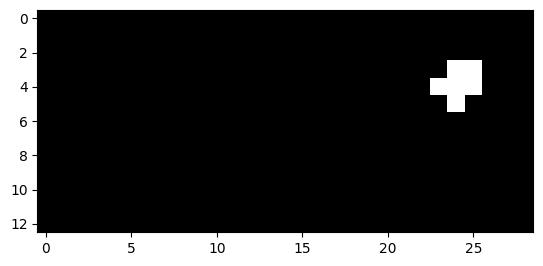

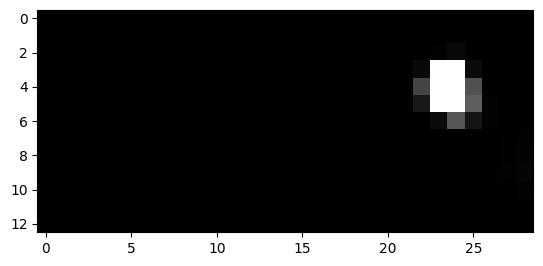

765


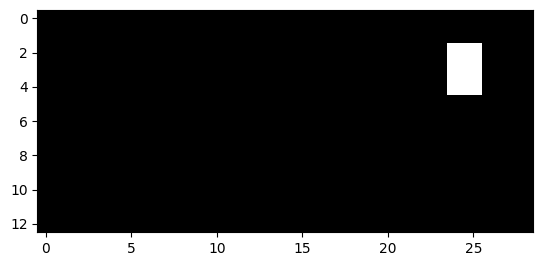

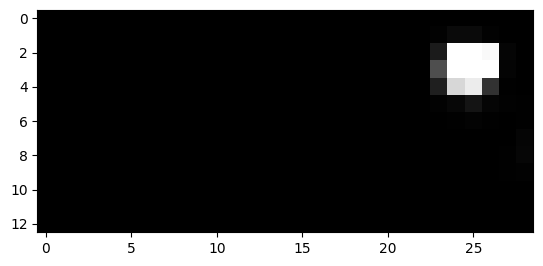

766


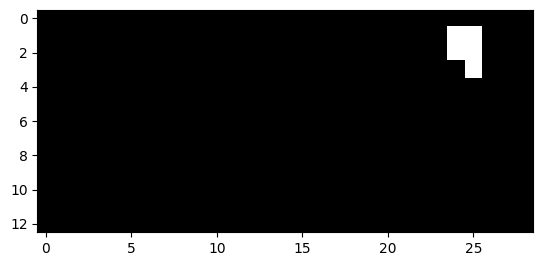

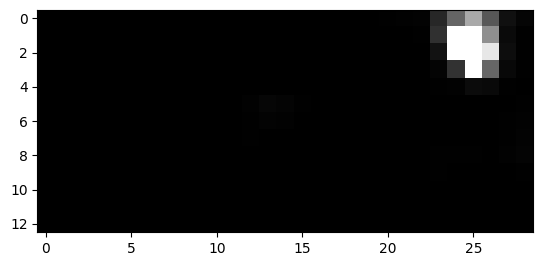

767


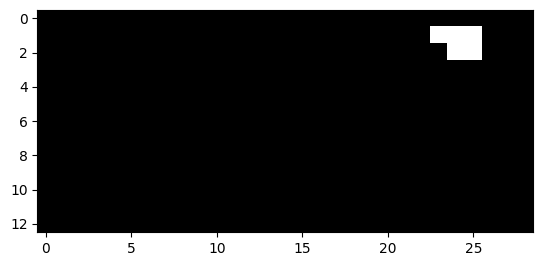

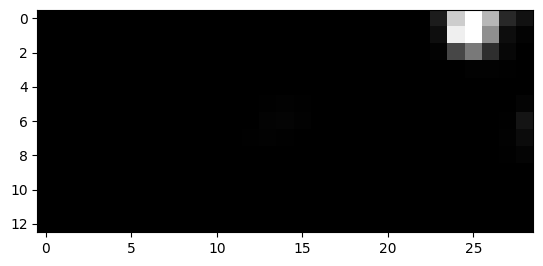

768


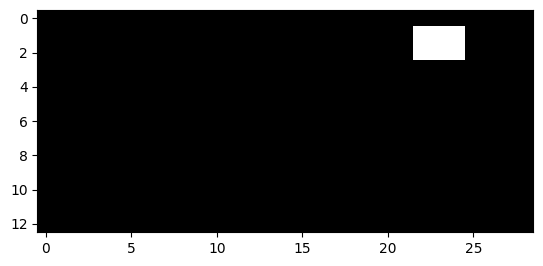

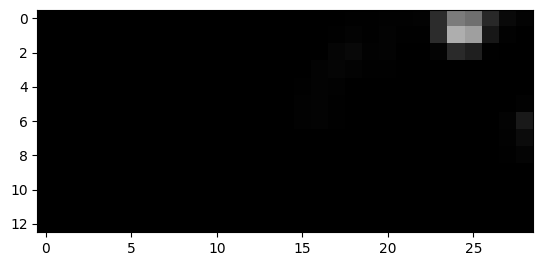

791


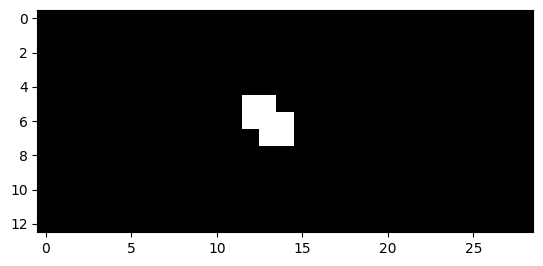

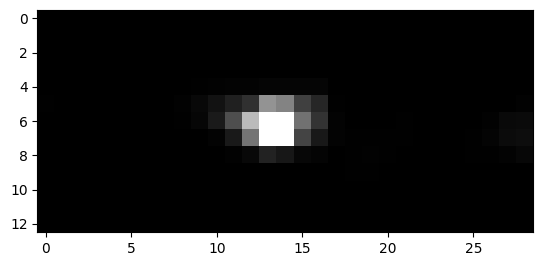

792


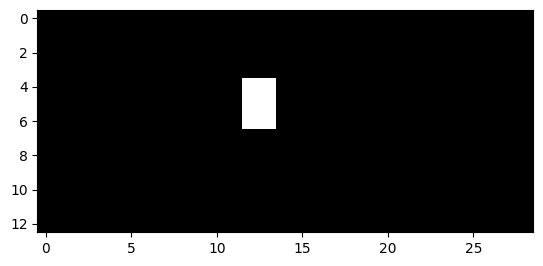

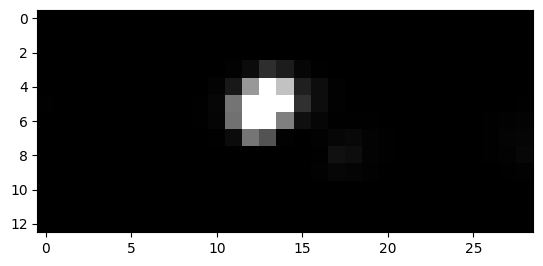

793


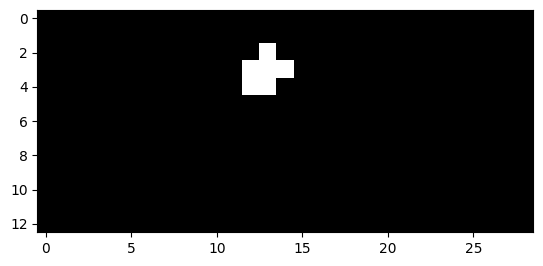

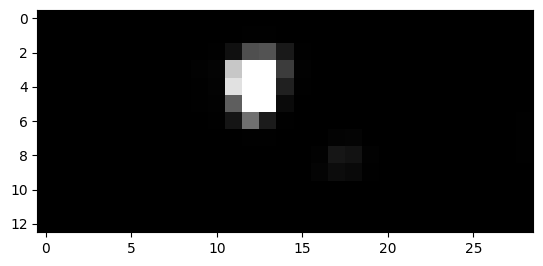

794


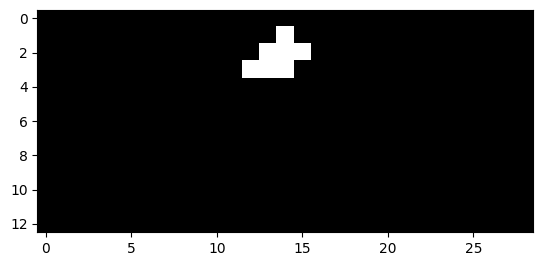

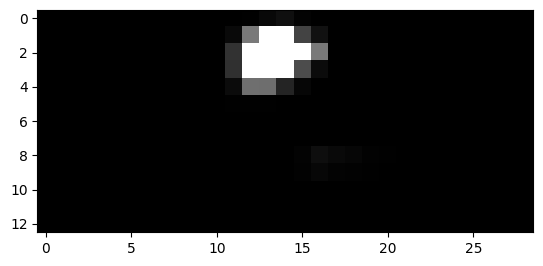

795


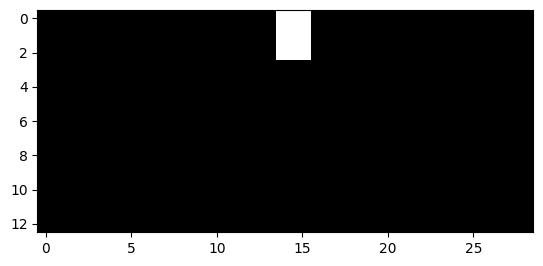

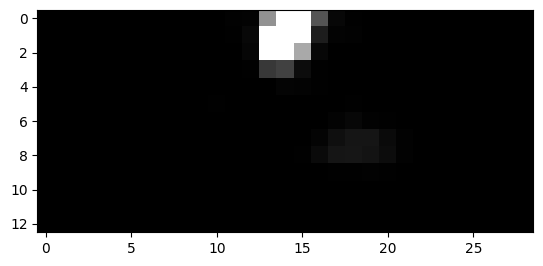

796


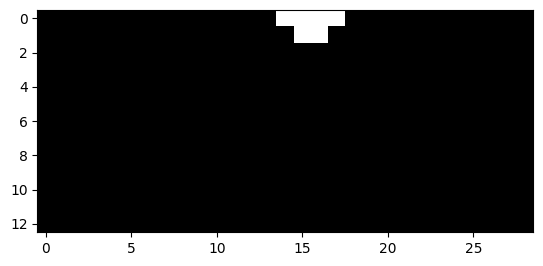

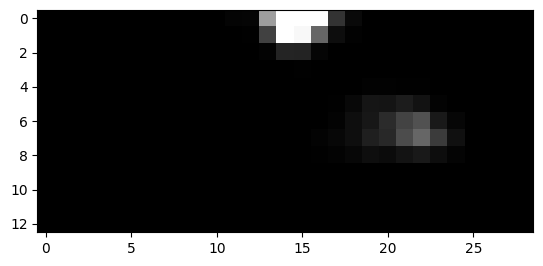

802


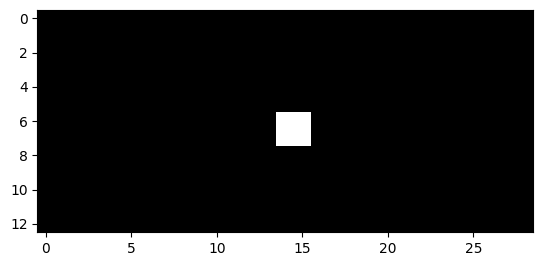

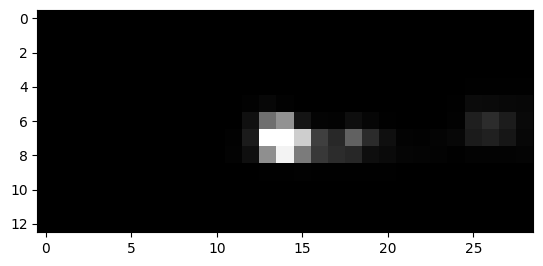

803


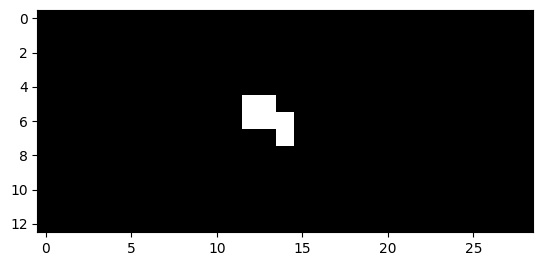

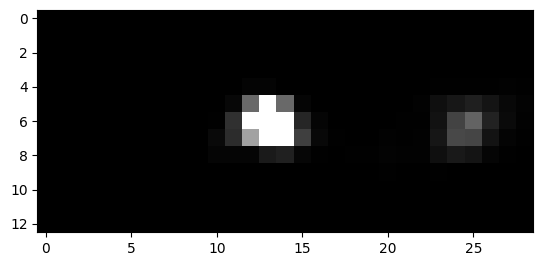

804


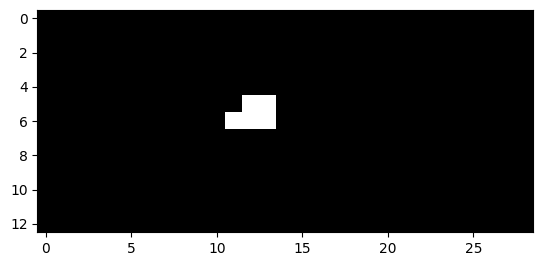

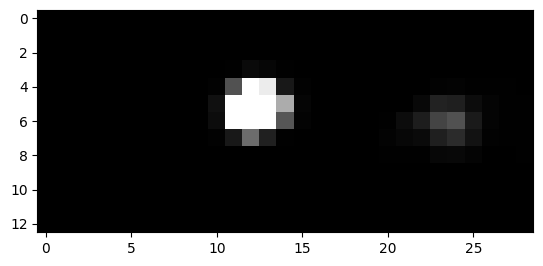

805


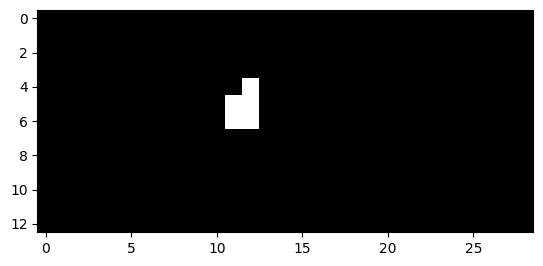

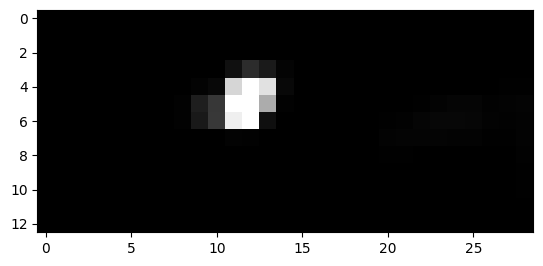

806


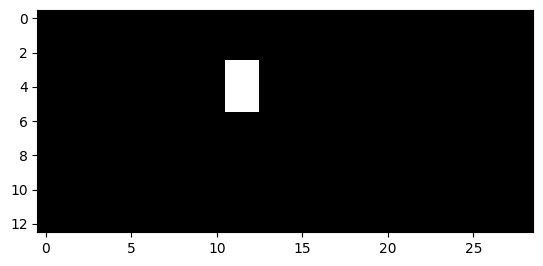

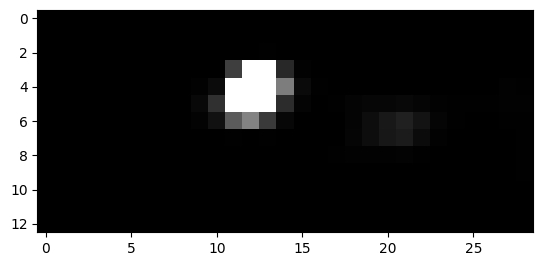

807


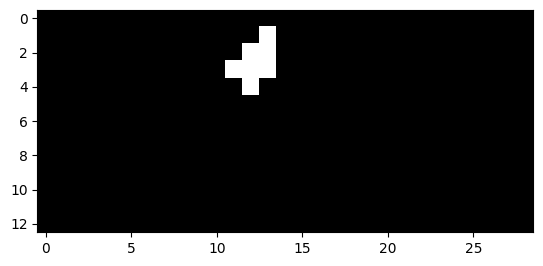

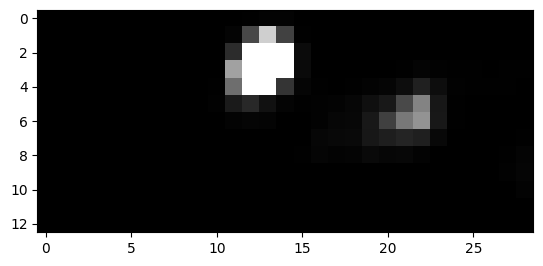

808


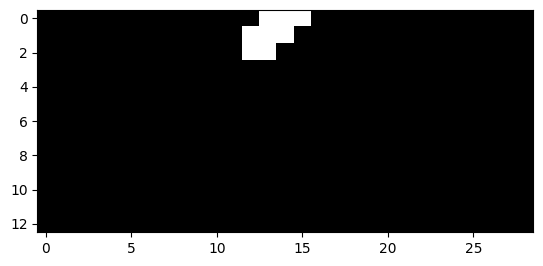

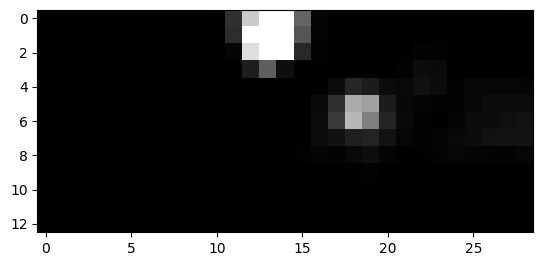

809


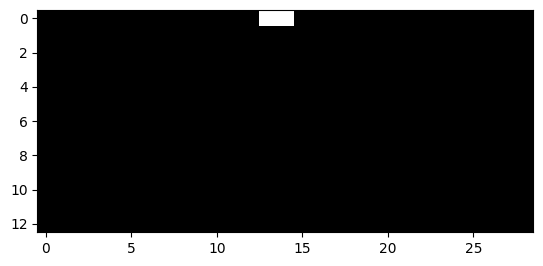

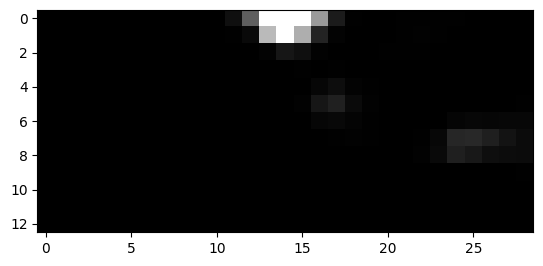

842


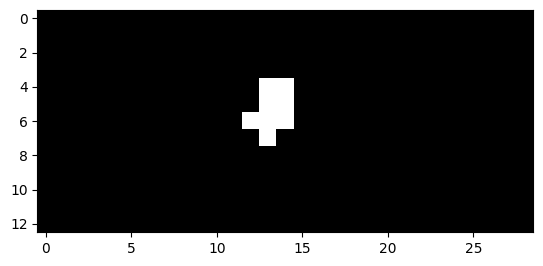

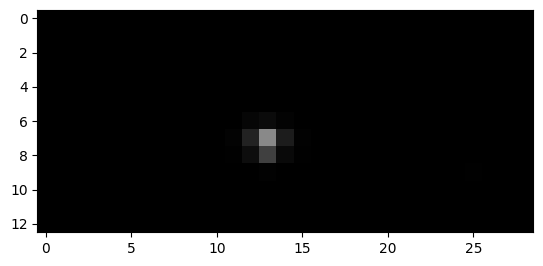

843


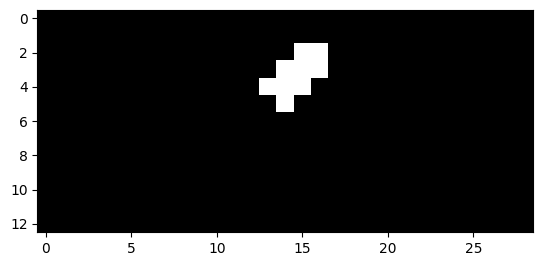

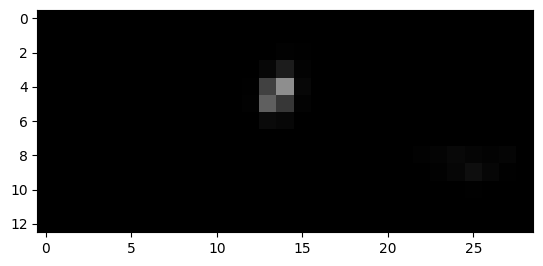

844


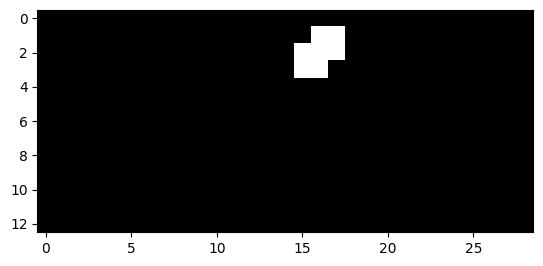

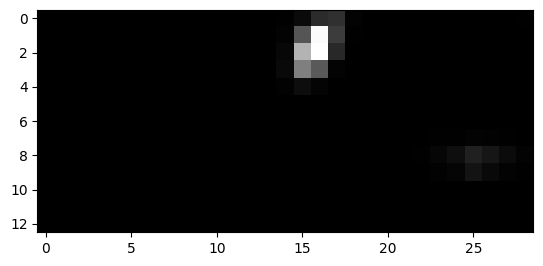

845


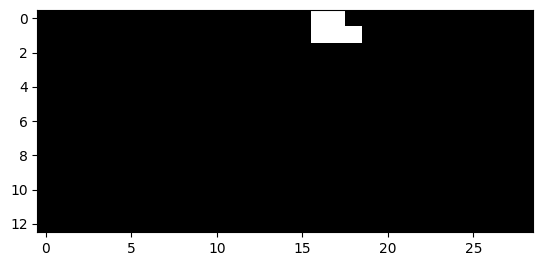

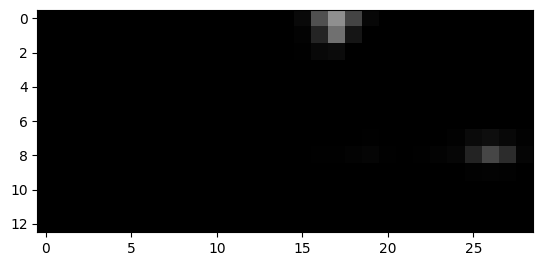

847


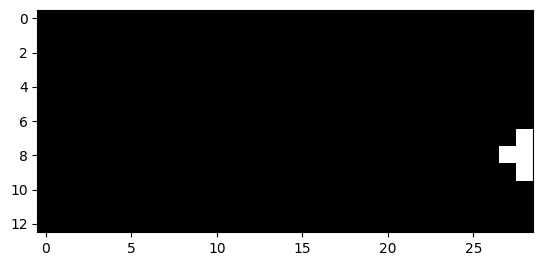

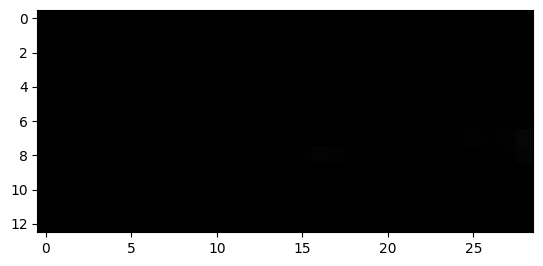

848


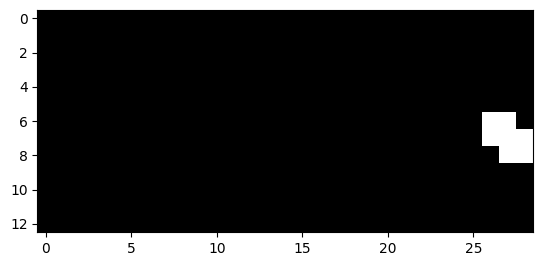

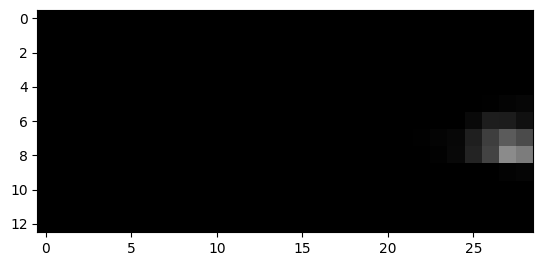

849


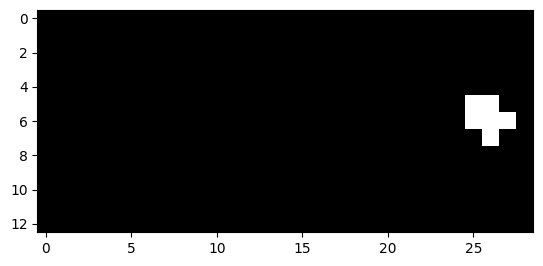

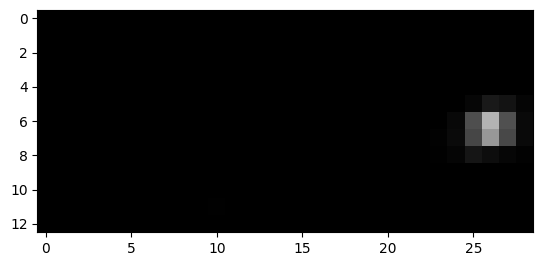

850


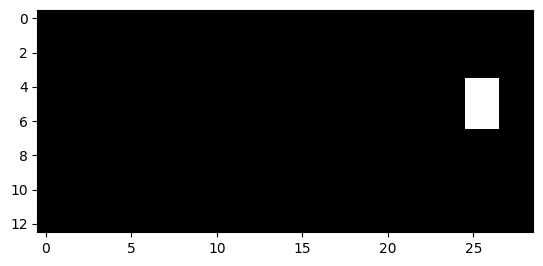

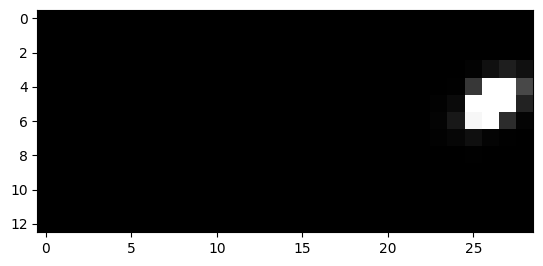

851


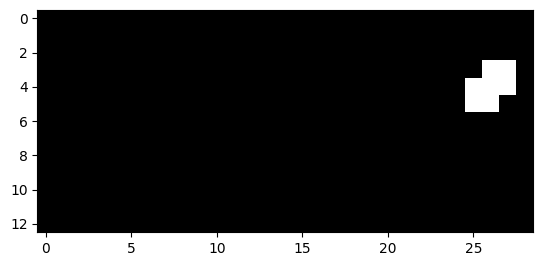

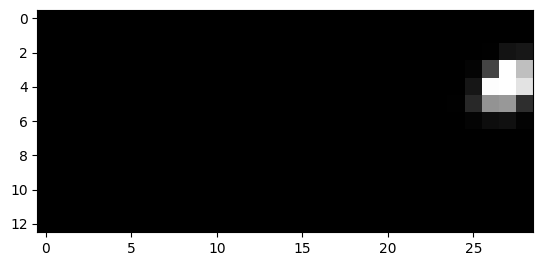

852


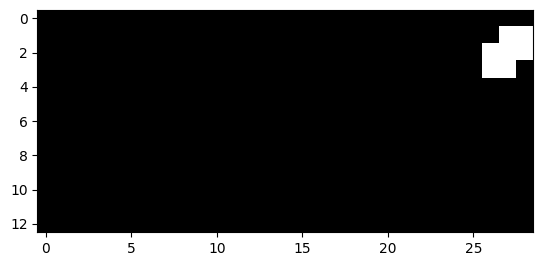

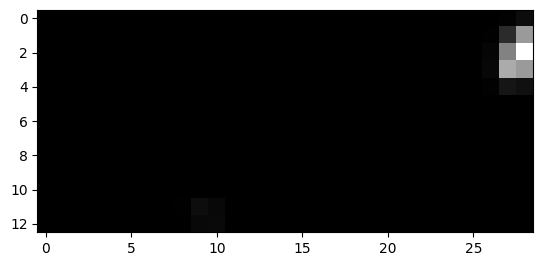

853


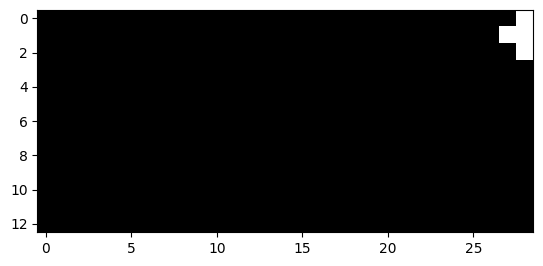

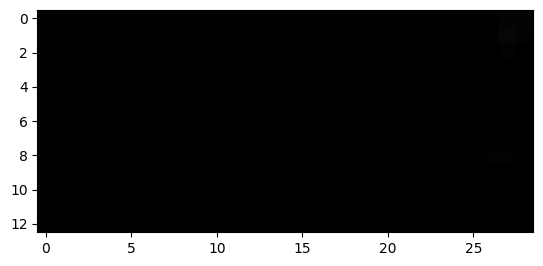

1114


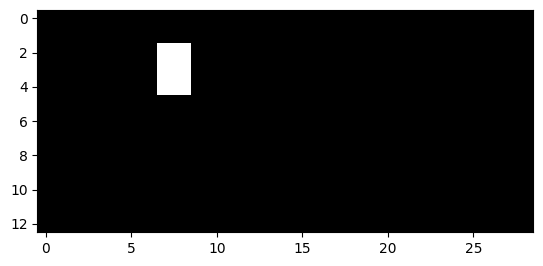

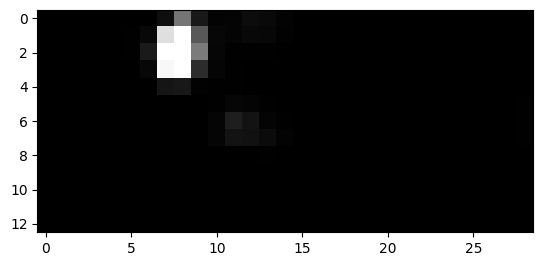

1115


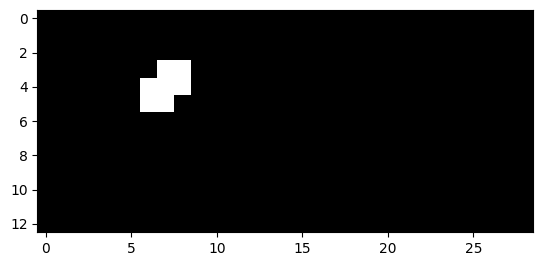

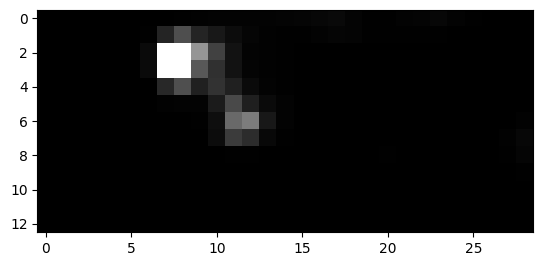

1130


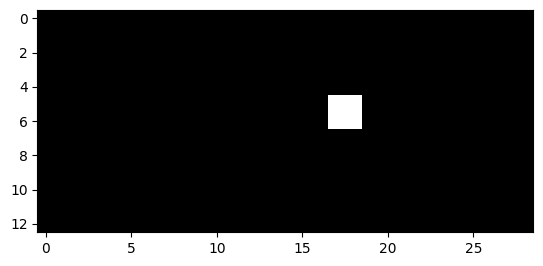

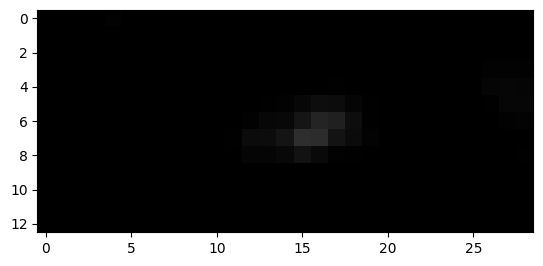

1131


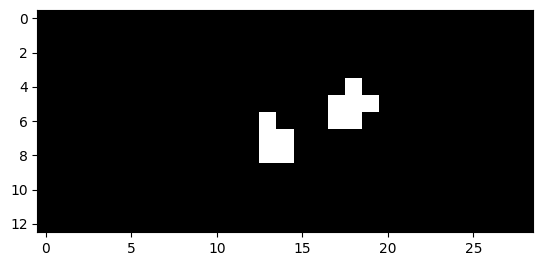

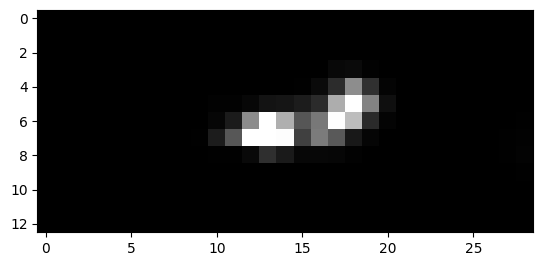

1132


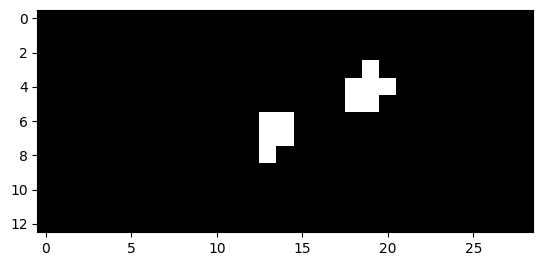

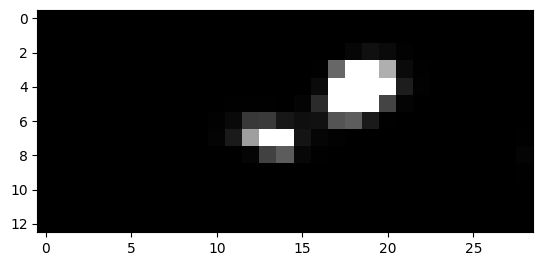

1133


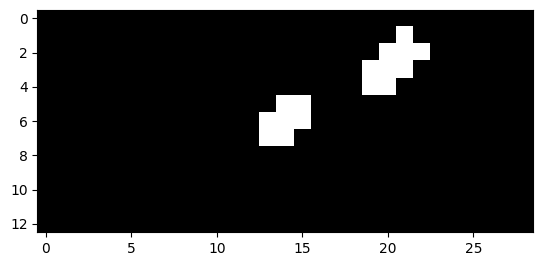

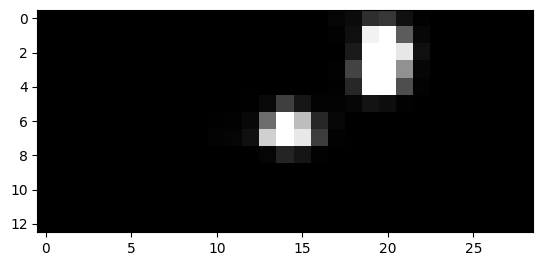

1134


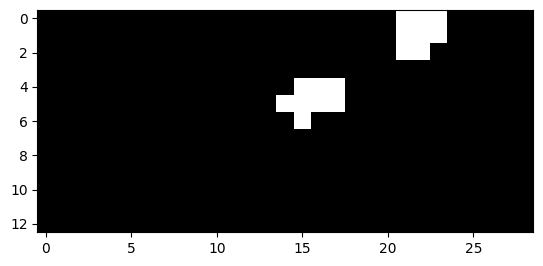

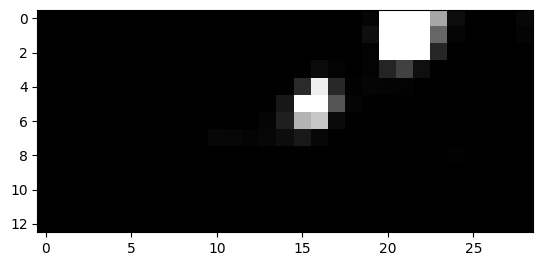

1135


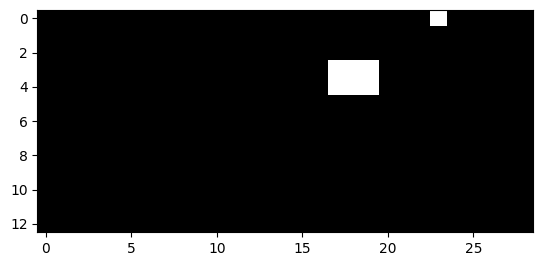

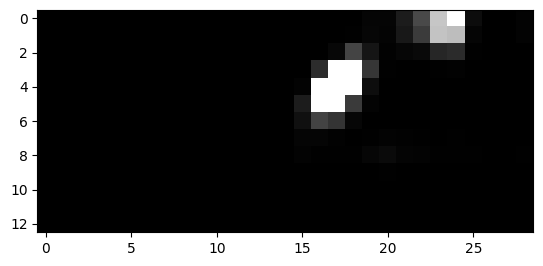

1136


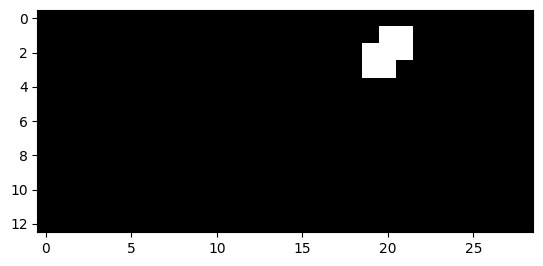

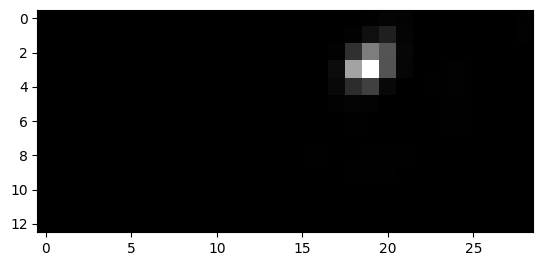

1137


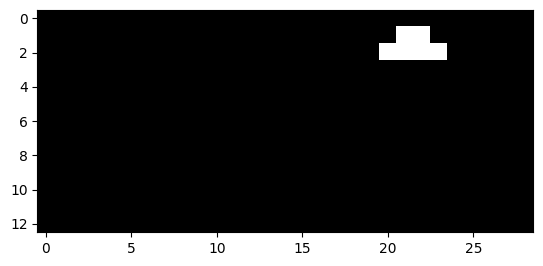

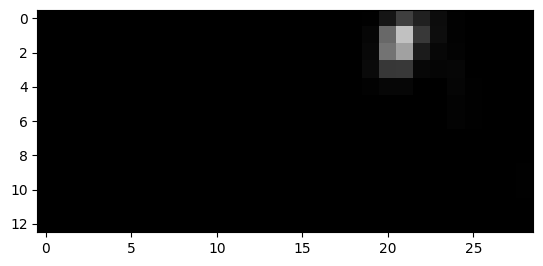

1138


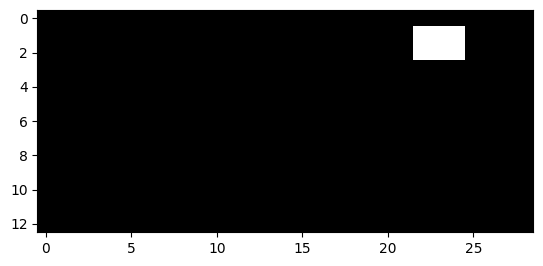

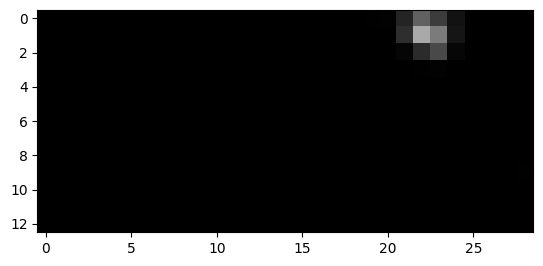

1139


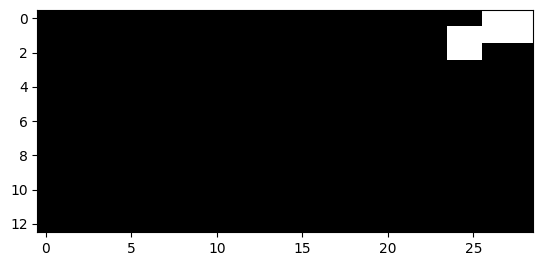

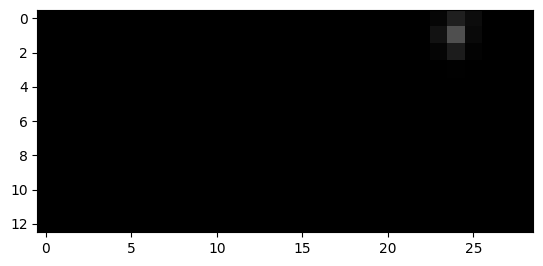

1140


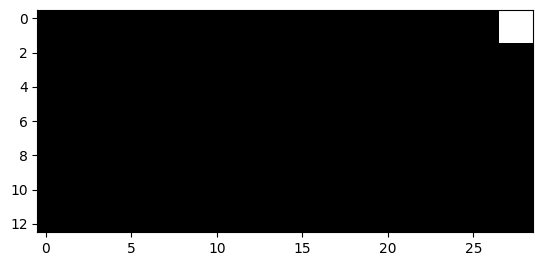

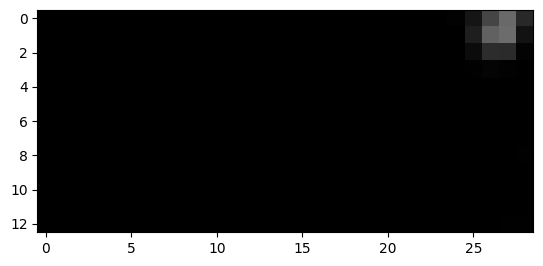

1155


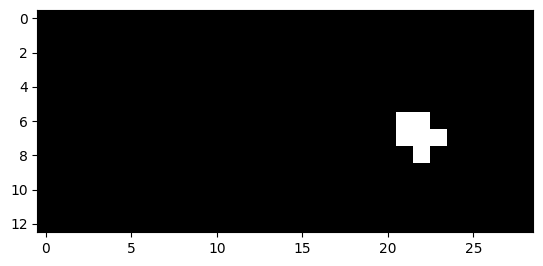

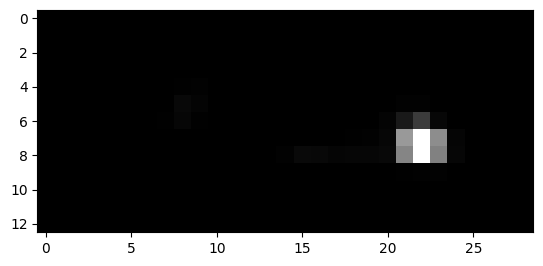

1156


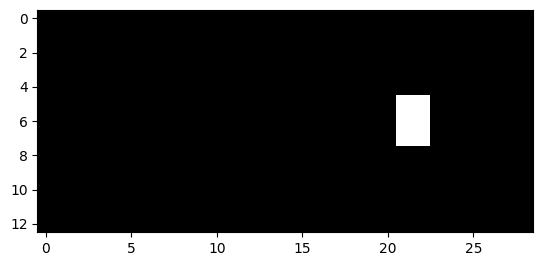

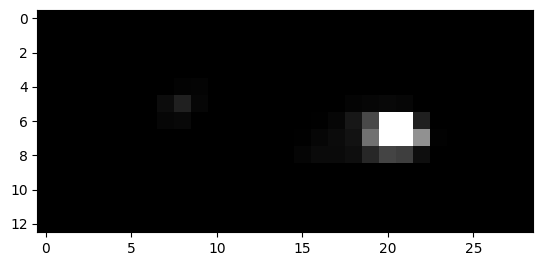

1157


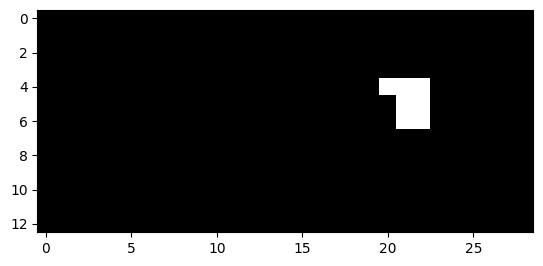

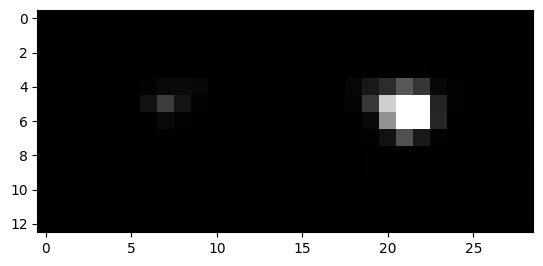

1158


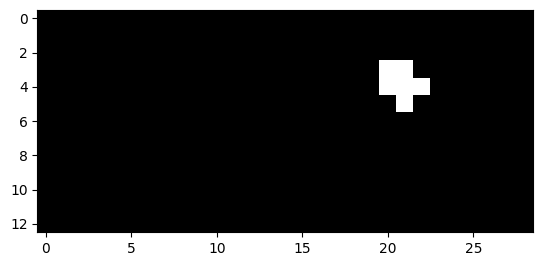

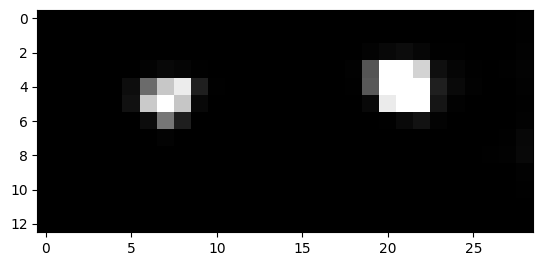

1159


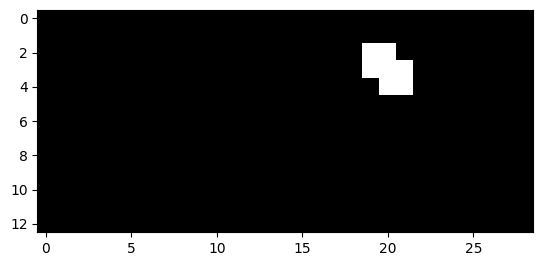

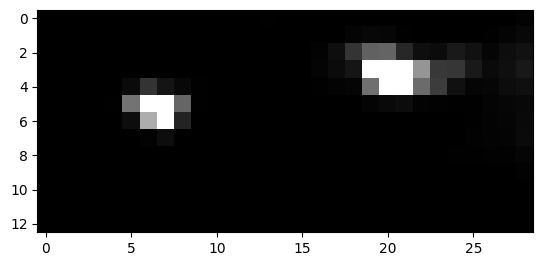

1160


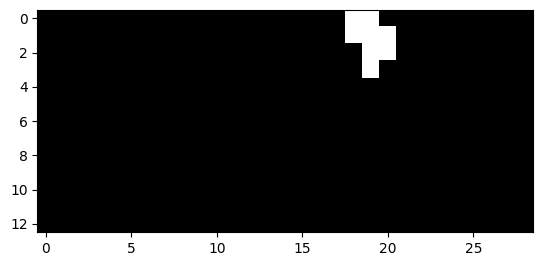

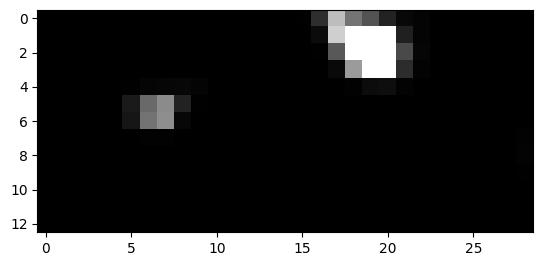

1161


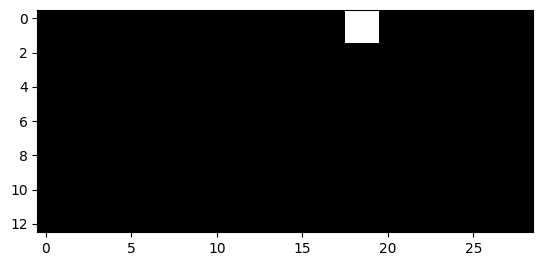

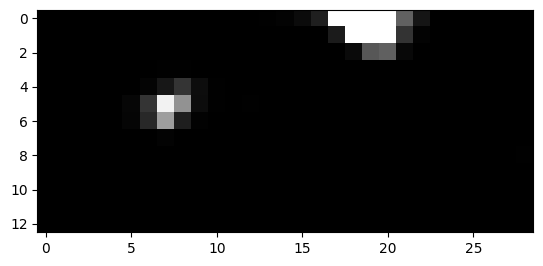

1162


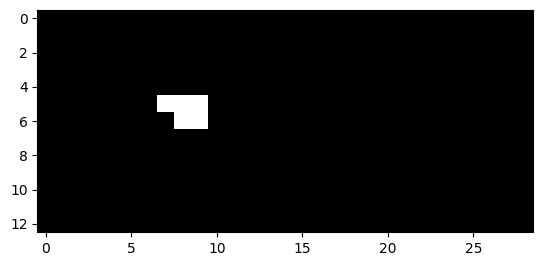

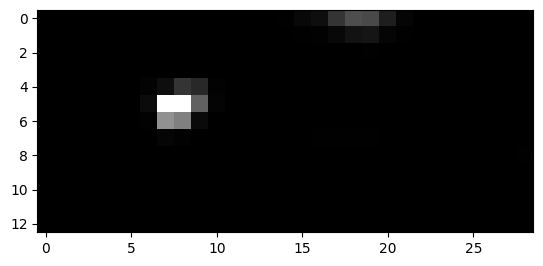

1163


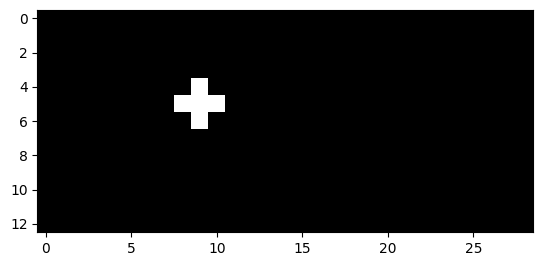

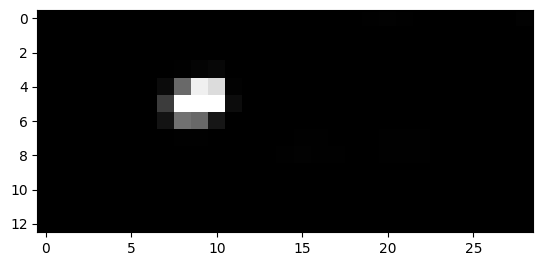

1164


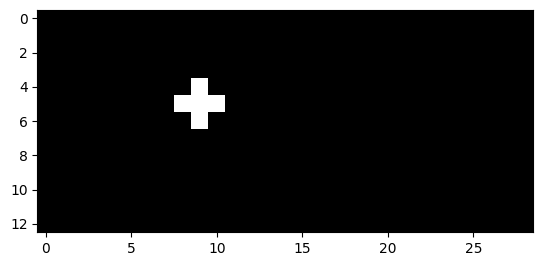

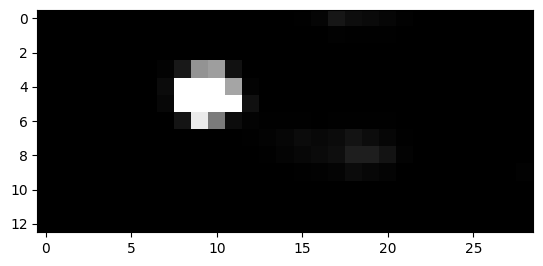

1165


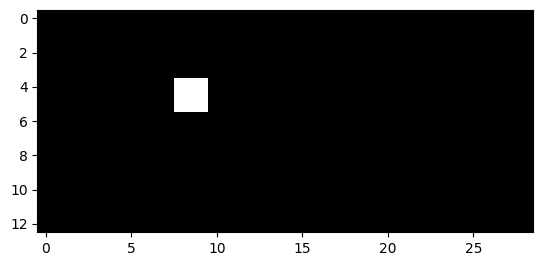

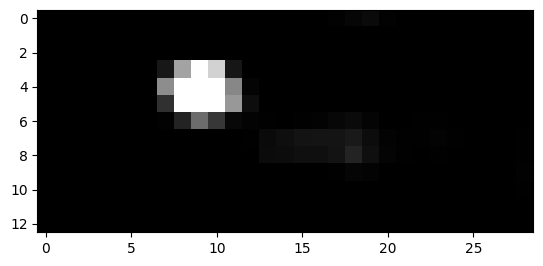

1166


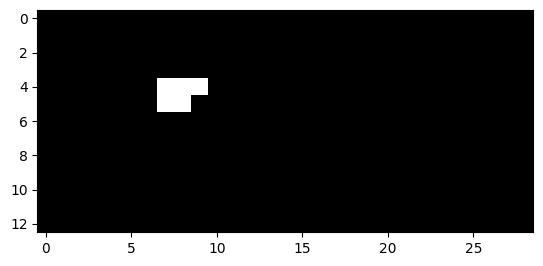

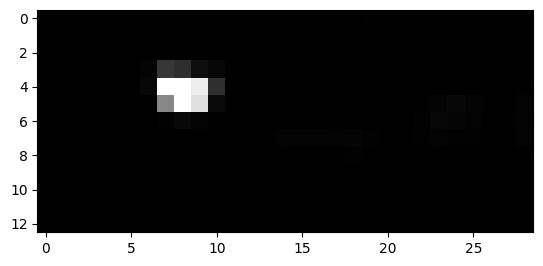

1167


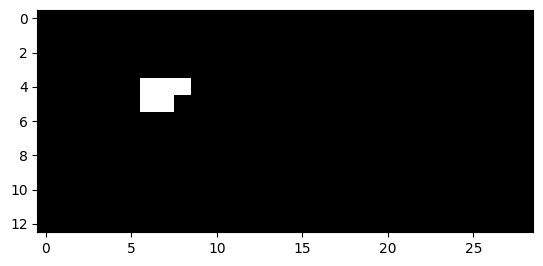

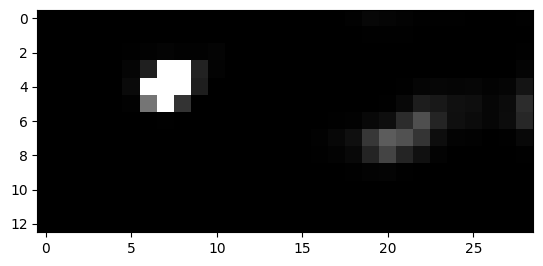

1169


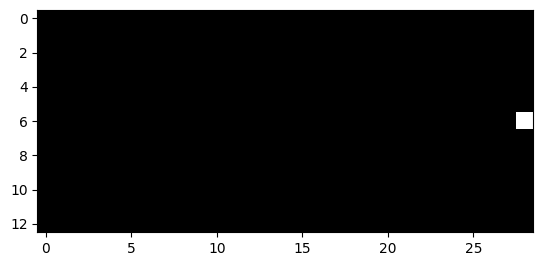

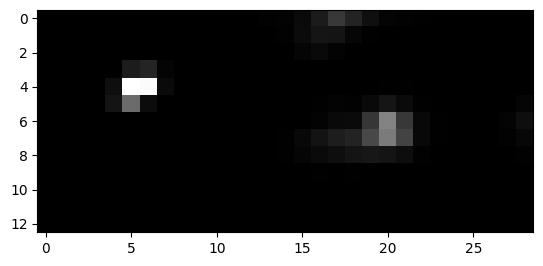

1170


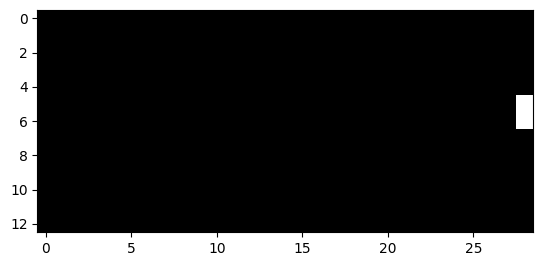

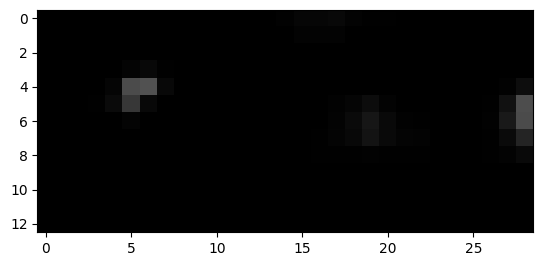

1171


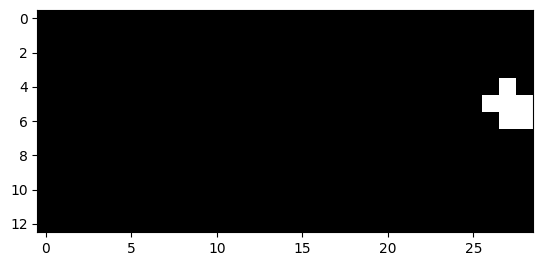

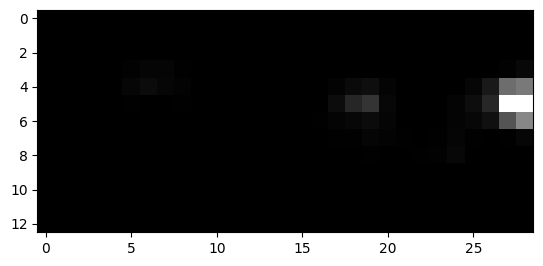

1172


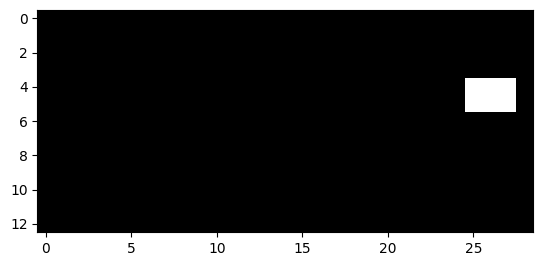

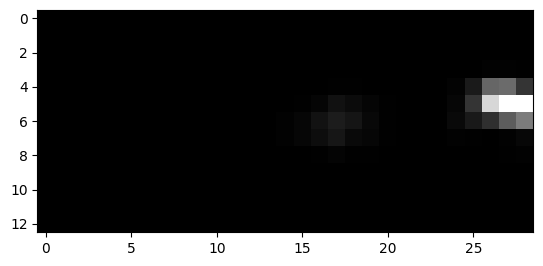

1173


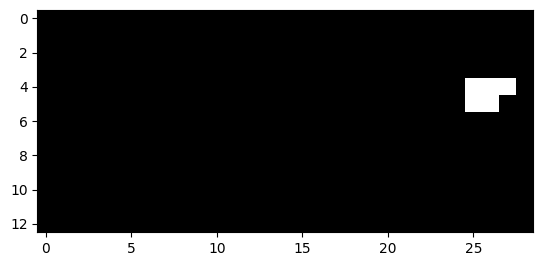

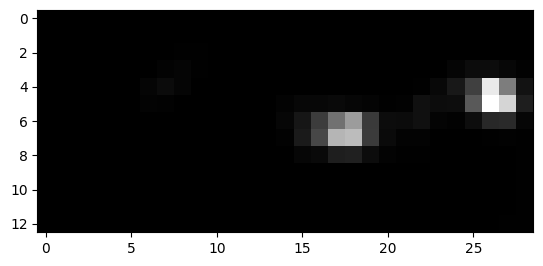

1174


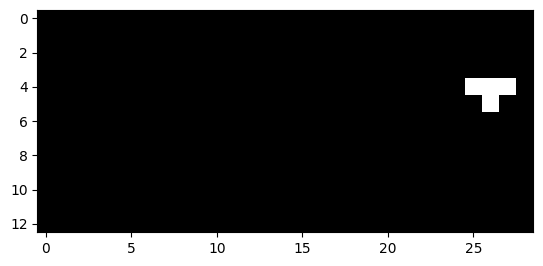

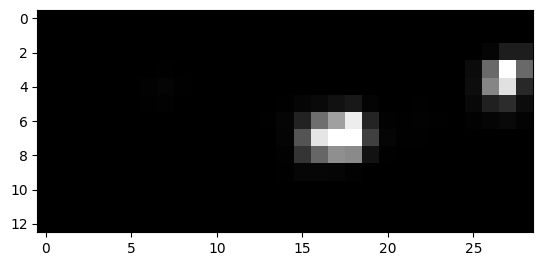

1175


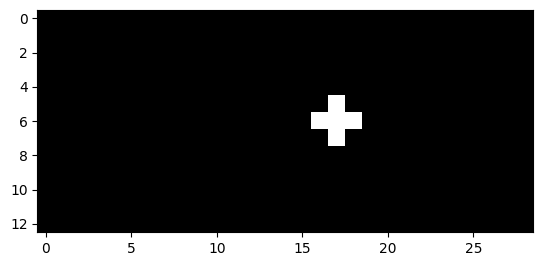

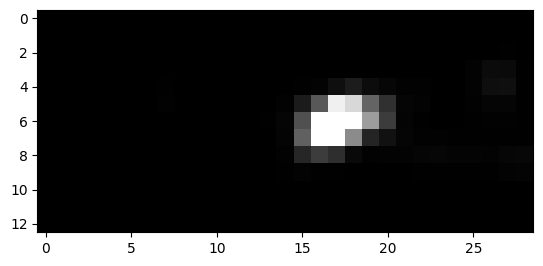

1176


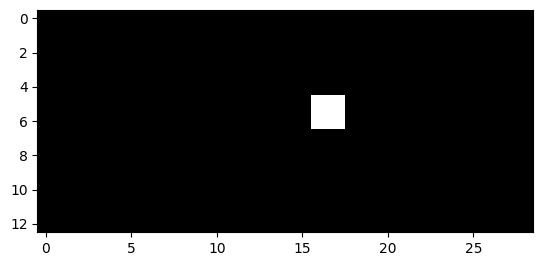

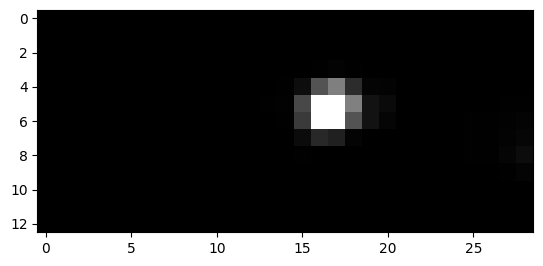

1177


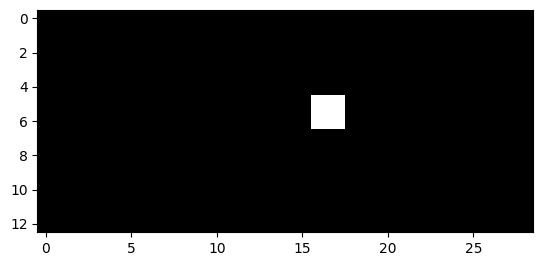

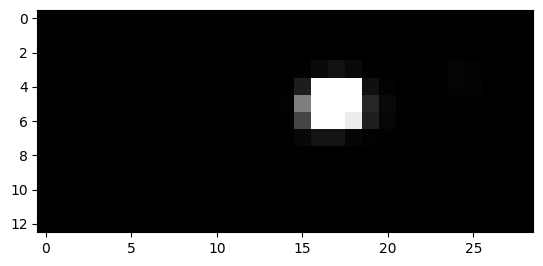

1178


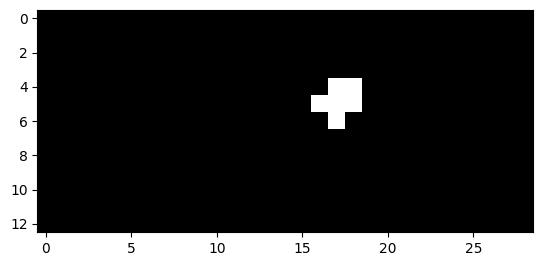

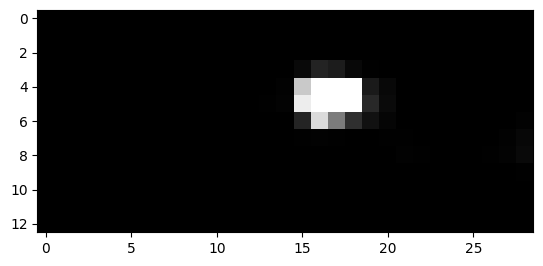

1179


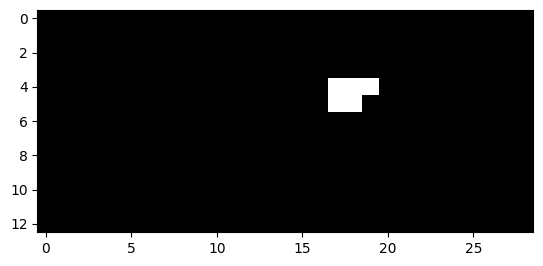

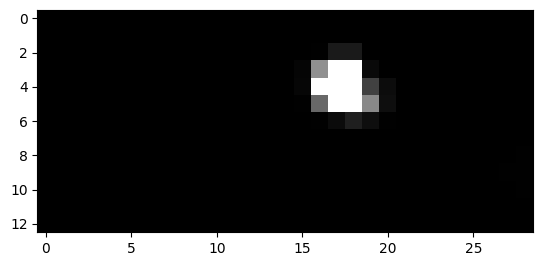

1180


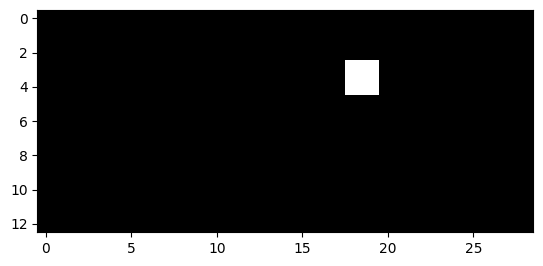

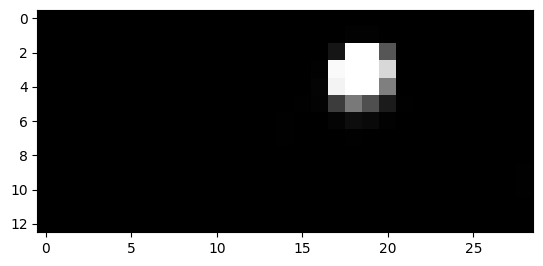

1181


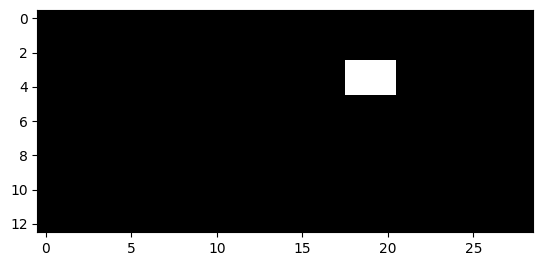

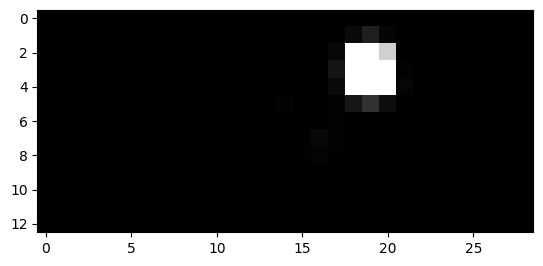

1182


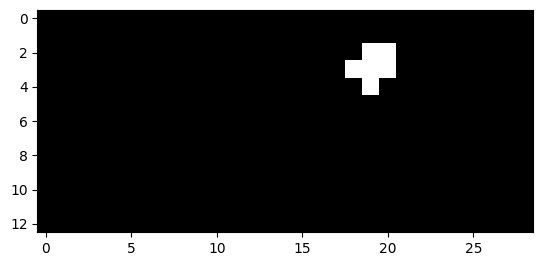

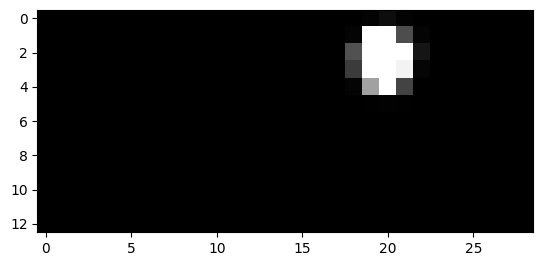

1183


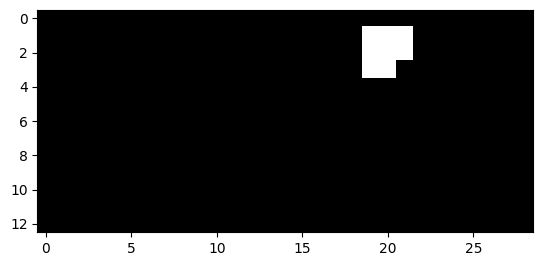

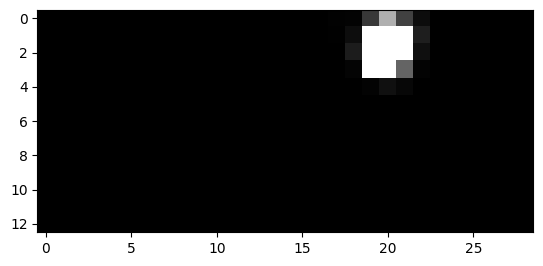

1184


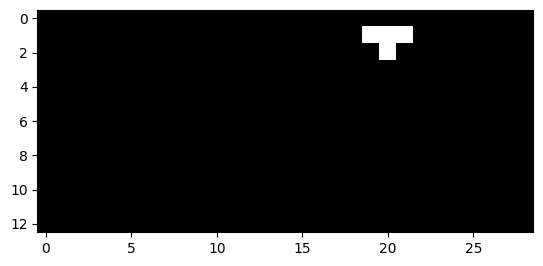

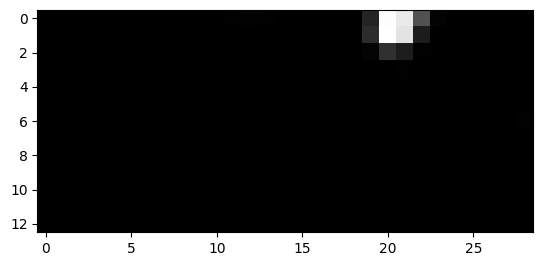

1207


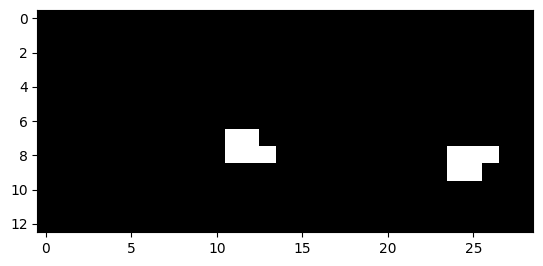

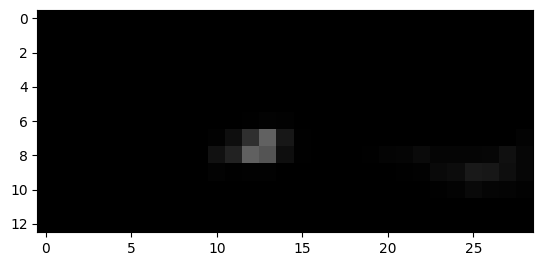

1208


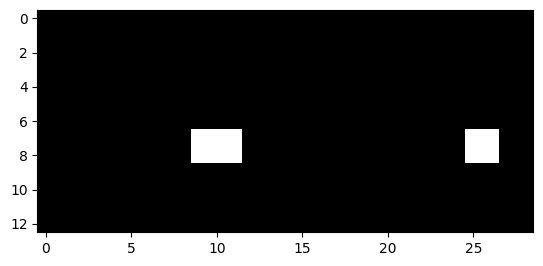

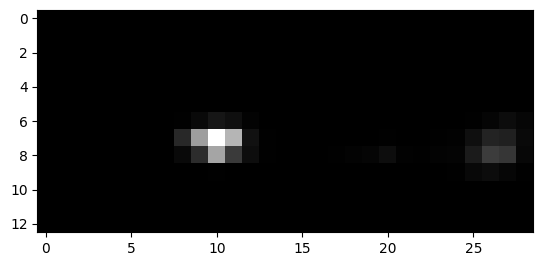

1209


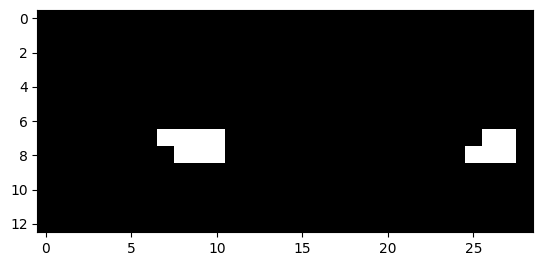

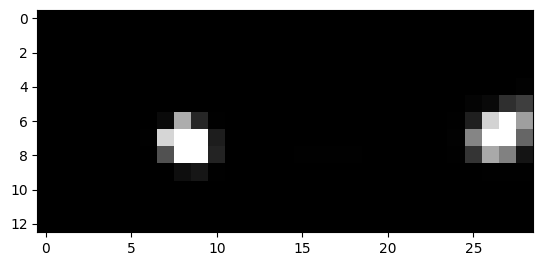

1210


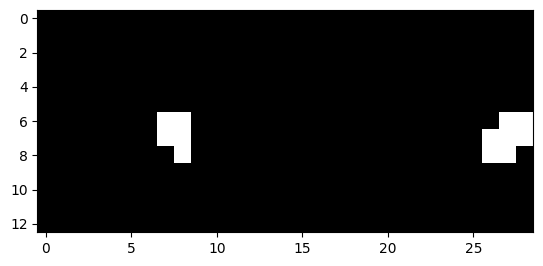

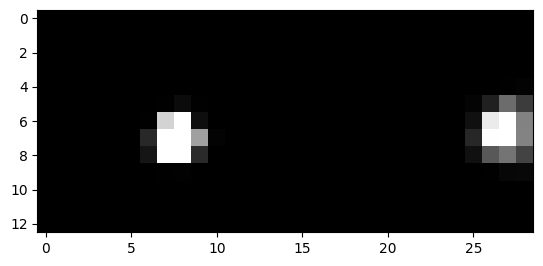

1211


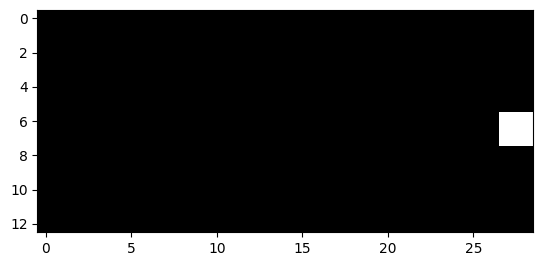

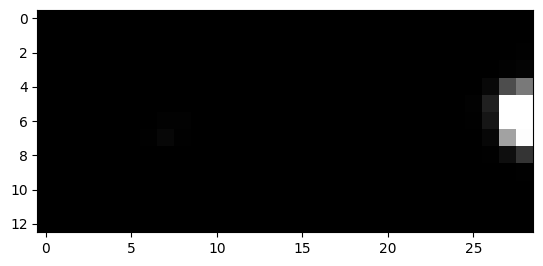

1212


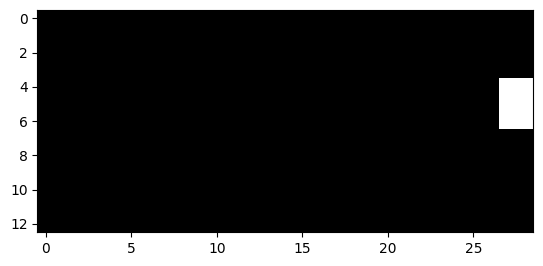

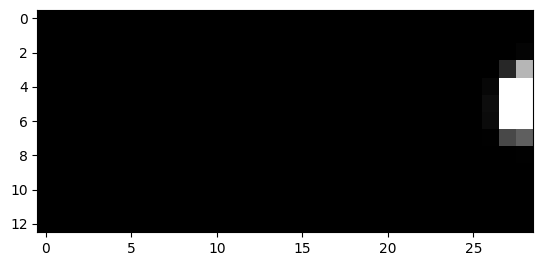

1213


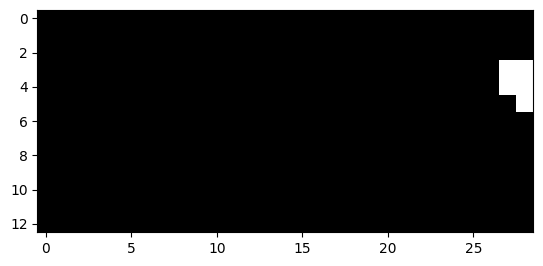

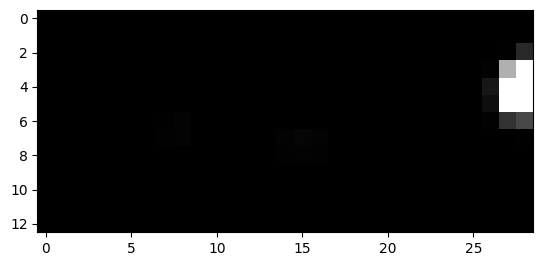

172


In [98]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

### Easy CNN with larger kernel

In [135]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 8)))

model.add(layers.Conv2D(8, (7,7), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3,3), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (7,7), activation='relu', padding='same'))
model.add(layers.UpSampling2D((3,3)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((1,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_256 (Conv2D)         (None, 13, 29, 8)         3144      
                                                                 
 max_pooling2d_187 (MaxPooli  (None, 5, 10, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_257 (Conv2D)         (None, 5, 10, 8)          3144      
                                                                 
 up_sampling2d_40 (UpSamplin  (None, 15, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_258 (Conv2D)         (None, 15, 30, 1)         73        
                                                                 
 cropping2d_17 (Cropping2D)  (None, 13, 29, 1)      

In [136]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-17 15:54:31.329788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0491

2023-01-17 15:54:34.882363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 10ms/step - loss: 0.0491 - val_loss: 0.0097
Epoch 2/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 3/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 5/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 6/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 7/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 8/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0059 - val_loss: 0.0056


45/45 [==============================] - 0s 3ms/step


2023-01-17 15:56:30.016400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


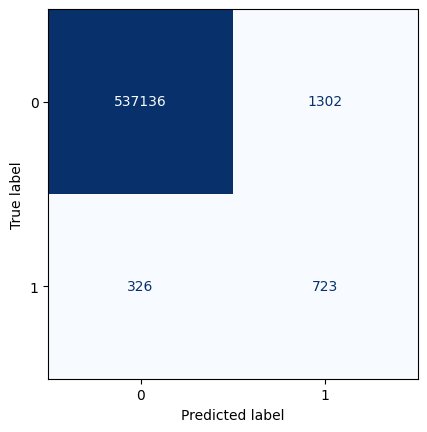

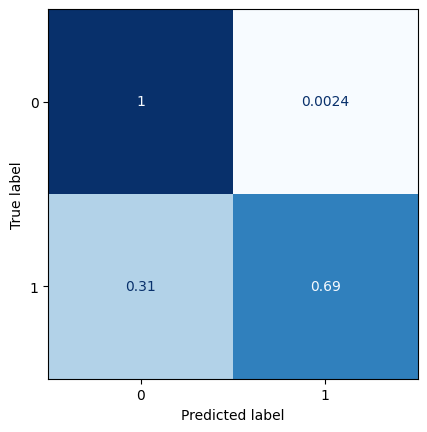

In [137]:
t = model.predict(test_img_std)

classes = []
for i in t.reshape(-1,1):
    if i<=0.1: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


### Easy CNN with more layers

In [140]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((2,1),(2,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_269 (Conv2D)         (None, 13, 29, 8)         584       
                                                                 
 max_pooling2d_192 (MaxPooli  (None, 7, 15, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_270 (Conv2D)         (None, 7, 15, 16)         1168      
                                                                 
 max_pooling2d_193 (MaxPooli  (None, 4, 8, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_271 (Conv2D)         (None, 4, 8, 16)          2320      
                                                                 
 up_sampling2d_45 (UpSamplin  (None, 8, 16, 16)     

In [141]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-17 15:58:25.307330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0401

2023-01-17 15:58:29.614829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 5s 13ms/step - loss: 0.0401 - val_loss: 0.0094
Epoch 2/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 3/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0078 - val_loss: 0.0065
Epoch 4/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 5/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 6/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 7/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 8/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 9/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 10/100
354/354 [==============================] - 4s 11ms/step - loss: 0.0055 - val_loss

27/45 [=================>............] - ETA: 0s

2023-01-17 16:00:57.675312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 5ms/step


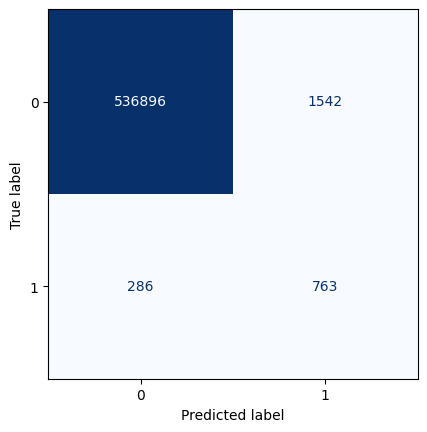

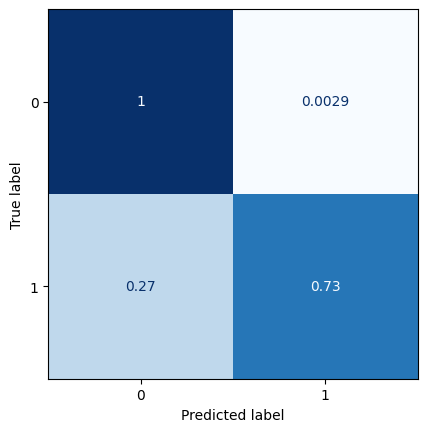

In [142]:
t = model.predict(test_img_std)

classes = []
for i in t.reshape(-1,1):
    if i<=0.1: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
